# Detecting the Higgs Boson with TPUs 
This notebook demonstrates an improved approach to classifying Higgs boson events using modern Keras practices, feature normalization, and enhanced training stability.

## Key Improvements:
- **Modern Wide & Deep Architecture**: Built with Keras Functional API instead of deprecated experimental components
- **Input Normalization**: Integrated normalization layer for better training stability
- **Enhanced Callbacks**: Improved early stopping, learning rate scheduling, and model checkpointing
- **Regularization**: Added L2 regularization to prevent overfitting
- **Better Monitoring**: Focus on AUC metrics for classification performance

## Dataset:
The Higgs boson dataset contains 11 million particle collision events from the Large Hadron Collider (LHC). Each event is characterized by 28 kinematic features, and the goal is to classify whether the event represents a Higgs boson decay or background noise.

## Physics Context:
The Higgs boson is a fundamental particle that gives mass to other particles through the Higgs mechanism. Detecting it requires sophisticated machine learning techniques to distinguish its decay signature from the overwhelming background of other particle interactions.

In [1]:
!apt-get update && apt-get install -y graphviz

!pip install seaborn pydot==1.4.2 graphviz==0.20.1

0% [Working]

Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
0% [1 InRelease 14.4 kB/151 kB 10%]

Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
0% [Working]

Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8791 kB]
0% [4 Packages 0 B/8791 kB 0%]

0% [4 Packages 1824 kB/8791 kB 21%]

Get:5 http://deb.debian.org/debian bookworm-updates/main amd64 Packages [6924 B]
Get:6 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [284 kB]
93% [4 Packages store 0 B]

93% [4 Packages store 0 B]

98% [6 Packages store 0 B]

Fetched 9337 kB in 1s (9468 kB/s)


The following additional packages will be installed:
  fonts-liberation2 libabsl20220623 libann0 libavif15 libcdt5 libcgraph6
  libgav1-1 libgd3 libgts-0.7-5 libgts-bin libgvc6 libgvpr2 liblab-gamut1
  libpathplan4 librav1e0 libsvtav1enc1 libxaw7 libxmu6 libxpm4 libyuv0
Suggested packages:
  gsfonts graphviz-doc libgd-tools


The following NEW packages will be installed:
  fonts-liberation2 graphviz libabsl20220623 libann0 libavif15 libcdt5
  libcgraph6 libgav1-1 libgd3 libgts-0.7-5 libgts-bin libgvc6 libgvpr2
  liblab-gamut1 libpathplan4 librav1e0 libsvtav1enc1 libxaw7 libxmu6 libxpm4
  libyuv0
0 upgraded, 21 newly installed, 0 to remove and 166 not upgraded.
Need to get 7838 kB of archives.
After this operation, 28.2 MB of additional disk space will be used.
0% [Working]

Get:1 http://deb.debian.org/debian bookworm/main amd64 fonts-liberation2 all 2.1.5-1 [1479 kB]
0% [1 fonts-liberation2 0 B/1479 kB 0%]

Get:2 http://deb.debian.org/debian bookworm/main amd64 libann0 amd64 1.1.2+doc-9+b1 [25.1 kB]
Get:3 http://deb.debian.org/debian bookworm/main amd64 libcdt5 amd64 2.42.2-7+deb12u1 [39.6 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 libcgraph6 amd64 2.42.2-7+deb12u1 [63.0 kB]
19% [4 libcgraph6 0 B/63.0 kB 0%]

Get:5 http://deb.debian.org/debian bookworm/main amd64 libabsl20220623 amd64 20220623.1-1+deb12u2 [391 kB]
Get:6 http://deb.debian.org/debian bookworm/main amd64 libgav1-1 amd64 0.18.0-1+b1 [332 kB]
Get:7 http://deb.debian.org/debian bookworm/main amd64 librav1e0 amd64 0.5.1-6 [763 kB]
Get:8 http://deb.debian.org/debian bookworm/main amd64 libsvtav1enc1 amd64 1.4.1+dfsg-1 [2121 kB]
Get:9 http://deb.debian.org/debian bookworm/main amd64 libyuv0 amd64 0.0~git20230123.b2528b0-1 [168 kB]
Get:10 http://deb.debian.org/debian bookworm/main amd64 libavif15 amd64 0.11.1-1+deb12u1 [94.4 kB]
Get:11 http://deb.debian.org/debian bookworm/main amd64 libxpm4 amd64 1:3.5.12-1.1+deb12u1 [48.6 kB]
Get:12 http://deb.debian.org/debian bookworm/main amd64 libgd3 amd64 2.3.3-9 [124 kB]
Get:13 http://deb.debian.org/debian bookworm/main amd64 libgts-0.7-5 amd64 0.7.6+darcs121130-5+b1 [160 kB]
Get:14 http://deb.debian.org/debian bookworm/main amd64 libpathplan4 amd64 2.42.2-7+deb12u1 [41.9 kB]
Get:15 http://de

debconf: delaying package configuration, since apt-utils is not installed


Selecting previously unselected package fonts-liberation2.


(Reading database ... 23974 files and directories currently installed.)
Preparing to unpack .../00-fonts-liberation2_2.1.5-1_all.deb ...
Unpacking fonts-liberation2 (2.1.5-1) ...


Selecting previously unselected package libann0.
Preparing to unpack .../01-libann0_1.1.2+doc-9+b1_amd64.deb ...
Unpacking libann0 (1.1.2+doc-9+b1) ...


Selecting previously unselected package libcdt5:amd64.
Preparing to unpack .../02-libcdt5_2.42.2-7+deb12u1_amd64.deb ...
Unpacking libcdt5:amd64 (2.42.2-7+deb12u1) ...


Selecting previously unselected package libcgraph6:amd64.
Preparing to unpack .../03-libcgraph6_2.42.2-7+deb12u1_amd64.deb ...
Unpacking libcgraph6:amd64 (2.42.2-7+deb12u1) ...


Selecting previously unselected package libabsl20220623:amd64.
Preparing to unpack .../04-libabsl20220623_20220623.1-1+deb12u2_amd64.deb ...


Unpacking libabsl20220623:amd64 (20220623.1-1+deb12u2) ...


Selecting previously unselected package libgav1-1:amd64.
Preparing to unpack .../05-libgav1-1_0.18.0-1+b1_amd64.deb ...
Unpacking libgav1-1:amd64 (0.18.0-1+b1) ...


Selecting previously unselected package librav1e0:amd64.
Preparing to unpack .../06-librav1e0_0.5.1-6_amd64.deb ...
Unpacking librav1e0:amd64 (0.5.1-6) ...


Selecting previously unselected package libsvtav1enc1:amd64.
Preparing to unpack .../07-libsvtav1enc1_1.4.1+dfsg-1_amd64.deb ...
Unpacking libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...


Selecting previously unselected package libyuv0:amd64.
Preparing to unpack .../08-libyuv0_0.0~git20230123.b2528b0-1_amd64.deb ...
Unpacking libyuv0:amd64 (0.0~git20230123.b2528b0-1) ...


Selecting previously unselected package libavif15:amd64.
Preparing to unpack .../09-libavif15_0.11.1-1+deb12u1_amd64.deb ...


Unpacking libavif15:amd64 (0.11.1-1+deb12u1) ...


Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../10-libxpm4_1%3a3.5.12-1.1+deb12u1_amd64.deb ...


Unpacking libxpm4:amd64 (1:3.5.12-1.1+deb12u1) ...


Selecting previously unselected package libgd3:amd64.
Preparing to unpack .../11-libgd3_2.3.3-9_amd64.deb ...
Unpacking libgd3:amd64 (2.3.3-9) ...


Selecting previously unselected package libgts-0.7-5:amd64.
Preparing to unpack .../12-libgts-0.7-5_0.7.6+darcs121130-5+b1_amd64.deb ...
Unpacking libgts-0.7-5:amd64 (0.7.6+darcs121130-5+b1) ...


Selecting previously unselected package libpathplan4:amd64.
Preparing to unpack .../13-libpathplan4_2.42.2-7+deb12u1_amd64.deb ...
Unpacking libpathplan4:amd64 (2.42.2-7+deb12u1) ...


Selecting previously unselected package libgvc6.
Preparing to unpack .../14-libgvc6_2.42.2-7+deb12u1_amd64.deb ...
Unpacking libgvc6 (2.42.2-7+deb12u1) ...


Selecting previously unselected package libgvpr2:amd64.
Preparing to unpack .../15-libgvpr2_2.42.2-7+deb12u1_amd64.deb ...
Unpacking libgvpr2:amd64 (2.42.2-7+deb12u1) ...


Selecting previously unselected package liblab-gamut1:amd64.
Preparing to unpack .../16-liblab-gamut1_2.42.2-7+deb12u1_amd64.deb ...
Unpacking liblab-gamut1:amd64 (2.42.2-7+deb12u1) ...


Selecting previously unselected package libxmu6:amd64.
Preparing to unpack .../17-libxmu6_2%3a1.1.3-3_amd64.deb ...
Unpacking libxmu6:amd64 (2:1.1.3-3) ...


Selecting previously unselected package libxaw7:amd64.
Preparing to unpack .../18-libxaw7_2%3a1.0.14-1_amd64.deb ...
Unpacking libxaw7:amd64 (2:1.0.14-1) ...


Selecting previously unselected package graphviz.
Preparing to unpack .../19-graphviz_2.42.2-7+deb12u1_amd64.deb ...
Unpacking graphviz (2.42.2-7+deb12u1) ...


Selecting previously unselected package libgts-bin.
Preparing to unpack .../20-libgts-bin_0.7.6+darcs121130-5+b1_amd64.deb ...
Unpacking libgts-bin (0.7.6+darcs121130-5+b1) ...


Setting up libabsl20220623:amd64 (20220623.1-1+deb12u2) ...
Setting up libxmu6:amd64 (2:1.1.3-3) ...


Setting up libxpm4:amd64 (1:3.5.12-1.1+deb12u1) ...
Setting up liblab-gamut1:amd64 (2.42.2-7+deb12u1) ...


Setting up libxaw7:amd64 (2:1.0.14-1) ...


Setting up libsvtav1enc1:amd64 (1.4.1+dfsg-1) ...
Setting up librav1e0:amd64 (0.5.1-6) ...


Setting up libgts-0.7-5:amd64 (0.7.6+darcs121130-5+b1) ...


Setting up fonts-liberation2 (2.1.5-1) ...
Setting up libpathplan4:amd64 (2.42.2-7+deb12u1) ...


Setting up libann0 (1.1.2+doc-9+b1) ...
Setting up libgav1-1:amd64 (0.18.0-1+b1) ...


Setting up libcdt5:amd64 (2.42.2-7+deb12u1) ...


Setting up libcgraph6:amd64 (2.42.2-7+deb12u1) ...
Setting up libyuv0:amd64 (0.0~git20230123.b2528b0-1) ...


Setting up libgts-bin (0.7.6+darcs121130-5+b1) ...


Setting up libavif15:amd64 (0.11.1-1+deb12u1) ...
Setting up libgd3:amd64 (2.3.3-9) ...


Setting up libgvc6 (2.42.2-7+deb12u1) ...


Setting up libgvpr2:amd64 (2.42.2-7+deb12u1) ...


Setting up graphviz (2.42.2-7+deb12u1) ...
Processing triggers for libc-bin (2.36-9+deb12u3) ...


Processing triggers for fontconfig (2.14.1-4) ...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/294.9 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


## 1. Initial Setup and Configuration

In [2]:
# Model and training hyperparameters
UNITS = 2 ** 11  # 2048 units per dense layer
ACTIVATION = 'relu'
DROPOUT = 0.1
BATCH_SIZE_PER_REPLICA = 2 ** 11  # 2048 samples per replica

print(f"Model Configuration:")
print(f"  Units per layer: {UNITS}")
print(f"  Activation: {ACTIVATION}")
print(f"  Dropout rate: {DROPOUT}")
print(f"  Batch size per replica: {BATCH_SIZE_PER_REPLICA}")

Model Configuration:
  Units per layer: 2048
  Activation: relu
  Dropout rate: 0.1
  Batch size per replica: 2048


In [3]:
# Output directory configuration
import os

# All output files will be saved to this directory
OUTPUT_DIR = '/kaggle/working/'

# Create the directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Output directory: {OUTPUT_DIR}")


Output directory: /kaggle/working/


In [4]:
# TensorFlow
import tensorflow as tf
print("TensorFlow version: " + tf.__version__)
AUTO = tf.data.AUTOTUNE

# NOTE: TPU initialization is REMOVED from this cell.
# It will be done in a later cell, right before model building.

# Environment setup
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns


E0000 00:00:1761844651.988540      14 common_lib.cc:818] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:501


TensorFlow version: 2.15.0


## 2. Data Pipeline and Normalization

In [5]:
# TFRecord parsing utilities
def make_decoder():
    """Create a function to parse TFRecord examples"""
    def decoder(serialized_example):
        # Define the feature description for parsing
        feature_description = {
            'features': tf.io.FixedLenFeature([], tf.string),
            'label': tf.io.FixedLenFeature([], tf.float32),
        }
        
        # Parse the example
        example = tf.io.parse_single_example(serialized_example, feature_description)
        
        # Decode the serialized tensor
        features = tf.io.parse_tensor(example['features'], out_type=tf.float32)
        features = tf.reshape(features, [28])
        
        label = example['label']
        
        return features, label
    
    return decoder

def load_dataset(filenames, decoder, ordered=False):
    """Load and preprocess TFRecord dataset"""
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False
    
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
    dataset = dataset.with_options(ignore_order)
    dataset = dataset.map(decoder, num_parallel_calls=AUTO)
    
    return dataset

print("✓ TFRecord parsing utilities defined")

✓ TFRecord parsing utilities defined


In [6]:
try:
    # Get the GCS path for the dataset
    from kaggle_datasets import KaggleDatasets
    GCS_PATH = KaggleDatasets().get_gcs_path('higgs-boson')
except (NameError, ImportError):
    # If we're not on Kaggle, use a public GCS bucket
    GCS_PATH = "gs://kds-264b93057042d4b33350b16232436560289380e65a6d21009e3334e2"

# Define file paths for training and validation
# IMPORTANT: Use tf.io.gfile.glob to find the files
train_paths = tf.io.gfile.glob(GCS_PATH + '/training/*.tfrecord')
valid_paths = tf.io.gfile.glob(GCS_PATH + '/validation/*.tfrecord')

# FAIL-FAST CHECK:
# Immediately verify that the file paths were found. If not, the dataset is
# not attached correctly or the path is wrong. This prevents the cryptic
# "Iterator.get_next()" error later on.
if not train_paths:
    raise ValueError(f"No training files found with pattern: {GCS_PATH}/training/training_*.tfrecord. Please ensure the 'higgs-boson' dataset is correctly attached in your Kaggle notebook environment and the path is correct.")
if not valid_paths:
    raise ValueError(f"No validation files found with pattern: {GCS_PATH}/validation/validation_*.tfrecord. Please ensure the 'higgs-boson' dataset is correctly attached in your Kaggle notebook environment and the path is correct.")

print(f"Found {len(train_paths)} training files.")
print(f"Found {len(valid_paths)} validation files.")
 

Found 24 training files.
Found 8 validation files.


get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/higgs-boson


## 3. Build the Modern Wide & Deep Model

In [7]:
# Define dense block with regularization support
def dense_block(units, activation, dropout_rate, l1=None, l2=None):
    """Create a dense block with batch normalization, activation, and dropout"""
    def make(inputs):
        # Configure regularization
        regularizer = None
        if l1 and l2:
            regularizer = keras.regularizers.L1L2(l1=l1, l2=l2)
        elif l1:
            regularizer = keras.regularizers.L1(l1)
        elif l2:
            regularizer = keras.regularizers.L2(l2)
        
        # Build the block
        x = layers.Dense(units, kernel_regularizer=regularizer)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation(activation)(x)
        x = layers.Dropout(dropout_rate)(x)
        return x
    
    return make

print("✓ Dense block function defined")

✓ Dense block function defined


In [8]:
# --- STAGE 1: CPU-ONLY NORMALIZATION ---
# Dataset configuration
TRAIN_SIZE = int(11e6)
VALID_SIZE = int(5e5)

# Create a temporary dataset for normalization BEFORE initializing the TPU
print("Creating temporary dataset for normalization...")
temp_decoder = make_decoder()
temp_ds = load_dataset(train_paths, temp_decoder, ordered=True)

# Take a representative sample for adapting (about 200k samples)
print("Preparing feature sample...")
feature_ds = temp_ds.map(lambda x, y: x, num_parallel_calls=AUTO).batch(BATCH_SIZE_PER_REPLICA).take(100)
print("✓ Feature sample prepared.")

# Adapt the normalization layer on the CPU
print("\nAdapting normalization layer on CPU...")
normalizer = layers.Normalization()
normalizer.adapt(feature_ds)
print("✓ Normalization layer adapted.")
print("\n⚠️ IMPORTANT: Do NOT re-run this cell after running the next cell (TPU initialization).")
print("   If you need to restart, use 'Restart Kernel' to clear all state first.")


Creating temporary dataset for normalization...


2025-10-30 17:17:51.987006: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987094: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987193: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987302: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987388: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987542: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:17:51.987624: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

Preparing feature sample...
✓ Feature sample prepared.

Adapting normalization layer on CPU...


✓ Normalization layer adapted.

⚠️ IMPORTANT: Do NOT re-run this cell after running the next cell (TPU initialization).
   If you need to restart, use 'Restart Kernel' to clear all state first.


In [9]:
# --- STAGE 2: TPU INITIALIZATION, DATASET, AND MODEL BUILD ---
print("Initializing TPU Strategy...")

# Detect and initialize the TPU now that all CPU work is done
try:
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)
    print("✓ TPU detected and initialized")
except (ValueError, ImportError, tf.errors.NotFoundError):
    print("TPU not found, falling back to default strategy (GPU/CPU)")
    strategy = tf.distribute.get_strategy()

print(f"Strategy: {type(strategy).__name__}")
print(f"Number of accelerators: {strategy.num_replicas_in_sync}")

# Calculate global batch size and steps
batch_size = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync
steps_per_epoch = TRAIN_SIZE // batch_size
validation_steps = VALID_SIZE // batch_size

print(f"\nDataset Configuration:")
print(f"  Global batch size: {batch_size:,}")
print(f"  Steps per epoch: {steps_per_epoch:,}")
print(f"  Validation steps: {validation_steps:,}")

# Create final datasets for training
print("\nCreating final datasets for TPU...")
final_decoder = make_decoder()

ds_train = load_dataset(train_paths, final_decoder, ordered=False)
ds_train = (
    ds_train
    .cache()
    .shuffle(8 * batch_size, seed=42)
    .repeat()
    .batch(batch_size, drop_remainder=True)
    .prefetch(AUTO)
)

ds_valid = load_dataset(valid_paths, final_decoder, ordered=True)
ds_valid = (
    ds_valid
    .batch(batch_size, drop_remainder=True)
    .cache()
    .prefetch(AUTO)
)
print("✓ Final training and validation datasets created.")

# Build the Wide & Deep model within strategy scope
print("\nBuilding Wide & Deep model within strategy scope...")
with strategy.scope():
    # Input layer
    inputs = keras.Input(shape=[28], name='input_features')
    
    # Apply the PRE-ADAPTED normalization layer
    norm_inputs = normalizer(inputs)
    
    # Wide branch
    wide = layers.Dense(1, name='wide_output')(norm_inputs)
    
    # Deep branch: Stack of dense blocks with L2 regularization
    x = dense_block(UNITS, ACTIVATION, DROPOUT, l2=1e-5)(norm_inputs)
    x = dense_block(UNITS, ACTIVATION, DROPOUT, l2=1e-5)(x)
    x = dense_block(UNITS, ACTIVATION, DROPOUT, l2=1e-5)(x)
    x = dense_block(UNITS, ACTIVATION, DROPOUT, l2=1e-5)(x)
    x = dense_block(UNITS, ACTIVATION, DROPOUT, l2=1e-5)(x)
    deep = layers.Dense(1, name='deep_output')(x)
    
    # Combine wide and deep branches
    merged = layers.Add(name='wide_deep_add')([wide, deep])
    outputs = layers.Activation('sigmoid', name='prediction')(merged)
    
    # Create the complete model
    wide_and_deep = keras.Model(
        inputs=inputs,
        outputs=outputs,
        name='wide_and_deep_higgs_classifier'
    )
    
    # Compile the model
    wide_and_deep.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=['AUC', 'binary_accuracy'],
    )

print("✓ Wide & Deep model created and compiled")
print(f"Total parameters: {wide_and_deep.count_params():,}")
wide_and_deep.summary()


Initializing TPU Strategy...
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


✓ TPU detected and initialized
Strategy: TPUStrategyV2
Number of accelerators: 8

Dataset Configuration:
  Global batch size: 16,384
  Steps per epoch: 671
  Validation steps: 30

Creating final datasets for TPU...
✓ Final training and validation datasets created.

Building Wide & Deep model within strategy scope...


I0000 00:00:1761844688.660909      14 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


✓ Wide & Deep model created and compiled
Total parameters: 16,887,895


Model: "wide_and_deep_higgs_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 28)        │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ normalization       │ (None, 28)        │      57 │ input_features[0][0] │
│ (Normalization)     │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense (Dense)       │ (None, 2048)      │  59,392 │ normalization[0][0]  │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalization │ (None, 2048)      │   8,192 │ dense[0][0]          │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation          │ (None, 2048)      │       0 │ batch_normalization… │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │       0 │ activation[0][0]     │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_1 (Dense)     │ (None, 2048)      │ 4,196,… │ dropout[0][0]        │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 2048)      │   8,192 │ dense_1[0][0]        │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_1        │ (None, 2048)      │       0 │ batch_normalization… │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_1 (Dropout) │ (None, 2048)      │       0 │ activation_1[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │ 4,196,… │ dropout_1[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 2048)      │   8,192 │ dense_2[0][0]        │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_2        │ (None, 2048)      │       0 │ batch_normalization… │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_2 (Dropout) │ (None, 2048)      │       0 │ activation_2[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_3 (Dense)     │ (None, 2048)      │ 4,196,… │ dropout_2[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 2048)      │   8,192 │ dense_3[0][0]        │
│ (BatchNormalizatio… │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_3        │ (None, 2048)      │       0 │ batch_normalization… │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_3 (Dropout) │ (None, 2048)      │       0 │ activation_3[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dense_4 (Dense)     │ (None, 2048)      │ 4,196,… │ dropout_3[0][0]      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ batch_normalizatio… │ (None, 2048)      │   8,192 │ dense_4[0][0]      

 Total params: 16,887,895 (64.42 MB)

 Trainable params: 16,867,358 (64.34 MB)

 Non-trainable params: 20,537 (80.23 KB)

## 4. Configure Improved Callbacks

In [10]:
# Configure enhanced callbacks for better training control

# Early stopping based on validation AUC
early_stopping = callbacks.EarlyStopping(
    monitor='val_AUC',           # Monitor 'val_AUC' to match the compiled metric
    patience=5,                  # More patience for better stability
    min_delta=0.0001,            # Smaller minimum improvement threshold
    mode='max',                  # AUC should be maximized
    restore_best_weights=True,   # Restore best weights at the end
    verbose=1
)

# Learning rate reduction on plateau
lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',          # Monitor validation loss
    patience=2,                  # More conservative than patience=0
    factor=0.5,                  # Less aggressive reduction
    min_lr=1e-7,                 # Minimum learning rate
    verbose=1
)

# Model checkpoint to save the best model
model_checkpoint = callbacks.ModelCheckpoint(
    'best_higgs_model.keras',    # Save as .keras format (recommended)
    monitor='val_AUC',           # Monitor 'val_AUC' to match the compiled metric
    mode='max',                  # Maximize AUC
    save_best_only=True,         # Only save when improvement is made
    save_weights_only=False,     # Save the entire model
    verbose=1
)

# Combine all callbacks
callback_list = [
    early_stopping,
    lr_schedule,
    model_checkpoint
]

print("Enhanced callbacks configured:")
print(f"  Early stopping: monitor val_AUC, patience={early_stopping.patience}")
print(f"  LR reduction: factor={lr_schedule.factor}, patience={lr_schedule.patience}")
print(f"  Model checkpoint: saving best model based on val_AUC")
print(f"  Learning rate will be automatically tracked by ReduceLROnPlateau")


Enhanced callbacks configured:
  Early stopping: monitor val_AUC, patience=5
  LR reduction: factor=0.5, patience=2
  Model checkpoint: saving best model based on val_AUC
  Learning rate will be automatically tracked by ReduceLROnPlateau


## 5. Train the Model

In [11]:
# Train the Wide & Deep model
print("Starting model training...")
print(f"Training for up to 50 epochs with early stopping")
print(f"Global batch size: {batch_size:,}")
print(f"Steps per epoch: {steps_per_epoch:,}")
print("\n" + "="*50)

# Wrap fit() in strategy scope as suggested
with strategy.scope():
    history = wide_and_deep.fit(
        ds_train,
        validation_data=ds_valid,
        epochs=50,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,  
        callbacks=callback_list,
        verbose=1
    )

print("\n" + "="*50)
print("✓ Training completed!")


Starting model training...
Training for up to 50 epochs with early stopping
Global batch size: 16,384
Steps per epoch: 671

Epoch 1/50


2025-10-30 17:18:09.439069: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.456391: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.473713: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.490368: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.506562: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.522937: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:09.538945: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

2025-10-30 17:18:16.182350: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node StatefulPartitionedCall.


  1/671 ━━━━━━━━━━━━━━━━━━━━ 2:15:55 12s/step - AUC: 3.9592 - binary_accuracy: 3.8330 - loss: 8.3468

2025-10-30 17:18:21.368764: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.368872: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.368991: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.369109: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.369216: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.369284: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2025-10-30 17:18:21.369371: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

  5/671 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - AUC: 4.2017 - binary_accuracy: 4.1173 - loss: 14.3818  

  6/671 ━━━━━━━━━━━━━━━━━━━━ 1:00 91ms/step - AUC: 4.2342 - binary_accuracy: 4.1517 - loss: 14.2356

2025-10-30 17:18:21.870356: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


  7/671 ━━━━━━━━━━━━━━━━━━━━ 1:25 129ms/step - AUC: 4.2604 - binary_accuracy: 4.1773 - loss: 14.0096

2025-10-30 17:18:22.186667: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


  8/671 ━━━━━━━━━━━━━━━━━━━━ 1:47 163ms/step - AUC: 4.2858 - binary_accuracy: 4.2020 - loss: 13.7485

  9/671 ━━━━━━━━━━━━━━━━━━━━ 2:02 185ms/step - AUC: 4.3121 - binary_accuracy: 4.2275 - loss: 13.4765

 10/671 ━━━━━━━━━━━━━━━━━━━━ 2:15 205ms/step - AUC: 4.3392 - binary_accuracy: 4.2538 - loss: 13.2066

 11/671 ━━━━━━━━━━━━━━━━━━━━ 2:24 219ms/step - AUC: 4.3659 - binary_accuracy: 4.2795 - loss: 12.9472

 12/671 ━━━━━━━━━━━━━━━━━━━━ 2:32 232ms/step - AUC: 4.3916 - binary_accuracy: 4.3038 - loss: 12.7012

 13/671 ━━━━━━━━━━━━━━━━━━━━ 2:39 242ms/step - AUC: 4.4159 - binary_accuracy: 4.3263 - loss: 12.4696

 14/671 ━━━━━━━━━━━━━━━━━━━━ 2:45 251ms/step - AUC: 4.4392 - binary_accuracy: 4.3479 - loss: 12.2520

 15/671 ━━━━━━━━━━━━━━━━━━━━ 2:50 260ms/step - AUC: 4.4616 - binary_accuracy: 4.3683 - loss: 12.0478

 16/671 ━━━━━━━━━━━━━━━━━━━━ 2:53 265ms/step - AUC: 4.4831 - binary_accuracy: 4.3876 - loss: 11.8563

 17/671 ━━━━━━━━━━━━━━━━━━━━ 2:56 270ms/step - AUC: 4.5037 - binary_accuracy: 4.4061 - loss: 11.6768

 18/671 ━━━━━━━━━━━━━━━━━━━━ 2:57 272ms/step - AUC: 4.5236 - binary_accuracy: 4.4235 - loss: 11.5084

 19/671 ━━━━━━━━━━━━━━━━━━━━ 2:59 275ms/step - AUC: 4.5428 - binary_accuracy: 4.4404 - loss: 11.3497

 20/671 ━━━━━━━━━━━━━━━━━━━━ 3:00 278ms/step - AUC: 4.5613 - binary_accuracy: 4.4564 - loss: 11.2003

 21/671 ━━━━━━━━━━━━━━━━━━━━ 3:01 280ms/step - AUC: 4.5792 - binary_accuracy: 4.4718 - loss: 11.0593

 22/671 ━━━━━━━━━━━━━━━━━━━━ 3:03 282ms/step - AUC: 4.5966 - binary_accuracy: 4.4866 - loss: 10.9261

 23/671 ━━━━━━━━━━━━━━━━━━━━ 3:03 283ms/step - AUC: 4.6133 - binary_accuracy: 4.5007 - loss: 10.8000

 24/671 ━━━━━━━━━━━━━━━━━━━━ 3:04 284ms/step - AUC: 4.6296 - binary_accuracy: 4.5142 - loss: 10.6806

 25/671 ━━━━━━━━━━━━━━━━━━━━ 3:05 286ms/step - AUC: 4.6454 - binary_accuracy: 4.5272 - loss: 10.5672

 26/671 ━━━━━━━━━━━━━━━━━━━━ 3:05 288ms/step - AUC: 4.6607 - binary_accuracy: 4.5398 - loss: 10.4594

 27/671 ━━━━━━━━━━━━━━━━━━━━ 3:07 291ms/step - AUC: 4.6756 - binary_accuracy: 4.5519 - loss: 10.3567

 28/671 ━━━━━━━━━━━━━━━━━━━━ 3:08 294ms/step - AUC: 4.6901 - binary_accuracy: 4.5637 - loss: 10.2588

 29/671 ━━━━━━━━━━━━━━━━━━━━ 3:10 296ms/step - AUC: 4.7042 - binary_accuracy: 4.5750 - loss: 10.1655

 30/671 ━━━━━━━━━━━━━━━━━━━━ 3:12 300ms/step - AUC: 4.7179 - binary_accuracy: 4.5859 - loss: 10.0763

 31/671 ━━━━━━━━━━━━━━━━━━━━ 3:13 302ms/step - AUC: 4.7312 - binary_accuracy: 4.5965 - loss: 9.9910 

 32/671 ━━━━━━━━━━━━━━━━━━━━ 3:14 305ms/step - AUC: 4.7442 - binary_accuracy: 4.6067 - loss: 9.9093

 33/671 ━━━━━━━━━━━━━━━━━━━━ 3:15 307ms/step - AUC: 4.7569 - binary_accuracy: 4.6167 - loss: 9.8310

 34/671 ━━━━━━━━━━━━━━━━━━━━ 3:17 310ms/step - AUC: 4.7693 - binary_accuracy: 4.6264 - loss: 9.7558

 35/671 ━━━━━━━━━━━━━━━━━━━━ 3:18 312ms/step - AUC: 4.7814 - binary_accuracy: 4.6358 - loss: 9.6836

 36/671 ━━━━━━━━━━━━━━━━━━━━ 3:19 314ms/step - AUC: 4.7932 - binary_accuracy: 4.6449 - loss: 9.6142

 37/671 ━━━━━━━━━━━━━━━━━━━━ 3:21 317ms/step - AUC: 4.8048 - binary_accuracy: 4.6538 - loss: 9.5474

 38/671 ━━━━━━━━━━━━━━━━━━━━ 3:22 320ms/step - AUC: 4.8160 - binary_accuracy: 4.6625 - loss: 9.4832

 39/671 ━━━━━━━━━━━━━━━━━━━━ 3:23 322ms/step - AUC: 4.8270 - binary_accuracy: 4.6709 - loss: 9.4212

 40/671 ━━━━━━━━━━━━━━━━━━━━ 3:24 325ms/step - AUC: 4.8377 - binary_accuracy: 4.6791 - loss: 9.3615

 41/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 326ms/step - AUC: 4.8482 - binary_accuracy: 4.6871 - loss: 9.3038

 42/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 326ms/step - AUC: 4.8585 - binary_accuracy: 4.6949 - loss: 9.2480

 43/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 327ms/step - AUC: 4.8686 - binary_accuracy: 4.7026 - loss: 9.1942

 44/671 ━━━━━━━━━━━━━━━━━━━━ 3:26 329ms/step - AUC: 4.8784 - binary_accuracy: 4.7100 - loss: 9.1421

 45/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 331ms/step - AUC: 4.8880 - binary_accuracy: 4.7173 - loss: 9.0916

 46/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 332ms/step - AUC: 4.8975 - binary_accuracy: 4.7244 - loss: 9.0427

 47/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 332ms/step - AUC: 4.9067 - binary_accuracy: 4.7314 - loss: 8.9954

 48/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 333ms/step - AUC: 4.9158 - binary_accuracy: 4.7381 - loss: 8.9495

 49/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 334ms/step - AUC: 4.9247 - binary_accuracy: 4.7447 - loss: 8.9049

 50/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 336ms/step - AUC: 4.9334 - binary_accuracy: 4.7512 - loss: 8.8617

 51/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 336ms/step - AUC: 4.9419 - binary_accuracy: 4.7575 - loss: 8.8197

 52/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 338ms/step - AUC: 4.9502 - binary_accuracy: 4.7637 - loss: 8.7790

 53/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 339ms/step - AUC: 4.9584 - binary_accuracy: 4.7698 - loss: 8.7393

 54/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 340ms/step - AUC: 4.9664 - binary_accuracy: 4.7757 - loss: 8.7008

 55/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 341ms/step - AUC: 4.9743 - binary_accuracy: 4.7815 - loss: 8.6632

 56/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 342ms/step - AUC: 4.9821 - binary_accuracy: 4.7872 - loss: 8.6267

 57/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 343ms/step - AUC: 4.9897 - binary_accuracy: 4.7928 - loss: 8.5911

 58/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 344ms/step - AUC: 4.9972 - binary_accuracy: 4.7983 - loss: 8.5564

 59/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 345ms/step - AUC: 5.0046 - binary_accuracy: 4.8037 - loss: 8.5226

 60/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 346ms/step - AUC: 5.0118 - binary_accuracy: 4.8090 - loss: 8.4897

 61/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 348ms/step - AUC: 5.0190 - binary_accuracy: 4.8142 - loss: 8.4575

 62/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 348ms/step - AUC: 5.0260 - binary_accuracy: 4.8194 - loss: 8.4261

 63/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 349ms/step - AUC: 5.0330 - binary_accuracy: 4.8244 - loss: 8.3955

 64/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 350ms/step - AUC: 5.0398 - binary_accuracy: 4.8294 - loss: 8.3655

 65/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 350ms/step - AUC: 5.0465 - binary_accuracy: 4.8343 - loss: 8.3363

 66/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 351ms/step - AUC: 5.0531 - binary_accuracy: 4.8391 - loss: 8.3077

 67/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 352ms/step - AUC: 5.0597 - binary_accuracy: 4.8438 - loss: 8.2797

 68/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 353ms/step - AUC: 5.0661 - binary_accuracy: 4.8484 - loss: 8.2524

 69/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 353ms/step - AUC: 5.0724 - binary_accuracy: 4.8530 - loss: 8.2257

 70/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 354ms/step - AUC: 5.0786 - binary_accuracy: 4.8575 - loss: 8.1995

 71/671 ━━━━━━━━━━━━━━━━━━━━ 3:33 355ms/step - AUC: 5.0848 - binary_accuracy: 4.8619 - loss: 8.1740

 72/671 ━━━━━━━━━━━━━━━━━━━━ 3:33 356ms/step - AUC: 5.0908 - binary_accuracy: 4.8662 - loss: 8.1489

 73/671 ━━━━━━━━━━━━━━━━━━━━ 3:33 356ms/step - AUC: 5.0968 - binary_accuracy: 4.8705 - loss: 8.1244

 74/671 ━━━━━━━━━━━━━━━━━━━━ 3:33 357ms/step - AUC: 5.1026 - binary_accuracy: 4.8747 - loss: 8.1004

 75/671 ━━━━━━━━━━━━━━━━━━━━ 3:33 358ms/step - AUC: 5.1084 - binary_accuracy: 4.8788 - loss: 8.0768

 76/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 358ms/step - AUC: 5.1141 - binary_accuracy: 4.8829 - loss: 8.0538

 77/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 358ms/step - AUC: 5.1197 - binary_accuracy: 4.8869 - loss: 8.0312

 78/671 ━━━━━━━━━━━━━━━━━━━━ 3:32 358ms/step - AUC: 5.1253 - binary_accuracy: 4.8909 - loss: 8.0090

 79/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 358ms/step - AUC: 5.1307 - binary_accuracy: 4.8948 - loss: 7.9873

 80/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 358ms/step - AUC: 5.1361 - binary_accuracy: 4.8987 - loss: 7.9660

 81/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 358ms/step - AUC: 5.1414 - binary_accuracy: 4.9024 - loss: 7.9451

 82/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 359ms/step - AUC: 5.1466 - binary_accuracy: 4.9062 - loss: 7.9246

 83/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 359ms/step - AUC: 5.1518 - binary_accuracy: 4.9099 - loss: 7.9045

 84/671 ━━━━━━━━━━━━━━━━━━━━ 3:31 360ms/step - AUC: 5.1569 - binary_accuracy: 4.9135 - loss: 7.8847

 85/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 360ms/step - AUC: 5.1620 - binary_accuracy: 4.9171 - loss: 7.8652

 86/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 360ms/step - AUC: 5.1670 - binary_accuracy: 4.9207 - loss: 7.8462

 87/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 360ms/step - AUC: 5.1719 - binary_accuracy: 4.9242 - loss: 7.8274

 88/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 361ms/step - AUC: 5.1767 - binary_accuracy: 4.9276 - loss: 7.8090

 89/671 ━━━━━━━━━━━━━━━━━━━━ 3:30 361ms/step - AUC: 5.1815 - binary_accuracy: 4.9310 - loss: 7.7909

 90/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 361ms/step - AUC: 5.1863 - binary_accuracy: 4.9344 - loss: 7.7731

 91/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 362ms/step - AUC: 5.1909 - binary_accuracy: 4.9377 - loss: 7.7556

 92/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 362ms/step - AUC: 5.1956 - binary_accuracy: 4.9410 - loss: 7.7384

 93/671 ━━━━━━━━━━━━━━━━━━━━ 3:29 362ms/step - AUC: 5.2001 - binary_accuracy: 4.9442 - loss: 7.7215

 94/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 362ms/step - AUC: 5.2046 - binary_accuracy: 4.9474 - loss: 7.7049

 95/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 362ms/step - AUC: 5.2091 - binary_accuracy: 4.9506 - loss: 7.6885

 96/671 ━━━━━━━━━━━━━━━━━━━━ 3:28 362ms/step - AUC: 5.2135 - binary_accuracy: 4.9537 - loss: 7.6724

 97/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 362ms/step - AUC: 5.2179 - binary_accuracy: 4.9568 - loss: 7.6566

 98/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 362ms/step - AUC: 5.2222 - binary_accuracy: 4.9598 - loss: 7.6410

 99/671 ━━━━━━━━━━━━━━━━━━━━ 3:27 362ms/step - AUC: 5.2265 - binary_accuracy: 4.9629 - loss: 7.6256

100/671 ━━━━━━━━━━━━━━━━━━━━ 3:26 362ms/step - AUC: 5.2307 - binary_accuracy: 4.9658 - loss: 7.6105

101/671 ━━━━━━━━━━━━━━━━━━━━ 3:26 362ms/step - AUC: 5.2348 - binary_accuracy: 4.9688 - loss: 7.5956

102/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 362ms/step - AUC: 5.2390 - binary_accuracy: 4.9717 - loss: 7.5809

103/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 362ms/step - AUC: 5.2431 - binary_accuracy: 4.9746 - loss: 7.5665

104/671 ━━━━━━━━━━━━━━━━━━━━ 3:25 362ms/step - AUC: 5.2471 - binary_accuracy: 4.9774 - loss: 7.5522

105/671 ━━━━━━━━━━━━━━━━━━━━ 3:24 362ms/step - AUC: 5.2511 - binary_accuracy: 4.9802 - loss: 7.5381

106/671 ━━━━━━━━━━━━━━━━━━━━ 3:24 362ms/step - AUC: 5.2551 - binary_accuracy: 4.9830 - loss: 7.5243

107/671 ━━━━━━━━━━━━━━━━━━━━ 3:23 361ms/step - AUC: 5.2590 - binary_accuracy: 4.9858 - loss: 7.5107

108/671 ━━━━━━━━━━━━━━━━━━━━ 3:23 361ms/step - AUC: 5.2629 - binary_accuracy: 4.9885 - loss: 7.4972

109/671 ━━━━━━━━━━━━━━━━━━━━ 3:22 361ms/step - AUC: 5.2667 - binary_accuracy: 4.9912 - loss: 7.4840

110/671 ━━━━━━━━━━━━━━━━━━━━ 3:22 361ms/step - AUC: 5.2706 - binary_accuracy: 4.9939 - loss: 7.4709

111/671 ━━━━━━━━━━━━━━━━━━━━ 3:22 361ms/step - AUC: 5.2743 - binary_accuracy: 4.9965 - loss: 7.4580

112/671 ━━━━━━━━━━━━━━━━━━━━ 3:21 361ms/step - AUC: 5.2781 - binary_accuracy: 4.9992 - loss: 7.4453

113/671 ━━━━━━━━━━━━━━━━━━━━ 3:21 361ms/step - AUC: 5.2818 - binary_accuracy: 5.0018 - loss: 7.4327

114/671 ━━━━━━━━━━━━━━━━━━━━ 3:21 362ms/step - AUC: 5.2854 - binary_accuracy: 5.0043 - loss: 7.4203

115/671 ━━━━━━━━━━━━━━━━━━━━ 3:21 362ms/step - AUC: 5.2891 - binary_accuracy: 5.0069 - loss: 7.4081

116/671 ━━━━━━━━━━━━━━━━━━━━ 3:20 362ms/step - AUC: 5.2926 - binary_accuracy: 5.0094 - loss: 7.3961

117/671 ━━━━━━━━━━━━━━━━━━━━ 3:20 362ms/step - AUC: 5.2962 - binary_accuracy: 5.0119 - loss: 7.3842

118/671 ━━━━━━━━━━━━━━━━━━━━ 3:20 362ms/step - AUC: 5.2997 - binary_accuracy: 5.0143 - loss: 7.3724

119/671 ━━━━━━━━━━━━━━━━━━━━ 3:20 362ms/step - AUC: 5.3032 - binary_accuracy: 5.0168 - loss: 7.3608

120/671 ━━━━━━━━━━━━━━━━━━━━ 3:19 363ms/step - AUC: 5.3067 - binary_accuracy: 5.0192 - loss: 7.3494

121/671 ━━━━━━━━━━━━━━━━━━━━ 3:19 363ms/step - AUC: 5.3101 - binary_accuracy: 5.0216 - loss: 7.3381

122/671 ━━━━━━━━━━━━━━━━━━━━ 3:19 363ms/step - AUC: 5.3135 - binary_accuracy: 5.0239 - loss: 7.3270

123/671 ━━━━━━━━━━━━━━━━━━━━ 3:18 362ms/step - AUC: 5.3168 - binary_accuracy: 5.0263 - loss: 7.3159

124/671 ━━━━━━━━━━━━━━━━━━━━ 3:18 362ms/step - AUC: 5.3202 - binary_accuracy: 5.0286 - loss: 7.3051

125/671 ━━━━━━━━━━━━━━━━━━━━ 3:17 362ms/step - AUC: 5.3235 - binary_accuracy: 5.0309 - loss: 7.2943

126/671 ━━━━━━━━━━━━━━━━━━━━ 3:17 362ms/step - AUC: 5.3267 - binary_accuracy: 5.0332 - loss: 7.2837

127/671 ━━━━━━━━━━━━━━━━━━━━ 3:17 362ms/step - AUC: 5.3300 - binary_accuracy: 5.0354 - loss: 7.2733

128/671 ━━━━━━━━━━━━━━━━━━━━ 3:16 363ms/step - AUC: 5.3332 - binary_accuracy: 5.0377 - loss: 7.2629

129/671 ━━━━━━━━━━━━━━━━━━━━ 3:16 363ms/step - AUC: 5.3364 - binary_accuracy: 5.0399 - loss: 7.2527

130/671 ━━━━━━━━━━━━━━━━━━━━ 3:16 363ms/step - AUC: 5.3395 - binary_accuracy: 5.0421 - loss: 7.2426

131/671 ━━━━━━━━━━━━━━━━━━━━ 3:15 363ms/step - AUC: 5.3426 - binary_accuracy: 5.0442 - loss: 7.2326

132/671 ━━━━━━━━━━━━━━━━━━━━ 3:15 363ms/step - AUC: 5.3457 - binary_accuracy: 5.0464 - loss: 7.2228

133/671 ━━━━━━━━━━━━━━━━━━━━ 3:15 363ms/step - AUC: 5.3488 - binary_accuracy: 5.0485 - loss: 7.2130

134/671 ━━━━━━━━━━━━━━━━━━━━ 3:14 363ms/step - AUC: 5.3518 - binary_accuracy: 5.0506 - loss: 7.2034

135/671 ━━━━━━━━━━━━━━━━━━━━ 3:14 363ms/step - AUC: 5.3548 - binary_accuracy: 5.0527 - loss: 7.1938

136/671 ━━━━━━━━━━━━━━━━━━━━ 3:14 363ms/step - AUC: 5.3578 - binary_accuracy: 5.0548 - loss: 7.1844

137/671 ━━━━━━━━━━━━━━━━━━━━ 3:13 363ms/step - AUC: 5.3608 - binary_accuracy: 5.0568 - loss: 7.1751

138/671 ━━━━━━━━━━━━━━━━━━━━ 3:13 363ms/step - AUC: 5.3638 - binary_accuracy: 5.0589 - loss: 7.1659

139/671 ━━━━━━━━━━━━━━━━━━━━ 3:13 364ms/step - AUC: 5.3667 - binary_accuracy: 5.0609 - loss: 7.1568

140/671 ━━━━━━━━━━━━━━━━━━━━ 3:13 364ms/step - AUC: 5.3696 - binary_accuracy: 5.0629 - loss: 7.1478

141/671 ━━━━━━━━━━━━━━━━━━━━ 3:12 363ms/step - AUC: 5.3725 - binary_accuracy: 5.0649 - loss: 7.1389

142/671 ━━━━━━━━━━━━━━━━━━━━ 3:12 363ms/step - AUC: 5.3753 - binary_accuracy: 5.0669 - loss: 7.1300

143/671 ━━━━━━━━━━━━━━━━━━━━ 3:11 364ms/step - AUC: 5.3781 - binary_accuracy: 5.0689 - loss: 7.1213

144/671 ━━━━━━━━━━━━━━━━━━━━ 3:11 364ms/step - AUC: 5.3810 - binary_accuracy: 5.0708 - loss: 7.1127

145/671 ━━━━━━━━━━━━━━━━━━━━ 3:11 364ms/step - AUC: 5.3837 - binary_accuracy: 5.0727 - loss: 7.1041

146/671 ━━━━━━━━━━━━━━━━━━━━ 3:11 364ms/step - AUC: 5.3865 - binary_accuracy: 5.0747 - loss: 7.0957

147/671 ━━━━━━━━━━━━━━━━━━━━ 3:10 364ms/step - AUC: 5.3893 - binary_accuracy: 5.0766 - loss: 7.0873

148/671 ━━━━━━━━━━━━━━━━━━━━ 3:10 364ms/step - AUC: 5.3920 - binary_accuracy: 5.0784 - loss: 7.0791

149/671 ━━━━━━━━━━━━━━━━━━━━ 3:10 365ms/step - AUC: 5.3947 - binary_accuracy: 5.0803 - loss: 7.0709

150/671 ━━━━━━━━━━━━━━━━━━━━ 3:10 365ms/step - AUC: 5.3974 - binary_accuracy: 5.0822 - loss: 7.0628

151/671 ━━━━━━━━━━━━━━━━━━━━ 3:09 365ms/step - AUC: 5.4000 - binary_accuracy: 5.0840 - loss: 7.0547

152/671 ━━━━━━━━━━━━━━━━━━━━ 3:09 365ms/step - AUC: 5.4027 - binary_accuracy: 5.0858 - loss: 7.0468

153/671 ━━━━━━━━━━━━━━━━━━━━ 3:09 365ms/step - AUC: 5.4053 - binary_accuracy: 5.0877 - loss: 7.0389

154/671 ━━━━━━━━━━━━━━━━━━━━ 3:09 366ms/step - AUC: 5.4079 - binary_accuracy: 5.0895 - loss: 7.0311

155/671 ━━━━━━━━━━━━━━━━━━━━ 3:08 366ms/step - AUC: 5.4105 - binary_accuracy: 5.0913 - loss: 7.0234

156/671 ━━━━━━━━━━━━━━━━━━━━ 3:08 366ms/step - AUC: 5.4131 - binary_accuracy: 5.0930 - loss: 7.0158

157/671 ━━━━━━━━━━━━━━━━━━━━ 3:08 366ms/step - AUC: 5.4156 - binary_accuracy: 5.0948 - loss: 7.0082

158/671 ━━━━━━━━━━━━━━━━━━━━ 3:08 366ms/step - AUC: 5.4182 - binary_accuracy: 5.0966 - loss: 7.0007

159/671 ━━━━━━━━━━━━━━━━━━━━ 3:07 367ms/step - AUC: 5.4207 - binary_accuracy: 5.0983 - loss: 6.9933

160/671 ━━━━━━━━━━━━━━━━━━━━ 3:07 367ms/step - AUC: 5.4232 - binary_accuracy: 5.1000 - loss: 6.9860

161/671 ━━━━━━━━━━━━━━━━━━━━ 3:07 367ms/step - AUC: 5.4257 - binary_accuracy: 5.1017 - loss: 6.9787

162/671 ━━━━━━━━━━━━━━━━━━━━ 3:06 367ms/step - AUC: 5.4281 - binary_accuracy: 5.1034 - loss: 6.9715

163/671 ━━━━━━━━━━━━━━━━━━━━ 3:06 367ms/step - AUC: 5.4306 - binary_accuracy: 5.1051 - loss: 6.9643

164/671 ━━━━━━━━━━━━━━━━━━━━ 3:06 367ms/step - AUC: 5.4330 - binary_accuracy: 5.1068 - loss: 6.9572

165/671 ━━━━━━━━━━━━━━━━━━━━ 3:05 367ms/step - AUC: 5.4354 - binary_accuracy: 5.1085 - loss: 6.9502

166/671 ━━━━━━━━━━━━━━━━━━━━ 3:05 368ms/step - AUC: 5.4378 - binary_accuracy: 5.1101 - loss: 6.9433

167/671 ━━━━━━━━━━━━━━━━━━━━ 3:05 368ms/step - AUC: 5.4402 - binary_accuracy: 5.1118 - loss: 6.9364

168/671 ━━━━━━━━━━━━━━━━━━━━ 3:04 368ms/step - AUC: 5.4426 - binary_accuracy: 5.1134 - loss: 6.9296

169/671 ━━━━━━━━━━━━━━━━━━━━ 3:04 368ms/step - AUC: 5.4449 - binary_accuracy: 5.1150 - loss: 6.9228

170/671 ━━━━━━━━━━━━━━━━━━━━ 3:04 368ms/step - AUC: 5.4473 - binary_accuracy: 5.1166 - loss: 6.9161

171/671 ━━━━━━━━━━━━━━━━━━━━ 3:03 368ms/step - AUC: 5.4496 - binary_accuracy: 5.1182 - loss: 6.9095

172/671 ━━━━━━━━━━━━━━━━━━━━ 3:03 368ms/step - AUC: 5.4519 - binary_accuracy: 5.1198 - loss: 6.9029

173/671 ━━━━━━━━━━━━━━━━━━━━ 3:03 368ms/step - AUC: 5.4542 - binary_accuracy: 5.1214 - loss: 6.8964

174/671 ━━━━━━━━━━━━━━━━━━━━ 3:02 368ms/step - AUC: 5.4564 - binary_accuracy: 5.1229 - loss: 6.8899

175/671 ━━━━━━━━━━━━━━━━━━━━ 3:02 368ms/step - AUC: 5.4587 - binary_accuracy: 5.1245 - loss: 6.8835

176/671 ━━━━━━━━━━━━━━━━━━━━ 3:02 369ms/step - AUC: 5.4609 - binary_accuracy: 5.1260 - loss: 6.8772

177/671 ━━━━━━━━━━━━━━━━━━━━ 3:02 369ms/step - AUC: 5.4632 - binary_accuracy: 5.1276 - loss: 6.8709

178/671 ━━━━━━━━━━━━━━━━━━━━ 3:01 369ms/step - AUC: 5.4654 - binary_accuracy: 5.1291 - loss: 6.8646

179/671 ━━━━━━━━━━━━━━━━━━━━ 3:01 369ms/step - AUC: 5.4676 - binary_accuracy: 5.1306 - loss: 6.8584

180/671 ━━━━━━━━━━━━━━━━━━━━ 3:01 369ms/step - AUC: 5.4698 - binary_accuracy: 5.1321 - loss: 6.8523

181/671 ━━━━━━━━━━━━━━━━━━━━ 3:01 369ms/step - AUC: 5.4719 - binary_accuracy: 5.1336 - loss: 6.8462

182/671 ━━━━━━━━━━━━━━━━━━━━ 3:00 370ms/step - AUC: 5.4741 - binary_accuracy: 5.1351 - loss: 6.8402

183/671 ━━━━━━━━━━━━━━━━━━━━ 3:00 370ms/step - AUC: 5.4762 - binary_accuracy: 5.1366 - loss: 6.8342

184/671 ━━━━━━━━━━━━━━━━━━━━ 3:00 370ms/step - AUC: 5.4784 - binary_accuracy: 5.1380 - loss: 6.8282

185/671 ━━━━━━━━━━━━━━━━━━━━ 2:59 370ms/step - AUC: 5.4805 - binary_accuracy: 5.1395 - loss: 6.8223

186/671 ━━━━━━━━━━━━━━━━━━━━ 2:59 370ms/step - AUC: 5.4826 - binary_accuracy: 5.1410 - loss: 6.8165

187/671 ━━━━━━━━━━━━━━━━━━━━ 2:58 370ms/step - AUC: 5.4847 - binary_accuracy: 5.1424 - loss: 6.8107

188/671 ━━━━━━━━━━━━━━━━━━━━ 2:58 370ms/step - AUC: 5.4868 - binary_accuracy: 5.1438 - loss: 6.8049

189/671 ━━━━━━━━━━━━━━━━━━━━ 2:58 370ms/step - AUC: 5.4889 - binary_accuracy: 5.1453 - loss: 6.7992

190/671 ━━━━━━━━━━━━━━━━━━━━ 2:57 370ms/step - AUC: 5.4909 - binary_accuracy: 5.1467 - loss: 6.7936

191/671 ━━━━━━━━━━━━━━━━━━━━ 2:57 370ms/step - AUC: 5.4930 - binary_accuracy: 5.1481 - loss: 6.7880

192/671 ━━━━━━━━━━━━━━━━━━━━ 2:57 370ms/step - AUC: 5.4950 - binary_accuracy: 5.1495 - loss: 6.7824

193/671 ━━━━━━━━━━━━━━━━━━━━ 2:56 369ms/step - AUC: 5.4970 - binary_accuracy: 5.1509 - loss: 6.7769

194/671 ━━━━━━━━━━━━━━━━━━━━ 2:56 369ms/step - AUC: 5.4990 - binary_accuracy: 5.1523 - loss: 6.7714

195/671 ━━━━━━━━━━━━━━━━━━━━ 2:55 369ms/step - AUC: 5.5010 - binary_accuracy: 5.1536 - loss: 6.7660

196/671 ━━━━━━━━━━━━━━━━━━━━ 2:55 369ms/step - AUC: 5.5030 - binary_accuracy: 5.1550 - loss: 6.7606

197/671 ━━━━━━━━━━━━━━━━━━━━ 2:55 369ms/step - AUC: 5.5050 - binary_accuracy: 5.1564 - loss: 6.7552

198/671 ━━━━━━━━━━━━━━━━━━━━ 2:54 370ms/step - AUC: 5.5070 - binary_accuracy: 5.1577 - loss: 6.7499

199/671 ━━━━━━━━━━━━━━━━━━━━ 2:54 370ms/step - AUC: 5.5089 - binary_accuracy: 5.1591 - loss: 6.7446

200/671 ━━━━━━━━━━━━━━━━━━━━ 2:54 370ms/step - AUC: 5.5109 - binary_accuracy: 5.1604 - loss: 6.7394

201/671 ━━━━━━━━━━━━━━━━━━━━ 2:54 370ms/step - AUC: 5.5128 - binary_accuracy: 5.1617 - loss: 6.7342

202/671 ━━━━━━━━━━━━━━━━━━━━ 2:53 371ms/step - AUC: 5.5147 - binary_accuracy: 5.1631 - loss: 6.7290

203/671 ━━━━━━━━━━━━━━━━━━━━ 2:53 370ms/step - AUC: 5.5166 - binary_accuracy: 5.1644 - loss: 6.7239

204/671 ━━━━━━━━━━━━━━━━━━━━ 2:52 370ms/step - AUC: 5.5186 - binary_accuracy: 5.1657 - loss: 6.7188

205/671 ━━━━━━━━━━━━━━━━━━━━ 2:52 370ms/step - AUC: 5.5204 - binary_accuracy: 5.1670 - loss: 6.7138

206/671 ━━━━━━━━━━━━━━━━━━━━ 2:51 370ms/step - AUC: 5.5223 - binary_accuracy: 5.1683 - loss: 6.7087

207/671 ━━━━━━━━━━━━━━━━━━━━ 2:51 369ms/step - AUC: 5.5242 - binary_accuracy: 5.1696 - loss: 6.7038

208/671 ━━━━━━━━━━━━━━━━━━━━ 2:50 369ms/step - AUC: 5.5261 - binary_accuracy: 5.1709 - loss: 6.6988

209/671 ━━━━━━━━━━━━━━━━━━━━ 2:50 369ms/step - AUC: 5.5279 - binary_accuracy: 5.1722 - loss: 6.6939

210/671 ━━━━━━━━━━━━━━━━━━━━ 2:49 369ms/step - AUC: 5.5298 - binary_accuracy: 5.1734 - loss: 6.6890

211/671 ━━━━━━━━━━━━━━━━━━━━ 2:49 368ms/step - AUC: 5.5316 - binary_accuracy: 5.1747 - loss: 6.6842

212/671 ━━━━━━━━━━━━━━━━━━━━ 2:48 368ms/step - AUC: 5.5335 - binary_accuracy: 5.1760 - loss: 6.6794

213/671 ━━━━━━━━━━━━━━━━━━━━ 2:48 368ms/step - AUC: 5.5353 - binary_accuracy: 5.1772 - loss: 6.6746

214/671 ━━━━━━━━━━━━━━━━━━━━ 2:48 368ms/step - AUC: 5.5371 - binary_accuracy: 5.1785 - loss: 6.6699

215/671 ━━━━━━━━━━━━━━━━━━━━ 2:47 368ms/step - AUC: 5.5389 - binary_accuracy: 5.1797 - loss: 6.6652

216/671 ━━━━━━━━━━━━━━━━━━━━ 2:47 368ms/step - AUC: 5.5407 - binary_accuracy: 5.1809 - loss: 6.6605

217/671 ━━━━━━━━━━━━━━━━━━━━ 2:47 368ms/step - AUC: 5.5425 - binary_accuracy: 5.1822 - loss: 6.6559

218/671 ━━━━━━━━━━━━━━━━━━━━ 2:46 368ms/step - AUC: 5.5442 - binary_accuracy: 5.1834 - loss: 6.6513

219/671 ━━━━━━━━━━━━━━━━━━━━ 2:46 368ms/step - AUC: 5.5460 - binary_accuracy: 5.1846 - loss: 6.6467

220/671 ━━━━━━━━━━━━━━━━━━━━ 2:46 368ms/step - AUC: 5.5478 - binary_accuracy: 5.1858 - loss: 6.6421

221/671 ━━━━━━━━━━━━━━━━━━━━ 2:45 369ms/step - AUC: 5.5495 - binary_accuracy: 5.1870 - loss: 6.6376

222/671 ━━━━━━━━━━━━━━━━━━━━ 2:45 369ms/step - AUC: 5.5512 - binary_accuracy: 5.1882 - loss: 6.6331

223/671 ━━━━━━━━━━━━━━━━━━━━ 2:45 369ms/step - AUC: 5.5530 - binary_accuracy: 5.1894 - loss: 6.6287

224/671 ━━━━━━━━━━━━━━━━━━━━ 2:44 369ms/step - AUC: 5.5547 - binary_accuracy: 5.1906 - loss: 6.6243

225/671 ━━━━━━━━━━━━━━━━━━━━ 2:44 369ms/step - AUC: 5.5564 - binary_accuracy: 5.1918 - loss: 6.6199

226/671 ━━━━━━━━━━━━━━━━━━━━ 2:44 369ms/step - AUC: 5.5581 - binary_accuracy: 5.1929 - loss: 6.6155

227/671 ━━━━━━━━━━━━━━━━━━━━ 2:43 369ms/step - AUC: 5.5598 - binary_accuracy: 5.1941 - loss: 6.6112

228/671 ━━━━━━━━━━━━━━━━━━━━ 2:43 369ms/step - AUC: 5.5615 - binary_accuracy: 5.1953 - loss: 6.6069

229/671 ━━━━━━━━━━━━━━━━━━━━ 2:43 369ms/step - AUC: 5.5631 - binary_accuracy: 5.1964 - loss: 6.6026

230/671 ━━━━━━━━━━━━━━━━━━━━ 2:42 369ms/step - AUC: 5.5648 - binary_accuracy: 5.1976 - loss: 6.5983

231/671 ━━━━━━━━━━━━━━━━━━━━ 2:42 369ms/step - AUC: 5.5665 - binary_accuracy: 5.1987 - loss: 6.5941

232/671 ━━━━━━━━━━━━━━━━━━━━ 2:41 369ms/step - AUC: 5.5681 - binary_accuracy: 5.1998 - loss: 6.5899

233/671 ━━━━━━━━━━━━━━━━━━━━ 2:41 369ms/step - AUC: 5.5698 - binary_accuracy: 5.2010 - loss: 6.5857

234/671 ━━━━━━━━━━━━━━━━━━━━ 2:41 368ms/step - AUC: 5.5714 - binary_accuracy: 5.2021 - loss: 6.5816

235/671 ━━━━━━━━━━━━━━━━━━━━ 2:40 368ms/step - AUC: 5.5730 - binary_accuracy: 5.2032 - loss: 6.5775

236/671 ━━━━━━━━━━━━━━━━━━━━ 2:40 368ms/step - AUC: 5.5747 - binary_accuracy: 5.2043 - loss: 6.5734

237/671 ━━━━━━━━━━━━━━━━━━━━ 2:39 368ms/step - AUC: 5.5763 - binary_accuracy: 5.2055 - loss: 6.5693

238/671 ━━━━━━━━━━━━━━━━━━━━ 2:39 368ms/step - AUC: 5.5779 - binary_accuracy: 5.2066 - loss: 6.5652

239/671 ━━━━━━━━━━━━━━━━━━━━ 2:38 368ms/step - AUC: 5.5795 - binary_accuracy: 5.2077 - loss: 6.5612

240/671 ━━━━━━━━━━━━━━━━━━━━ 2:38 368ms/step - AUC: 5.5811 - binary_accuracy: 5.2088 - loss: 6.5572

241/671 ━━━━━━━━━━━━━━━━━━━━ 2:38 368ms/step - AUC: 5.5827 - binary_accuracy: 5.2098 - loss: 6.5533

242/671 ━━━━━━━━━━━━━━━━━━━━ 2:37 367ms/step - AUC: 5.5842 - binary_accuracy: 5.2109 - loss: 6.5493

243/671 ━━━━━━━━━━━━━━━━━━━━ 2:37 367ms/step - AUC: 5.5858 - binary_accuracy: 5.2120 - loss: 6.5454

244/671 ━━━━━━━━━━━━━━━━━━━━ 2:36 367ms/step - AUC: 5.5874 - binary_accuracy: 5.2131 - loss: 6.5415

245/671 ━━━━━━━━━━━━━━━━━━━━ 2:36 367ms/step - AUC: 5.5889 - binary_accuracy: 5.2142 - loss: 6.5376

246/671 ━━━━━━━━━━━━━━━━━━━━ 2:36 367ms/step - AUC: 5.5905 - binary_accuracy: 5.2152 - loss: 6.5338

247/671 ━━━━━━━━━━━━━━━━━━━━ 2:35 367ms/step - AUC: 5.5920 - binary_accuracy: 5.2163 - loss: 6.5300

248/671 ━━━━━━━━━━━━━━━━━━━━ 2:35 367ms/step - AUC: 5.5935 - binary_accuracy: 5.2174 - loss: 6.5262

249/671 ━━━━━━━━━━━━━━━━━━━━ 2:34 367ms/step - AUC: 5.5951 - binary_accuracy: 5.2184 - loss: 6.5224

250/671 ━━━━━━━━━━━━━━━━━━━━ 2:34 367ms/step - AUC: 5.5966 - binary_accuracy: 5.2195 - loss: 6.5186

251/671 ━━━━━━━━━━━━━━━━━━━━ 2:34 367ms/step - AUC: 5.5981 - binary_accuracy: 5.2205 - loss: 6.5149

252/671 ━━━━━━━━━━━━━━━━━━━━ 2:33 367ms/step - AUC: 5.5996 - binary_accuracy: 5.2215 - loss: 6.5112

253/671 ━━━━━━━━━━━━━━━━━━━━ 2:33 368ms/step - AUC: 5.6011 - binary_accuracy: 5.2226 - loss: 6.5075

254/671 ━━━━━━━━━━━━━━━━━━━━ 2:33 368ms/step - AUC: 5.6026 - binary_accuracy: 5.2236 - loss: 6.5038

255/671 ━━━━━━━━━━━━━━━━━━━━ 2:32 368ms/step - AUC: 5.6041 - binary_accuracy: 5.2246 - loss: 6.5001

256/671 ━━━━━━━━━━━━━━━━━━━━ 2:32 368ms/step - AUC: 5.6056 - binary_accuracy: 5.2256 - loss: 6.4965

257/671 ━━━━━━━━━━━━━━━━━━━━ 2:32 368ms/step - AUC: 5.6071 - binary_accuracy: 5.2267 - loss: 6.4929

258/671 ━━━━━━━━━━━━━━━━━━━━ 2:32 368ms/step - AUC: 5.6085 - binary_accuracy: 5.2277 - loss: 6.4893

259/671 ━━━━━━━━━━━━━━━━━━━━ 2:31 368ms/step - AUC: 5.6100 - binary_accuracy: 5.2287 - loss: 6.4857

260/671 ━━━━━━━━━━━━━━━━━━━━ 2:31 368ms/step - AUC: 5.6114 - binary_accuracy: 5.2297 - loss: 6.4822

261/671 ━━━━━━━━━━━━━━━━━━━━ 2:30 368ms/step - AUC: 5.6129 - binary_accuracy: 5.2307 - loss: 6.4787

262/671 ━━━━━━━━━━━━━━━━━━━━ 2:30 368ms/step - AUC: 5.6143 - binary_accuracy: 5.2317 - loss: 6.4752

263/671 ━━━━━━━━━━━━━━━━━━━━ 2:30 368ms/step - AUC: 5.6158 - binary_accuracy: 5.2327 - loss: 6.4717

264/671 ━━━━━━━━━━━━━━━━━━━━ 2:29 368ms/step - AUC: 5.6172 - binary_accuracy: 5.2337 - loss: 6.4682

265/671 ━━━━━━━━━━━━━━━━━━━━ 2:29 368ms/step - AUC: 5.6186 - binary_accuracy: 5.2347 - loss: 6.4648

266/671 ━━━━━━━━━━━━━━━━━━━━ 2:28 368ms/step - AUC: 5.6200 - binary_accuracy: 5.2356 - loss: 6.4613

267/671 ━━━━━━━━━━━━━━━━━━━━ 2:28 368ms/step - AUC: 5.6215 - binary_accuracy: 5.2366 - loss: 6.4579

268/671 ━━━━━━━━━━━━━━━━━━━━ 2:28 368ms/step - AUC: 5.6229 - binary_accuracy: 5.2376 - loss: 6.4545

269/671 ━━━━━━━━━━━━━━━━━━━━ 2:27 368ms/step - AUC: 5.6243 - binary_accuracy: 5.2385 - loss: 6.4511

270/671 ━━━━━━━━━━━━━━━━━━━━ 2:27 368ms/step - AUC: 5.6257 - binary_accuracy: 5.2395 - loss: 6.4478

271/671 ━━━━━━━━━━━━━━━━━━━━ 2:27 368ms/step - AUC: 5.6271 - binary_accuracy: 5.2405 - loss: 6.4444

272/671 ━━━━━━━━━━━━━━━━━━━━ 2:26 368ms/step - AUC: 5.6284 - binary_accuracy: 5.2414 - loss: 6.4411

273/671 ━━━━━━━━━━━━━━━━━━━━ 2:26 368ms/step - AUC: 5.6298 - binary_accuracy: 5.2424 - loss: 6.4378

274/671 ━━━━━━━━━━━━━━━━━━━━ 2:26 368ms/step - AUC: 5.6312 - binary_accuracy: 5.2433 - loss: 6.4345

275/671 ━━━━━━━━━━━━━━━━━━━━ 2:25 368ms/step - AUC: 5.6326 - binary_accuracy: 5.2443 - loss: 6.4313

276/671 ━━━━━━━━━━━━━━━━━━━━ 2:25 368ms/step - AUC: 5.6339 - binary_accuracy: 5.2452 - loss: 6.4280

277/671 ━━━━━━━━━━━━━━━━━━━━ 2:24 368ms/step - AUC: 5.6353 - binary_accuracy: 5.2461 - loss: 6.4248

278/671 ━━━━━━━━━━━━━━━━━━━━ 2:24 367ms/step - AUC: 5.6366 - binary_accuracy: 5.2471 - loss: 6.4216

279/671 ━━━━━━━━━━━━━━━━━━━━ 2:24 367ms/step - AUC: 5.6380 - binary_accuracy: 5.2480 - loss: 6.4184

280/671 ━━━━━━━━━━━━━━━━━━━━ 2:23 367ms/step - AUC: 5.6393 - binary_accuracy: 5.2489 - loss: 6.4152

281/671 ━━━━━━━━━━━━━━━━━━━━ 2:23 367ms/step - AUC: 5.6406 - binary_accuracy: 5.2498 - loss: 6.4120

282/671 ━━━━━━━━━━━━━━━━━━━━ 2:22 367ms/step - AUC: 5.6420 - binary_accuracy: 5.2508 - loss: 6.4089

283/671 ━━━━━━━━━━━━━━━━━━━━ 2:22 367ms/step - AUC: 5.6433 - binary_accuracy: 5.2517 - loss: 6.4057

284/671 ━━━━━━━━━━━━━━━━━━━━ 2:22 367ms/step - AUC: 5.6446 - binary_accuracy: 5.2526 - loss: 6.4026

285/671 ━━━━━━━━━━━━━━━━━━━━ 2:21 367ms/step - AUC: 5.6459 - binary_accuracy: 5.2535 - loss: 6.3995

286/671 ━━━━━━━━━━━━━━━━━━━━ 2:21 367ms/step - AUC: 5.6472 - binary_accuracy: 5.2544 - loss: 6.3964

287/671 ━━━━━━━━━━━━━━━━━━━━ 2:20 367ms/step - AUC: 5.6485 - binary_accuracy: 5.2553 - loss: 6.3933

288/671 ━━━━━━━━━━━━━━━━━━━━ 2:20 367ms/step - AUC: 5.6498 - binary_accuracy: 5.2562 - loss: 6.3903

289/671 ━━━━━━━━━━━━━━━━━━━━ 2:20 367ms/step - AUC: 5.6511 - binary_accuracy: 5.2571 - loss: 6.3873

290/671 ━━━━━━━━━━━━━━━━━━━━ 2:19 367ms/step - AUC: 5.6524 - binary_accuracy: 5.2580 - loss: 6.3842

291/671 ━━━━━━━━━━━━━━━━━━━━ 2:19 366ms/step - AUC: 5.6537 - binary_accuracy: 5.2588 - loss: 6.3812

292/671 ━━━━━━━━━━━━━━━━━━━━ 2:18 366ms/step - AUC: 5.6550 - binary_accuracy: 5.2597 - loss: 6.3782

293/671 ━━━━━━━━━━━━━━━━━━━━ 2:18 366ms/step - AUC: 5.6562 - binary_accuracy: 5.2606 - loss: 6.3753

294/671 ━━━━━━━━━━━━━━━━━━━━ 2:17 366ms/step - AUC: 5.6575 - binary_accuracy: 5.2615 - loss: 6.3723

295/671 ━━━━━━━━━━━━━━━━━━━━ 2:17 366ms/step - AUC: 5.6588 - binary_accuracy: 5.2624 - loss: 6.3693

296/671 ━━━━━━━━━━━━━━━━━━━━ 2:17 365ms/step - AUC: 5.6600 - binary_accuracy: 5.2632 - loss: 6.3664

297/671 ━━━━━━━━━━━━━━━━━━━━ 2:16 365ms/step - AUC: 5.6613 - binary_accuracy: 5.2641 - loss: 6.3635

298/671 ━━━━━━━━━━━━━━━━━━━━ 2:16 365ms/step - AUC: 5.6625 - binary_accuracy: 5.2649 - loss: 6.3606

299/671 ━━━━━━━━━━━━━━━━━━━━ 2:15 365ms/step - AUC: 5.6638 - binary_accuracy: 5.2658 - loss: 6.3577

300/671 ━━━━━━━━━━━━━━━━━━━━ 2:15 365ms/step - AUC: 5.6650 - binary_accuracy: 5.2667 - loss: 6.3548

301/671 ━━━━━━━━━━━━━━━━━━━━ 2:14 365ms/step - AUC: 5.6662 - binary_accuracy: 5.2675 - loss: 6.3520

302/671 ━━━━━━━━━━━━━━━━━━━━ 2:14 365ms/step - AUC: 5.6675 - binary_accuracy: 5.2684 - loss: 6.3491

303/671 ━━━━━━━━━━━━━━━━━━━━ 2:14 365ms/step - AUC: 5.6687 - binary_accuracy: 5.2692 - loss: 6.3463

304/671 ━━━━━━━━━━━━━━━━━━━━ 2:13 365ms/step - AUC: 5.6699 - binary_accuracy: 5.2700 - loss: 6.3434

305/671 ━━━━━━━━━━━━━━━━━━━━ 2:13 365ms/step - AUC: 5.6711 - binary_accuracy: 5.2709 - loss: 6.3406

306/671 ━━━━━━━━━━━━━━━━━━━━ 2:13 365ms/step - AUC: 5.6723 - binary_accuracy: 5.2717 - loss: 6.3378

307/671 ━━━━━━━━━━━━━━━━━━━━ 2:12 365ms/step - AUC: 5.6735 - binary_accuracy: 5.2726 - loss: 6.3351

308/671 ━━━━━━━━━━━━━━━━━━━━ 2:12 365ms/step - AUC: 5.6748 - binary_accuracy: 5.2734 - loss: 6.3323

309/671 ━━━━━━━━━━━━━━━━━━━━ 2:12 365ms/step - AUC: 5.6759 - binary_accuracy: 5.2742 - loss: 6.3295

310/671 ━━━━━━━━━━━━━━━━━━━━ 2:11 365ms/step - AUC: 5.6771 - binary_accuracy: 5.2750 - loss: 6.3268

311/671 ━━━━━━━━━━━━━━━━━━━━ 2:11 365ms/step - AUC: 5.6783 - binary_accuracy: 5.2758 - loss: 6.3241

312/671 ━━━━━━━━━━━━━━━━━━━━ 2:10 365ms/step - AUC: 5.6795 - binary_accuracy: 5.2767 - loss: 6.3214

313/671 ━━━━━━━━━━━━━━━━━━━━ 2:10 365ms/step - AUC: 5.6807 - binary_accuracy: 5.2775 - loss: 6.3186

314/671 ━━━━━━━━━━━━━━━━━━━━ 2:10 365ms/step - AUC: 5.6819 - binary_accuracy: 5.2783 - loss: 6.3160

315/671 ━━━━━━━━━━━━━━━━━━━━ 2:09 365ms/step - AUC: 5.6830 - binary_accuracy: 5.2791 - loss: 6.3133

316/671 ━━━━━━━━━━━━━━━━━━━━ 2:09 365ms/step - AUC: 5.6842 - binary_accuracy: 5.2799 - loss: 6.3106

317/671 ━━━━━━━━━━━━━━━━━━━━ 2:09 365ms/step - AUC: 5.6854 - binary_accuracy: 5.2807 - loss: 6.3080

318/671 ━━━━━━━━━━━━━━━━━━━━ 2:08 364ms/step - AUC: 5.6865 - binary_accuracy: 5.2815 - loss: 6.3053

319/671 ━━━━━━━━━━━━━━━━━━━━ 2:08 364ms/step - AUC: 5.6877 - binary_accuracy: 5.2823 - loss: 6.3027

320/671 ━━━━━━━━━━━━━━━━━━━━ 2:07 364ms/step - AUC: 5.6888 - binary_accuracy: 5.2831 - loss: 6.3001

321/671 ━━━━━━━━━━━━━━━━━━━━ 2:07 365ms/step - AUC: 5.6899 - binary_accuracy: 5.2839 - loss: 6.2975

322/671 ━━━━━━━━━━━━━━━━━━━━ 2:07 365ms/step - AUC: 5.6911 - binary_accuracy: 5.2846 - loss: 6.2949

323/671 ━━━━━━━━━━━━━━━━━━━━ 2:06 365ms/step - AUC: 5.6922 - binary_accuracy: 5.2854 - loss: 6.2923

324/671 ━━━━━━━━━━━━━━━━━━━━ 2:06 365ms/step - AUC: 5.6934 - binary_accuracy: 5.2862 - loss: 6.2897

325/671 ━━━━━━━━━━━━━━━━━━━━ 2:06 365ms/step - AUC: 5.6945 - binary_accuracy: 5.2870 - loss: 6.2872

326/671 ━━━━━━━━━━━━━━━━━━━━ 2:05 365ms/step - AUC: 5.6956 - binary_accuracy: 5.2878 - loss: 6.2846

327/671 ━━━━━━━━━━━━━━━━━━━━ 2:05 365ms/step - AUC: 5.6967 - binary_accuracy: 5.2885 - loss: 6.2821

328/671 ━━━━━━━━━━━━━━━━━━━━ 2:05 365ms/step - AUC: 5.6978 - binary_accuracy: 5.2893 - loss: 6.2796

329/671 ━━━━━━━━━━━━━━━━━━━━ 2:04 365ms/step - AUC: 5.6989 - binary_accuracy: 5.2901 - loss: 6.2771

330/671 ━━━━━━━━━━━━━━━━━━━━ 2:04 364ms/step - AUC: 5.7001 - binary_accuracy: 5.2908 - loss: 6.2746

331/671 ━━━━━━━━━━━━━━━━━━━━ 2:03 364ms/step - AUC: 5.7012 - binary_accuracy: 5.2916 - loss: 6.2721

332/671 ━━━━━━━━━━━━━━━━━━━━ 2:03 364ms/step - AUC: 5.7023 - binary_accuracy: 5.2924 - loss: 6.2696

333/671 ━━━━━━━━━━━━━━━━━━━━ 2:03 364ms/step - AUC: 5.7034 - binary_accuracy: 5.2931 - loss: 6.2671

334/671 ━━━━━━━━━━━━━━━━━━━━ 2:02 364ms/step - AUC: 5.7044 - binary_accuracy: 5.2939 - loss: 6.2646

335/671 ━━━━━━━━━━━━━━━━━━━━ 2:02 364ms/step - AUC: 5.7055 - binary_accuracy: 5.2946 - loss: 6.2622

336/671 ━━━━━━━━━━━━━━━━━━━━ 2:01 364ms/step - AUC: 5.7066 - binary_accuracy: 5.2954 - loss: 6.2598

337/671 ━━━━━━━━━━━━━━━━━━━━ 2:01 364ms/step - AUC: 5.7077 - binary_accuracy: 5.2961 - loss: 6.2573

338/671 ━━━━━━━━━━━━━━━━━━━━ 2:01 364ms/step - AUC: 5.7088 - binary_accuracy: 5.2968 - loss: 6.2549

339/671 ━━━━━━━━━━━━━━━━━━━━ 2:00 364ms/step - AUC: 5.7099 - binary_accuracy: 5.2976 - loss: 6.2525

340/671 ━━━━━━━━━━━━━━━━━━━━ 2:00 364ms/step - AUC: 5.7109 - binary_accuracy: 5.2983 - loss: 6.2501

341/671 ━━━━━━━━━━━━━━━━━━━━ 2:00 364ms/step - AUC: 5.7120 - binary_accuracy: 5.2991 - loss: 6.2477

342/671 ━━━━━━━━━━━━━━━━━━━━ 1:59 364ms/step - AUC: 5.7131 - binary_accuracy: 5.2998 - loss: 6.2453

343/671 ━━━━━━━━━━━━━━━━━━━━ 1:59 365ms/step - AUC: 5.7141 - binary_accuracy: 5.3005 - loss: 6.2430

344/671 ━━━━━━━━━━━━━━━━━━━━ 1:59 365ms/step - AUC: 5.7152 - binary_accuracy: 5.3012 - loss: 6.2406

345/671 ━━━━━━━━━━━━━━━━━━━━ 1:58 365ms/step - AUC: 5.7162 - binary_accuracy: 5.3020 - loss: 6.2383

346/671 ━━━━━━━━━━━━━━━━━━━━ 1:58 365ms/step - AUC: 5.7173 - binary_accuracy: 5.3027 - loss: 6.2359

347/671 ━━━━━━━━━━━━━━━━━━━━ 1:58 365ms/step - AUC: 5.7183 - binary_accuracy: 5.3034 - loss: 6.2336

348/671 ━━━━━━━━━━━━━━━━━━━━ 1:58 365ms/step - AUC: 5.7194 - binary_accuracy: 5.3041 - loss: 6.2313

349/671 ━━━━━━━━━━━━━━━━━━━━ 1:57 366ms/step - AUC: 5.7204 - binary_accuracy: 5.3048 - loss: 6.2290

350/671 ━━━━━━━━━━━━━━━━━━━━ 1:57 366ms/step - AUC: 5.7214 - binary_accuracy: 5.3056 - loss: 6.2267

351/671 ━━━━━━━━━━━━━━━━━━━━ 1:57 366ms/step - AUC: 5.7225 - binary_accuracy: 5.3063 - loss: 6.2244

352/671 ━━━━━━━━━━━━━━━━━━━━ 1:56 366ms/step - AUC: 5.7235 - binary_accuracy: 5.3070 - loss: 6.2221

353/671 ━━━━━━━━━━━━━━━━━━━━ 1:56 366ms/step - AUC: 5.7245 - binary_accuracy: 5.3077 - loss: 6.2198

354/671 ━━━━━━━━━━━━━━━━━━━━ 1:56 366ms/step - AUC: 5.7255 - binary_accuracy: 5.3084 - loss: 6.2176

355/671 ━━━━━━━━━━━━━━━━━━━━ 1:55 366ms/step - AUC: 5.7266 - binary_accuracy: 5.3091 - loss: 6.2153

356/671 ━━━━━━━━━━━━━━━━━━━━ 1:55 366ms/step - AUC: 5.7276 - binary_accuracy: 5.3098 - loss: 6.2131

357/671 ━━━━━━━━━━━━━━━━━━━━ 1:55 367ms/step - AUC: 5.7286 - binary_accuracy: 5.3105 - loss: 6.2109

358/671 ━━━━━━━━━━━━━━━━━━━━ 1:54 367ms/step - AUC: 5.7296 - binary_accuracy: 5.3112 - loss: 6.2086

359/671 ━━━━━━━━━━━━━━━━━━━━ 1:54 367ms/step - AUC: 5.7306 - binary_accuracy: 5.3119 - loss: 6.2064

360/671 ━━━━━━━━━━━━━━━━━━━━ 1:54 367ms/step - AUC: 5.7316 - binary_accuracy: 5.3126 - loss: 6.2042

361/671 ━━━━━━━━━━━━━━━━━━━━ 1:53 367ms/step - AUC: 5.7326 - binary_accuracy: 5.3133 - loss: 6.2020

362/671 ━━━━━━━━━━━━━━━━━━━━ 1:53 367ms/step - AUC: 5.7336 - binary_accuracy: 5.3139 - loss: 6.1998

363/671 ━━━━━━━━━━━━━━━━━━━━ 1:52 367ms/step - AUC: 5.7346 - binary_accuracy: 5.3146 - loss: 6.1976

364/671 ━━━━━━━━━━━━━━━━━━━━ 1:52 367ms/step - AUC: 5.7356 - binary_accuracy: 5.3153 - loss: 6.1955

365/671 ━━━━━━━━━━━━━━━━━━━━ 1:52 367ms/step - AUC: 5.7365 - binary_accuracy: 5.3160 - loss: 6.1933

366/671 ━━━━━━━━━━━━━━━━━━━━ 1:51 367ms/step - AUC: 5.7375 - binary_accuracy: 5.3167 - loss: 6.1911

367/671 ━━━━━━━━━━━━━━━━━━━━ 1:51 367ms/step - AUC: 5.7385 - binary_accuracy: 5.3173 - loss: 6.1890

368/671 ━━━━━━━━━━━━━━━━━━━━ 1:51 367ms/step - AUC: 5.7395 - binary_accuracy: 5.3180 - loss: 6.1869

369/671 ━━━━━━━━━━━━━━━━━━━━ 1:50 367ms/step - AUC: 5.7405 - binary_accuracy: 5.3187 - loss: 6.1847

370/671 ━━━━━━━━━━━━━━━━━━━━ 1:50 367ms/step - AUC: 5.7414 - binary_accuracy: 5.3193 - loss: 6.1826

371/671 ━━━━━━━━━━━━━━━━━━━━ 1:49 367ms/step - AUC: 5.7424 - binary_accuracy: 5.3200 - loss: 6.1805

372/671 ━━━━━━━━━━━━━━━━━━━━ 1:49 367ms/step - AUC: 5.7434 - binary_accuracy: 5.3207 - loss: 6.1784

373/671 ━━━━━━━━━━━━━━━━━━━━ 1:49 367ms/step - AUC: 5.7443 - binary_accuracy: 5.3213 - loss: 6.1763

374/671 ━━━━━━━━━━━━━━━━━━━━ 1:48 367ms/step - AUC: 5.7453 - binary_accuracy: 5.3220 - loss: 6.1742

375/671 ━━━━━━━━━━━━━━━━━━━━ 1:48 367ms/step - AUC: 5.7462 - binary_accuracy: 5.3227 - loss: 6.1721

376/671 ━━━━━━━━━━━━━━━━━━━━ 1:48 367ms/step - AUC: 5.7472 - binary_accuracy: 5.3233 - loss: 6.1700

377/671 ━━━━━━━━━━━━━━━━━━━━ 1:47 367ms/step - AUC: 5.7481 - binary_accuracy: 5.3240 - loss: 6.1680

378/671 ━━━━━━━━━━━━━━━━━━━━ 1:47 367ms/step - AUC: 5.7491 - binary_accuracy: 5.3246 - loss: 6.1659

379/671 ━━━━━━━━━━━━━━━━━━━━ 1:47 367ms/step - AUC: 5.7500 - binary_accuracy: 5.3253 - loss: 6.1639

380/671 ━━━━━━━━━━━━━━━━━━━━ 1:46 367ms/step - AUC: 5.7510 - binary_accuracy: 5.3259 - loss: 6.1618

381/671 ━━━━━━━━━━━━━━━━━━━━ 1:46 367ms/step - AUC: 5.7519 - binary_accuracy: 5.3266 - loss: 6.1598

382/671 ━━━━━━━━━━━━━━━━━━━━ 1:46 367ms/step - AUC: 5.7528 - binary_accuracy: 5.3272 - loss: 6.1578

383/671 ━━━━━━━━━━━━━━━━━━━━ 1:45 367ms/step - AUC: 5.7538 - binary_accuracy: 5.3279 - loss: 6.1557

384/671 ━━━━━━━━━━━━━━━━━━━━ 1:45 367ms/step - AUC: 5.7547 - binary_accuracy: 5.3285 - loss: 6.1537

385/671 ━━━━━━━━━━━━━━━━━━━━ 1:45 367ms/step - AUC: 5.7556 - binary_accuracy: 5.3292 - loss: 6.1517

386/671 ━━━━━━━━━━━━━━━━━━━━ 1:44 367ms/step - AUC: 5.7566 - binary_accuracy: 5.3298 - loss: 6.1497

387/671 ━━━━━━━━━━━━━━━━━━━━ 1:44 367ms/step - AUC: 5.7575 - binary_accuracy: 5.3304 - loss: 6.1477

388/671 ━━━━━━━━━━━━━━━━━━━━ 1:43 367ms/step - AUC: 5.7584 - binary_accuracy: 5.3311 - loss: 6.1457

389/671 ━━━━━━━━━━━━━━━━━━━━ 1:43 367ms/step - AUC: 5.7593 - binary_accuracy: 5.3317 - loss: 6.1438

390/671 ━━━━━━━━━━━━━━━━━━━━ 1:43 368ms/step - AUC: 5.7602 - binary_accuracy: 5.3323 - loss: 6.1418

391/671 ━━━━━━━━━━━━━━━━━━━━ 1:42 368ms/step - AUC: 5.7611 - binary_accuracy: 5.3330 - loss: 6.1398

392/671 ━━━━━━━━━━━━━━━━━━━━ 1:42 368ms/step - AUC: 5.7620 - binary_accuracy: 5.3336 - loss: 6.1379

393/671 ━━━━━━━━━━━━━━━━━━━━ 1:42 368ms/step - AUC: 5.7629 - binary_accuracy: 5.3342 - loss: 6.1359

394/671 ━━━━━━━━━━━━━━━━━━━━ 1:41 368ms/step - AUC: 5.7638 - binary_accuracy: 5.3348 - loss: 6.1340

395/671 ━━━━━━━━━━━━━━━━━━━━ 1:41 368ms/step - AUC: 5.7647 - binary_accuracy: 5.3355 - loss: 6.1321

396/671 ━━━━━━━━━━━━━━━━━━━━ 1:41 368ms/step - AUC: 5.7656 - binary_accuracy: 5.3361 - loss: 6.1301

397/671 ━━━━━━━━━━━━━━━━━━━━ 1:40 368ms/step - AUC: 5.7665 - binary_accuracy: 5.3367 - loss: 6.1282

398/671 ━━━━━━━━━━━━━━━━━━━━ 1:40 369ms/step - AUC: 5.7674 - binary_accuracy: 5.3373 - loss: 6.1263

399/671 ━━━━━━━━━━━━━━━━━━━━ 1:40 369ms/step - AUC: 5.7683 - binary_accuracy: 5.3379 - loss: 6.1244

400/671 ━━━━━━━━━━━━━━━━━━━━ 1:39 369ms/step - AUC: 5.7692 - binary_accuracy: 5.3385 - loss: 6.1225

401/671 ━━━━━━━━━━━━━━━━━━━━ 1:39 369ms/step - AUC: 5.7701 - binary_accuracy: 5.3391 - loss: 6.1206

402/671 ━━━━━━━━━━━━━━━━━━━━ 1:39 369ms/step - AUC: 5.7710 - binary_accuracy: 5.3398 - loss: 6.1187

403/671 ━━━━━━━━━━━━━━━━━━━━ 1:38 369ms/step - AUC: 5.7718 - binary_accuracy: 5.3404 - loss: 6.1168

404/671 ━━━━━━━━━━━━━━━━━━━━ 1:38 369ms/step - AUC: 5.7727 - binary_accuracy: 5.3410 - loss: 6.1150

405/671 ━━━━━━━━━━━━━━━━━━━━ 1:38 369ms/step - AUC: 5.7736 - binary_accuracy: 5.3416 - loss: 6.1131

406/671 ━━━━━━━━━━━━━━━━━━━━ 1:37 369ms/step - AUC: 5.7745 - binary_accuracy: 5.3422 - loss: 6.1112

407/671 ━━━━━━━━━━━━━━━━━━━━ 1:37 369ms/step - AUC: 5.7753 - binary_accuracy: 5.3428 - loss: 6.1094

408/671 ━━━━━━━━━━━━━━━━━━━━ 1:37 369ms/step - AUC: 5.7762 - binary_accuracy: 5.3434 - loss: 6.1076

409/671 ━━━━━━━━━━━━━━━━━━━━ 1:36 369ms/step - AUC: 5.7770 - binary_accuracy: 5.3440 - loss: 6.1057

410/671 ━━━━━━━━━━━━━━━━━━━━ 1:36 369ms/step - AUC: 5.7779 - binary_accuracy: 5.3446 - loss: 6.1039

411/671 ━━━━━━━━━━━━━━━━━━━━ 1:35 369ms/step - AUC: 5.7788 - binary_accuracy: 5.3452 - loss: 6.1021

412/671 ━━━━━━━━━━━━━━━━━━━━ 1:35 369ms/step - AUC: 5.7796 - binary_accuracy: 5.3457 - loss: 6.1002

413/671 ━━━━━━━━━━━━━━━━━━━━ 1:35 369ms/step - AUC: 5.7805 - binary_accuracy: 5.3463 - loss: 6.0984

414/671 ━━━━━━━━━━━━━━━━━━━━ 1:34 369ms/step - AUC: 5.7813 - binary_accuracy: 5.3469 - loss: 6.0966

415/671 ━━━━━━━━━━━━━━━━━━━━ 1:34 369ms/step - AUC: 5.7822 - binary_accuracy: 5.3475 - loss: 6.0948

416/671 ━━━━━━━━━━━━━━━━━━━━ 1:34 369ms/step - AUC: 5.7830 - binary_accuracy: 5.3481 - loss: 6.0930

417/671 ━━━━━━━━━━━━━━━━━━━━ 1:33 369ms/step - AUC: 5.7838 - binary_accuracy: 5.3487 - loss: 6.0912

418/671 ━━━━━━━━━━━━━━━━━━━━ 1:33 369ms/step - AUC: 5.7847 - binary_accuracy: 5.3493 - loss: 6.0894

419/671 ━━━━━━━━━━━━━━━━━━━━ 1:33 369ms/step - AUC: 5.7855 - binary_accuracy: 5.3498 - loss: 6.0877

420/671 ━━━━━━━━━━━━━━━━━━━━ 1:32 369ms/step - AUC: 5.7864 - binary_accuracy: 5.3504 - loss: 6.0859

421/671 ━━━━━━━━━━━━━━━━━━━━ 1:32 369ms/step - AUC: 5.7872 - binary_accuracy: 5.3510 - loss: 6.0841

422/671 ━━━━━━━━━━━━━━━━━━━━ 1:32 370ms/step - AUC: 5.7880 - binary_accuracy: 5.3516 - loss: 6.0824

423/671 ━━━━━━━━━━━━━━━━━━━━ 1:31 370ms/step - AUC: 5.7889 - binary_accuracy: 5.3521 - loss: 6.0806

424/671 ━━━━━━━━━━━━━━━━━━━━ 1:31 370ms/step - AUC: 5.7897 - binary_accuracy: 5.3527 - loss: 6.0789

425/671 ━━━━━━━━━━━━━━━━━━━━ 1:30 370ms/step - AUC: 5.7905 - binary_accuracy: 5.3533 - loss: 6.0771

426/671 ━━━━━━━━━━━━━━━━━━━━ 1:30 370ms/step - AUC: 5.7913 - binary_accuracy: 5.3539 - loss: 6.0754

427/671 ━━━━━━━━━━━━━━━━━━━━ 1:30 370ms/step - AUC: 5.7921 - binary_accuracy: 5.3544 - loss: 6.0737

428/671 ━━━━━━━━━━━━━━━━━━━━ 1:29 370ms/step - AUC: 5.7930 - binary_accuracy: 5.3550 - loss: 6.0719

429/671 ━━━━━━━━━━━━━━━━━━━━ 1:29 370ms/step - AUC: 5.7938 - binary_accuracy: 5.3555 - loss: 6.0702

430/671 ━━━━━━━━━━━━━━━━━━━━ 1:29 370ms/step - AUC: 5.7946 - binary_accuracy: 5.3561 - loss: 6.0685

431/671 ━━━━━━━━━━━━━━━━━━━━ 1:28 370ms/step - AUC: 5.7954 - binary_accuracy: 5.3567 - loss: 6.0668

432/671 ━━━━━━━━━━━━━━━━━━━━ 1:28 370ms/step - AUC: 5.7962 - binary_accuracy: 5.3572 - loss: 6.0651

433/671 ━━━━━━━━━━━━━━━━━━━━ 1:28 370ms/step - AUC: 5.7970 - binary_accuracy: 5.3578 - loss: 6.0634

434/671 ━━━━━━━━━━━━━━━━━━━━ 1:27 371ms/step - AUC: 5.7978 - binary_accuracy: 5.3583 - loss: 6.0617

435/671 ━━━━━━━━━━━━━━━━━━━━ 1:27 371ms/step - AUC: 5.7986 - binary_accuracy: 5.3589 - loss: 6.0600

436/671 ━━━━━━━━━━━━━━━━━━━━ 1:27 371ms/step - AUC: 5.7994 - binary_accuracy: 5.3595 - loss: 6.0584

437/671 ━━━━━━━━━━━━━━━━━━━━ 1:26 371ms/step - AUC: 5.8002 - binary_accuracy: 5.3600 - loss: 6.0567

438/671 ━━━━━━━━━━━━━━━━━━━━ 1:26 371ms/step - AUC: 5.8010 - binary_accuracy: 5.3606 - loss: 6.0550

439/671 ━━━━━━━━━━━━━━━━━━━━ 1:26 371ms/step - AUC: 5.8018 - binary_accuracy: 5.3611 - loss: 6.0533

440/671 ━━━━━━━━━━━━━━━━━━━━ 1:25 371ms/step - AUC: 5.8026 - binary_accuracy: 5.3617 - loss: 6.0517

441/671 ━━━━━━━━━━━━━━━━━━━━ 1:25 371ms/step - AUC: 5.8034 - binary_accuracy: 5.3622 - loss: 6.0500

442/671 ━━━━━━━━━━━━━━━━━━━━ 1:24 371ms/step - AUC: 5.8041 - binary_accuracy: 5.3627 - loss: 6.0484

443/671 ━━━━━━━━━━━━━━━━━━━━ 1:24 371ms/step - AUC: 5.8049 - binary_accuracy: 5.3633 - loss: 6.0467

444/671 ━━━━━━━━━━━━━━━━━━━━ 1:24 370ms/step - AUC: 5.8057 - binary_accuracy: 5.3638 - loss: 6.0451

445/671 ━━━━━━━━━━━━━━━━━━━━ 1:23 370ms/step - AUC: 5.8065 - binary_accuracy: 5.3644 - loss: 6.0435

446/671 ━━━━━━━━━━━━━━━━━━━━ 1:23 370ms/step - AUC: 5.8073 - binary_accuracy: 5.3649 - loss: 6.0418

447/671 ━━━━━━━━━━━━━━━━━━━━ 1:22 370ms/step - AUC: 5.8080 - binary_accuracy: 5.3654 - loss: 6.0402

448/671 ━━━━━━━━━━━━━━━━━━━━ 1:22 370ms/step - AUC: 5.8088 - binary_accuracy: 5.3660 - loss: 6.0386

449/671 ━━━━━━━━━━━━━━━━━━━━ 1:22 370ms/step - AUC: 5.8096 - binary_accuracy: 5.3665 - loss: 6.0370

450/671 ━━━━━━━━━━━━━━━━━━━━ 1:21 370ms/step - AUC: 5.8104 - binary_accuracy: 5.3671 - loss: 6.0354

451/671 ━━━━━━━━━━━━━━━━━━━━ 1:21 370ms/step - AUC: 5.8111 - binary_accuracy: 5.3676 - loss: 6.0338

452/671 ━━━━━━━━━━━━━━━━━━━━ 1:21 370ms/step - AUC: 5.8119 - binary_accuracy: 5.3681 - loss: 6.0322

453/671 ━━━━━━━━━━━━━━━━━━━━ 1:20 370ms/step - AUC: 5.8126 - binary_accuracy: 5.3686 - loss: 6.0306

454/671 ━━━━━━━━━━━━━━━━━━━━ 1:20 370ms/step - AUC: 5.8134 - binary_accuracy: 5.3692 - loss: 6.0290

455/671 ━━━━━━━━━━━━━━━━━━━━ 1:19 370ms/step - AUC: 5.8142 - binary_accuracy: 5.3697 - loss: 6.0274

456/671 ━━━━━━━━━━━━━━━━━━━━ 1:19 370ms/step - AUC: 5.8149 - binary_accuracy: 5.3702 - loss: 6.0258

457/671 ━━━━━━━━━━━━━━━━━━━━ 1:19 370ms/step - AUC: 5.8157 - binary_accuracy: 5.3707 - loss: 6.0243

458/671 ━━━━━━━━━━━━━━━━━━━━ 1:18 370ms/step - AUC: 5.8164 - binary_accuracy: 5.3713 - loss: 6.0227

459/671 ━━━━━━━━━━━━━━━━━━━━ 1:18 370ms/step - AUC: 5.8172 - binary_accuracy: 5.3718 - loss: 6.0211

460/671 ━━━━━━━━━━━━━━━━━━━━ 1:18 370ms/step - AUC: 5.8179 - binary_accuracy: 5.3723 - loss: 6.0196

461/671 ━━━━━━━━━━━━━━━━━━━━ 1:17 370ms/step - AUC: 5.8187 - binary_accuracy: 5.3728 - loss: 6.0180

462/671 ━━━━━━━━━━━━━━━━━━━━ 1:17 370ms/step - AUC: 5.8194 - binary_accuracy: 5.3733 - loss: 6.0165

463/671 ━━━━━━━━━━━━━━━━━━━━ 1:16 370ms/step - AUC: 5.8202 - binary_accuracy: 5.3739 - loss: 6.0149

464/671 ━━━━━━━━━━━━━━━━━━━━ 1:16 370ms/step - AUC: 5.8209 - binary_accuracy: 5.3744 - loss: 6.0134

465/671 ━━━━━━━━━━━━━━━━━━━━ 1:16 370ms/step - AUC: 5.8216 - binary_accuracy: 5.3749 - loss: 6.0119

466/671 ━━━━━━━━━━━━━━━━━━━━ 1:15 370ms/step - AUC: 5.8224 - binary_accuracy: 5.3754 - loss: 6.0103

467/671 ━━━━━━━━━━━━━━━━━━━━ 1:15 370ms/step - AUC: 5.8231 - binary_accuracy: 5.3759 - loss: 6.0088

468/671 ━━━━━━━━━━━━━━━━━━━━ 1:15 370ms/step - AUC: 5.8239 - binary_accuracy: 5.3764 - loss: 6.0073

469/671 ━━━━━━━━━━━━━━━━━━━━ 1:14 370ms/step - AUC: 5.8246 - binary_accuracy: 5.3769 - loss: 6.0058

470/671 ━━━━━━━━━━━━━━━━━━━━ 1:14 370ms/step - AUC: 5.8253 - binary_accuracy: 5.3774 - loss: 6.0043

471/671 ━━━━━━━━━━━━━━━━━━━━ 1:13 370ms/step - AUC: 5.8260 - binary_accuracy: 5.3779 - loss: 6.0027

472/671 ━━━━━━━━━━━━━━━━━━━━ 1:13 370ms/step - AUC: 5.8268 - binary_accuracy: 5.3785 - loss: 6.0012

473/671 ━━━━━━━━━━━━━━━━━━━━ 1:13 369ms/step - AUC: 5.8275 - binary_accuracy: 5.3790 - loss: 5.9997

474/671 ━━━━━━━━━━━━━━━━━━━━ 1:12 369ms/step - AUC: 5.8282 - binary_accuracy: 5.3795 - loss: 5.9982

475/671 ━━━━━━━━━━━━━━━━━━━━ 1:12 369ms/step - AUC: 5.8289 - binary_accuracy: 5.3800 - loss: 5.9968

476/671 ━━━━━━━━━━━━━━━━━━━━ 1:11 369ms/step - AUC: 5.8297 - binary_accuracy: 5.3805 - loss: 5.9953

477/671 ━━━━━━━━━━━━━━━━━━━━ 1:11 369ms/step - AUC: 5.8304 - binary_accuracy: 5.3810 - loss: 5.9938

478/671 ━━━━━━━━━━━━━━━━━━━━ 1:11 369ms/step - AUC: 5.8311 - binary_accuracy: 5.3815 - loss: 5.9923

479/671 ━━━━━━━━━━━━━━━━━━━━ 1:10 369ms/step - AUC: 5.8318 - binary_accuracy: 5.3820 - loss: 5.9908

480/671 ━━━━━━━━━━━━━━━━━━━━ 1:10 369ms/step - AUC: 5.8325 - binary_accuracy: 5.3825 - loss: 5.9894

481/671 ━━━━━━━━━━━━━━━━━━━━ 1:10 369ms/step - AUC: 5.8332 - binary_accuracy: 5.3829 - loss: 5.9879

482/671 ━━━━━━━━━━━━━━━━━━━━ 1:09 369ms/step - AUC: 5.8339 - binary_accuracy: 5.3834 - loss: 5.9864

483/671 ━━━━━━━━━━━━━━━━━━━━ 1:09 369ms/step - AUC: 5.8347 - binary_accuracy: 5.3839 - loss: 5.9850

484/671 ━━━━━━━━━━━━━━━━━━━━ 1:09 369ms/step - AUC: 5.8354 - binary_accuracy: 5.3844 - loss: 5.9835

485/671 ━━━━━━━━━━━━━━━━━━━━ 1:08 369ms/step - AUC: 5.8361 - binary_accuracy: 5.3849 - loss: 5.9821

486/671 ━━━━━━━━━━━━━━━━━━━━ 1:08 369ms/step - AUC: 5.8368 - binary_accuracy: 5.3854 - loss: 5.9806

487/671 ━━━━━━━━━━━━━━━━━━━━ 1:07 369ms/step - AUC: 5.8375 - binary_accuracy: 5.3859 - loss: 5.9792

488/671 ━━━━━━━━━━━━━━━━━━━━ 1:07 369ms/step - AUC: 5.8382 - binary_accuracy: 5.3864 - loss: 5.9777

489/671 ━━━━━━━━━━━━━━━━━━━━ 1:07 369ms/step - AUC: 5.8389 - binary_accuracy: 5.3869 - loss: 5.9763

490/671 ━━━━━━━━━━━━━━━━━━━━ 1:06 369ms/step - AUC: 5.8396 - binary_accuracy: 5.3873 - loss: 5.9749

491/671 ━━━━━━━━━━━━━━━━━━━━ 1:06 369ms/step - AUC: 5.8403 - binary_accuracy: 5.3878 - loss: 5.9735

492/671 ━━━━━━━━━━━━━━━━━━━━ 1:06 369ms/step - AUC: 5.8409 - binary_accuracy: 5.3883 - loss: 5.9720

493/671 ━━━━━━━━━━━━━━━━━━━━ 1:05 369ms/step - AUC: 5.8416 - binary_accuracy: 5.3888 - loss: 5.9706

494/671 ━━━━━━━━━━━━━━━━━━━━ 1:05 369ms/step - AUC: 5.8423 - binary_accuracy: 5.3893 - loss: 5.9692

495/671 ━━━━━━━━━━━━━━━━━━━━ 1:04 369ms/step - AUC: 5.8430 - binary_accuracy: 5.3897 - loss: 5.9678

496/671 ━━━━━━━━━━━━━━━━━━━━ 1:04 369ms/step - AUC: 5.8437 - binary_accuracy: 5.3902 - loss: 5.9664

497/671 ━━━━━━━━━━━━━━━━━━━━ 1:04 369ms/step - AUC: 5.8444 - binary_accuracy: 5.3907 - loss: 5.9650

498/671 ━━━━━━━━━━━━━━━━━━━━ 1:03 369ms/step - AUC: 5.8451 - binary_accuracy: 5.3912 - loss: 5.9636

499/671 ━━━━━━━━━━━━━━━━━━━━ 1:03 369ms/step - AUC: 5.8457 - binary_accuracy: 5.3916 - loss: 5.9622

500/671 ━━━━━━━━━━━━━━━━━━━━ 1:03 369ms/step - AUC: 5.8464 - binary_accuracy: 5.3921 - loss: 5.9608

501/671 ━━━━━━━━━━━━━━━━━━━━ 1:02 369ms/step - AUC: 5.8471 - binary_accuracy: 5.3926 - loss: 5.9594

502/671 ━━━━━━━━━━━━━━━━━━━━ 1:02 369ms/step - AUC: 5.8478 - binary_accuracy: 5.3931 - loss: 5.9581

503/671 ━━━━━━━━━━━━━━━━━━━━ 1:02 369ms/step - AUC: 5.8485 - binary_accuracy: 5.3935 - loss: 5.9567

504/671 ━━━━━━━━━━━━━━━━━━━━ 1:01 369ms/step - AUC: 5.8491 - binary_accuracy: 5.3940 - loss: 5.9553

505/671 ━━━━━━━━━━━━━━━━━━━━ 1:01 370ms/step - AUC: 5.8498 - binary_accuracy: 5.3945 - loss: 5.9539

506/671 ━━━━━━━━━━━━━━━━━━━━ 1:00 370ms/step - AUC: 5.8505 - binary_accuracy: 5.3949 - loss: 5.9526

507/671 ━━━━━━━━━━━━━━━━━━━━ 1:00 369ms/step - AUC: 5.8511 - binary_accuracy: 5.3954 - loss: 5.9512

508/671 ━━━━━━━━━━━━━━━━━━━━ 1:00 370ms/step - AUC: 5.8518 - binary_accuracy: 5.3959 - loss: 5.9498

509/671 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - AUC: 5.8525 - binary_accuracy: 5.3963 - loss: 5.9485 

510/671 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - AUC: 5.8531 - binary_accuracy: 5.3968 - loss: 5.9471

511/671 ━━━━━━━━━━━━━━━━━━━━ 59s 370ms/step - AUC: 5.8538 - binary_accuracy: 5.3973 - loss: 5.9458

512/671 ━━━━━━━━━━━━━━━━━━━━ 58s 370ms/step - AUC: 5.8544 - binary_accuracy: 5.3977 - loss: 5.9444

513/671 ━━━━━━━━━━━━━━━━━━━━ 58s 370ms/step - AUC: 5.8551 - binary_accuracy: 5.3982 - loss: 5.9431

514/671 ━━━━━━━━━━━━━━━━━━━━ 58s 370ms/step - AUC: 5.8558 - binary_accuracy: 5.3986 - loss: 5.9418

515/671 ━━━━━━━━━━━━━━━━━━━━ 57s 370ms/step - AUC: 5.8564 - binary_accuracy: 5.3991 - loss: 5.9404

516/671 ━━━━━━━━━━━━━━━━━━━━ 57s 370ms/step - AUC: 5.8571 - binary_accuracy: 5.3995 - loss: 5.9391

517/671 ━━━━━━━━━━━━━━━━━━━━ 56s 370ms/step - AUC: 5.8577 - binary_accuracy: 5.4000 - loss: 5.9378

518/671 ━━━━━━━━━━━━━━━━━━━━ 56s 370ms/step - AUC: 5.8584 - binary_accuracy: 5.4005 - loss: 5.9365

519/671 ━━━━━━━━━━━━━━━━━━━━ 56s 370ms/step - AUC: 5.8590 - binary_accuracy: 5.4009 - loss: 5.9351

520/671 ━━━━━━━━━━━━━━━━━━━━ 55s 370ms/step - AUC: 5.8597 - binary_accuracy: 5.4014 - loss: 5.9338

521/671 ━━━━━━━━━━━━━━━━━━━━ 55s 370ms/step - AUC: 5.8603 - binary_accuracy: 5.4018 - loss: 5.9325

522/671 ━━━━━━━━━━━━━━━━━━━━ 55s 370ms/step - AUC: 5.8610 - binary_accuracy: 5.4023 - loss: 5.9312

523/671 ━━━━━━━━━━━━━━━━━━━━ 54s 370ms/step - AUC: 5.8616 - binary_accuracy: 5.4027 - loss: 5.9299

524/671 ━━━━━━━━━━━━━━━━━━━━ 54s 370ms/step - AUC: 5.8622 - binary_accuracy: 5.4032 - loss: 5.9286

525/671 ━━━━━━━━━━━━━━━━━━━━ 54s 370ms/step - AUC: 5.8629 - binary_accuracy: 5.4036 - loss: 5.9273

526/671 ━━━━━━━━━━━━━━━━━━━━ 53s 370ms/step - AUC: 5.8635 - binary_accuracy: 5.4041 - loss: 5.9260

527/671 ━━━━━━━━━━━━━━━━━━━━ 53s 370ms/step - AUC: 5.8642 - binary_accuracy: 5.4045 - loss: 5.9247

528/671 ━━━━━━━━━━━━━━━━━━━━ 52s 370ms/step - AUC: 5.8648 - binary_accuracy: 5.4049 - loss: 5.9234

529/671 ━━━━━━━━━━━━━━━━━━━━ 52s 370ms/step - AUC: 5.8654 - binary_accuracy: 5.4054 - loss: 5.9221

530/671 ━━━━━━━━━━━━━━━━━━━━ 52s 370ms/step - AUC: 5.8661 - binary_accuracy: 5.4058 - loss: 5.9208

531/671 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - AUC: 5.8667 - binary_accuracy: 5.4063 - loss: 5.9196

532/671 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - AUC: 5.8673 - binary_accuracy: 5.4067 - loss: 5.9183

533/671 ━━━━━━━━━━━━━━━━━━━━ 51s 370ms/step - AUC: 5.8680 - binary_accuracy: 5.4071 - loss: 5.9170

534/671 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - AUC: 5.8686 - binary_accuracy: 5.4076 - loss: 5.9157

535/671 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - AUC: 5.8692 - binary_accuracy: 5.4080 - loss: 5.9145

536/671 ━━━━━━━━━━━━━━━━━━━━ 50s 371ms/step - AUC: 5.8698 - binary_accuracy: 5.4085 - loss: 5.9132

537/671 ━━━━━━━━━━━━━━━━━━━━ 49s 371ms/step - AUC: 5.8705 - binary_accuracy: 5.4089 - loss: 5.9120

538/671 ━━━━━━━━━━━━━━━━━━━━ 49s 371ms/step - AUC: 5.8711 - binary_accuracy: 5.4093 - loss: 5.9107

539/671 ━━━━━━━━━━━━━━━━━━━━ 48s 371ms/step - AUC: 5.8717 - binary_accuracy: 5.4098 - loss: 5.9095

540/671 ━━━━━━━━━━━━━━━━━━━━ 48s 371ms/step - AUC: 5.8723 - binary_accuracy: 5.4102 - loss: 5.9082

541/671 ━━━━━━━━━━━━━━━━━━━━ 48s 371ms/step - AUC: 5.8729 - binary_accuracy: 5.4106 - loss: 5.9070

542/671 ━━━━━━━━━━━━━━━━━━━━ 47s 371ms/step - AUC: 5.8736 - binary_accuracy: 5.4111 - loss: 5.9057

543/671 ━━━━━━━━━━━━━━━━━━━━ 47s 371ms/step - AUC: 5.8742 - binary_accuracy: 5.4115 - loss: 5.9045

544/671 ━━━━━━━━━━━━━━━━━━━━ 47s 371ms/step - AUC: 5.8748 - binary_accuracy: 5.4119 - loss: 5.9032

545/671 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - AUC: 5.8754 - binary_accuracy: 5.4123 - loss: 5.9020

546/671 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - AUC: 5.8760 - binary_accuracy: 5.4128 - loss: 5.9008

547/671 ━━━━━━━━━━━━━━━━━━━━ 46s 371ms/step - AUC: 5.8766 - binary_accuracy: 5.4132 - loss: 5.8996

548/671 ━━━━━━━━━━━━━━━━━━━━ 45s 371ms/step - AUC: 5.8772 - binary_accuracy: 5.4136 - loss: 5.8983

549/671 ━━━━━━━━━━━━━━━━━━━━ 45s 371ms/step - AUC: 5.8778 - binary_accuracy: 5.4140 - loss: 5.8971

550/671 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - AUC: 5.8784 - binary_accuracy: 5.4145 - loss: 5.8959

551/671 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - AUC: 5.8790 - binary_accuracy: 5.4149 - loss: 5.8947

552/671 ━━━━━━━━━━━━━━━━━━━━ 44s 371ms/step - AUC: 5.8796 - binary_accuracy: 5.4153 - loss: 5.8935

553/671 ━━━━━━━━━━━━━━━━━━━━ 43s 371ms/step - AUC: 5.8802 - binary_accuracy: 5.4157 - loss: 5.8923

554/671 ━━━━━━━━━━━━━━━━━━━━ 43s 371ms/step - AUC: 5.8808 - binary_accuracy: 5.4161 - loss: 5.8910

555/671 ━━━━━━━━━━━━━━━━━━━━ 43s 371ms/step - AUC: 5.8814 - binary_accuracy: 5.4166 - loss: 5.8898

556/671 ━━━━━━━━━━━━━━━━━━━━ 42s 371ms/step - AUC: 5.8820 - binary_accuracy: 5.4170 - loss: 5.8886

557/671 ━━━━━━━━━━━━━━━━━━━━ 42s 372ms/step - AUC: 5.8826 - binary_accuracy: 5.4174 - loss: 5.8874

558/671 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - AUC: 5.8832 - binary_accuracy: 5.4178 - loss: 5.8863

559/671 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - AUC: 5.8838 - binary_accuracy: 5.4182 - loss: 5.8851

560/671 ━━━━━━━━━━━━━━━━━━━━ 41s 372ms/step - AUC: 5.8844 - binary_accuracy: 5.4186 - loss: 5.8839

561/671 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - AUC: 5.8850 - binary_accuracy: 5.4190 - loss: 5.8827

562/671 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - AUC: 5.8856 - binary_accuracy: 5.4195 - loss: 5.8815

563/671 ━━━━━━━━━━━━━━━━━━━━ 40s 372ms/step - AUC: 5.8862 - binary_accuracy: 5.4199 - loss: 5.8803

564/671 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - AUC: 5.8868 - binary_accuracy: 5.4203 - loss: 5.8791

565/671 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - AUC: 5.8873 - binary_accuracy: 5.4207 - loss: 5.8780

566/671 ━━━━━━━━━━━━━━━━━━━━ 39s 372ms/step - AUC: 5.8879 - binary_accuracy: 5.4211 - loss: 5.8768

567/671 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - AUC: 5.8885 - binary_accuracy: 5.4215 - loss: 5.8756

568/671 ━━━━━━━━━━━━━━━━━━━━ 38s 371ms/step - AUC: 5.8891 - binary_accuracy: 5.4219 - loss: 5.8745

569/671 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - AUC: 5.8897 - binary_accuracy: 5.4223 - loss: 5.8733

570/671 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - AUC: 5.8903 - binary_accuracy: 5.4227 - loss: 5.8721

571/671 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - AUC: 5.8908 - binary_accuracy: 5.4231 - loss: 5.8710

572/671 ━━━━━━━━━━━━━━━━━━━━ 36s 371ms/step - AUC: 5.8914 - binary_accuracy: 5.4235 - loss: 5.8698

573/671 ━━━━━━━━━━━━━━━━━━━━ 36s 371ms/step - AUC: 5.8920 - binary_accuracy: 5.4239 - loss: 5.8687

574/671 ━━━━━━━━━━━━━━━━━━━━ 36s 371ms/step - AUC: 5.8926 - binary_accuracy: 5.4243 - loss: 5.8675

575/671 ━━━━━━━━━━━━━━━━━━━━ 35s 371ms/step - AUC: 5.8931 - binary_accuracy: 5.4247 - loss: 5.8664

576/671 ━━━━━━━━━━━━━━━━━━━━ 35s 371ms/step - AUC: 5.8937 - binary_accuracy: 5.4251 - loss: 5.8652

577/671 ━━━━━━━━━━━━━━━━━━━━ 34s 371ms/step - AUC: 5.8943 - binary_accuracy: 5.4255 - loss: 5.8641

578/671 ━━━━━━━━━━━━━━━━━━━━ 34s 371ms/step - AUC: 5.8948 - binary_accuracy: 5.4259 - loss: 5.8629

579/671 ━━━━━━━━━━━━━━━━━━━━ 34s 371ms/step - AUC: 5.8954 - binary_accuracy: 5.4263 - loss: 5.8618

580/671 ━━━━━━━━━━━━━━━━━━━━ 33s 371ms/step - AUC: 5.8960 - binary_accuracy: 5.4267 - loss: 5.8607

581/671 ━━━━━━━━━━━━━━━━━━━━ 33s 371ms/step - AUC: 5.8966 - binary_accuracy: 5.4271 - loss: 5.8595

582/671 ━━━━━━━━━━━━━━━━━━━━ 33s 371ms/step - AUC: 5.8971 - binary_accuracy: 5.4275 - loss: 5.8584

583/671 ━━━━━━━━━━━━━━━━━━━━ 32s 371ms/step - AUC: 5.8977 - binary_accuracy: 5.4279 - loss: 5.8573

584/671 ━━━━━━━━━━━━━━━━━━━━ 32s 371ms/step - AUC: 5.8982 - binary_accuracy: 5.4283 - loss: 5.8562

585/671 ━━━━━━━━━━━━━━━━━━━━ 31s 371ms/step - AUC: 5.8988 - binary_accuracy: 5.4287 - loss: 5.8550

586/671 ━━━━━━━━━━━━━━━━━━━━ 31s 371ms/step - AUC: 5.8994 - binary_accuracy: 5.4291 - loss: 5.8539

587/671 ━━━━━━━━━━━━━━━━━━━━ 31s 371ms/step - AUC: 5.8999 - binary_accuracy: 5.4295 - loss: 5.8528

588/671 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - AUC: 5.9005 - binary_accuracy: 5.4299 - loss: 5.8517

589/671 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - AUC: 5.9010 - binary_accuracy: 5.4303 - loss: 5.8506

590/671 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - AUC: 5.9016 - binary_accuracy: 5.4307 - loss: 5.8495

591/671 ━━━━━━━━━━━━━━━━━━━━ 29s 371ms/step - AUC: 5.9022 - binary_accuracy: 5.4311 - loss: 5.8484

592/671 ━━━━━━━━━━━━━━━━━━━━ 29s 371ms/step - AUC: 5.9027 - binary_accuracy: 5.4314 - loss: 5.8473

593/671 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - AUC: 5.9033 - binary_accuracy: 5.4318 - loss: 5.8462

594/671 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - AUC: 5.9038 - binary_accuracy: 5.4322 - loss: 5.8451

595/671 ━━━━━━━━━━━━━━━━━━━━ 28s 371ms/step - AUC: 5.9044 - binary_accuracy: 5.4326 - loss: 5.8440

596/671 ━━━━━━━━━━━━━━━━━━━━ 27s 370ms/step - AUC: 5.9049 - binary_accuracy: 5.4330 - loss: 5.8429

597/671 ━━━━━━━━━━━━━━━━━━━━ 27s 370ms/step - AUC: 5.9055 - binary_accuracy: 5.4334 - loss: 5.8418

598/671 ━━━━━━━━━━━━━━━━━━━━ 27s 370ms/step - AUC: 5.9060 - binary_accuracy: 5.4338 - loss: 5.8407

599/671 ━━━━━━━━━━━━━━━━━━━━ 26s 370ms/step - AUC: 5.9066 - binary_accuracy: 5.4341 - loss: 5.8396

600/671 ━━━━━━━━━━━━━━━━━━━━ 26s 370ms/step - AUC: 5.9071 - binary_accuracy: 5.4345 - loss: 5.8385

601/671 ━━━━━━━━━━━━━━━━━━━━ 25s 370ms/step - AUC: 5.9077 - binary_accuracy: 5.4349 - loss: 5.8374

602/671 ━━━━━━━━━━━━━━━━━━━━ 25s 370ms/step - AUC: 5.9082 - binary_accuracy: 5.4353 - loss: 5.8364

603/671 ━━━━━━━━━━━━━━━━━━━━ 25s 370ms/step - AUC: 5.9087 - binary_accuracy: 5.4357 - loss: 5.8353

604/671 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - AUC: 5.9093 - binary_accuracy: 5.4360 - loss: 5.8342

605/671 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - AUC: 5.9098 - binary_accuracy: 5.4364 - loss: 5.8331

606/671 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - AUC: 5.9104 - binary_accuracy: 5.4368 - loss: 5.8321

607/671 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - AUC: 5.9109 - binary_accuracy: 5.4372 - loss: 5.8310

608/671 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - AUC: 5.9114 - binary_accuracy: 5.4376 - loss: 5.8299

609/671 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - AUC: 5.9120 - binary_accuracy: 5.4379 - loss: 5.8289

610/671 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - AUC: 5.9125 - binary_accuracy: 5.4383 - loss: 5.8278

611/671 ━━━━━━━━━━━━━━━━━━━━ 22s 370ms/step - AUC: 5.9130 - binary_accuracy: 5.4387 - loss: 5.8268

612/671 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - AUC: 5.9136 - binary_accuracy: 5.4391 - loss: 5.8257

613/671 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - AUC: 5.9141 - binary_accuracy: 5.4394 - loss: 5.8247

614/671 ━━━━━━━━━━━━━━━━━━━━ 21s 370ms/step - AUC: 5.9146 - binary_accuracy: 5.4398 - loss: 5.8236

615/671 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - AUC: 5.9152 - binary_accuracy: 5.4402 - loss: 5.8226

616/671 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - AUC: 5.9157 - binary_accuracy: 5.4405 - loss: 5.8215

617/671 ━━━━━━━━━━━━━━━━━━━━ 19s 370ms/step - AUC: 5.9162 - binary_accuracy: 5.4409 - loss: 5.8205

618/671 ━━━━━━━━━━━━━━━━━━━━ 19s 370ms/step - AUC: 5.9167 - binary_accuracy: 5.4413 - loss: 5.8194

619/671 ━━━━━━━━━━━━━━━━━━━━ 19s 370ms/step - AUC: 5.9173 - binary_accuracy: 5.4417 - loss: 5.8184

620/671 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - AUC: 5.9178 - binary_accuracy: 5.4420 - loss: 5.8173

621/671 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - AUC: 5.9183 - binary_accuracy: 5.4424 - loss: 5.8163

622/671 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - AUC: 5.9188 - binary_accuracy: 5.4428 - loss: 5.8153

623/671 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - AUC: 5.9194 - binary_accuracy: 5.4431 - loss: 5.8142

624/671 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - AUC: 5.9199 - binary_accuracy: 5.4435 - loss: 5.8132

625/671 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - AUC: 5.9204 - binary_accuracy: 5.4439 - loss: 5.8122

626/671 ━━━━━━━━━━━━━━━━━━━━ 16s 370ms/step - AUC: 5.9209 - binary_accuracy: 5.4442 - loss: 5.8112

627/671 ━━━━━━━━━━━━━━━━━━━━ 16s 370ms/step - AUC: 5.9215 - binary_accuracy: 5.4446 - loss: 5.8101

628/671 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - AUC: 5.9220 - binary_accuracy: 5.4450 - loss: 5.8091

629/671 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - AUC: 5.9225 - binary_accuracy: 5.4453 - loss: 5.8081

630/671 ━━━━━━━━━━━━━━━━━━━━ 15s 370ms/step - AUC: 5.9230 - binary_accuracy: 5.4457 - loss: 5.8071

631/671 ━━━━━━━━━━━━━━━━━━━━ 14s 370ms/step - AUC: 5.9235 - binary_accuracy: 5.4460 - loss: 5.8061

632/671 ━━━━━━━━━━━━━━━━━━━━ 14s 370ms/step - AUC: 5.9240 - binary_accuracy: 5.4464 - loss: 5.8050

633/671 ━━━━━━━━━━━━━━━━━━━━ 14s 373ms/step - AUC: 5.9245 - binary_accuracy: 5.4468 - loss: 5.8040

635/671 ━━━━━━━━━━━━━━━━━━━━ 13s 372ms/step - AUC: 5.9256 - binary_accuracy: 5.4475 - loss: 5.8020

637/671 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - AUC: 5.9266 - binary_accuracy: 5.4482 - loss: 5.8000

639/671 ━━━━━━━━━━━━━━━━━━━━ 11s 370ms/step - AUC: 5.9276 - binary_accuracy: 5.4489 - loss: 5.7980

641/671 ━━━━━━━━━━━━━━━━━━━━ 11s 369ms/step - AUC: 5.9286 - binary_accuracy: 5.4496 - loss: 5.7960

643/671 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - AUC: 5.9296 - binary_accuracy: 5.4503 - loss: 5.7940

645/671 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - AUC: 5.9306 - binary_accuracy: 5.4510 - loss: 5.7921 

647/671 ━━━━━━━━━━━━━━━━━━━━ 8s 366ms/step - AUC: 5.9316 - binary_accuracy: 5.4517 - loss: 5.7901

649/671 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - AUC: 5.9326 - binary_accuracy: 5.4524 - loss: 5.7882

651/671 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - AUC: 5.9336 - binary_accuracy: 5.4531 - loss: 5.7862

653/671 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - AUC: 5.9346 - binary_accuracy: 5.4538 - loss: 5.7843

655/671 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - AUC: 5.9356 - binary_accuracy: 5.4545 - loss: 5.7823

657/671 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - AUC: 5.9366 - binary_accuracy: 5.4552 - loss: 5.7804

659/671 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - AUC: 5.9375 - binary_accuracy: 5.4559 - loss: 5.7785

661/671 ━━━━━━━━━━━━━━━━━━━━ 3s 359ms/step - AUC: 5.9385 - binary_accuracy: 5.4566 - loss: 5.7766

663/671 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - AUC: 5.9395 - binary_accuracy: 5.4573 - loss: 5.7747

665/671 ━━━━━━━━━━━━━━━━━━━━ 2s 357ms/step - AUC: 5.9404 - binary_accuracy: 5.4580 - loss: 5.7728

667/671 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step - AUC: 5.9414 - binary_accuracy: 5.4586 - loss: 5.7709

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - AUC: 5.9424 - binary_accuracy: 5.4593 - loss: 5.7690

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - AUC: 5.9433 - binary_accuracy: 5.4600 - loss: 5.7671

2025-10-30 17:22:19.103186: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignVariableOp.



Epoch 1: val_AUC improved from -inf to 0.81635, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 261s 372ms/step - AUC: 5.9356 - binary_accuracy: 5.4529 - loss: 5.7595 - val_AUC: 0.8164 - val_binary_accuracy: 0.7354 - val_loss: 0.5881 - learning_rate: 0.0010


Epoch 2/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - AUC: 6.5170 - binary_accuracy: 5.8823 - loss: 4.6904

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.5208 - binary_accuracy: 5.8860 - loss: 4.6930

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - AUC: 6.5182 - binary_accuracy: 5.8840 - loss: 4.6979

 10/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.5175 - binary_accuracy: 5.8833 - loss: 4.6986

 12/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.5173 - binary_accuracy: 5.8833 - loss: 4.6986

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.5174 - binary_accuracy: 5.8836 - loss: 4.6984

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.5178 - binary_accuracy: 5.8839 - loss: 4.6977

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.5182 - binary_accuracy: 5.8840 - loss: 4.6971

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.5184 - binary_accuracy: 5.8843 - loss: 4.6965

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.5186 - binary_accuracy: 5.8844 - loss: 4.6961

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.5187 - binary_accuracy: 5.8846 - loss: 4.6957

 26/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.5188 - binary_accuracy: 5.8847 - loss: 4.6954

 28/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.5190 - binary_accuracy: 5.8848 - loss: 4.6950

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.5191 - binary_accuracy: 5.8849 - loss: 4.6947

 32/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.5192 - binary_accuracy: 5.8850 - loss: 4.6944

 34/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5193 - binary_accuracy: 5.8850 - loss: 4.6941

 36/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5194 - binary_accuracy: 5.8851 - loss: 4.6938

 38/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5195 - binary_accuracy: 5.8852 - loss: 4.6935

 40/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5196 - binary_accuracy: 5.8854 - loss: 4.6931

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5198 - binary_accuracy: 5.8856 - loss: 4.6926

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5200 - binary_accuracy: 5.8857 - loss: 4.6923

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5202 - binary_accuracy: 5.8858 - loss: 4.6919

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.5203 - binary_accuracy: 5.8859 - loss: 4.6915

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5204 - binary_accuracy: 5.8859 - loss: 4.6912

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5205 - binary_accuracy: 5.8860 - loss: 4.6909

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5205 - binary_accuracy: 5.8860 - loss: 4.6906

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5206 - binary_accuracy: 5.8861 - loss: 4.6903

 58/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5207 - binary_accuracy: 5.8862 - loss: 4.6900

 60/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5208 - binary_accuracy: 5.8862 - loss: 4.6897

 62/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5209 - binary_accuracy: 5.8863 - loss: 4.6894

 64/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5209 - binary_accuracy: 5.8864 - loss: 4.6891

 66/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.5210 - binary_accuracy: 5.8865 - loss: 4.6889

 68/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5211 - binary_accuracy: 5.8866 - loss: 4.6886

 70/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5212 - binary_accuracy: 5.8867 - loss: 4.6883

 72/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5213 - binary_accuracy: 5.8867 - loss: 4.6880

 74/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5214 - binary_accuracy: 5.8868 - loss: 4.6877

 76/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5215 - binary_accuracy: 5.8869 - loss: 4.6875

 78/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5215 - binary_accuracy: 5.8870 - loss: 4.6872

 80/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5216 - binary_accuracy: 5.8870 - loss: 4.6870

 82/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5217 - binary_accuracy: 5.8871 - loss: 4.6867

 84/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5218 - binary_accuracy: 5.8872 - loss: 4.6864

 86/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5219 - binary_accuracy: 5.8873 - loss: 4.6861

 88/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5219 - binary_accuracy: 5.8874 - loss: 4.6859

 90/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5220 - binary_accuracy: 5.8875 - loss: 4.6856

 92/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5221 - binary_accuracy: 5.8876 - loss: 4.6853

 94/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5222 - binary_accuracy: 5.8877 - loss: 4.6851

 96/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5223 - binary_accuracy: 5.8878 - loss: 4.6848

 98/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5224 - binary_accuracy: 5.8878 - loss: 4.6845

100/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5224 - binary_accuracy: 5.8879 - loss: 4.6843

102/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5225 - binary_accuracy: 5.8880 - loss: 4.6840

104/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5226 - binary_accuracy: 5.8881 - loss: 4.6837

106/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5227 - binary_accuracy: 5.8882 - loss: 4.6835

108/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5228 - binary_accuracy: 5.8883 - loss: 4.6832

110/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.5229 - binary_accuracy: 5.8884 - loss: 4.6829

112/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5230 - binary_accuracy: 5.8885 - loss: 4.6826

114/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5231 - binary_accuracy: 5.8886 - loss: 4.6823

116/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5232 - binary_accuracy: 5.8887 - loss: 4.6820

118/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5233 - binary_accuracy: 5.8888 - loss: 4.6817

120/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5234 - binary_accuracy: 5.8889 - loss: 4.6814

122/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5235 - binary_accuracy: 5.8890 - loss: 4.6812

124/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5236 - binary_accuracy: 5.8891 - loss: 4.6809

126/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5236 - binary_accuracy: 5.8891 - loss: 4.6807

128/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5237 - binary_accuracy: 5.8892 - loss: 4.6804

130/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5238 - binary_accuracy: 5.8893 - loss: 4.6801

132/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5239 - binary_accuracy: 5.8893 - loss: 4.6799

134/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5239 - binary_accuracy: 5.8894 - loss: 4.6796

136/671 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - AUC: 6.5240 - binary_accuracy: 5.8894 - loss: 4.6794

138/671 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - AUC: 6.5241 - binary_accuracy: 5.8895 - loss: 4.6791

140/671 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - AUC: 6.5242 - binary_accuracy: 5.8895 - loss: 4.6789

142/671 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - AUC: 6.5242 - binary_accuracy: 5.8896 - loss: 4.6786

144/671 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - AUC: 6.5243 - binary_accuracy: 5.8896 - loss: 4.6784

146/671 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - AUC: 6.5244 - binary_accuracy: 5.8897 - loss: 4.6781

148/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.5245 - binary_accuracy: 5.8897 - loss: 4.6779

150/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.5245 - binary_accuracy: 5.8898 - loss: 4.6776

152/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5246 - binary_accuracy: 5.8899 - loss: 4.6774

154/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5247 - binary_accuracy: 5.8899 - loss: 4.6771

156/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5248 - binary_accuracy: 5.8900 - loss: 4.6768

158/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5248 - binary_accuracy: 5.8900 - loss: 4.6766

160/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5249 - binary_accuracy: 5.8901 - loss: 4.6763

162/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5250 - binary_accuracy: 5.8901 - loss: 4.6761

164/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5251 - binary_accuracy: 5.8902 - loss: 4.6758

166/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5251 - binary_accuracy: 5.8903 - loss: 4.6756

168/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5252 - binary_accuracy: 5.8903 - loss: 4.6753

170/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5253 - binary_accuracy: 5.8904 - loss: 4.6751

172/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5254 - binary_accuracy: 5.8904 - loss: 4.6748

174/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5255 - binary_accuracy: 5.8905 - loss: 4.6746

176/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5255 - binary_accuracy: 5.8905 - loss: 4.6743

178/671 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - AUC: 6.5256 - binary_accuracy: 5.8906 - loss: 4.6740

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5257 - binary_accuracy: 5.8907 - loss: 4.6738

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5258 - binary_accuracy: 5.8907 - loss: 4.6735

184/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5259 - binary_accuracy: 5.8908 - loss: 4.6732

186/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5260 - binary_accuracy: 5.8909 - loss: 4.6730

188/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5261 - binary_accuracy: 5.8909 - loss: 4.6727

190/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5261 - binary_accuracy: 5.8910 - loss: 4.6724

192/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5262 - binary_accuracy: 5.8911 - loss: 4.6722

194/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5263 - binary_accuracy: 5.8911 - loss: 4.6719

196/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5264 - binary_accuracy: 5.8912 - loss: 4.6716

198/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5265 - binary_accuracy: 5.8913 - loss: 4.6714

200/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5266 - binary_accuracy: 5.8914 - loss: 4.6711

202/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5267 - binary_accuracy: 5.8914 - loss: 4.6708

204/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5268 - binary_accuracy: 5.8915 - loss: 4.6706

206/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5269 - binary_accuracy: 5.8916 - loss: 4.6703

208/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5270 - binary_accuracy: 5.8917 - loss: 4.6700

210/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5271 - binary_accuracy: 5.8917 - loss: 4.6697

212/671 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - AUC: 6.5272 - binary_accuracy: 5.8918 - loss: 4.6694

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5273 - binary_accuracy: 5.8919 - loss: 4.6692

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5274 - binary_accuracy: 5.8920 - loss: 4.6689

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5275 - binary_accuracy: 5.8920 - loss: 4.6686

220/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5276 - binary_accuracy: 5.8921 - loss: 4.6683

222/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5277 - binary_accuracy: 5.8922 - loss: 4.6680

224/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5278 - binary_accuracy: 5.8923 - loss: 4.6677

226/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5279 - binary_accuracy: 5.8923 - loss: 4.6675

228/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5280 - binary_accuracy: 5.8924 - loss: 4.6672

230/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5281 - binary_accuracy: 5.8925 - loss: 4.6669

232/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5282 - binary_accuracy: 5.8926 - loss: 4.6666

234/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5283 - binary_accuracy: 5.8927 - loss: 4.6663

236/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5284 - binary_accuracy: 5.8927 - loss: 4.6660

238/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5285 - binary_accuracy: 5.8928 - loss: 4.6657

240/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5286 - binary_accuracy: 5.8929 - loss: 4.6655

242/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5287 - binary_accuracy: 5.8930 - loss: 4.6652

244/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.5288 - binary_accuracy: 5.8931 - loss: 4.6649

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5289 - binary_accuracy: 5.8932 - loss: 4.6646

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5290 - binary_accuracy: 5.8932 - loss: 4.6643

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5291 - binary_accuracy: 5.8933 - loss: 4.6640

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5292 - binary_accuracy: 5.8934 - loss: 4.6637

254/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5293 - binary_accuracy: 5.8935 - loss: 4.6634

256/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.5294 - binary_accuracy: 5.8936 - loss: 4.6632

258/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5295 - binary_accuracy: 5.8937 - loss: 4.6629

260/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5297 - binary_accuracy: 5.8938 - loss: 4.6626

262/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5298 - binary_accuracy: 5.8938 - loss: 4.6623

264/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5299 - binary_accuracy: 5.8939 - loss: 4.6620

266/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5300 - binary_accuracy: 5.8940 - loss: 4.6617

268/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5301 - binary_accuracy: 5.8941 - loss: 4.6614

270/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5302 - binary_accuracy: 5.8942 - loss: 4.6611

272/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5303 - binary_accuracy: 5.8942 - loss: 4.6609

274/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5304 - binary_accuracy: 5.8943 - loss: 4.6606

276/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.5305 - binary_accuracy: 5.8944 - loss: 4.6603

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5306 - binary_accuracy: 5.8945 - loss: 4.6600

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5307 - binary_accuracy: 5.8946 - loss: 4.6597

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5308 - binary_accuracy: 5.8947 - loss: 4.6594

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5309 - binary_accuracy: 5.8947 - loss: 4.6591

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5310 - binary_accuracy: 5.8948 - loss: 4.6589

288/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5311 - binary_accuracy: 5.8949 - loss: 4.6586

290/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5312 - binary_accuracy: 5.8950 - loss: 4.6583

292/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5313 - binary_accuracy: 5.8951 - loss: 4.6580

294/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5314 - binary_accuracy: 5.8951 - loss: 4.6577

296/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5315 - binary_accuracy: 5.8952 - loss: 4.6574

298/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5316 - binary_accuracy: 5.8953 - loss: 4.6571

300/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5318 - binary_accuracy: 5.8954 - loss: 4.6569

302/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5319 - binary_accuracy: 5.8954 - loss: 4.6566

304/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5320 - binary_accuracy: 5.8955 - loss: 4.6563

306/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5321 - binary_accuracy: 5.8956 - loss: 4.6560

308/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.5322 - binary_accuracy: 5.8957 - loss: 4.6557

310/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.5323 - binary_accuracy: 5.8958 - loss: 4.6555

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5324 - binary_accuracy: 5.8958 - loss: 4.6552

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5325 - binary_accuracy: 5.8959 - loss: 4.6549

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5326 - binary_accuracy: 5.8960 - loss: 4.6546

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5327 - binary_accuracy: 5.8961 - loss: 4.6543

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5328 - binary_accuracy: 5.8961 - loss: 4.6541

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5329 - binary_accuracy: 5.8962 - loss: 4.6538

324/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5330 - binary_accuracy: 5.8963 - loss: 4.6535

326/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5331 - binary_accuracy: 5.8964 - loss: 4.6532

328/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5332 - binary_accuracy: 5.8965 - loss: 4.6530

330/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5333 - binary_accuracy: 5.8965 - loss: 4.6527

332/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5334 - binary_accuracy: 5.8966 - loss: 4.6524

334/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5335 - binary_accuracy: 5.8967 - loss: 4.6521

336/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5336 - binary_accuracy: 5.8968 - loss: 4.6519

338/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5337 - binary_accuracy: 5.8968 - loss: 4.6516

340/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5338 - binary_accuracy: 5.8969 - loss: 4.6513

342/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.5339 - binary_accuracy: 5.8970 - loss: 4.6510

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5340 - binary_accuracy: 5.8971 - loss: 4.6508 

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5341 - binary_accuracy: 5.8972 - loss: 4.6505

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5342 - binary_accuracy: 5.8972 - loss: 4.6502

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5343 - binary_accuracy: 5.8973 - loss: 4.6499

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5344 - binary_accuracy: 5.8974 - loss: 4.6496

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5345 - binary_accuracy: 5.8975 - loss: 4.6494

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5346 - binary_accuracy: 5.8975 - loss: 4.6491

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5347 - binary_accuracy: 5.8976 - loss: 4.6488

360/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5348 - binary_accuracy: 5.8977 - loss: 4.6485

362/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5349 - binary_accuracy: 5.8978 - loss: 4.6483

364/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5350 - binary_accuracy: 5.8979 - loss: 4.6480

366/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5351 - binary_accuracy: 5.8979 - loss: 4.6477

368/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5352 - binary_accuracy: 5.8980 - loss: 4.6474

370/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5353 - binary_accuracy: 5.8981 - loss: 4.6472

372/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5354 - binary_accuracy: 5.8982 - loss: 4.6469

374/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.5355 - binary_accuracy: 5.8983 - loss: 4.6466

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5356 - binary_accuracy: 5.8983 - loss: 4.6464

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5357 - binary_accuracy: 5.8984 - loss: 4.6461

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5358 - binary_accuracy: 5.8985 - loss: 4.6458

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5359 - binary_accuracy: 5.8986 - loss: 4.6455

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5360 - binary_accuracy: 5.8986 - loss: 4.6453

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5361 - binary_accuracy: 5.8987 - loss: 4.6450

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5362 - binary_accuracy: 5.8988 - loss: 4.6447

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5363 - binary_accuracy: 5.8988 - loss: 4.6445

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5363 - binary_accuracy: 5.8989 - loss: 4.6442

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5364 - binary_accuracy: 5.8990 - loss: 4.6439

396/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5365 - binary_accuracy: 5.8991 - loss: 4.6437

398/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5366 - binary_accuracy: 5.8991 - loss: 4.6434

400/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5367 - binary_accuracy: 5.8992 - loss: 4.6431

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5368 - binary_accuracy: 5.8993 - loss: 4.6429

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5369 - binary_accuracy: 5.8994 - loss: 4.6426

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5370 - binary_accuracy: 5.8994 - loss: 4.6424

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.5371 - binary_accuracy: 5.8995 - loss: 4.6421

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5372 - binary_accuracy: 5.8996 - loss: 4.6418

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5373 - binary_accuracy: 5.8997 - loss: 4.6416

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5374 - binary_accuracy: 5.8997 - loss: 4.6413

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5375 - binary_accuracy: 5.8998 - loss: 4.6410

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5376 - binary_accuracy: 5.8999 - loss: 4.6408

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5376 - binary_accuracy: 5.8999 - loss: 4.6405

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5377 - binary_accuracy: 5.9000 - loss: 4.6402

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5378 - binary_accuracy: 5.9001 - loss: 4.6400

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5379 - binary_accuracy: 5.9002 - loss: 4.6397

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5380 - binary_accuracy: 5.9002 - loss: 4.6395

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5381 - binary_accuracy: 5.9003 - loss: 4.6392

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5382 - binary_accuracy: 5.9004 - loss: 4.6389

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5383 - binary_accuracy: 5.9004 - loss: 4.6387

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5384 - binary_accuracy: 5.9005 - loss: 4.6384

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5385 - binary_accuracy: 5.9006 - loss: 4.6381

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.5386 - binary_accuracy: 5.9007 - loss: 4.6379

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5387 - binary_accuracy: 5.9007 - loss: 4.6376

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5388 - binary_accuracy: 5.9008 - loss: 4.6373

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5388 - binary_accuracy: 5.9009 - loss: 4.6371

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5389 - binary_accuracy: 5.9009 - loss: 4.6368

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5390 - binary_accuracy: 5.9010 - loss: 4.6366

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5391 - binary_accuracy: 5.9011 - loss: 4.6363

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5392 - binary_accuracy: 5.9012 - loss: 4.6360

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5393 - binary_accuracy: 5.9012 - loss: 4.6358

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5394 - binary_accuracy: 5.9013 - loss: 4.6355

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5395 - binary_accuracy: 5.9014 - loss: 4.6352

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5396 - binary_accuracy: 5.9014 - loss: 4.6350

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5397 - binary_accuracy: 5.9015 - loss: 4.6347

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5398 - binary_accuracy: 5.9016 - loss: 4.6345

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5399 - binary_accuracy: 5.9017 - loss: 4.6342

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5400 - binary_accuracy: 5.9017 - loss: 4.6339

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5401 - binary_accuracy: 5.9018 - loss: 4.6337

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.5401 - binary_accuracy: 5.9019 - loss: 4.6334

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5402 - binary_accuracy: 5.9020 - loss: 4.6331

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5403 - binary_accuracy: 5.9020 - loss: 4.6329

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5404 - binary_accuracy: 5.9021 - loss: 4.6326

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5405 - binary_accuracy: 5.9022 - loss: 4.6324

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5406 - binary_accuracy: 5.9022 - loss: 4.6321

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5407 - binary_accuracy: 5.9023 - loss: 4.6318

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5408 - binary_accuracy: 5.9024 - loss: 4.6316

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5409 - binary_accuracy: 5.9025 - loss: 4.6313

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5410 - binary_accuracy: 5.9025 - loss: 4.6311

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5411 - binary_accuracy: 5.9026 - loss: 4.6308

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5412 - binary_accuracy: 5.9027 - loss: 4.6305

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5412 - binary_accuracy: 5.9027 - loss: 4.6303

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5413 - binary_accuracy: 5.9028 - loss: 4.6300

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5414 - binary_accuracy: 5.9029 - loss: 4.6298

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5415 - binary_accuracy: 5.9030 - loss: 4.6295

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.5416 - binary_accuracy: 5.9030 - loss: 4.6292

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5417 - binary_accuracy: 5.9031 - loss: 4.6290

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5418 - binary_accuracy: 5.9032 - loss: 4.6287

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5419 - binary_accuracy: 5.9032 - loss: 4.6285

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5420 - binary_accuracy: 5.9033 - loss: 4.6282

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5421 - binary_accuracy: 5.9034 - loss: 4.6280

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5421 - binary_accuracy: 5.9035 - loss: 4.6277

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5422 - binary_accuracy: 5.9035 - loss: 4.6274

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5423 - binary_accuracy: 5.9036 - loss: 4.6272

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5424 - binary_accuracy: 5.9037 - loss: 4.6269

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5425 - binary_accuracy: 5.9037 - loss: 4.6267

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5426 - binary_accuracy: 5.9038 - loss: 4.6264

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5427 - binary_accuracy: 5.9039 - loss: 4.6262

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5428 - binary_accuracy: 5.9039 - loss: 4.6259

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5429 - binary_accuracy: 5.9040 - loss: 4.6257

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5429 - binary_accuracy: 5.9041 - loss: 4.6254

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.5430 - binary_accuracy: 5.9042 - loss: 4.6251

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5431 - binary_accuracy: 5.9042 - loss: 4.6249

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5432 - binary_accuracy: 5.9043 - loss: 4.6246

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5433 - binary_accuracy: 5.9044 - loss: 4.6244

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5434 - binary_accuracy: 5.9044 - loss: 4.6241

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5435 - binary_accuracy: 5.9045 - loss: 4.6239

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5436 - binary_accuracy: 5.9046 - loss: 4.6236

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5436 - binary_accuracy: 5.9046 - loss: 4.6234

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5437 - binary_accuracy: 5.9047 - loss: 4.6231

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5438 - binary_accuracy: 5.9048 - loss: 4.6229

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5439 - binary_accuracy: 5.9049 - loss: 4.6226

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5440 - binary_accuracy: 5.9049 - loss: 4.6224

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5441 - binary_accuracy: 5.9050 - loss: 4.6221

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5442 - binary_accuracy: 5.9051 - loss: 4.6219

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5443 - binary_accuracy: 5.9051 - loss: 4.6216

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5443 - binary_accuracy: 5.9052 - loss: 4.6213

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5444 - binary_accuracy: 5.9053 - loss: 4.6211

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.5445 - binary_accuracy: 5.9054 - loss: 4.6208

574/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5446 - binary_accuracy: 5.9054 - loss: 4.6206

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5447 - binary_accuracy: 5.9055 - loss: 4.6203

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5448 - binary_accuracy: 5.9056 - loss: 4.6201

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5449 - binary_accuracy: 5.9056 - loss: 4.6198

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5450 - binary_accuracy: 5.9057 - loss: 4.6196

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5450 - binary_accuracy: 5.9058 - loss: 4.6193

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5451 - binary_accuracy: 5.9058 - loss: 4.6191

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5452 - binary_accuracy: 5.9059 - loss: 4.6188

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5453 - binary_accuracy: 5.9060 - loss: 4.6186

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5454 - binary_accuracy: 5.9061 - loss: 4.6183

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5455 - binary_accuracy: 5.9061 - loss: 4.6181

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5456 - binary_accuracy: 5.9062 - loss: 4.6178

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5456 - binary_accuracy: 5.9063 - loss: 4.6176

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5457 - binary_accuracy: 5.9063 - loss: 4.6173

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.5458 - binary_accuracy: 5.9064 - loss: 4.6171

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 6.5459 - binary_accuracy: 5.9064 - loss: 4.6170

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 6.5459 - binary_accuracy: 5.9065 - loss: 4.6167

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 6.5460 - binary_accuracy: 5.9066 - loss: 4.6165

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 6.5461 - binary_accuracy: 5.9066 - loss: 4.6162

611/671 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - AUC: 6.5462 - binary_accuracy: 5.9067 - loss: 4.6160

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5463 - binary_accuracy: 5.9068 - loss: 4.6157

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5464 - binary_accuracy: 5.9069 - loss: 4.6155

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5465 - binary_accuracy: 5.9069 - loss: 4.6152

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5465 - binary_accuracy: 5.9070 - loss: 4.6150

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5466 - binary_accuracy: 5.9071 - loss: 4.6147

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5467 - binary_accuracy: 5.9071 - loss: 4.6145

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5468 - binary_accuracy: 5.9072 - loss: 4.6142

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5469 - binary_accuracy: 5.9073 - loss: 4.6140

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5470 - binary_accuracy: 5.9073 - loss: 4.6137

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5471 - binary_accuracy: 5.9074 - loss: 4.6135

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5471 - binary_accuracy: 5.9075 - loss: 4.6133

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5472 - binary_accuracy: 5.9075 - loss: 4.6130

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5473 - binary_accuracy: 5.9076 - loss: 4.6128

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5474 - binary_accuracy: 5.9077 - loss: 4.6125

641/671 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - AUC: 6.5475 - binary_accuracy: 5.9077 - loss: 4.6123

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - AUC: 6.5475 - binary_accuracy: 5.9078 - loss: 4.6120

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - AUC: 6.5476 - binary_accuracy: 5.9079 - loss: 4.6118

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - AUC: 6.5477 - binary_accuracy: 5.9079 - loss: 4.6116

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - AUC: 6.5478 - binary_accuracy: 5.9080 - loss: 4.6113

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5479 - binary_accuracy: 5.9081 - loss: 4.6111

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5480 - binary_accuracy: 5.9081 - loss: 4.6108

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5480 - binary_accuracy: 5.9082 - loss: 4.6106

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5481 - binary_accuracy: 5.9083 - loss: 4.6103

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5482 - binary_accuracy: 5.9083 - loss: 4.6101

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5483 - binary_accuracy: 5.9084 - loss: 4.6099

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5484 - binary_accuracy: 5.9085 - loss: 4.6096

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5484 - binary_accuracy: 5.9085 - loss: 4.6094

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5485 - binary_accuracy: 5.9086 - loss: 4.6091

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5486 - binary_accuracy: 5.9087 - loss: 4.6089

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.5487 - binary_accuracy: 5.9087 - loss: 4.6087


Epoch 2: val_AUC did not improve from 0.81635


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - AUC: 6.5402 - binary_accuracy: 5.9010 - loss: 4.6026 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010


Epoch 3/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.6674 - binary_accuracy: 5.9868 - loss: 4.3284

  5/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.6394 - binary_accuracy: 5.9761 - loss: 4.3649

/usr/local/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.6368 - binary_accuracy: 5.9765 - loss: 4.3673

 11/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.6354 - binary_accuracy: 5.9765 - loss: 4.3686

 13/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.6343 - binary_accuracy: 5.9758 - loss: 4.3695

 15/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.6331 - binary_accuracy: 5.9748 - loss: 4.3707

 17/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.6324 - binary_accuracy: 5.9743 - loss: 4.3713

 19/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.6318 - binary_accuracy: 5.9740 - loss: 4.3717

 21/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.6314 - binary_accuracy: 5.9740 - loss: 4.3719

 23/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.6311 - binary_accuracy: 5.9739 - loss: 4.3721

 25/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.6308 - binary_accuracy: 5.9738 - loss: 4.3723

 27/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.6304 - binary_accuracy: 5.9736 - loss: 4.3726

 29/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6299 - binary_accuracy: 5.9733 - loss: 4.3731

 31/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6294 - binary_accuracy: 5.9729 - loss: 4.3735

 33/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6289 - binary_accuracy: 5.9726 - loss: 4.3739

 35/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6284 - binary_accuracy: 5.9722 - loss: 4.3744

 37/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6279 - binary_accuracy: 5.9718 - loss: 4.3747

 39/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6276 - binary_accuracy: 5.9716 - loss: 4.3751

 41/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6272 - binary_accuracy: 5.9713 - loss: 4.3753

 43/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6270 - binary_accuracy: 5.9712 - loss: 4.3755

 45/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6268 - binary_accuracy: 5.9711 - loss: 4.3756

 47/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6266 - binary_accuracy: 5.9710 - loss: 4.3757

 49/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6264 - binary_accuracy: 5.9710 - loss: 4.3758

 51/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6262 - binary_accuracy: 5.9709 - loss: 4.3759

 53/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6260 - binary_accuracy: 5.9709 - loss: 4.3760

 55/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6259 - binary_accuracy: 5.9708 - loss: 4.3760

 57/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6257 - binary_accuracy: 5.9708 - loss: 4.3761

 59/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6256 - binary_accuracy: 5.9707 - loss: 4.3761

 61/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6255 - binary_accuracy: 5.9707 - loss: 4.3761

 63/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6254 - binary_accuracy: 5.9707 - loss: 4.3762

 65/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6252 - binary_accuracy: 5.9706 - loss: 4.3763

 67/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6251 - binary_accuracy: 5.9705 - loss: 4.3763

 69/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6249 - binary_accuracy: 5.9704 - loss: 4.3764

 71/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6248 - binary_accuracy: 5.9704 - loss: 4.3764

 73/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6247 - binary_accuracy: 5.9703 - loss: 4.3764

 75/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6247 - binary_accuracy: 5.9703 - loss: 4.3764

 77/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6246 - binary_accuracy: 5.9703 - loss: 4.3764

 79/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6246 - binary_accuracy: 5.9703 - loss: 4.3763

 81/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6245 - binary_accuracy: 5.9703 - loss: 4.3762

 83/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.6245 - binary_accuracy: 5.9703 - loss: 4.3761

 85/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6245 - binary_accuracy: 5.9702 - loss: 4.3761

 87/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6244 - binary_accuracy: 5.9702 - loss: 4.3760

 89/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6244 - binary_accuracy: 5.9702 - loss: 4.3760

 91/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6243 - binary_accuracy: 5.9702 - loss: 4.3759

 93/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6243 - binary_accuracy: 5.9701 - loss: 4.3759

 95/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6242 - binary_accuracy: 5.9701 - loss: 4.3758

 97/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6242 - binary_accuracy: 5.9701 - loss: 4.3758

 99/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6242 - binary_accuracy: 5.9701 - loss: 4.3757

101/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6241 - binary_accuracy: 5.9701 - loss: 4.3757

103/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6241 - binary_accuracy: 5.9701 - loss: 4.3756

105/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6241 - binary_accuracy: 5.9700 - loss: 4.3755

107/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6241 - binary_accuracy: 5.9700 - loss: 4.3755

109/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6240 - binary_accuracy: 5.9700 - loss: 4.3754

111/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6240 - binary_accuracy: 5.9700 - loss: 4.3754

113/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6240 - binary_accuracy: 5.9700 - loss: 4.3753

115/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6239 - binary_accuracy: 5.9700 - loss: 4.3753

117/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6239 - binary_accuracy: 5.9700 - loss: 4.3752

119/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6239 - binary_accuracy: 5.9699 - loss: 4.3752

121/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6238 - binary_accuracy: 5.9699 - loss: 4.3751

123/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6238 - binary_accuracy: 5.9699 - loss: 4.3750

125/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6238 - binary_accuracy: 5.9699 - loss: 4.3750

127/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6237 - binary_accuracy: 5.9698 - loss: 4.3749

129/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9698 - loss: 4.3749

131/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9698 - loss: 4.3748

133/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9698 - loss: 4.3748

135/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9698 - loss: 4.3747

137/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9697 - loss: 4.3747

139/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9697 - loss: 4.3746

141/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9697 - loss: 4.3746

143/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9696 - loss: 4.3745

145/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3744

147/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3744

149/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3743

151/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3742

153/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3741

155/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3741

157/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3740

159/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3739

161/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3738

163/671 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3737

165/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3736

167/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3735

169/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3734

171/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3733

173/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9696 - loss: 4.3732

175/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3731

177/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3730

179/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3729

181/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3728

183/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3727

185/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3725

187/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6234 - binary_accuracy: 5.9697 - loss: 4.3724

189/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9698 - loss: 4.3723

191/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9698 - loss: 4.3722

193/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9698 - loss: 4.3721

195/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9698 - loss: 4.3720

197/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9698 - loss: 4.3719

199/671 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - AUC: 6.6235 - binary_accuracy: 5.9699 - loss: 4.3717

201/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9699 - loss: 4.3716

203/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9699 - loss: 4.3715

205/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9700 - loss: 4.3714

207/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6236 - binary_accuracy: 5.9700 - loss: 4.3712

209/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9700 - loss: 4.3711

211/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9700 - loss: 4.3710

213/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9701 - loss: 4.3709

215/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9701 - loss: 4.3707

217/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6237 - binary_accuracy: 5.9701 - loss: 4.3706

219/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6238 - binary_accuracy: 5.9702 - loss: 4.3705

221/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6238 - binary_accuracy: 5.9702 - loss: 4.3703

223/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6238 - binary_accuracy: 5.9702 - loss: 4.3702

225/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6239 - binary_accuracy: 5.9703 - loss: 4.3701

227/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6239 - binary_accuracy: 5.9703 - loss: 4.3699

229/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6239 - binary_accuracy: 5.9703 - loss: 4.3698

231/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6240 - binary_accuracy: 5.9704 - loss: 4.3696

233/671 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - AUC: 6.6240 - binary_accuracy: 5.9704 - loss: 4.3695

235/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6240 - binary_accuracy: 5.9704 - loss: 4.3694

237/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6241 - binary_accuracy: 5.9705 - loss: 4.3692

239/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6241 - binary_accuracy: 5.9705 - loss: 4.3691

241/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6241 - binary_accuracy: 5.9705 - loss: 4.3689

243/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6242 - binary_accuracy: 5.9706 - loss: 4.3688

245/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6242 - binary_accuracy: 5.9706 - loss: 4.3687

247/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6242 - binary_accuracy: 5.9706 - loss: 4.3685

249/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6243 - binary_accuracy: 5.9707 - loss: 4.3684

251/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6243 - binary_accuracy: 5.9707 - loss: 4.3683

253/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6243 - binary_accuracy: 5.9707 - loss: 4.3681

255/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6244 - binary_accuracy: 5.9708 - loss: 4.3680

257/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6244 - binary_accuracy: 5.9708 - loss: 4.3679

259/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6244 - binary_accuracy: 5.9708 - loss: 4.3677

261/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6245 - binary_accuracy: 5.9709 - loss: 4.3676

263/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6245 - binary_accuracy: 5.9709 - loss: 4.3675

265/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6245 - binary_accuracy: 5.9709 - loss: 4.3673

267/671 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - AUC: 6.6246 - binary_accuracy: 5.9709 - loss: 4.3672

269/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6246 - binary_accuracy: 5.9710 - loss: 4.3670

271/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6246 - binary_accuracy: 5.9710 - loss: 4.3669

273/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6247 - binary_accuracy: 5.9710 - loss: 4.3668

275/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6247 - binary_accuracy: 5.9711 - loss: 4.3666

277/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6247 - binary_accuracy: 5.9711 - loss: 4.3665

279/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6248 - binary_accuracy: 5.9711 - loss: 4.3664

281/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6248 - binary_accuracy: 5.9712 - loss: 4.3662

283/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6248 - binary_accuracy: 5.9712 - loss: 4.3661

285/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6249 - binary_accuracy: 5.9712 - loss: 4.3659

287/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6249 - binary_accuracy: 5.9712 - loss: 4.3658

289/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6249 - binary_accuracy: 5.9713 - loss: 4.3657

291/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6250 - binary_accuracy: 5.9713 - loss: 4.3655

293/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6250 - binary_accuracy: 5.9713 - loss: 4.3654

295/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6250 - binary_accuracy: 5.9714 - loss: 4.3653

297/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6251 - binary_accuracy: 5.9714 - loss: 4.3651

299/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6251 - binary_accuracy: 5.9714 - loss: 4.3650

301/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.6251 - binary_accuracy: 5.9715 - loss: 4.3649

303/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6252 - binary_accuracy: 5.9715 - loss: 4.3647

305/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6252 - binary_accuracy: 5.9715 - loss: 4.3646

307/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6252 - binary_accuracy: 5.9715 - loss: 4.3645

309/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6253 - binary_accuracy: 5.9716 - loss: 4.3643

311/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6253 - binary_accuracy: 5.9716 - loss: 4.3642

313/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6253 - binary_accuracy: 5.9716 - loss: 4.3640

315/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6254 - binary_accuracy: 5.9717 - loss: 4.3639

317/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6254 - binary_accuracy: 5.9717 - loss: 4.3638

319/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6255 - binary_accuracy: 5.9717 - loss: 4.3636

321/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6255 - binary_accuracy: 5.9717 - loss: 4.3635

323/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6255 - binary_accuracy: 5.9718 - loss: 4.3634

325/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6256 - binary_accuracy: 5.9718 - loss: 4.3632

327/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6256 - binary_accuracy: 5.9718 - loss: 4.3631

329/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6256 - binary_accuracy: 5.9719 - loss: 4.3629

331/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6257 - binary_accuracy: 5.9719 - loss: 4.3628

333/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.6257 - binary_accuracy: 5.9719 - loss: 4.3627

335/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6258 - binary_accuracy: 5.9720 - loss: 4.3625 

337/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6258 - binary_accuracy: 5.9720 - loss: 4.3624

339/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6258 - binary_accuracy: 5.9720 - loss: 4.3622

341/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6259 - binary_accuracy: 5.9721 - loss: 4.3621

343/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6259 - binary_accuracy: 5.9721 - loss: 4.3620

345/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6259 - binary_accuracy: 5.9721 - loss: 4.3618

347/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6260 - binary_accuracy: 5.9722 - loss: 4.3617

349/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6260 - binary_accuracy: 5.9722 - loss: 4.3616

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6260 - binary_accuracy: 5.9722 - loss: 4.3614

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6261 - binary_accuracy: 5.9722 - loss: 4.3613

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6261 - binary_accuracy: 5.9723 - loss: 4.3612

357/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6261 - binary_accuracy: 5.9723 - loss: 4.3610

359/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6262 - binary_accuracy: 5.9723 - loss: 4.3609

361/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6262 - binary_accuracy: 5.9724 - loss: 4.3608

363/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6262 - binary_accuracy: 5.9724 - loss: 4.3607

365/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6262 - binary_accuracy: 5.9724 - loss: 4.3605

367/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.6263 - binary_accuracy: 5.9724 - loss: 4.3604

369/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6263 - binary_accuracy: 5.9725 - loss: 4.3603

371/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6263 - binary_accuracy: 5.9725 - loss: 4.3601

373/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6264 - binary_accuracy: 5.9725 - loss: 4.3600

375/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6264 - binary_accuracy: 5.9725 - loss: 4.3599

377/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6264 - binary_accuracy: 5.9726 - loss: 4.3597

379/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6265 - binary_accuracy: 5.9726 - loss: 4.3596

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6265 - binary_accuracy: 5.9726 - loss: 4.3595

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6265 - binary_accuracy: 5.9726 - loss: 4.3594

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6266 - binary_accuracy: 5.9727 - loss: 4.3592

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6266 - binary_accuracy: 5.9727 - loss: 4.3591

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6266 - binary_accuracy: 5.9727 - loss: 4.3590

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6266 - binary_accuracy: 5.9728 - loss: 4.3588

393/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6267 - binary_accuracy: 5.9728 - loss: 4.3587

395/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6267 - binary_accuracy: 5.9728 - loss: 4.3586

397/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6267 - binary_accuracy: 5.9728 - loss: 4.3584

399/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6268 - binary_accuracy: 5.9729 - loss: 4.3583

401/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.6268 - binary_accuracy: 5.9729 - loss: 4.3582

403/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6268 - binary_accuracy: 5.9729 - loss: 4.3581

405/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6269 - binary_accuracy: 5.9729 - loss: 4.3579

407/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6269 - binary_accuracy: 5.9730 - loss: 4.3578

409/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6269 - binary_accuracy: 5.9730 - loss: 4.3577

411/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6270 - binary_accuracy: 5.9730 - loss: 4.3575

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6270 - binary_accuracy: 5.9731 - loss: 4.3574

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6270 - binary_accuracy: 5.9731 - loss: 4.3573

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6271 - binary_accuracy: 5.9731 - loss: 4.3571

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6271 - binary_accuracy: 5.9731 - loss: 4.3570

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6271 - binary_accuracy: 5.9732 - loss: 4.3569

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6272 - binary_accuracy: 5.9732 - loss: 4.3567

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6272 - binary_accuracy: 5.9732 - loss: 4.3566

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6272 - binary_accuracy: 5.9733 - loss: 4.3565

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6273 - binary_accuracy: 5.9733 - loss: 4.3564

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6273 - binary_accuracy: 5.9733 - loss: 4.3562

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6273 - binary_accuracy: 5.9733 - loss: 4.3561

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.6274 - binary_accuracy: 5.9734 - loss: 4.3560

437/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6274 - binary_accuracy: 5.9734 - loss: 4.3558

439/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6274 - binary_accuracy: 5.9734 - loss: 4.3557

441/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6275 - binary_accuracy: 5.9735 - loss: 4.3556

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6275 - binary_accuracy: 5.9735 - loss: 4.3554

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6275 - binary_accuracy: 5.9735 - loss: 4.3553

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6276 - binary_accuracy: 5.9736 - loss: 4.3552

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6276 - binary_accuracy: 5.9736 - loss: 4.3551

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6276 - binary_accuracy: 5.9736 - loss: 4.3549

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6277 - binary_accuracy: 5.9737 - loss: 4.3548

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6277 - binary_accuracy: 5.9737 - loss: 4.3547

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6277 - binary_accuracy: 5.9737 - loss: 4.3545

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6278 - binary_accuracy: 5.9737 - loss: 4.3544

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6278 - binary_accuracy: 5.9738 - loss: 4.3543

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6278 - binary_accuracy: 5.9738 - loss: 4.3542

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6279 - binary_accuracy: 5.9738 - loss: 4.3540

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6279 - binary_accuracy: 5.9739 - loss: 4.3539

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.6279 - binary_accuracy: 5.9739 - loss: 4.3538

471/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6279 - binary_accuracy: 5.9739 - loss: 4.3536

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6280 - binary_accuracy: 5.9740 - loss: 4.3535

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6280 - binary_accuracy: 5.9740 - loss: 4.3534

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6280 - binary_accuracy: 5.9740 - loss: 4.3533

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6281 - binary_accuracy: 5.9741 - loss: 4.3531

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6281 - binary_accuracy: 5.9741 - loss: 4.3530

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6281 - binary_accuracy: 5.9741 - loss: 4.3529

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6282 - binary_accuracy: 5.9741 - loss: 4.3528

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6282 - binary_accuracy: 5.9742 - loss: 4.3526

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6282 - binary_accuracy: 5.9742 - loss: 4.3525

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6283 - binary_accuracy: 5.9742 - loss: 4.3524

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6283 - binary_accuracy: 5.9743 - loss: 4.3523

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6283 - binary_accuracy: 5.9743 - loss: 4.3521

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6284 - binary_accuracy: 5.9743 - loss: 4.3520

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6284 - binary_accuracy: 5.9744 - loss: 4.3519

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.6284 - binary_accuracy: 5.9744 - loss: 4.3518

503/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6284 - binary_accuracy: 5.9744 - loss: 4.3516

505/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6285 - binary_accuracy: 5.9744 - loss: 4.3515

507/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6285 - binary_accuracy: 5.9745 - loss: 4.3514

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6285 - binary_accuracy: 5.9745 - loss: 4.3513

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6286 - binary_accuracy: 5.9745 - loss: 4.3511

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6286 - binary_accuracy: 5.9746 - loss: 4.3510

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6286 - binary_accuracy: 5.9746 - loss: 4.3509

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6287 - binary_accuracy: 5.9746 - loss: 4.3507

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6287 - binary_accuracy: 5.9747 - loss: 4.3506

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6287 - binary_accuracy: 5.9747 - loss: 4.3505

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6288 - binary_accuracy: 5.9747 - loss: 4.3504

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6288 - binary_accuracy: 5.9748 - loss: 4.3502

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6288 - binary_accuracy: 5.9748 - loss: 4.3501

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6289 - binary_accuracy: 5.9748 - loss: 4.3500

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6289 - binary_accuracy: 5.9749 - loss: 4.3499

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6289 - binary_accuracy: 5.9749 - loss: 4.3497

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6290 - binary_accuracy: 5.9749 - loss: 4.3496

537/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6290 - binary_accuracy: 5.9749 - loss: 4.3495

539/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6290 - binary_accuracy: 5.9750 - loss: 4.3494

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6291 - binary_accuracy: 5.9750 - loss: 4.3492

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6291 - binary_accuracy: 5.9750 - loss: 4.3491

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6291 - binary_accuracy: 5.9751 - loss: 4.3490

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6291 - binary_accuracy: 5.9751 - loss: 4.3489

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6292 - binary_accuracy: 5.9751 - loss: 4.3487

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6292 - binary_accuracy: 5.9752 - loss: 4.3486

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6292 - binary_accuracy: 5.9752 - loss: 4.3485

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6293 - binary_accuracy: 5.9752 - loss: 4.3484

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6293 - binary_accuracy: 5.9753 - loss: 4.3482

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6293 - binary_accuracy: 5.9753 - loss: 4.3481

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6294 - binary_accuracy: 5.9753 - loss: 4.3480

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6294 - binary_accuracy: 5.9753 - loss: 4.3479

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6294 - binary_accuracy: 5.9754 - loss: 4.3478

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6295 - binary_accuracy: 5.9754 - loss: 4.3476

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6295 - binary_accuracy: 5.9754 - loss: 4.3475

571/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.6295 - binary_accuracy: 5.9755 - loss: 4.3474

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6296 - binary_accuracy: 5.9755 - loss: 4.3473

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6296 - binary_accuracy: 5.9755 - loss: 4.3471

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6296 - binary_accuracy: 5.9756 - loss: 4.3470

579/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6297 - binary_accuracy: 5.9756 - loss: 4.3469

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6297 - binary_accuracy: 5.9756 - loss: 4.3468

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6297 - binary_accuracy: 5.9757 - loss: 4.3466

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6298 - binary_accuracy: 5.9757 - loss: 4.3465

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6298 - binary_accuracy: 5.9757 - loss: 4.3464

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6298 - binary_accuracy: 5.9758 - loss: 4.3463

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6299 - binary_accuracy: 5.9758 - loss: 4.3461

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6299 - binary_accuracy: 5.9758 - loss: 4.3460

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6299 - binary_accuracy: 5.9758 - loss: 4.3459

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6300 - binary_accuracy: 5.9759 - loss: 4.3458

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6300 - binary_accuracy: 5.9759 - loss: 4.3456

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6300 - binary_accuracy: 5.9759 - loss: 4.3455

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6301 - binary_accuracy: 5.9760 - loss: 4.3454

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6301 - binary_accuracy: 5.9760 - loss: 4.3453

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6301 - binary_accuracy: 5.9760 - loss: 4.3452

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6301 - binary_accuracy: 5.9761 - loss: 4.3450

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6302 - binary_accuracy: 5.9761 - loss: 4.3449

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6302 - binary_accuracy: 5.9761 - loss: 4.3448

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6302 - binary_accuracy: 5.9761 - loss: 4.3447

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6303 - binary_accuracy: 5.9762 - loss: 4.3446

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6303 - binary_accuracy: 5.9762 - loss: 4.3444

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6303 - binary_accuracy: 5.9762 - loss: 4.3443

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6304 - binary_accuracy: 5.9763 - loss: 4.3442

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6304 - binary_accuracy: 5.9763 - loss: 4.3441

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6304 - binary_accuracy: 5.9763 - loss: 4.3440

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6304 - binary_accuracy: 5.9763 - loss: 4.3438

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6305 - binary_accuracy: 5.9764 - loss: 4.3437

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6305 - binary_accuracy: 5.9764 - loss: 4.3436

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6305 - binary_accuracy: 5.9764 - loss: 4.3435

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6306 - binary_accuracy: 5.9765 - loss: 4.3433

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6306 - binary_accuracy: 5.9765 - loss: 4.3432

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6306 - binary_accuracy: 5.9765 - loss: 4.3431

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6307 - binary_accuracy: 5.9766 - loss: 4.3430

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6307 - binary_accuracy: 5.9766 - loss: 4.3429

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6307 - binary_accuracy: 5.9766 - loss: 4.3427

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6308 - binary_accuracy: 5.9766 - loss: 4.3426

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6308 - binary_accuracy: 5.9767 - loss: 4.3425

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6308 - binary_accuracy: 5.9767 - loss: 4.3424

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6309 - binary_accuracy: 5.9767 - loss: 4.3423

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6309 - binary_accuracy: 5.9768 - loss: 4.3422

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6309 - binary_accuracy: 5.9768 - loss: 4.3420

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6309 - binary_accuracy: 5.9768 - loss: 4.3419

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6310 - binary_accuracy: 5.9769 - loss: 4.3418

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6310 - binary_accuracy: 5.9769 - loss: 4.3417

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6310 - binary_accuracy: 5.9769 - loss: 4.3416

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6311 - binary_accuracy: 5.9769 - loss: 4.3414

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6311 - binary_accuracy: 5.9770 - loss: 4.3413


Epoch 3: val_AUC improved from 0.81635 to 0.83596, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - AUC: 6.6225 - binary_accuracy: 5.9692 - loss: 4.3357 - val_AUC: 0.8360 - val_binary_accuracy: 0.7528 - val_loss: 0.5254 - learning_rate: 0.0010


Epoch 4/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.6926 - binary_accuracy: 6.0269 - loss: 4.1969

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.6851 - binary_accuracy: 6.0278 - loss: 4.2084

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.6778 - binary_accuracy: 6.0207 - loss: 4.2155

 11/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.6733 - binary_accuracy: 6.0156 - loss: 4.2200

 14/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.6701 - binary_accuracy: 6.0125 - loss: 4.2232

 16/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.6686 - binary_accuracy: 6.0114 - loss: 4.2246

 18/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.6676 - binary_accuracy: 6.0109 - loss: 4.2255

 20/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.6668 - binary_accuracy: 6.0106 - loss: 4.2262

 22/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.6659 - binary_accuracy: 6.0102 - loss: 4.2270

 24/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.6651 - binary_accuracy: 6.0097 - loss: 4.2278

 26/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.6644 - binary_accuracy: 6.0091 - loss: 4.2284

 28/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.6638 - binary_accuracy: 6.0085 - loss: 4.2290

 30/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.6632 - binary_accuracy: 6.0079 - loss: 4.2296

 32/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.6627 - binary_accuracy: 6.0074 - loss: 4.2301

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.6622 - binary_accuracy: 6.0068 - loss: 4.2306

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.6618 - binary_accuracy: 6.0063 - loss: 4.2309

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6614 - binary_accuracy: 6.0058 - loss: 4.2313

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6611 - binary_accuracy: 6.0054 - loss: 4.2316

 42/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6609 - binary_accuracy: 6.0051 - loss: 4.2318

 44/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6606 - binary_accuracy: 6.0048 - loss: 4.2320

 46/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6604 - binary_accuracy: 6.0046 - loss: 4.2322

 48/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6602 - binary_accuracy: 6.0043 - loss: 4.2323

 50/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6600 - binary_accuracy: 6.0041 - loss: 4.2325

 52/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6599 - binary_accuracy: 6.0040 - loss: 4.2326

 54/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6598 - binary_accuracy: 6.0038 - loss: 4.2326

 56/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6596 - binary_accuracy: 6.0036 - loss: 4.2327

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6595 - binary_accuracy: 6.0035 - loss: 4.2328

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.6594 - binary_accuracy: 6.0034 - loss: 4.2328

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6594 - binary_accuracy: 6.0032 - loss: 4.2328

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6593 - binary_accuracy: 6.0031 - loss: 4.2328

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6592 - binary_accuracy: 6.0030 - loss: 4.2328

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6592 - binary_accuracy: 6.0029 - loss: 4.2328

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6591 - binary_accuracy: 6.0029 - loss: 4.2329

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6590 - binary_accuracy: 6.0028 - loss: 4.2329

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6589 - binary_accuracy: 6.0027 - loss: 4.2330

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6588 - binary_accuracy: 6.0026 - loss: 4.2330

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6588 - binary_accuracy: 6.0026 - loss: 4.2330

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6587 - binary_accuracy: 6.0025 - loss: 4.2330

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6587 - binary_accuracy: 6.0024 - loss: 4.2330

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6586 - binary_accuracy: 6.0024 - loss: 4.2330

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6586 - binary_accuracy: 6.0023 - loss: 4.2330

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6585 - binary_accuracy: 6.0023 - loss: 4.2330

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6585 - binary_accuracy: 6.0022 - loss: 4.2331

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6584 - binary_accuracy: 6.0022 - loss: 4.2331

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.6584 - binary_accuracy: 6.0021 - loss: 4.2331

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0021 - loss: 4.2331

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0021 - loss: 4.2331

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0020 - loss: 4.2331

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0020 - loss: 4.2330

104/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0020 - loss: 4.2330

106/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0019 - loss: 4.2330

108/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0019 - loss: 4.2330

110/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0019 - loss: 4.2329

112/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0018 - loss: 4.2329

114/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0018 - loss: 4.2328

116/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0017 - loss: 4.2328

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0017 - loss: 4.2327

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0017 - loss: 4.2327

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0016 - loss: 4.2326

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0016 - loss: 4.2326

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0016 - loss: 4.2326

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6580 - binary_accuracy: 6.0016 - loss: 4.2325

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2324

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2324

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2323

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2322

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2322

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2321

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2320

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2320

146/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2319

148/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2318

150/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6581 - binary_accuracy: 6.0015 - loss: 4.2317

152/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0015 - loss: 4.2317

154/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2316

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2315

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2315

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2314

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2313

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2313

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6582 - binary_accuracy: 6.0016 - loss: 4.2312

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0016 - loss: 4.2311

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0016 - loss: 4.2310

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0017 - loss: 4.2309

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6583 - binary_accuracy: 6.0017 - loss: 4.2308

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6584 - binary_accuracy: 6.0017 - loss: 4.2308

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6584 - binary_accuracy: 6.0017 - loss: 4.2307

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6584 - binary_accuracy: 6.0017 - loss: 4.2306

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6585 - binary_accuracy: 6.0018 - loss: 4.2305

184/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6585 - binary_accuracy: 6.0018 - loss: 4.2304

186/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6585 - binary_accuracy: 6.0018 - loss: 4.2303

188/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6586 - binary_accuracy: 6.0018 - loss: 4.2302

190/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.6586 - binary_accuracy: 6.0019 - loss: 4.2301

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6586 - binary_accuracy: 6.0019 - loss: 4.2300

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6587 - binary_accuracy: 6.0019 - loss: 4.2299

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6587 - binary_accuracy: 6.0019 - loss: 4.2298

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6587 - binary_accuracy: 6.0020 - loss: 4.2297

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6588 - binary_accuracy: 6.0020 - loss: 4.2296

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6588 - binary_accuracy: 6.0020 - loss: 4.2295

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6588 - binary_accuracy: 6.0020 - loss: 4.2294

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6589 - binary_accuracy: 6.0021 - loss: 4.2293

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6589 - binary_accuracy: 6.0021 - loss: 4.2292

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6589 - binary_accuracy: 6.0021 - loss: 4.2292

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6590 - binary_accuracy: 6.0021 - loss: 4.2291

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6590 - binary_accuracy: 6.0022 - loss: 4.2290

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6590 - binary_accuracy: 6.0022 - loss: 4.2289

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6591 - binary_accuracy: 6.0022 - loss: 4.2288

220/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6591 - binary_accuracy: 6.0022 - loss: 4.2287

222/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6591 - binary_accuracy: 6.0023 - loss: 4.2286

224/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.6592 - binary_accuracy: 6.0023 - loss: 4.2285

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6592 - binary_accuracy: 6.0023 - loss: 4.2284

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6592 - binary_accuracy: 6.0024 - loss: 4.2283

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6593 - binary_accuracy: 6.0024 - loss: 4.2282

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6593 - binary_accuracy: 6.0024 - loss: 4.2281

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6593 - binary_accuracy: 6.0024 - loss: 4.2281

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6594 - binary_accuracy: 6.0025 - loss: 4.2280

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6594 - binary_accuracy: 6.0025 - loss: 4.2279

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6594 - binary_accuracy: 6.0025 - loss: 4.2278

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6595 - binary_accuracy: 6.0025 - loss: 4.2277

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6595 - binary_accuracy: 6.0026 - loss: 4.2276

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6595 - binary_accuracy: 6.0026 - loss: 4.2275

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6596 - binary_accuracy: 6.0026 - loss: 4.2274

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6596 - binary_accuracy: 6.0026 - loss: 4.2273

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6596 - binary_accuracy: 6.0027 - loss: 4.2272

254/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6597 - binary_accuracy: 6.0027 - loss: 4.2271

256/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6597 - binary_accuracy: 6.0027 - loss: 4.2271

258/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.6597 - binary_accuracy: 6.0027 - loss: 4.2270

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6598 - binary_accuracy: 6.0027 - loss: 4.2269

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6598 - binary_accuracy: 6.0028 - loss: 4.2268

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6598 - binary_accuracy: 6.0028 - loss: 4.2267

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6598 - binary_accuracy: 6.0028 - loss: 4.2266

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6599 - binary_accuracy: 6.0028 - loss: 4.2266

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6599 - binary_accuracy: 6.0028 - loss: 4.2265

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6599 - binary_accuracy: 6.0029 - loss: 4.2264

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6600 - binary_accuracy: 6.0029 - loss: 4.2263

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6600 - binary_accuracy: 6.0029 - loss: 4.2262

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6600 - binary_accuracy: 6.0029 - loss: 4.2262

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6600 - binary_accuracy: 6.0029 - loss: 4.2261

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6601 - binary_accuracy: 6.0030 - loss: 4.2260

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6601 - binary_accuracy: 6.0030 - loss: 4.2259

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6601 - binary_accuracy: 6.0030 - loss: 4.2258

288/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6601 - binary_accuracy: 6.0030 - loss: 4.2257

290/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6602 - binary_accuracy: 6.0031 - loss: 4.2257

292/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.6602 - binary_accuracy: 6.0031 - loss: 4.2256

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6602 - binary_accuracy: 6.0031 - loss: 4.2255

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6603 - binary_accuracy: 6.0031 - loss: 4.2254

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6603 - binary_accuracy: 6.0032 - loss: 4.2253

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6603 - binary_accuracy: 6.0032 - loss: 4.2252

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6604 - binary_accuracy: 6.0032 - loss: 4.2251

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6604 - binary_accuracy: 6.0033 - loss: 4.2250

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6604 - binary_accuracy: 6.0033 - loss: 4.2250

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6605 - binary_accuracy: 6.0033 - loss: 4.2249

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6605 - binary_accuracy: 6.0033 - loss: 4.2248

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6605 - binary_accuracy: 6.0034 - loss: 4.2247

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6605 - binary_accuracy: 6.0034 - loss: 4.2246

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6606 - binary_accuracy: 6.0034 - loss: 4.2246

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6606 - binary_accuracy: 6.0034 - loss: 4.2245

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6606 - binary_accuracy: 6.0035 - loss: 4.2244

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6606 - binary_accuracy: 6.0035 - loss: 4.2243

324/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6607 - binary_accuracy: 6.0035 - loss: 4.2243

326/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6607 - binary_accuracy: 6.0035 - loss: 4.2242

328/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.6607 - binary_accuracy: 6.0035 - loss: 4.2241

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6607 - binary_accuracy: 6.0036 - loss: 4.2240 

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6608 - binary_accuracy: 6.0036 - loss: 4.2240

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6608 - binary_accuracy: 6.0036 - loss: 4.2239

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6608 - binary_accuracy: 6.0036 - loss: 4.2238

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6608 - binary_accuracy: 6.0037 - loss: 4.2237

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6609 - binary_accuracy: 6.0037 - loss: 4.2236

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6609 - binary_accuracy: 6.0037 - loss: 4.2236

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6609 - binary_accuracy: 6.0037 - loss: 4.2235

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6609 - binary_accuracy: 6.0038 - loss: 4.2234

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6610 - binary_accuracy: 6.0038 - loss: 4.2233

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6610 - binary_accuracy: 6.0038 - loss: 4.2233

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6610 - binary_accuracy: 6.0038 - loss: 4.2232

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6610 - binary_accuracy: 6.0038 - loss: 4.2231

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6611 - binary_accuracy: 6.0039 - loss: 4.2230

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6611 - binary_accuracy: 6.0039 - loss: 4.2230

360/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6611 - binary_accuracy: 6.0039 - loss: 4.2229

362/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6611 - binary_accuracy: 6.0039 - loss: 4.2228

364/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.6612 - binary_accuracy: 6.0040 - loss: 4.2227

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6612 - binary_accuracy: 6.0040 - loss: 4.2227

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6612 - binary_accuracy: 6.0040 - loss: 4.2226

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6612 - binary_accuracy: 6.0040 - loss: 4.2225

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6613 - binary_accuracy: 6.0040 - loss: 4.2225

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6613 - binary_accuracy: 6.0041 - loss: 4.2224

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6613 - binary_accuracy: 6.0041 - loss: 4.2223

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6613 - binary_accuracy: 6.0041 - loss: 4.2222

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6613 - binary_accuracy: 6.0041 - loss: 4.2222

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6614 - binary_accuracy: 6.0041 - loss: 4.2221

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6614 - binary_accuracy: 6.0042 - loss: 4.2220

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6614 - binary_accuracy: 6.0042 - loss: 4.2219

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6614 - binary_accuracy: 6.0042 - loss: 4.2219

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6615 - binary_accuracy: 6.0042 - loss: 4.2218

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6615 - binary_accuracy: 6.0043 - loss: 4.2217

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6615 - binary_accuracy: 6.0043 - loss: 4.2217

396/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6615 - binary_accuracy: 6.0043 - loss: 4.2216

398/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.6616 - binary_accuracy: 6.0043 - loss: 4.2215

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6616 - binary_accuracy: 6.0043 - loss: 4.2214

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6616 - binary_accuracy: 6.0044 - loss: 4.2214

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6616 - binary_accuracy: 6.0044 - loss: 4.2213

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6616 - binary_accuracy: 6.0044 - loss: 4.2212

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6617 - binary_accuracy: 6.0044 - loss: 4.2212

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6617 - binary_accuracy: 6.0044 - loss: 4.2211

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6617 - binary_accuracy: 6.0045 - loss: 4.2210

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6617 - binary_accuracy: 6.0045 - loss: 4.2209

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6618 - binary_accuracy: 6.0045 - loss: 4.2209

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6618 - binary_accuracy: 6.0045 - loss: 4.2208

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6618 - binary_accuracy: 6.0046 - loss: 4.2207

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6618 - binary_accuracy: 6.0046 - loss: 4.2207

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6619 - binary_accuracy: 6.0046 - loss: 4.2206

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6619 - binary_accuracy: 6.0046 - loss: 4.2205

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6619 - binary_accuracy: 6.0047 - loss: 4.2204

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6619 - binary_accuracy: 6.0047 - loss: 4.2204

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.6620 - binary_accuracy: 6.0047 - loss: 4.2203

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6620 - binary_accuracy: 6.0047 - loss: 4.2202

436/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6620 - binary_accuracy: 6.0047 - loss: 4.2202

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6620 - binary_accuracy: 6.0048 - loss: 4.2201

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6620 - binary_accuracy: 6.0048 - loss: 4.2200

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6621 - binary_accuracy: 6.0048 - loss: 4.2199

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6621 - binary_accuracy: 6.0048 - loss: 4.2199

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6621 - binary_accuracy: 6.0049 - loss: 4.2198

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6621 - binary_accuracy: 6.0049 - loss: 4.2197

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6622 - binary_accuracy: 6.0049 - loss: 4.2197

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6622 - binary_accuracy: 6.0049 - loss: 4.2196

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6622 - binary_accuracy: 6.0049 - loss: 4.2195

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6622 - binary_accuracy: 6.0050 - loss: 4.2195

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6622 - binary_accuracy: 6.0050 - loss: 4.2194

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6623 - binary_accuracy: 6.0050 - loss: 4.2193

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6623 - binary_accuracy: 6.0050 - loss: 4.2193

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6623 - binary_accuracy: 6.0051 - loss: 4.2192

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.6623 - binary_accuracy: 6.0051 - loss: 4.2191

468/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6624 - binary_accuracy: 6.0051 - loss: 4.2191

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6624 - binary_accuracy: 6.0051 - loss: 4.2190

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6624 - binary_accuracy: 6.0051 - loss: 4.2189

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6624 - binary_accuracy: 6.0052 - loss: 4.2189

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6624 - binary_accuracy: 6.0052 - loss: 4.2188

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6625 - binary_accuracy: 6.0052 - loss: 4.2187

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6625 - binary_accuracy: 6.0052 - loss: 4.2187

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6625 - binary_accuracy: 6.0052 - loss: 4.2186

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6625 - binary_accuracy: 6.0053 - loss: 4.2185

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6625 - binary_accuracy: 6.0053 - loss: 4.2185

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6626 - binary_accuracy: 6.0053 - loss: 4.2184

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6626 - binary_accuracy: 6.0053 - loss: 4.2183

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6626 - binary_accuracy: 6.0053 - loss: 4.2182

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6626 - binary_accuracy: 6.0054 - loss: 4.2182

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6627 - binary_accuracy: 6.0054 - loss: 4.2181

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6627 - binary_accuracy: 6.0054 - loss: 4.2180

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.6627 - binary_accuracy: 6.0054 - loss: 4.2180

502/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.6627 - binary_accuracy: 6.0055 - loss: 4.2179

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.6627 - binary_accuracy: 6.0055 - loss: 4.2178

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.6628 - binary_accuracy: 6.0055 - loss: 4.2178

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.6628 - binary_accuracy: 6.0055 - loss: 4.2177

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.6628 - binary_accuracy: 6.0055 - loss: 4.2176

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6628 - binary_accuracy: 6.0056 - loss: 4.2176

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6629 - binary_accuracy: 6.0056 - loss: 4.2175

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6629 - binary_accuracy: 6.0056 - loss: 4.2174

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6629 - binary_accuracy: 6.0056 - loss: 4.2174

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6629 - binary_accuracy: 6.0056 - loss: 4.2173

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6629 - binary_accuracy: 6.0057 - loss: 4.2172

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6630 - binary_accuracy: 6.0057 - loss: 4.2172

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6630 - binary_accuracy: 6.0057 - loss: 4.2171

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6630 - binary_accuracy: 6.0057 - loss: 4.2171

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6630 - binary_accuracy: 6.0058 - loss: 4.2170

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6630 - binary_accuracy: 6.0058 - loss: 4.2169

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.6631 - binary_accuracy: 6.0058 - loss: 4.2169

536/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6631 - binary_accuracy: 6.0058 - loss: 4.2168

538/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6631 - binary_accuracy: 6.0058 - loss: 4.2167

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6631 - binary_accuracy: 6.0059 - loss: 4.2167

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.6632 - binary_accuracy: 6.0059 - loss: 4.2166

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.6632 - binary_accuracy: 6.0059 - loss: 4.2166

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.6632 - binary_accuracy: 6.0059 - loss: 4.2165

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.6632 - binary_accuracy: 6.0059 - loss: 4.2164

549/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.6632 - binary_accuracy: 6.0060 - loss: 4.2164

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6633 - binary_accuracy: 6.0060 - loss: 4.2163

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6633 - binary_accuracy: 6.0060 - loss: 4.2162

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6633 - binary_accuracy: 6.0060 - loss: 4.2162

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6633 - binary_accuracy: 6.0060 - loss: 4.2161

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6633 - binary_accuracy: 6.0061 - loss: 4.2160

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6634 - binary_accuracy: 6.0061 - loss: 4.2160

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6634 - binary_accuracy: 6.0061 - loss: 4.2159

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6634 - binary_accuracy: 6.0061 - loss: 4.2158

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6634 - binary_accuracy: 6.0061 - loss: 4.2158

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6634 - binary_accuracy: 6.0062 - loss: 4.2157

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6635 - binary_accuracy: 6.0062 - loss: 4.2157

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6635 - binary_accuracy: 6.0062 - loss: 4.2156

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6635 - binary_accuracy: 6.0062 - loss: 4.2155

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6635 - binary_accuracy: 6.0062 - loss: 4.2155

579/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.6635 - binary_accuracy: 6.0063 - loss: 4.2154

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6636 - binary_accuracy: 6.0063 - loss: 4.2154

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6636 - binary_accuracy: 6.0063 - loss: 4.2153

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6636 - binary_accuracy: 6.0063 - loss: 4.2152

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6636 - binary_accuracy: 6.0063 - loss: 4.2152

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6636 - binary_accuracy: 6.0063 - loss: 4.2151

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6637 - binary_accuracy: 6.0064 - loss: 4.2150

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6637 - binary_accuracy: 6.0064 - loss: 4.2150

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6637 - binary_accuracy: 6.0064 - loss: 4.2149

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6637 - binary_accuracy: 6.0064 - loss: 4.2149

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6637 - binary_accuracy: 6.0064 - loss: 4.2148

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2147

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2147

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2146

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2146

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2145

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6638 - binary_accuracy: 6.0065 - loss: 4.2144

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6639 - binary_accuracy: 6.0066 - loss: 4.2144

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6639 - binary_accuracy: 6.0066 - loss: 4.2143

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6639 - binary_accuracy: 6.0066 - loss: 4.2143

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6639 - binary_accuracy: 6.0066 - loss: 4.2142

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6639 - binary_accuracy: 6.0066 - loss: 4.2141

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6640 - binary_accuracy: 6.0067 - loss: 4.2141

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6640 - binary_accuracy: 6.0067 - loss: 4.2140

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6640 - binary_accuracy: 6.0067 - loss: 4.2140

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6640 - binary_accuracy: 6.0067 - loss: 4.2139

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6640 - binary_accuracy: 6.0067 - loss: 4.2139

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0067 - loss: 4.2138

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0068 - loss: 4.2137

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0068 - loss: 4.2137

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0068 - loss: 4.2136

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0068 - loss: 4.2136

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6641 - binary_accuracy: 6.0068 - loss: 4.2135

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6642 - binary_accuracy: 6.0069 - loss: 4.2134

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6642 - binary_accuracy: 6.0069 - loss: 4.2134

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6642 - binary_accuracy: 6.0069 - loss: 4.2133

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6642 - binary_accuracy: 6.0069 - loss: 4.2133

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6642 - binary_accuracy: 6.0069 - loss: 4.2132

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6643 - binary_accuracy: 6.0069 - loss: 4.2131

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6643 - binary_accuracy: 6.0070 - loss: 4.2131

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6643 - binary_accuracy: 6.0070 - loss: 4.2130

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6643 - binary_accuracy: 6.0070 - loss: 4.2130

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6643 - binary_accuracy: 6.0070 - loss: 4.2129

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6644 - binary_accuracy: 6.0070 - loss: 4.2129

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6644 - binary_accuracy: 6.0071 - loss: 4.2128

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6644 - binary_accuracy: 6.0071 - loss: 4.2127

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.6644 - binary_accuracy: 6.0071 - loss: 4.2127


Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.



Epoch 4: val_AUC did not improve from 0.83596


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - AUC: 6.6557 - binary_accuracy: 5.9993 - loss: 4.2072 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 0.0010


Epoch 5/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.6731 - binary_accuracy: 6.0327 - loss: 4.1798

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.6753 - binary_accuracy: 6.0231 - loss: 4.1737

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.6811 - binary_accuracy: 6.0246 - loss: 4.1638

 10/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.6844 - binary_accuracy: 6.0272 - loss: 4.1589

 12/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.6865 - binary_accuracy: 6.0290 - loss: 4.1555

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.6876 - binary_accuracy: 6.0298 - loss: 4.1537

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.6885 - binary_accuracy: 6.0304 - loss: 4.1522

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.6895 - binary_accuracy: 6.0310 - loss: 4.1507

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.6905 - binary_accuracy: 6.0318 - loss: 4.1493

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6914 - binary_accuracy: 6.0326 - loss: 4.1480

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6923 - binary_accuracy: 6.0335 - loss: 4.1467

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6931 - binary_accuracy: 6.0342 - loss: 4.1455

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.6939 - binary_accuracy: 6.0349 - loss: 4.1444

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6947 - binary_accuracy: 6.0357 - loss: 4.1433

 32/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6953 - binary_accuracy: 6.0362 - loss: 4.1423

 34/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6959 - binary_accuracy: 6.0367 - loss: 4.1414

 36/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6964 - binary_accuracy: 6.0370 - loss: 4.1407

 38/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6969 - binary_accuracy: 6.0374 - loss: 4.1400

 40/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6974 - binary_accuracy: 6.0378 - loss: 4.1393

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6979 - binary_accuracy: 6.0382 - loss: 4.1385

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.6984 - binary_accuracy: 6.0385 - loss: 4.1378

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6989 - binary_accuracy: 6.0388 - loss: 4.1371

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6993 - binary_accuracy: 6.0391 - loss: 4.1366

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.6996 - binary_accuracy: 6.0393 - loss: 4.1360

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7000 - binary_accuracy: 6.0395 - loss: 4.1356

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7003 - binary_accuracy: 6.0398 - loss: 4.1351

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7007 - binary_accuracy: 6.0400 - loss: 4.1346

 58/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7010 - binary_accuracy: 6.0403 - loss: 4.1341

 60/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7013 - binary_accuracy: 6.0405 - loss: 4.1336

 62/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7017 - binary_accuracy: 6.0408 - loss: 4.1332

 64/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7020 - binary_accuracy: 6.0410 - loss: 4.1327

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7023 - binary_accuracy: 6.0412 - loss: 4.1323

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7026 - binary_accuracy: 6.0415 - loss: 4.1318

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7029 - binary_accuracy: 6.0416 - loss: 4.1314

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7032 - binary_accuracy: 6.0418 - loss: 4.1310

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7034 - binary_accuracy: 6.0420 - loss: 4.1306

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7037 - binary_accuracy: 6.0421 - loss: 4.1302

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7039 - binary_accuracy: 6.0423 - loss: 4.1299

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7041 - binary_accuracy: 6.0424 - loss: 4.1296

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7043 - binary_accuracy: 6.0425 - loss: 4.1293

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7045 - binary_accuracy: 6.0427 - loss: 4.1290

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7047 - binary_accuracy: 6.0428 - loss: 4.1286

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7049 - binary_accuracy: 6.0429 - loss: 4.1283

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7051 - binary_accuracy: 6.0430 - loss: 4.1280

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7053 - binary_accuracy: 6.0432 - loss: 4.1277

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7055 - binary_accuracy: 6.0433 - loss: 4.1274

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7057 - binary_accuracy: 6.0435 - loss: 4.1271

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7060 - binary_accuracy: 6.0436 - loss: 4.1268

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7062 - binary_accuracy: 6.0438 - loss: 4.1264

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7064 - binary_accuracy: 6.0440 - loss: 4.1261

104/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7066 - binary_accuracy: 6.0441 - loss: 4.1258

106/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7068 - binary_accuracy: 6.0443 - loss: 4.1255

108/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.7070 - binary_accuracy: 6.0445 - loss: 4.1252

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.7072 - binary_accuracy: 6.0446 - loss: 4.1250

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.7073 - binary_accuracy: 6.0448 - loss: 4.1247

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.7075 - binary_accuracy: 6.0449 - loss: 4.1244

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.7077 - binary_accuracy: 6.0451 - loss: 4.1241

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7079 - binary_accuracy: 6.0453 - loss: 4.1238

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7081 - binary_accuracy: 6.0454 - loss: 4.1235

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7083 - binary_accuracy: 6.0456 - loss: 4.1232

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7085 - binary_accuracy: 6.0458 - loss: 4.1229

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7087 - binary_accuracy: 6.0459 - loss: 4.1227

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7088 - binary_accuracy: 6.0461 - loss: 4.1224

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7090 - binary_accuracy: 6.0462 - loss: 4.1221

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7092 - binary_accuracy: 6.0464 - loss: 4.1218

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7093 - binary_accuracy: 6.0465 - loss: 4.1216

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7095 - binary_accuracy: 6.0466 - loss: 4.1213

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7097 - binary_accuracy: 6.0468 - loss: 4.1211

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7098 - binary_accuracy: 6.0469 - loss: 4.1208

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7100 - binary_accuracy: 6.0470 - loss: 4.1206

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7101 - binary_accuracy: 6.0472 - loss: 4.1203

146/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7103 - binary_accuracy: 6.0473 - loss: 4.1201

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7104 - binary_accuracy: 6.0474 - loss: 4.1198

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7106 - binary_accuracy: 6.0475 - loss: 4.1196

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7107 - binary_accuracy: 6.0477 - loss: 4.1194

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7109 - binary_accuracy: 6.0478 - loss: 4.1192

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7110 - binary_accuracy: 6.0479 - loss: 4.1189

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7111 - binary_accuracy: 6.0480 - loss: 4.1187

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7113 - binary_accuracy: 6.0481 - loss: 4.1185

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7114 - binary_accuracy: 6.0482 - loss: 4.1183

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7115 - binary_accuracy: 6.0483 - loss: 4.1181

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7116 - binary_accuracy: 6.0484 - loss: 4.1179

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7118 - binary_accuracy: 6.0485 - loss: 4.1177

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7119 - binary_accuracy: 6.0486 - loss: 4.1175

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7120 - binary_accuracy: 6.0487 - loss: 4.1172

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7121 - binary_accuracy: 6.0488 - loss: 4.1170

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7123 - binary_accuracy: 6.0490 - loss: 4.1168

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7124 - binary_accuracy: 6.0491 - loss: 4.1166

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7125 - binary_accuracy: 6.0492 - loss: 4.1164

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7126 - binary_accuracy: 6.0493 - loss: 4.1162

184/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7127 - binary_accuracy: 6.0493 - loss: 4.1160

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7129 - binary_accuracy: 6.0494 - loss: 4.1159

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7130 - binary_accuracy: 6.0495 - loss: 4.1157

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7131 - binary_accuracy: 6.0496 - loss: 4.1155

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7132 - binary_accuracy: 6.0497 - loss: 4.1153

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7133 - binary_accuracy: 6.0498 - loss: 4.1151

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7134 - binary_accuracy: 6.0499 - loss: 4.1149

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7135 - binary_accuracy: 6.0500 - loss: 4.1147

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7136 - binary_accuracy: 6.0500 - loss: 4.1146

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7137 - binary_accuracy: 6.0501 - loss: 4.1144

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7138 - binary_accuracy: 6.0502 - loss: 4.1142

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7139 - binary_accuracy: 6.0503 - loss: 4.1140

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7140 - binary_accuracy: 6.0504 - loss: 4.1139

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7141 - binary_accuracy: 6.0504 - loss: 4.1137

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7142 - binary_accuracy: 6.0505 - loss: 4.1135

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7143 - binary_accuracy: 6.0506 - loss: 4.1134

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7144 - binary_accuracy: 6.0507 - loss: 4.1132

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7145 - binary_accuracy: 6.0507 - loss: 4.1130

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7146 - binary_accuracy: 6.0508 - loss: 4.1129

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7147 - binary_accuracy: 6.0509 - loss: 4.1127

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7148 - binary_accuracy: 6.0509 - loss: 4.1126

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7149 - binary_accuracy: 6.0510 - loss: 4.1124

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7150 - binary_accuracy: 6.0511 - loss: 4.1122

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7151 - binary_accuracy: 6.0511 - loss: 4.1121

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7151 - binary_accuracy: 6.0512 - loss: 4.1119

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7152 - binary_accuracy: 6.0513 - loss: 4.1118

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7153 - binary_accuracy: 6.0513 - loss: 4.1116

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7154 - binary_accuracy: 6.0514 - loss: 4.1115

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7155 - binary_accuracy: 6.0515 - loss: 4.1114

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7156 - binary_accuracy: 6.0515 - loss: 4.1112

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7156 - binary_accuracy: 6.0516 - loss: 4.1111

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7157 - binary_accuracy: 6.0516 - loss: 4.1109

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7158 - binary_accuracy: 6.0517 - loss: 4.1108

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7159 - binary_accuracy: 6.0518 - loss: 4.1107

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7159 - binary_accuracy: 6.0518 - loss: 4.1105

254/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7160 - binary_accuracy: 6.0519 - loss: 4.1104

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7161 - binary_accuracy: 6.0519 - loss: 4.1103

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7162 - binary_accuracy: 6.0520 - loss: 4.1101

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7162 - binary_accuracy: 6.0521 - loss: 4.1100

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7163 - binary_accuracy: 6.0521 - loss: 4.1098

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7164 - binary_accuracy: 6.0522 - loss: 4.1097

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7165 - binary_accuracy: 6.0523 - loss: 4.1096

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7166 - binary_accuracy: 6.0523 - loss: 4.1094

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7166 - binary_accuracy: 6.0524 - loss: 4.1093

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7167 - binary_accuracy: 6.0524 - loss: 4.1092

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7168 - binary_accuracy: 6.0525 - loss: 4.1090

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7168 - binary_accuracy: 6.0525 - loss: 4.1089

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7169 - binary_accuracy: 6.0526 - loss: 4.1088

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7170 - binary_accuracy: 6.0526 - loss: 4.1086

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7171 - binary_accuracy: 6.0527 - loss: 4.1085

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7171 - binary_accuracy: 6.0527 - loss: 4.1084

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7172 - binary_accuracy: 6.0528 - loss: 4.1083

288/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7172 - binary_accuracy: 6.0528 - loss: 4.1081

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7173 - binary_accuracy: 6.0529 - loss: 4.1080

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7174 - binary_accuracy: 6.0529 - loss: 4.1079

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7174 - binary_accuracy: 6.0530 - loss: 4.1078

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7175 - binary_accuracy: 6.0530 - loss: 4.1077

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7176 - binary_accuracy: 6.0531 - loss: 4.1076

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7176 - binary_accuracy: 6.0531 - loss: 4.1075

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7177 - binary_accuracy: 6.0532 - loss: 4.1073

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7177 - binary_accuracy: 6.0532 - loss: 4.1072

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7178 - binary_accuracy: 6.0533 - loss: 4.1071

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7178 - binary_accuracy: 6.0533 - loss: 4.1070

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7179 - binary_accuracy: 6.0534 - loss: 4.1069

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7180 - binary_accuracy: 6.0534 - loss: 4.1068

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7180 - binary_accuracy: 6.0534 - loss: 4.1067

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7181 - binary_accuracy: 6.0535 - loss: 4.1066

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7181 - binary_accuracy: 6.0535 - loss: 4.1065

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7182 - binary_accuracy: 6.0536 - loss: 4.1064

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7182 - binary_accuracy: 6.0536 - loss: 4.1063

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7183 - binary_accuracy: 6.0537 - loss: 4.1061 

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7183 - binary_accuracy: 6.0537 - loss: 4.1060

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7184 - binary_accuracy: 6.0538 - loss: 4.1059

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7184 - binary_accuracy: 6.0538 - loss: 4.1058

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7185 - binary_accuracy: 6.0538 - loss: 4.1057

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7186 - binary_accuracy: 6.0539 - loss: 4.1056

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7186 - binary_accuracy: 6.0539 - loss: 4.1055

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7187 - binary_accuracy: 6.0540 - loss: 4.1054

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7187 - binary_accuracy: 6.0540 - loss: 4.1053

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7188 - binary_accuracy: 6.0540 - loss: 4.1052

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7188 - binary_accuracy: 6.0541 - loss: 4.1051

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7189 - binary_accuracy: 6.0541 - loss: 4.1050

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7189 - binary_accuracy: 6.0542 - loss: 4.1049

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7190 - binary_accuracy: 6.0542 - loss: 4.1048

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7190 - binary_accuracy: 6.0542 - loss: 4.1047

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7191 - binary_accuracy: 6.0543 - loss: 4.1046

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7191 - binary_accuracy: 6.0543 - loss: 4.1045

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7191 - binary_accuracy: 6.0544 - loss: 4.1044

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7192 - binary_accuracy: 6.0544 - loss: 4.1043

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7192 - binary_accuracy: 6.0544 - loss: 4.1042

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7193 - binary_accuracy: 6.0545 - loss: 4.1041

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7193 - binary_accuracy: 6.0545 - loss: 4.1041

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7194 - binary_accuracy: 6.0545 - loss: 4.1040

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7194 - binary_accuracy: 6.0546 - loss: 4.1039

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7195 - binary_accuracy: 6.0546 - loss: 4.1038

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7195 - binary_accuracy: 6.0547 - loss: 4.1037

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7196 - binary_accuracy: 6.0547 - loss: 4.1036

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7196 - binary_accuracy: 6.0547 - loss: 4.1035

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7196 - binary_accuracy: 6.0548 - loss: 4.1034

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7197 - binary_accuracy: 6.0548 - loss: 4.1033

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7197 - binary_accuracy: 6.0548 - loss: 4.1032

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7198 - binary_accuracy: 6.0549 - loss: 4.1031

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7198 - binary_accuracy: 6.0549 - loss: 4.1030

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7199 - binary_accuracy: 6.0549 - loss: 4.1030

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7199 - binary_accuracy: 6.0550 - loss: 4.1029

394/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7199 - binary_accuracy: 6.0550 - loss: 4.1028

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7200 - binary_accuracy: 6.0550 - loss: 4.1027

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7200 - binary_accuracy: 6.0551 - loss: 4.1026

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7201 - binary_accuracy: 6.0551 - loss: 4.1025

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7201 - binary_accuracy: 6.0551 - loss: 4.1024

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7202 - binary_accuracy: 6.0552 - loss: 4.1023

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7202 - binary_accuracy: 6.0552 - loss: 4.1023

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7202 - binary_accuracy: 6.0552 - loss: 4.1022

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7203 - binary_accuracy: 6.0553 - loss: 4.1021

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7203 - binary_accuracy: 6.0553 - loss: 4.1020

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7204 - binary_accuracy: 6.0553 - loss: 4.1019

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7204 - binary_accuracy: 6.0554 - loss: 4.1018

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7204 - binary_accuracy: 6.0554 - loss: 4.1018

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7205 - binary_accuracy: 6.0554 - loss: 4.1017

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7205 - binary_accuracy: 6.0554 - loss: 4.1016

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7205 - binary_accuracy: 6.0555 - loss: 4.1015

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7206 - binary_accuracy: 6.0555 - loss: 4.1015

428/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7206 - binary_accuracy: 6.0555 - loss: 4.1014

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7206 - binary_accuracy: 6.0556 - loss: 4.1013

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7207 - binary_accuracy: 6.0556 - loss: 4.1012

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7207 - binary_accuracy: 6.0556 - loss: 4.1011

436/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7207 - binary_accuracy: 6.0556 - loss: 4.1011

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7208 - binary_accuracy: 6.0557 - loss: 4.1010

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7208 - binary_accuracy: 6.0557 - loss: 4.1009

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7208 - binary_accuracy: 6.0557 - loss: 4.1008

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7209 - binary_accuracy: 6.0557 - loss: 4.1008

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7209 - binary_accuracy: 6.0558 - loss: 4.1007

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7210 - binary_accuracy: 6.0558 - loss: 4.1006

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7210 - binary_accuracy: 6.0558 - loss: 4.1005

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7210 - binary_accuracy: 6.0559 - loss: 4.1005

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7211 - binary_accuracy: 6.0559 - loss: 4.1004

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7211 - binary_accuracy: 6.0559 - loss: 4.1003

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7211 - binary_accuracy: 6.0559 - loss: 4.1002

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7212 - binary_accuracy: 6.0560 - loss: 4.1002

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7212 - binary_accuracy: 6.0560 - loss: 4.1001

464/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7212 - binary_accuracy: 6.0560 - loss: 4.1000

466/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7213 - binary_accuracy: 6.0560 - loss: 4.0999

468/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7213 - binary_accuracy: 6.0561 - loss: 4.0999

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7213 - binary_accuracy: 6.0561 - loss: 4.0998

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7214 - binary_accuracy: 6.0561 - loss: 4.0997

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7214 - binary_accuracy: 6.0561 - loss: 4.0996

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7214 - binary_accuracy: 6.0562 - loss: 4.0996

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7214 - binary_accuracy: 6.0562 - loss: 4.0995

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7215 - binary_accuracy: 6.0562 - loss: 4.0994

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7215 - binary_accuracy: 6.0563 - loss: 4.0993

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7215 - binary_accuracy: 6.0563 - loss: 4.0993

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7216 - binary_accuracy: 6.0563 - loss: 4.0992

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7216 - binary_accuracy: 6.0563 - loss: 4.0991

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7216 - binary_accuracy: 6.0564 - loss: 4.0991

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7217 - binary_accuracy: 6.0564 - loss: 4.0990

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7217 - binary_accuracy: 6.0564 - loss: 4.0989

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7217 - binary_accuracy: 6.0564 - loss: 4.0988

498/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7218 - binary_accuracy: 6.0565 - loss: 4.0988

500/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7218 - binary_accuracy: 6.0565 - loss: 4.0987

502/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7218 - binary_accuracy: 6.0565 - loss: 4.0986

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7219 - binary_accuracy: 6.0566 - loss: 4.0985

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7219 - binary_accuracy: 6.0566 - loss: 4.0985

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7219 - binary_accuracy: 6.0566 - loss: 4.0984

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7220 - binary_accuracy: 6.0566 - loss: 4.0983

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.7220 - binary_accuracy: 6.0567 - loss: 4.0983

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7220 - binary_accuracy: 6.0567 - loss: 4.0982

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7221 - binary_accuracy: 6.0567 - loss: 4.0982

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7221 - binary_accuracy: 6.0567 - loss: 4.0981

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7221 - binary_accuracy: 6.0568 - loss: 4.0980

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7222 - binary_accuracy: 6.0568 - loss: 4.0979

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7222 - binary_accuracy: 6.0568 - loss: 4.0979

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7222 - binary_accuracy: 6.0568 - loss: 4.0978

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7222 - binary_accuracy: 6.0569 - loss: 4.0977

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7223 - binary_accuracy: 6.0569 - loss: 4.0977

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7223 - binary_accuracy: 6.0569 - loss: 4.0976

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7223 - binary_accuracy: 6.0569 - loss: 4.0975

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7224 - binary_accuracy: 6.0570 - loss: 4.0975

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7224 - binary_accuracy: 6.0570 - loss: 4.0974

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7224 - binary_accuracy: 6.0570 - loss: 4.0973

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7225 - binary_accuracy: 6.0570 - loss: 4.0973

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7225 - binary_accuracy: 6.0571 - loss: 4.0972

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7225 - binary_accuracy: 6.0571 - loss: 4.0971

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7225 - binary_accuracy: 6.0571 - loss: 4.0971

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7226 - binary_accuracy: 6.0571 - loss: 4.0970

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7226 - binary_accuracy: 6.0571 - loss: 4.0969

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7226 - binary_accuracy: 6.0572 - loss: 4.0969

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7226 - binary_accuracy: 6.0572 - loss: 4.0968

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7227 - binary_accuracy: 6.0572 - loss: 4.0968

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7227 - binary_accuracy: 6.0572 - loss: 4.0967

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7227 - binary_accuracy: 6.0573 - loss: 4.0966

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7227 - binary_accuracy: 6.0573 - loss: 4.0966

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7228 - binary_accuracy: 6.0573 - loss: 4.0965

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7228 - binary_accuracy: 6.0573 - loss: 4.0964

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7228 - binary_accuracy: 6.0573 - loss: 4.0964

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7229 - binary_accuracy: 6.0574 - loss: 4.0963

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7229 - binary_accuracy: 6.0574 - loss: 4.0963

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7229 - binary_accuracy: 6.0574 - loss: 4.0962

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7229 - binary_accuracy: 6.0574 - loss: 4.0961

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7230 - binary_accuracy: 6.0575 - loss: 4.0961

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7230 - binary_accuracy: 6.0575 - loss: 4.0960

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7230 - binary_accuracy: 6.0575 - loss: 4.0960

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7230 - binary_accuracy: 6.0575 - loss: 4.0959

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7231 - binary_accuracy: 6.0575 - loss: 4.0958

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7231 - binary_accuracy: 6.0576 - loss: 4.0958

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7231 - binary_accuracy: 6.0576 - loss: 4.0957

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7231 - binary_accuracy: 6.0576 - loss: 4.0957

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7232 - binary_accuracy: 6.0576 - loss: 4.0956

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7232 - binary_accuracy: 6.0577 - loss: 4.0955

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7232 - binary_accuracy: 6.0577 - loss: 4.0955

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7232 - binary_accuracy: 6.0577 - loss: 4.0954

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7233 - binary_accuracy: 6.0577 - loss: 4.0954

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7233 - binary_accuracy: 6.0577 - loss: 4.0953

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7233 - binary_accuracy: 6.0578 - loss: 4.0952

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7233 - binary_accuracy: 6.0578 - loss: 4.0952

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7234 - binary_accuracy: 6.0578 - loss: 4.0951

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7234 - binary_accuracy: 6.0578 - loss: 4.0951

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7234 - binary_accuracy: 6.0578 - loss: 4.0950

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7234 - binary_accuracy: 6.0579 - loss: 4.0949

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7235 - binary_accuracy: 6.0579 - loss: 4.0949

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7235 - binary_accuracy: 6.0579 - loss: 4.0948

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7235 - binary_accuracy: 6.0579 - loss: 4.0948

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7235 - binary_accuracy: 6.0579 - loss: 4.0947

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7235 - binary_accuracy: 6.0580 - loss: 4.0947

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7236 - binary_accuracy: 6.0580 - loss: 4.0946

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7236 - binary_accuracy: 6.0580 - loss: 4.0945

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7236 - binary_accuracy: 6.0580 - loss: 4.0945

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7236 - binary_accuracy: 6.0580 - loss: 4.0944

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7237 - binary_accuracy: 6.0581 - loss: 4.0944

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7237 - binary_accuracy: 6.0581 - loss: 4.0943

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7237 - binary_accuracy: 6.0581 - loss: 4.0943

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7237 - binary_accuracy: 6.0581 - loss: 4.0942

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7238 - binary_accuracy: 6.0581 - loss: 4.0942

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7238 - binary_accuracy: 6.0582 - loss: 4.0941

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7238 - binary_accuracy: 6.0582 - loss: 4.0940

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7238 - binary_accuracy: 6.0582 - loss: 4.0940

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7239 - binary_accuracy: 6.0582 - loss: 4.0939

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7239 - binary_accuracy: 6.0582 - loss: 4.0939

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7239 - binary_accuracy: 6.0583 - loss: 4.0938

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7239 - binary_accuracy: 6.0583 - loss: 4.0938

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7239 - binary_accuracy: 6.0583 - loss: 4.0937

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7240 - binary_accuracy: 6.0583 - loss: 4.0937

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7240 - binary_accuracy: 6.0583 - loss: 4.0936

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7240 - binary_accuracy: 6.0584 - loss: 4.0936

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7240 - binary_accuracy: 6.0584 - loss: 4.0935

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7240 - binary_accuracy: 6.0584 - loss: 4.0934


Epoch 5: val_AUC improved from 0.83596 to 0.84425, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - AUC: 6.7153 - binary_accuracy: 6.0505 - loss: 4.0881 - val_AUC: 0.8443 - val_binary_accuracy: 0.7592 - val_loss: 0.5040 - learning_rate: 5.0000e-04


Epoch 6/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.7359 - binary_accuracy: 6.0649 - loss: 4.0559

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.7331 - binary_accuracy: 6.0642 - loss: 4.0603

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.7298 - binary_accuracy: 6.0630 - loss: 4.0657

 12/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.7289 - binary_accuracy: 6.0634 - loss: 4.0671

 16/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.7281 - binary_accuracy: 6.0636 - loss: 4.0684

 20/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.7286 - binary_accuracy: 6.0646 - loss: 4.0680

 23/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.7290 - binary_accuracy: 6.0652 - loss: 4.0674

 25/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.7293 - binary_accuracy: 6.0654 - loss: 4.0670

 27/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.7296 - binary_accuracy: 6.0656 - loss: 4.0667

 29/671 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - AUC: 6.7297 - binary_accuracy: 6.0656 - loss: 4.0665

 31/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.7298 - binary_accuracy: 6.0657 - loss: 4.0664

 33/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.7299 - binary_accuracy: 6.0657 - loss: 4.0663

 35/671 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - AUC: 6.7300 - binary_accuracy: 6.0658 - loss: 4.0662

 37/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.7300 - binary_accuracy: 6.0658 - loss: 4.0662

 39/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.7300 - binary_accuracy: 6.0658 - loss: 4.0662

 41/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.7300 - binary_accuracy: 6.0658 - loss: 4.0661

 43/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7301 - binary_accuracy: 6.0658 - loss: 4.0659

 45/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7302 - binary_accuracy: 6.0658 - loss: 4.0658

 47/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7303 - binary_accuracy: 6.0659 - loss: 4.0657

 49/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.7304 - binary_accuracy: 6.0659 - loss: 4.0655

 51/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.7305 - binary_accuracy: 6.0660 - loss: 4.0653

 53/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.7306 - binary_accuracy: 6.0660 - loss: 4.0652

 55/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.7306 - binary_accuracy: 6.0661 - loss: 4.0650

 57/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.7307 - binary_accuracy: 6.0662 - loss: 4.0649

 59/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.7308 - binary_accuracy: 6.0662 - loss: 4.0648

 61/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7309 - binary_accuracy: 6.0663 - loss: 4.0647

 63/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7309 - binary_accuracy: 6.0664 - loss: 4.0646

 65/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7310 - binary_accuracy: 6.0665 - loss: 4.0645

 67/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7311 - binary_accuracy: 6.0666 - loss: 4.0643

 69/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7312 - binary_accuracy: 6.0668 - loss: 4.0641

 71/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7313 - binary_accuracy: 6.0669 - loss: 4.0640

 73/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7314 - binary_accuracy: 6.0670 - loss: 4.0639

 75/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7315 - binary_accuracy: 6.0670 - loss: 4.0637

 77/671 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - AUC: 6.7316 - binary_accuracy: 6.0671 - loss: 4.0636

 79/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7317 - binary_accuracy: 6.0672 - loss: 4.0634

 81/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7318 - binary_accuracy: 6.0673 - loss: 4.0633

 83/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7319 - binary_accuracy: 6.0674 - loss: 4.0631

 85/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7321 - binary_accuracy: 6.0675 - loss: 4.0630

 87/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7321 - binary_accuracy: 6.0676 - loss: 4.0629

 89/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7322 - binary_accuracy: 6.0677 - loss: 4.0627

 91/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7323 - binary_accuracy: 6.0678 - loss: 4.0626

 93/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7324 - binary_accuracy: 6.0679 - loss: 4.0625

 95/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7325 - binary_accuracy: 6.0679 - loss: 4.0623

 97/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7326 - binary_accuracy: 6.0680 - loss: 4.0622

 99/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7327 - binary_accuracy: 6.0681 - loss: 4.0621

101/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7327 - binary_accuracy: 6.0682 - loss: 4.0620

103/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7328 - binary_accuracy: 6.0682 - loss: 4.0619

105/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7329 - binary_accuracy: 6.0683 - loss: 4.0618

107/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7329 - binary_accuracy: 6.0683 - loss: 4.0617

109/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7330 - binary_accuracy: 6.0684 - loss: 4.0616

111/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7331 - binary_accuracy: 6.0685 - loss: 4.0615

113/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7331 - binary_accuracy: 6.0685 - loss: 4.0614

115/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7332 - binary_accuracy: 6.0686 - loss: 4.0613

117/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7333 - binary_accuracy: 6.0686 - loss: 4.0612

119/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7334 - binary_accuracy: 6.0687 - loss: 4.0611

121/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.7334 - binary_accuracy: 6.0688 - loss: 4.0610

123/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7335 - binary_accuracy: 6.0688 - loss: 4.0609

125/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7336 - binary_accuracy: 6.0689 - loss: 4.0608

127/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7337 - binary_accuracy: 6.0689 - loss: 4.0606

129/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7337 - binary_accuracy: 6.0690 - loss: 4.0605

131/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7338 - binary_accuracy: 6.0690 - loss: 4.0604

133/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7339 - binary_accuracy: 6.0691 - loss: 4.0603

135/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7339 - binary_accuracy: 6.0691 - loss: 4.0602

137/671 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - AUC: 6.7340 - binary_accuracy: 6.0691 - loss: 4.0601

139/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7340 - binary_accuracy: 6.0692 - loss: 4.0600

141/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7341 - binary_accuracy: 6.0692 - loss: 4.0599

143/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7342 - binary_accuracy: 6.0693 - loss: 4.0598

145/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7342 - binary_accuracy: 6.0693 - loss: 4.0597

147/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7343 - binary_accuracy: 6.0694 - loss: 4.0597

149/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7343 - binary_accuracy: 6.0694 - loss: 4.0596

151/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7344 - binary_accuracy: 6.0694 - loss: 4.0595

153/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7344 - binary_accuracy: 6.0695 - loss: 4.0594

155/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7345 - binary_accuracy: 6.0695 - loss: 4.0594

157/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7345 - binary_accuracy: 6.0695 - loss: 4.0593

159/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7346 - binary_accuracy: 6.0696 - loss: 4.0592

161/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7346 - binary_accuracy: 6.0696 - loss: 4.0591

163/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7347 - binary_accuracy: 6.0696 - loss: 4.0591

165/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7347 - binary_accuracy: 6.0696 - loss: 4.0590

167/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.7348 - binary_accuracy: 6.0697 - loss: 4.0589

169/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7348 - binary_accuracy: 6.0697 - loss: 4.0589

171/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7348 - binary_accuracy: 6.0697 - loss: 4.0588

173/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7349 - binary_accuracy: 6.0698 - loss: 4.0587

175/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7349 - binary_accuracy: 6.0698 - loss: 4.0587

177/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7350 - binary_accuracy: 6.0698 - loss: 4.0586

179/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7350 - binary_accuracy: 6.0699 - loss: 4.0585

181/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7351 - binary_accuracy: 6.0699 - loss: 4.0584

183/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7351 - binary_accuracy: 6.0699 - loss: 4.0584

185/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7352 - binary_accuracy: 6.0700 - loss: 4.0583

187/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7352 - binary_accuracy: 6.0700 - loss: 4.0582

189/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7353 - binary_accuracy: 6.0700 - loss: 4.0581

191/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7353 - binary_accuracy: 6.0700 - loss: 4.0581

193/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7354 - binary_accuracy: 6.0701 - loss: 4.0580

195/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7354 - binary_accuracy: 6.0701 - loss: 4.0579

197/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7354 - binary_accuracy: 6.0701 - loss: 4.0579

199/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7355 - binary_accuracy: 6.0702 - loss: 4.0578

201/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7355 - binary_accuracy: 6.0702 - loss: 4.0578

203/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7355 - binary_accuracy: 6.0702 - loss: 4.0577

205/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.7356 - binary_accuracy: 6.0702 - loss: 4.0577

207/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7356 - binary_accuracy: 6.0702 - loss: 4.0576

209/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7356 - binary_accuracy: 6.0703 - loss: 4.0575

211/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7357 - binary_accuracy: 6.0703 - loss: 4.0575

213/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7357 - binary_accuracy: 6.0703 - loss: 4.0574

215/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7358 - binary_accuracy: 6.0703 - loss: 4.0574

217/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7358 - binary_accuracy: 6.0704 - loss: 4.0573

219/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7358 - binary_accuracy: 6.0704 - loss: 4.0573

221/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7359 - binary_accuracy: 6.0704 - loss: 4.0572

223/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7359 - binary_accuracy: 6.0704 - loss: 4.0572

225/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7359 - binary_accuracy: 6.0705 - loss: 4.0571

227/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7360 - binary_accuracy: 6.0705 - loss: 4.0570

229/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7360 - binary_accuracy: 6.0705 - loss: 4.0570

231/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7360 - binary_accuracy: 6.0705 - loss: 4.0569

233/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7361 - binary_accuracy: 6.0706 - loss: 4.0569

235/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7361 - binary_accuracy: 6.0706 - loss: 4.0568

237/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7361 - binary_accuracy: 6.0706 - loss: 4.0568

239/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7362 - binary_accuracy: 6.0706 - loss: 4.0567

241/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.7362 - binary_accuracy: 6.0706 - loss: 4.0567

243/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7362 - binary_accuracy: 6.0707 - loss: 4.0566

245/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7363 - binary_accuracy: 6.0707 - loss: 4.0566

247/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7363 - binary_accuracy: 6.0707 - loss: 4.0565

249/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7363 - binary_accuracy: 6.0707 - loss: 4.0565

251/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7363 - binary_accuracy: 6.0707 - loss: 4.0565

253/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7364 - binary_accuracy: 6.0707 - loss: 4.0564

255/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7364 - binary_accuracy: 6.0708 - loss: 4.0564

257/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7364 - binary_accuracy: 6.0708 - loss: 4.0563

259/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7364 - binary_accuracy: 6.0708 - loss: 4.0563

261/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7364 - binary_accuracy: 6.0708 - loss: 4.0563

263/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7365 - binary_accuracy: 6.0708 - loss: 4.0562

265/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7365 - binary_accuracy: 6.0708 - loss: 4.0562

267/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7365 - binary_accuracy: 6.0709 - loss: 4.0561

269/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7365 - binary_accuracy: 6.0709 - loss: 4.0561

271/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0709 - loss: 4.0561

273/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0709 - loss: 4.0560

275/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0709 - loss: 4.0560

277/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0709 - loss: 4.0560

279/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0710 - loss: 4.0559

281/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7366 - binary_accuracy: 6.0710 - loss: 4.0559

283/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0710 - loss: 4.0559

285/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0710 - loss: 4.0559

287/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0710 - loss: 4.0558

289/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0710 - loss: 4.0558

291/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0710 - loss: 4.0558

293/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7367 - binary_accuracy: 6.0711 - loss: 4.0557

295/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7368 - binary_accuracy: 6.0711 - loss: 4.0557

297/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7368 - binary_accuracy: 6.0711 - loss: 4.0557

299/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7368 - binary_accuracy: 6.0711 - loss: 4.0556

301/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7368 - binary_accuracy: 6.0711 - loss: 4.0556

303/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7368 - binary_accuracy: 6.0711 - loss: 4.0556

305/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0711 - loss: 4.0555

307/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0555

309/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0555

311/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0555

313/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0554

315/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0554

317/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7369 - binary_accuracy: 6.0712 - loss: 4.0554

319/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0712 - loss: 4.0554 

321/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0712 - loss: 4.0553

323/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0712 - loss: 4.0553

325/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0712 - loss: 4.0553

327/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0712 - loss: 4.0552

329/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0713 - loss: 4.0552

331/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7370 - binary_accuracy: 6.0713 - loss: 4.0552

333/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0552

335/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0551

337/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0551

339/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0551

341/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0550

343/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7371 - binary_accuracy: 6.0713 - loss: 4.0550

345/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0713 - loss: 4.0550

347/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0550

349/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0549

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0549

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0549

355/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0548

357/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7372 - binary_accuracy: 6.0714 - loss: 4.0548

359/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0548

361/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0548

363/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0547

365/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0547

367/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0547

369/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0714 - loss: 4.0547

371/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0715 - loss: 4.0547

373/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7373 - binary_accuracy: 6.0715 - loss: 4.0546

375/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0546

377/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0546

379/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0546

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

391/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0545

393/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0544

395/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7374 - binary_accuracy: 6.0715 - loss: 4.0544

397/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0715 - loss: 4.0544

399/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0715 - loss: 4.0544

401/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0715 - loss: 4.0544

403/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0715 - loss: 4.0543

405/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0715 - loss: 4.0543

407/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0543

409/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0543

411/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0543

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0543

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0542

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7375 - binary_accuracy: 6.0716 - loss: 4.0542

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0542

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0542

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0542

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0541

427/671 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0541

429/671 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0541

431/671 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0541

433/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0540

435/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0540

437/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7376 - binary_accuracy: 6.0716 - loss: 4.0540

439/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0716 - loss: 4.0540

441/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0540

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0539

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0539

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0539

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0539

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0539

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0538

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7377 - binary_accuracy: 6.0717 - loss: 4.0538

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0717 - loss: 4.0538

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0717 - loss: 4.0538

461/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0717 - loss: 4.0537

463/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0717 - loss: 4.0537

465/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0717 - loss: 4.0537

467/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0718 - loss: 4.0537

469/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0718 - loss: 4.0536

471/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7378 - binary_accuracy: 6.0718 - loss: 4.0536

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0536

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0536

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0536

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0535

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0535

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0535

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0535

487/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7379 - binary_accuracy: 6.0718 - loss: 4.0534

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0718 - loss: 4.0534

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0718 - loss: 4.0534

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0534

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0534

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0533

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0533

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0533

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0533

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0533

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7380 - binary_accuracy: 6.0719 - loss: 4.0532

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0532

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0532

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0532

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0532

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0531

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7381 - binary_accuracy: 6.0719 - loss: 4.0530

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0719 - loss: 4.0530

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0530

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0530

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0530

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0529

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0528

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7382 - binary_accuracy: 6.0720 - loss: 4.0528

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0528

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0528

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0528

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0528

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0527

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0527

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0720 - loss: 4.0527

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0721 - loss: 4.0527

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0721 - loss: 4.0527

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0721 - loss: 4.0526

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7383 - binary_accuracy: 6.0721 - loss: 4.0526

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0526

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0526

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0526

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0526

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0525

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0525

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0525

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0525

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0525

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0524

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7384 - binary_accuracy: 6.0721 - loss: 4.0524

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0524

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0524

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0524

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0524

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0523

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0522

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7385 - binary_accuracy: 6.0722 - loss: 4.0522

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0722 - loss: 4.0522

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0722 - loss: 4.0522

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0722 - loss: 4.0522

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0521

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0520

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0520

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7386 - binary_accuracy: 6.0723 - loss: 4.0520

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0520

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0520

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0520

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0520

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0723 - loss: 4.0519

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0724 - loss: 4.0518

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0724 - loss: 4.0518

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7387 - binary_accuracy: 6.0724 - loss: 4.0518


Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.



Epoch 6: val_AUC did not improve from 0.84425


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - AUC: 6.7300 - binary_accuracy: 6.0645 - loss: 4.0465 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04


Epoch 7/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.7576 - binary_accuracy: 6.0840 - loss: 4.0375

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.7531 - binary_accuracy: 6.0843 - loss: 4.0351

  8/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.7532 - binary_accuracy: 6.0856 - loss: 4.0321

 10/671 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - AUC: 6.7525 - binary_accuracy: 6.0851 - loss: 4.0322

 12/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.7525 - binary_accuracy: 6.0853 - loss: 4.0314

 14/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.7529 - binary_accuracy: 6.0856 - loss: 4.0304

 16/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.7536 - binary_accuracy: 6.0864 - loss: 4.0291

 18/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.7543 - binary_accuracy: 6.0870 - loss: 4.0279

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.7549 - binary_accuracy: 6.0875 - loss: 4.0267

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.7555 - binary_accuracy: 6.0880 - loss: 4.0256

 24/671 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - AUC: 6.7559 - binary_accuracy: 6.0883 - loss: 4.0248

 26/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.7562 - binary_accuracy: 6.0885 - loss: 4.0242

 28/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.7565 - binary_accuracy: 6.0887 - loss: 4.0236

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.7567 - binary_accuracy: 6.0889 - loss: 4.0231

 32/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.7570 - binary_accuracy: 6.0891 - loss: 4.0226

 34/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.7573 - binary_accuracy: 6.0893 - loss: 4.0221

 36/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7577 - binary_accuracy: 6.0897 - loss: 4.0215

 38/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7580 - binary_accuracy: 6.0900 - loss: 4.0210

 40/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7583 - binary_accuracy: 6.0903 - loss: 4.0205

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7586 - binary_accuracy: 6.0907 - loss: 4.0200

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7589 - binary_accuracy: 6.0910 - loss: 4.0195

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7592 - binary_accuracy: 6.0913 - loss: 4.0190

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7594 - binary_accuracy: 6.0915 - loss: 4.0186

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7597 - binary_accuracy: 6.0918 - loss: 4.0182

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7600 - binary_accuracy: 6.0921 - loss: 4.0177

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7603 - binary_accuracy: 6.0923 - loss: 4.0173

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7606 - binary_accuracy: 6.0926 - loss: 4.0168

 58/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7608 - binary_accuracy: 6.0928 - loss: 4.0164

 60/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7611 - binary_accuracy: 6.0931 - loss: 4.0160

 62/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.7614 - binary_accuracy: 6.0933 - loss: 4.0155

 64/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7616 - binary_accuracy: 6.0935 - loss: 4.0151

 66/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7619 - binary_accuracy: 6.0937 - loss: 4.0148

 68/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7621 - binary_accuracy: 6.0939 - loss: 4.0144

 70/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7623 - binary_accuracy: 6.0940 - loss: 4.0141

 72/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7625 - binary_accuracy: 6.0942 - loss: 4.0137

 74/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7627 - binary_accuracy: 6.0944 - loss: 4.0134

 76/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7630 - binary_accuracy: 6.0946 - loss: 4.0130

 78/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7632 - binary_accuracy: 6.0948 - loss: 4.0127

 80/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.7634 - binary_accuracy: 6.0950 - loss: 4.0123

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7637 - binary_accuracy: 6.0951 - loss: 4.0120

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7639 - binary_accuracy: 6.0953 - loss: 4.0117

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7641 - binary_accuracy: 6.0955 - loss: 4.0113

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7643 - binary_accuracy: 6.0957 - loss: 4.0110

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7645 - binary_accuracy: 6.0959 - loss: 4.0107

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7647 - binary_accuracy: 6.0960 - loss: 4.0104

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7649 - binary_accuracy: 6.0962 - loss: 4.0102

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7650 - binary_accuracy: 6.0963 - loss: 4.0099

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7652 - binary_accuracy: 6.0964 - loss: 4.0096

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7654 - binary_accuracy: 6.0966 - loss: 4.0093

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7656 - binary_accuracy: 6.0967 - loss: 4.0090

104/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7658 - binary_accuracy: 6.0969 - loss: 4.0087

106/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7660 - binary_accuracy: 6.0970 - loss: 4.0084

108/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7661 - binary_accuracy: 6.0971 - loss: 4.0082

110/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7663 - binary_accuracy: 6.0973 - loss: 4.0079

112/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7665 - binary_accuracy: 6.0974 - loss: 4.0077

114/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7666 - binary_accuracy: 6.0975 - loss: 4.0074

116/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7668 - binary_accuracy: 6.0976 - loss: 4.0072

118/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.7669 - binary_accuracy: 6.0977 - loss: 4.0070

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7671 - binary_accuracy: 6.0978 - loss: 4.0067

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7672 - binary_accuracy: 6.0979 - loss: 4.0065

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7674 - binary_accuracy: 6.0980 - loss: 4.0063

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7675 - binary_accuracy: 6.0981 - loss: 4.0061

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7676 - binary_accuracy: 6.0982 - loss: 4.0059

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7677 - binary_accuracy: 6.0983 - loss: 4.0057

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7679 - binary_accuracy: 6.0984 - loss: 4.0055

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7680 - binary_accuracy: 6.0985 - loss: 4.0053

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7681 - binary_accuracy: 6.0986 - loss: 4.0051

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7682 - binary_accuracy: 6.0987 - loss: 4.0049

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7683 - binary_accuracy: 6.0988 - loss: 4.0047

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7684 - binary_accuracy: 6.0988 - loss: 4.0046

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7686 - binary_accuracy: 6.0989 - loss: 4.0044

146/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7687 - binary_accuracy: 6.0990 - loss: 4.0042

148/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7688 - binary_accuracy: 6.0991 - loss: 4.0040

150/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7689 - binary_accuracy: 6.0992 - loss: 4.0038

152/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7690 - binary_accuracy: 6.0993 - loss: 4.0037

154/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.7691 - binary_accuracy: 6.0993 - loss: 4.0035

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7692 - binary_accuracy: 6.0994 - loss: 4.0033

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7693 - binary_accuracy: 6.0995 - loss: 4.0032

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7694 - binary_accuracy: 6.0996 - loss: 4.0030

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7695 - binary_accuracy: 6.0997 - loss: 4.0029

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7696 - binary_accuracy: 6.0997 - loss: 4.0027

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7697 - binary_accuracy: 6.0998 - loss: 4.0026

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7698 - binary_accuracy: 6.0999 - loss: 4.0024

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7699 - binary_accuracy: 6.0999 - loss: 4.0023

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7700 - binary_accuracy: 6.1000 - loss: 4.0021

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7701 - binary_accuracy: 6.1001 - loss: 4.0020

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7702 - binary_accuracy: 6.1001 - loss: 4.0018

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7703 - binary_accuracy: 6.1002 - loss: 4.0017

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7704 - binary_accuracy: 6.1003 - loss: 4.0016

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7705 - binary_accuracy: 6.1003 - loss: 4.0014

184/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7705 - binary_accuracy: 6.1004 - loss: 4.0013

186/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7706 - binary_accuracy: 6.1005 - loss: 4.0012

188/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.7707 - binary_accuracy: 6.1005 - loss: 4.0010

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7708 - binary_accuracy: 6.1006 - loss: 4.0009

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7709 - binary_accuracy: 6.1007 - loss: 4.0008

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7709 - binary_accuracy: 6.1007 - loss: 4.0007

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7710 - binary_accuracy: 6.1008 - loss: 4.0005

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7711 - binary_accuracy: 6.1008 - loss: 4.0004

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7712 - binary_accuracy: 6.1009 - loss: 4.0003

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7713 - binary_accuracy: 6.1010 - loss: 4.0002

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7713 - binary_accuracy: 6.1010 - loss: 4.0000

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7714 - binary_accuracy: 6.1011 - loss: 3.9999

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7715 - binary_accuracy: 6.1011 - loss: 3.9998

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7716 - binary_accuracy: 6.1012 - loss: 3.9997

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7716 - binary_accuracy: 6.1012 - loss: 3.9996

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7717 - binary_accuracy: 6.1013 - loss: 3.9995

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7718 - binary_accuracy: 6.1013 - loss: 3.9993

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7718 - binary_accuracy: 6.1014 - loss: 3.9992

220/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7719 - binary_accuracy: 6.1015 - loss: 3.9991

222/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7720 - binary_accuracy: 6.1015 - loss: 3.9990

224/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.7720 - binary_accuracy: 6.1016 - loss: 3.9989

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7721 - binary_accuracy: 6.1016 - loss: 3.9988

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7722 - binary_accuracy: 6.1017 - loss: 3.9987

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7722 - binary_accuracy: 6.1017 - loss: 3.9986

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7723 - binary_accuracy: 6.1018 - loss: 3.9985

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7723 - binary_accuracy: 6.1018 - loss: 3.9984

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7724 - binary_accuracy: 6.1019 - loss: 3.9983

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7725 - binary_accuracy: 6.1019 - loss: 3.9982

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7725 - binary_accuracy: 6.1020 - loss: 3.9981

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7726 - binary_accuracy: 6.1020 - loss: 3.9980

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7726 - binary_accuracy: 6.1021 - loss: 3.9979

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7727 - binary_accuracy: 6.1021 - loss: 3.9978

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7727 - binary_accuracy: 6.1022 - loss: 3.9977

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7728 - binary_accuracy: 6.1022 - loss: 3.9976

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7728 - binary_accuracy: 6.1022 - loss: 3.9975

254/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7729 - binary_accuracy: 6.1023 - loss: 3.9975

256/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.7729 - binary_accuracy: 6.1023 - loss: 3.9974

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7730 - binary_accuracy: 6.1024 - loss: 3.9973

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7730 - binary_accuracy: 6.1024 - loss: 3.9972

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7731 - binary_accuracy: 6.1025 - loss: 3.9971

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7731 - binary_accuracy: 6.1025 - loss: 3.9970

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7732 - binary_accuracy: 6.1025 - loss: 3.9969

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7732 - binary_accuracy: 6.1026 - loss: 3.9969

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7733 - binary_accuracy: 6.1026 - loss: 3.9968

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7733 - binary_accuracy: 6.1027 - loss: 3.9967

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7734 - binary_accuracy: 6.1027 - loss: 3.9966

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7734 - binary_accuracy: 6.1027 - loss: 3.9965

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7735 - binary_accuracy: 6.1028 - loss: 3.9964

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7735 - binary_accuracy: 6.1028 - loss: 3.9964

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7735 - binary_accuracy: 6.1028 - loss: 3.9963

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7736 - binary_accuracy: 6.1029 - loss: 3.9962

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7736 - binary_accuracy: 6.1029 - loss: 3.9961

288/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7737 - binary_accuracy: 6.1029 - loss: 3.9961

290/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.7737 - binary_accuracy: 6.1030 - loss: 3.9960

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7738 - binary_accuracy: 6.1030 - loss: 3.9959

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7738 - binary_accuracy: 6.1030 - loss: 3.9958

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7738 - binary_accuracy: 6.1031 - loss: 3.9957

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7739 - binary_accuracy: 6.1031 - loss: 3.9957

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7739 - binary_accuracy: 6.1031 - loss: 3.9956

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7740 - binary_accuracy: 6.1032 - loss: 3.9955

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7740 - binary_accuracy: 6.1032 - loss: 3.9954

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7740 - binary_accuracy: 6.1033 - loss: 3.9954

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7741 - binary_accuracy: 6.1033 - loss: 3.9953

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7741 - binary_accuracy: 6.1033 - loss: 3.9952

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7742 - binary_accuracy: 6.1033 - loss: 3.9951

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7742 - binary_accuracy: 6.1034 - loss: 3.9951

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7742 - binary_accuracy: 6.1034 - loss: 3.9950

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7743 - binary_accuracy: 6.1034 - loss: 3.9949

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7743 - binary_accuracy: 6.1035 - loss: 3.9949

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7744 - binary_accuracy: 6.1035 - loss: 3.9948

324/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.7744 - binary_accuracy: 6.1035 - loss: 3.9947

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7744 - binary_accuracy: 6.1036 - loss: 3.9946 

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7745 - binary_accuracy: 6.1036 - loss: 3.9946

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7745 - binary_accuracy: 6.1036 - loss: 3.9945

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7745 - binary_accuracy: 6.1036 - loss: 3.9944

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7746 - binary_accuracy: 6.1037 - loss: 3.9944

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7746 - binary_accuracy: 6.1037 - loss: 3.9943

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7747 - binary_accuracy: 6.1037 - loss: 3.9942

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7747 - binary_accuracy: 6.1038 - loss: 3.9942

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7747 - binary_accuracy: 6.1038 - loss: 3.9941

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7748 - binary_accuracy: 6.1038 - loss: 3.9941

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7748 - binary_accuracy: 6.1038 - loss: 3.9940

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7748 - binary_accuracy: 6.1039 - loss: 3.9939

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7749 - binary_accuracy: 6.1039 - loss: 3.9939

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7749 - binary_accuracy: 6.1039 - loss: 3.9938

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7749 - binary_accuracy: 6.1039 - loss: 3.9937

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7750 - binary_accuracy: 6.1040 - loss: 3.9937

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7750 - binary_accuracy: 6.1040 - loss: 3.9936

360/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.7750 - binary_accuracy: 6.1040 - loss: 3.9936

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7750 - binary_accuracy: 6.1040 - loss: 3.9935

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7751 - binary_accuracy: 6.1041 - loss: 3.9934

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7751 - binary_accuracy: 6.1041 - loss: 3.9934

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7751 - binary_accuracy: 6.1041 - loss: 3.9933

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7752 - binary_accuracy: 6.1041 - loss: 3.9933

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7752 - binary_accuracy: 6.1042 - loss: 3.9932

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7752 - binary_accuracy: 6.1042 - loss: 3.9932

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7752 - binary_accuracy: 6.1042 - loss: 3.9931

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7753 - binary_accuracy: 6.1042 - loss: 3.9930

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7753 - binary_accuracy: 6.1042 - loss: 3.9930

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7753 - binary_accuracy: 6.1043 - loss: 3.9929

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7754 - binary_accuracy: 6.1043 - loss: 3.9929

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7754 - binary_accuracy: 6.1043 - loss: 3.9928

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7754 - binary_accuracy: 6.1043 - loss: 3.9928

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7754 - binary_accuracy: 6.1044 - loss: 3.9927

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7755 - binary_accuracy: 6.1044 - loss: 3.9927

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.7755 - binary_accuracy: 6.1044 - loss: 3.9926

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7755 - binary_accuracy: 6.1044 - loss: 3.9925

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7756 - binary_accuracy: 6.1044 - loss: 3.9925

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7756 - binary_accuracy: 6.1045 - loss: 3.9924

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7756 - binary_accuracy: 6.1045 - loss: 3.9924

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7756 - binary_accuracy: 6.1045 - loss: 3.9923

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7757 - binary_accuracy: 6.1045 - loss: 3.9923

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7757 - binary_accuracy: 6.1046 - loss: 3.9922

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7757 - binary_accuracy: 6.1046 - loss: 3.9921

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7758 - binary_accuracy: 6.1046 - loss: 3.9921

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7758 - binary_accuracy: 6.1046 - loss: 3.9920

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7758 - binary_accuracy: 6.1046 - loss: 3.9920

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7758 - binary_accuracy: 6.1047 - loss: 3.9919

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7759 - binary_accuracy: 6.1047 - loss: 3.9919

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7759 - binary_accuracy: 6.1047 - loss: 3.9918

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7759 - binary_accuracy: 6.1047 - loss: 3.9918

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7760 - binary_accuracy: 6.1048 - loss: 3.9917

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.7760 - binary_accuracy: 6.1048 - loss: 3.9916

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7760 - binary_accuracy: 6.1048 - loss: 3.9916

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7760 - binary_accuracy: 6.1048 - loss: 3.9915

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7761 - binary_accuracy: 6.1048 - loss: 3.9915

436/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7761 - binary_accuracy: 6.1049 - loss: 3.9914

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7761 - binary_accuracy: 6.1049 - loss: 3.9914

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7762 - binary_accuracy: 6.1049 - loss: 3.9913

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7762 - binary_accuracy: 6.1049 - loss: 3.9912

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7762 - binary_accuracy: 6.1050 - loss: 3.9912

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7762 - binary_accuracy: 6.1050 - loss: 3.9911

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7763 - binary_accuracy: 6.1050 - loss: 3.9911

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7763 - binary_accuracy: 6.1050 - loss: 3.9910

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.7763 - binary_accuracy: 6.1051 - loss: 3.9910

453/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.7763 - binary_accuracy: 6.1051 - loss: 3.9909

455/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.7764 - binary_accuracy: 6.1051 - loss: 3.9909

457/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.7764 - binary_accuracy: 6.1051 - loss: 3.9908

459/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.7764 - binary_accuracy: 6.1051 - loss: 3.9908

461/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.7765 - binary_accuracy: 6.1052 - loss: 3.9907

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7765 - binary_accuracy: 6.1052 - loss: 3.9907

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7765 - binary_accuracy: 6.1052 - loss: 3.9906

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7765 - binary_accuracy: 6.1052 - loss: 3.9906

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7766 - binary_accuracy: 6.1052 - loss: 3.9905

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7766 - binary_accuracy: 6.1053 - loss: 3.9905

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7766 - binary_accuracy: 6.1053 - loss: 3.9904

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7766 - binary_accuracy: 6.1053 - loss: 3.9904

477/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7767 - binary_accuracy: 6.1053 - loss: 3.9903

479/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7767 - binary_accuracy: 6.1054 - loss: 3.9903

481/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7767 - binary_accuracy: 6.1054 - loss: 3.9902

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7767 - binary_accuracy: 6.1054 - loss: 3.9902

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7768 - binary_accuracy: 6.1054 - loss: 3.9901

487/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7768 - binary_accuracy: 6.1054 - loss: 3.9901

489/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7768 - binary_accuracy: 6.1054 - loss: 3.9900

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7768 - binary_accuracy: 6.1055 - loss: 3.9900

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7768 - binary_accuracy: 6.1055 - loss: 3.9899

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7769 - binary_accuracy: 6.1055 - loss: 3.9899

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7769 - binary_accuracy: 6.1055 - loss: 3.9898

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7769 - binary_accuracy: 6.1055 - loss: 3.9898

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7769 - binary_accuracy: 6.1056 - loss: 3.9897

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7770 - binary_accuracy: 6.1056 - loss: 3.9897

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7770 - binary_accuracy: 6.1056 - loss: 3.9897

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7770 - binary_accuracy: 6.1056 - loss: 3.9896

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7770 - binary_accuracy: 6.1056 - loss: 3.9896

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7771 - binary_accuracy: 6.1057 - loss: 3.9895

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7771 - binary_accuracy: 6.1057 - loss: 3.9895

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7771 - binary_accuracy: 6.1057 - loss: 3.9894

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7771 - binary_accuracy: 6.1057 - loss: 3.9894

519/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.7771 - binary_accuracy: 6.1057 - loss: 3.9893

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7772 - binary_accuracy: 6.1058 - loss: 3.9893

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7772 - binary_accuracy: 6.1058 - loss: 3.9892

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7772 - binary_accuracy: 6.1058 - loss: 3.9892

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7772 - binary_accuracy: 6.1058 - loss: 3.9892

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7773 - binary_accuracy: 6.1058 - loss: 3.9891

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7773 - binary_accuracy: 6.1059 - loss: 3.9891

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7773 - binary_accuracy: 6.1059 - loss: 3.9890

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7773 - binary_accuracy: 6.1059 - loss: 3.9890

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7773 - binary_accuracy: 6.1059 - loss: 3.9889

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7774 - binary_accuracy: 6.1059 - loss: 3.9889

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7774 - binary_accuracy: 6.1060 - loss: 3.9888

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7774 - binary_accuracy: 6.1060 - loss: 3.9888

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7774 - binary_accuracy: 6.1060 - loss: 3.9887

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.7775 - binary_accuracy: 6.1060 - loss: 3.9887

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7775 - binary_accuracy: 6.1060 - loss: 3.9887

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7775 - binary_accuracy: 6.1061 - loss: 3.9886

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7775 - binary_accuracy: 6.1061 - loss: 3.9886

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7775 - binary_accuracy: 6.1061 - loss: 3.9885

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7776 - binary_accuracy: 6.1061 - loss: 3.9885

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7776 - binary_accuracy: 6.1061 - loss: 3.9884

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7776 - binary_accuracy: 6.1062 - loss: 3.9884

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7776 - binary_accuracy: 6.1062 - loss: 3.9883

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7777 - binary_accuracy: 6.1062 - loss: 3.9883

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7777 - binary_accuracy: 6.1062 - loss: 3.9883

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7777 - binary_accuracy: 6.1062 - loss: 3.9882

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7777 - binary_accuracy: 6.1063 - loss: 3.9882

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7777 - binary_accuracy: 6.1063 - loss: 3.9881

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7778 - binary_accuracy: 6.1063 - loss: 3.9881

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.7778 - binary_accuracy: 6.1063 - loss: 3.9880

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.7778 - binary_accuracy: 6.1063 - loss: 3.9880

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.7778 - binary_accuracy: 6.1063 - loss: 3.9880

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.7778 - binary_accuracy: 6.1064 - loss: 3.9879

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.7779 - binary_accuracy: 6.1064 - loss: 3.9879

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.7779 - binary_accuracy: 6.1064 - loss: 3.9878

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7779 - binary_accuracy: 6.1064 - loss: 3.9878

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7779 - binary_accuracy: 6.1064 - loss: 3.9878

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7779 - binary_accuracy: 6.1065 - loss: 3.9877

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7780 - binary_accuracy: 6.1065 - loss: 3.9877

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7780 - binary_accuracy: 6.1065 - loss: 3.9876

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7780 - binary_accuracy: 6.1065 - loss: 3.9876

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7780 - binary_accuracy: 6.1065 - loss: 3.9876

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7780 - binary_accuracy: 6.1065 - loss: 3.9875

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7781 - binary_accuracy: 6.1066 - loss: 3.9874

608/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7781 - binary_accuracy: 6.1066 - loss: 3.9874

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7781 - binary_accuracy: 6.1066 - loss: 3.9874

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7781 - binary_accuracy: 6.1066 - loss: 3.9873

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7781 - binary_accuracy: 6.1066 - loss: 3.9873

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7782 - binary_accuracy: 6.1066 - loss: 3.9872

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7782 - binary_accuracy: 6.1067 - loss: 3.9872

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7782 - binary_accuracy: 6.1067 - loss: 3.9872

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7782 - binary_accuracy: 6.1067 - loss: 3.9871

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7782 - binary_accuracy: 6.1067 - loss: 3.9871

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1067 - loss: 3.9871

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1067 - loss: 3.9870

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1068 - loss: 3.9870

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1068 - loss: 3.9869

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1068 - loss: 3.9869

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7783 - binary_accuracy: 6.1068 - loss: 3.9869

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1068 - loss: 3.9868

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1068 - loss: 3.9868

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1069 - loss: 3.9868

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1069 - loss: 3.9867

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1069 - loss: 3.9867

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7784 - binary_accuracy: 6.1069 - loss: 3.9866

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7785 - binary_accuracy: 6.1069 - loss: 3.9866

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7785 - binary_accuracy: 6.1069 - loss: 3.9866

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7785 - binary_accuracy: 6.1069 - loss: 3.9865

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7785 - binary_accuracy: 6.1070 - loss: 3.9865

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7785 - binary_accuracy: 6.1070 - loss: 3.9865

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1070 - loss: 3.9864

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1070 - loss: 3.9864

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1070 - loss: 3.9863

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1070 - loss: 3.9863

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1071 - loss: 3.9863

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7786 - binary_accuracy: 6.1071 - loss: 3.9862


Epoch 7: val_AUC improved from 0.84425 to 0.85056, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - AUC: 6.7698 - binary_accuracy: 6.0991 - loss: 3.9810 - val_AUC: 0.8506 - val_binary_accuracy: 0.7645 - val_loss: 0.4934 - learning_rate: 2.5000e-04


Epoch 8/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8004 - binary_accuracy: 6.1338 - loss: 3.9447

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.8171 - binary_accuracy: 6.1489 - loss: 3.9235

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8090 - binary_accuracy: 6.1430 - loss: 3.9350

 12/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8055 - binary_accuracy: 6.1393 - loss: 3.9394

 16/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8028 - binary_accuracy: 6.1360 - loss: 3.9427

 19/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8010 - binary_accuracy: 6.1340 - loss: 3.9450

 22/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7995 - binary_accuracy: 6.1323 - loss: 3.9469

 26/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7980 - binary_accuracy: 6.1303 - loss: 3.9491

 30/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7969 - binary_accuracy: 6.1287 - loss: 3.9505

 34/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7962 - binary_accuracy: 6.1277 - loss: 3.9515

 38/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.7956 - binary_accuracy: 6.1269 - loss: 3.9523

 40/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7953 - binary_accuracy: 6.1265 - loss: 3.9526

 42/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.7951 - binary_accuracy: 6.1262 - loss: 3.9529

 44/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.7949 - binary_accuracy: 6.1260 - loss: 3.9532

 46/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.7948 - binary_accuracy: 6.1259 - loss: 3.9533

 48/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.7947 - binary_accuracy: 6.1257 - loss: 3.9535

 50/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.7945 - binary_accuracy: 6.1255 - loss: 3.9537

 52/671 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - AUC: 6.7944 - binary_accuracy: 6.1254 - loss: 3.9539

 54/671 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - AUC: 6.7943 - binary_accuracy: 6.1252 - loss: 3.9540

 56/671 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - AUC: 6.7943 - binary_accuracy: 6.1252 - loss: 3.9541

 58/671 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - AUC: 6.7942 - binary_accuracy: 6.1251 - loss: 3.9542

 60/671 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - AUC: 6.7942 - binary_accuracy: 6.1250 - loss: 3.9542

 62/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.7941 - binary_accuracy: 6.1250 - loss: 3.9543

 64/671 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - AUC: 6.7941 - binary_accuracy: 6.1249 - loss: 3.9544

 66/671 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - AUC: 6.7940 - binary_accuracy: 6.1248 - loss: 3.9544

 68/671 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - AUC: 6.7939 - binary_accuracy: 6.1247 - loss: 3.9545

 70/671 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - AUC: 6.7939 - binary_accuracy: 6.1246 - loss: 3.9545

 72/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7939 - binary_accuracy: 6.1246 - loss: 3.9545

 74/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7938 - binary_accuracy: 6.1245 - loss: 3.9546

 76/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7938 - binary_accuracy: 6.1244 - loss: 3.9546

 78/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7937 - binary_accuracy: 6.1243 - loss: 3.9546

 80/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7937 - binary_accuracy: 6.1242 - loss: 3.9546

 82/671 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - AUC: 6.7937 - binary_accuracy: 6.1241 - loss: 3.9547

 84/671 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - AUC: 6.7936 - binary_accuracy: 6.1240 - loss: 3.9547

 86/671 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - AUC: 6.7936 - binary_accuracy: 6.1240 - loss: 3.9547

 88/671 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - AUC: 6.7935 - binary_accuracy: 6.1239 - loss: 3.9548

 90/671 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - AUC: 6.7935 - binary_accuracy: 6.1238 - loss: 3.9548

 92/671 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - AUC: 6.7935 - binary_accuracy: 6.1237 - loss: 3.9549

 94/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7934 - binary_accuracy: 6.1236 - loss: 3.9549

 96/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7934 - binary_accuracy: 6.1235 - loss: 3.9549

 98/671 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - AUC: 6.7934 - binary_accuracy: 6.1234 - loss: 3.9550

100/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7933 - binary_accuracy: 6.1234 - loss: 3.9550

102/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7933 - binary_accuracy: 6.1233 - loss: 3.9550

104/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7933 - binary_accuracy: 6.1232 - loss: 3.9550

106/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7932 - binary_accuracy: 6.1231 - loss: 3.9551

108/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7932 - binary_accuracy: 6.1231 - loss: 3.9551

110/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7932 - binary_accuracy: 6.1230 - loss: 3.9551

112/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7932 - binary_accuracy: 6.1229 - loss: 3.9551

114/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7932 - binary_accuracy: 6.1229 - loss: 3.9551

116/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7931 - binary_accuracy: 6.1228 - loss: 3.9551

118/671 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - AUC: 6.7931 - binary_accuracy: 6.1228 - loss: 3.9551

120/671 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 6.7931 - binary_accuracy: 6.1227 - loss: 3.9551

122/671 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - AUC: 6.7931 - binary_accuracy: 6.1226 - loss: 3.9551

124/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7931 - binary_accuracy: 6.1226 - loss: 3.9551

126/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7931 - binary_accuracy: 6.1225 - loss: 3.9551

128/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7931 - binary_accuracy: 6.1225 - loss: 3.9552

130/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7931 - binary_accuracy: 6.1225 - loss: 3.9552

132/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7930 - binary_accuracy: 6.1224 - loss: 3.9552

134/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7930 - binary_accuracy: 6.1224 - loss: 3.9552

136/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7930 - binary_accuracy: 6.1223 - loss: 3.9552

138/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7930 - binary_accuracy: 6.1223 - loss: 3.9552

140/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7930 - binary_accuracy: 6.1222 - loss: 3.9553

142/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1222 - loss: 3.9553

144/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1221 - loss: 3.9553

146/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1221 - loss: 3.9553

148/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1220 - loss: 3.9553

150/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1220 - loss: 3.9553

152/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1219 - loss: 3.9553

154/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1219 - loss: 3.9553

156/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1219 - loss: 3.9553

158/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

160/671 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

162/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

164/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

166/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

168/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1218 - loss: 3.9553

170/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9553

172/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9553

174/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9552

176/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9552

178/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9552

180/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9552

182/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1217 - loss: 3.9552

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9552

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9552

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

190/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

192/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

194/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

196/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

198/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1216 - loss: 3.9551

200/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

202/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

204/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

206/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

208/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

210/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

212/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1215 - loss: 3.9551

214/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

216/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

218/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9551

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9550

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9550

232/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9550

234/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1214 - loss: 3.9550

236/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1213 - loss: 3.9550

238/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1213 - loss: 3.9550

240/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7929 - binary_accuracy: 6.1213 - loss: 3.9550

242/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

244/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

246/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

248/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

250/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

252/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1213 - loss: 3.9550

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9550

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

272/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

274/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

276/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

278/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

280/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

282/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

284/671 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

286/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9549

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1212 - loss: 3.9548

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9548

310/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9548 

312/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

314/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

316/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

318/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

320/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

322/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1211 - loss: 3.9547

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9547

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9546

348/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1211 - loss: 3.9546

350/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

352/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

354/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

356/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

358/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9546

384/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

386/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

388/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

390/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

392/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

394/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1210 - loss: 3.9545

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1209 - loss: 3.9544

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1209 - loss: 3.9544

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1209 - loss: 3.9544

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7928 - binary_accuracy: 6.1209 - loss: 3.9544

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9544

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9544

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9544

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9544

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9544

420/671 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

422/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

424/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

426/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9543

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

452/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9542

454/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

456/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7929 - binary_accuracy: 6.1209 - loss: 3.9541

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9541

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9541

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9541

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

482/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

484/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9540

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9539

514/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7930 - binary_accuracy: 6.1209 - loss: 3.9538

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

544/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9537

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9536

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

576/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7931 - binary_accuracy: 6.1209 - loss: 3.9535

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9534

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9533

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7932 - binary_accuracy: 6.1209 - loss: 3.9532

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.7933 - binary_accuracy: 6.1209 - loss: 3.9531


Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.



Epoch 8: val_AUC did not improve from 0.85056


671/671 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - AUC: 6.7844 - binary_accuracy: 6.1130 - loss: 3.9479 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 2.5000e-04


Epoch 9/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.8025 - binary_accuracy: 6.1401 - loss: 3.9343

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8040 - binary_accuracy: 6.1422 - loss: 3.9338

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8043 - binary_accuracy: 6.1405 - loss: 3.9340

 10/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8064 - binary_accuracy: 6.1420 - loss: 3.9309

 12/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8078 - binary_accuracy: 6.1430 - loss: 3.9288

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8087 - binary_accuracy: 6.1437 - loss: 3.9274

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8098 - binary_accuracy: 6.1442 - loss: 3.9259

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8106 - binary_accuracy: 6.1444 - loss: 3.9246

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8110 - binary_accuracy: 6.1443 - loss: 3.9240

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8112 - binary_accuracy: 6.1440 - loss: 3.9236

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8114 - binary_accuracy: 6.1439 - loss: 3.9233

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8116 - binary_accuracy: 6.1438 - loss: 3.9230

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8118 - binary_accuracy: 6.1438 - loss: 3.9227

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8119 - binary_accuracy: 6.1437 - loss: 3.9225

 32/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8120 - binary_accuracy: 6.1435 - loss: 3.9223

 34/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8121 - binary_accuracy: 6.1433 - loss: 3.9222

 36/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8122 - binary_accuracy: 6.1432 - loss: 3.9220

 38/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8123 - binary_accuracy: 6.1430 - loss: 3.9219

 40/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8124 - binary_accuracy: 6.1430 - loss: 3.9217

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8124 - binary_accuracy: 6.1428 - loss: 3.9215

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8125 - binary_accuracy: 6.1427 - loss: 3.9214

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8127 - binary_accuracy: 6.1427 - loss: 3.9211

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8128 - binary_accuracy: 6.1426 - loss: 3.9209

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8129 - binary_accuracy: 6.1426 - loss: 3.9207

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8130 - binary_accuracy: 6.1425 - loss: 3.9206

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8131 - binary_accuracy: 6.1424 - loss: 3.9204

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8132 - binary_accuracy: 6.1423 - loss: 3.9203

 58/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8132 - binary_accuracy: 6.1423 - loss: 3.9201

 60/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8133 - binary_accuracy: 6.1422 - loss: 3.9200

 62/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8134 - binary_accuracy: 6.1422 - loss: 3.9199

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8135 - binary_accuracy: 6.1422 - loss: 3.9197

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8136 - binary_accuracy: 6.1422 - loss: 3.9195

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8138 - binary_accuracy: 6.1422 - loss: 3.9193

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8139 - binary_accuracy: 6.1422 - loss: 3.9192

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8140 - binary_accuracy: 6.1422 - loss: 3.9190

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8141 - binary_accuracy: 6.1422 - loss: 3.9188

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8142 - binary_accuracy: 6.1422 - loss: 3.9187

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8143 - binary_accuracy: 6.1423 - loss: 3.9185

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8144 - binary_accuracy: 6.1423 - loss: 3.9184

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8145 - binary_accuracy: 6.1423 - loss: 3.9183

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8146 - binary_accuracy: 6.1423 - loss: 3.9181

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8147 - binary_accuracy: 6.1423 - loss: 3.9180

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8148 - binary_accuracy: 6.1423 - loss: 3.9178

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8149 - binary_accuracy: 6.1424 - loss: 3.9177

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8149 - binary_accuracy: 6.1424 - loss: 3.9176

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8150 - binary_accuracy: 6.1424 - loss: 3.9175

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8151 - binary_accuracy: 6.1424 - loss: 3.9174

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8152 - binary_accuracy: 6.1424 - loss: 3.9172

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8152 - binary_accuracy: 6.1424 - loss: 3.9171

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8153 - binary_accuracy: 6.1424 - loss: 3.9170

104/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8154 - binary_accuracy: 6.1425 - loss: 3.9169

106/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8154 - binary_accuracy: 6.1425 - loss: 3.9168

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8155 - binary_accuracy: 6.1425 - loss: 3.9168

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8155 - binary_accuracy: 6.1425 - loss: 3.9167

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8156 - binary_accuracy: 6.1425 - loss: 3.9166

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8156 - binary_accuracy: 6.1426 - loss: 3.9166

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8157 - binary_accuracy: 6.1426 - loss: 3.9165

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8157 - binary_accuracy: 6.1426 - loss: 3.9164

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8157 - binary_accuracy: 6.1426 - loss: 3.9163

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8158 - binary_accuracy: 6.1426 - loss: 3.9163

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8158 - binary_accuracy: 6.1426 - loss: 3.9162

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8159 - binary_accuracy: 6.1426 - loss: 3.9162

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8159 - binary_accuracy: 6.1426 - loss: 3.9161

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8159 - binary_accuracy: 6.1427 - loss: 3.9161

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8160 - binary_accuracy: 6.1427 - loss: 3.9160

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8160 - binary_accuracy: 6.1427 - loss: 3.9159

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8161 - binary_accuracy: 6.1427 - loss: 3.9158

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8161 - binary_accuracy: 6.1427 - loss: 3.9158

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8162 - binary_accuracy: 6.1428 - loss: 3.9157

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8162 - binary_accuracy: 6.1428 - loss: 3.9156

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8162 - binary_accuracy: 6.1428 - loss: 3.9156

146/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8163 - binary_accuracy: 6.1428 - loss: 3.9155

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8163 - binary_accuracy: 6.1428 - loss: 3.9154

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8164 - binary_accuracy: 6.1429 - loss: 3.9153

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8164 - binary_accuracy: 6.1429 - loss: 3.9153

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8164 - binary_accuracy: 6.1429 - loss: 3.9152

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8165 - binary_accuracy: 6.1429 - loss: 3.9151

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8165 - binary_accuracy: 6.1430 - loss: 3.9151

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8166 - binary_accuracy: 6.1430 - loss: 3.9150

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8166 - binary_accuracy: 6.1430 - loss: 3.9149

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8166 - binary_accuracy: 6.1430 - loss: 3.9149

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8167 - binary_accuracy: 6.1431 - loss: 3.9148

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8167 - binary_accuracy: 6.1431 - loss: 3.9147

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8167 - binary_accuracy: 6.1431 - loss: 3.9147

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8168 - binary_accuracy: 6.1431 - loss: 3.9146

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8168 - binary_accuracy: 6.1432 - loss: 3.9145

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8168 - binary_accuracy: 6.1432 - loss: 3.9145

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8169 - binary_accuracy: 6.1432 - loss: 3.9144

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8169 - binary_accuracy: 6.1432 - loss: 3.9144

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8169 - binary_accuracy: 6.1432 - loss: 3.9143

184/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8170 - binary_accuracy: 6.1432 - loss: 3.9143

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8170 - binary_accuracy: 6.1433 - loss: 3.9142

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8170 - binary_accuracy: 6.1433 - loss: 3.9142

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8170 - binary_accuracy: 6.1433 - loss: 3.9141

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8171 - binary_accuracy: 6.1433 - loss: 3.9141

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8171 - binary_accuracy: 6.1433 - loss: 3.9140

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8171 - binary_accuracy: 6.1434 - loss: 3.9140

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8172 - binary_accuracy: 6.1434 - loss: 3.9139

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8172 - binary_accuracy: 6.1434 - loss: 3.9139

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8172 - binary_accuracy: 6.1434 - loss: 3.9138

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8173 - binary_accuracy: 6.1434 - loss: 3.9138

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8173 - binary_accuracy: 6.1435 - loss: 3.9137

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8173 - binary_accuracy: 6.1435 - loss: 3.9137

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8173 - binary_accuracy: 6.1435 - loss: 3.9136

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8174 - binary_accuracy: 6.1435 - loss: 3.9136

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8174 - binary_accuracy: 6.1435 - loss: 3.9135

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8174 - binary_accuracy: 6.1435 - loss: 3.9135

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8174 - binary_accuracy: 6.1436 - loss: 3.9134

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8175 - binary_accuracy: 6.1436 - loss: 3.9134

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8175 - binary_accuracy: 6.1436 - loss: 3.9133

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8175 - binary_accuracy: 6.1436 - loss: 3.9133

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8175 - binary_accuracy: 6.1436 - loss: 3.9132

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8176 - binary_accuracy: 6.1437 - loss: 3.9132

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8176 - binary_accuracy: 6.1437 - loss: 3.9131

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8176 - binary_accuracy: 6.1437 - loss: 3.9131

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8176 - binary_accuracy: 6.1437 - loss: 3.9131

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8177 - binary_accuracy: 6.1437 - loss: 3.9130

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8177 - binary_accuracy: 6.1437 - loss: 3.9130

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8177 - binary_accuracy: 6.1437 - loss: 3.9129

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8177 - binary_accuracy: 6.1438 - loss: 3.9129

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8178 - binary_accuracy: 6.1438 - loss: 3.9128

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8178 - binary_accuracy: 6.1438 - loss: 3.9128

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8178 - binary_accuracy: 6.1438 - loss: 3.9127

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8178 - binary_accuracy: 6.1438 - loss: 3.9127

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8179 - binary_accuracy: 6.1439 - loss: 3.9126

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8179 - binary_accuracy: 6.1439 - loss: 3.9126

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8179 - binary_accuracy: 6.1439 - loss: 3.9125

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8179 - binary_accuracy: 6.1439 - loss: 3.9125

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8179 - binary_accuracy: 6.1439 - loss: 3.9125

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8180 - binary_accuracy: 6.1439 - loss: 3.9124

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8180 - binary_accuracy: 6.1439 - loss: 3.9124

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8180 - binary_accuracy: 6.1440 - loss: 3.9123

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8180 - binary_accuracy: 6.1440 - loss: 3.9123

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8180 - binary_accuracy: 6.1440 - loss: 3.9123

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8181 - binary_accuracy: 6.1440 - loss: 3.9122

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8181 - binary_accuracy: 6.1440 - loss: 3.9122

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8181 - binary_accuracy: 6.1440 - loss: 3.9122

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8181 - binary_accuracy: 6.1440 - loss: 3.9121

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8181 - binary_accuracy: 6.1441 - loss: 3.9121

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9120

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9120

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9120

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9119

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9119

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8182 - binary_accuracy: 6.1441 - loss: 3.9119

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1441 - loss: 3.9118

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1442 - loss: 3.9118

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1442 - loss: 3.9118

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1442 - loss: 3.9117

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1442 - loss: 3.9117

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8183 - binary_accuracy: 6.1442 - loss: 3.9117

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1442 - loss: 3.9116

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1442 - loss: 3.9116

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1442 - loss: 3.9116

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1442 - loss: 3.9115

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1443 - loss: 3.9115

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8184 - binary_accuracy: 6.1443 - loss: 3.9115

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9114

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9114

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9114

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9113 

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9113

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9113

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8185 - binary_accuracy: 6.1443 - loss: 3.9112

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8186 - binary_accuracy: 6.1444 - loss: 3.9112

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8186 - binary_accuracy: 6.1444 - loss: 3.9112

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8186 - binary_accuracy: 6.1444 - loss: 3.9111

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8186 - binary_accuracy: 6.1444 - loss: 3.9111

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8186 - binary_accuracy: 6.1444 - loss: 3.9111

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1444 - loss: 3.9110

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1444 - loss: 3.9110

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1444 - loss: 3.9109

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1445 - loss: 3.9109

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1445 - loss: 3.9109

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8187 - binary_accuracy: 6.1445 - loss: 3.9108

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8188 - binary_accuracy: 6.1445 - loss: 3.9108

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8188 - binary_accuracy: 6.1445 - loss: 3.9107

358/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8188 - binary_accuracy: 6.1445 - loss: 3.9107

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8188 - binary_accuracy: 6.1445 - loss: 3.9107

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8188 - binary_accuracy: 6.1445 - loss: 3.9106

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8189 - binary_accuracy: 6.1446 - loss: 3.9106

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8189 - binary_accuracy: 6.1446 - loss: 3.9106

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8189 - binary_accuracy: 6.1446 - loss: 3.9105

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8189 - binary_accuracy: 6.1446 - loss: 3.9105

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8190 - binary_accuracy: 6.1446 - loss: 3.9104

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8190 - binary_accuracy: 6.1446 - loss: 3.9104

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8190 - binary_accuracy: 6.1446 - loss: 3.9104

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8190 - binary_accuracy: 6.1447 - loss: 3.9103

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8190 - binary_accuracy: 6.1447 - loss: 3.9103

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8191 - binary_accuracy: 6.1447 - loss: 3.9102

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8191 - binary_accuracy: 6.1447 - loss: 3.9102

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8191 - binary_accuracy: 6.1447 - loss: 3.9102

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8191 - binary_accuracy: 6.1447 - loss: 3.9101

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8191 - binary_accuracy: 6.1447 - loss: 3.9101

392/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8192 - binary_accuracy: 6.1448 - loss: 3.9100

394/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8192 - binary_accuracy: 6.1448 - loss: 3.9100

396/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8192 - binary_accuracy: 6.1448 - loss: 3.9100

398/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8192 - binary_accuracy: 6.1448 - loss: 3.9099

400/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8192 - binary_accuracy: 6.1448 - loss: 3.9099

402/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8193 - binary_accuracy: 6.1448 - loss: 3.9098

404/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8193 - binary_accuracy: 6.1448 - loss: 3.9098

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8193 - binary_accuracy: 6.1449 - loss: 3.9098

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8193 - binary_accuracy: 6.1449 - loss: 3.9097

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8193 - binary_accuracy: 6.1449 - loss: 3.9097

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8194 - binary_accuracy: 6.1449 - loss: 3.9097

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8194 - binary_accuracy: 6.1449 - loss: 3.9096

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8194 - binary_accuracy: 6.1449 - loss: 3.9096

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8194 - binary_accuracy: 6.1449 - loss: 3.9095

420/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8194 - binary_accuracy: 6.1449 - loss: 3.9095

422/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9095

424/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9094

426/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9094

428/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9094

430/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9094

432/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9093

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8195 - binary_accuracy: 6.1450 - loss: 3.9093

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1450 - loss: 3.9093

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1450 - loss: 3.9092

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1451 - loss: 3.9092

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1451 - loss: 3.9092

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1451 - loss: 3.9091

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8196 - binary_accuracy: 6.1451 - loss: 3.9091

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9091

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9090

452/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9090

454/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9090

456/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9089

458/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8197 - binary_accuracy: 6.1451 - loss: 3.9089

460/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8197 - binary_accuracy: 6.1452 - loss: 3.9089

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9089

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9088

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9088

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9088

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9087

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8198 - binary_accuracy: 6.1452 - loss: 3.9087

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1452 - loss: 3.9087

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1453 - loss: 3.9086

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1453 - loss: 3.9086

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1453 - loss: 3.9086

482/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1453 - loss: 3.9085

484/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8199 - binary_accuracy: 6.1453 - loss: 3.9085

486/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1453 - loss: 3.9085

488/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1453 - loss: 3.9084

490/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1454 - loss: 3.9084

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1454 - loss: 3.9084

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1454 - loss: 3.9083

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8200 - binary_accuracy: 6.1454 - loss: 3.9083

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1454 - loss: 3.9083

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1454 - loss: 3.9082

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1454 - loss: 3.9082

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1454 - loss: 3.9082

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1455 - loss: 3.9081

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8201 - binary_accuracy: 6.1455 - loss: 3.9081

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9081

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9081

514/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9080

516/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9080

518/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9080

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8202 - binary_accuracy: 6.1455 - loss: 3.9079

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9079

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9079

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9078

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9078

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9078

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9078

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8203 - binary_accuracy: 6.1456 - loss: 3.9077

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1456 - loss: 3.9077

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9077

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9076

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9076

544/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9076

546/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9075

548/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8204 - binary_accuracy: 6.1457 - loss: 3.9075

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1457 - loss: 3.9075

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1457 - loss: 3.9075

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1458 - loss: 3.9074

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1458 - loss: 3.9074

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1458 - loss: 3.9074

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1458 - loss: 3.9073

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8205 - binary_accuracy: 6.1458 - loss: 3.9073

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1458 - loss: 3.9073

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1458 - loss: 3.9073

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1458 - loss: 3.9072

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1458 - loss: 3.9072

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1459 - loss: 3.9072

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1459 - loss: 3.9071

576/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8206 - binary_accuracy: 6.1459 - loss: 3.9071

578/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9071

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9071

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9070

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9070

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9070

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9070

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8207 - binary_accuracy: 6.1459 - loss: 3.9069

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9069

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9069

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9068

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9068

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9068

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9068

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9067

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8208 - binary_accuracy: 6.1460 - loss: 3.9067

608/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1460 - loss: 3.9067

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1460 - loss: 3.9067

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9066

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9066

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9066

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9066

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9065

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8209 - binary_accuracy: 6.1461 - loss: 3.9065

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1461 - loss: 3.9065

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1461 - loss: 3.9065

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1461 - loss: 3.9064

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1462 - loss: 3.9064

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1462 - loss: 3.9064

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1462 - loss: 3.9064

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1462 - loss: 3.9063

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8210 - binary_accuracy: 6.1462 - loss: 3.9063

640/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1462 - loss: 3.9063

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1462 - loss: 3.9063

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1462 - loss: 3.9062

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1462 - loss: 3.9062

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1462 - loss: 3.9062

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1463 - loss: 3.9062

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1463 - loss: 3.9061

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1463 - loss: 3.9061

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8211 - binary_accuracy: 6.1463 - loss: 3.9061

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1463 - loss: 3.9061

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1463 - loss: 3.9060

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1463 - loss: 3.9060

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1463 - loss: 3.9060

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1463 - loss: 3.9060

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1464 - loss: 3.9059

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8212 - binary_accuracy: 6.1464 - loss: 3.9059


Epoch 9: val_AUC improved from 0.85056 to 0.85617, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - AUC: 6.8124 - binary_accuracy: 6.1384 - loss: 3.9008 - val_AUC: 0.8562 - val_binary_accuracy: 0.7719 - val_loss: 0.4822 - learning_rate: 1.2500e-04


Epoch 10/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.8191 - binary_accuracy: 6.1060 - loss: 3.8956

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8177 - binary_accuracy: 6.1197 - loss: 3.8972

  7/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8191 - binary_accuracy: 6.1272 - loss: 3.8972

 10/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8210 - binary_accuracy: 6.1325 - loss: 3.8961

 14/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8239 - binary_accuracy: 6.1372 - loss: 3.8925

 17/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8255 - binary_accuracy: 6.1395 - loss: 3.8903

 20/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8266 - binary_accuracy: 6.1411 - loss: 3.8889

 24/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8273 - binary_accuracy: 6.1426 - loss: 3.8880

 28/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8280 - binary_accuracy: 6.1440 - loss: 3.8871

 32/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8286 - binary_accuracy: 6.1452 - loss: 3.8864

 35/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8290 - binary_accuracy: 6.1459 - loss: 3.8860

 39/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8293 - binary_accuracy: 6.1466 - loss: 3.8857

 42/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8295 - binary_accuracy: 6.1469 - loss: 3.8855

 46/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8296 - binary_accuracy: 6.1473 - loss: 3.8854

 50/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8298 - binary_accuracy: 6.1477 - loss: 3.8853

 53/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8299 - binary_accuracy: 6.1479 - loss: 3.8852

 56/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8300 - binary_accuracy: 6.1481 - loss: 3.8851

 59/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8301 - binary_accuracy: 6.1483 - loss: 3.8850

 62/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8302 - binary_accuracy: 6.1485 - loss: 3.8849

 65/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8302 - binary_accuracy: 6.1486 - loss: 3.8849

 68/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8303 - binary_accuracy: 6.1487 - loss: 3.8849

 71/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8303 - binary_accuracy: 6.1488 - loss: 3.8849

 74/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8303 - binary_accuracy: 6.1489 - loss: 3.8850

 78/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8304 - binary_accuracy: 6.1491 - loss: 3.8850

 80/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8304 - binary_accuracy: 6.1492 - loss: 3.8850

 82/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.8304 - binary_accuracy: 6.1492 - loss: 3.8850

 84/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.8304 - binary_accuracy: 6.1493 - loss: 3.8850

 86/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.8304 - binary_accuracy: 6.1494 - loss: 3.8850

 88/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.8304 - binary_accuracy: 6.1494 - loss: 3.8851

 90/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8304 - binary_accuracy: 6.1495 - loss: 3.8851

 92/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8304 - binary_accuracy: 6.1496 - loss: 3.8851

 94/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8305 - binary_accuracy: 6.1496 - loss: 3.8851

 96/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.8305 - binary_accuracy: 6.1497 - loss: 3.8851

 98/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8305 - binary_accuracy: 6.1498 - loss: 3.8851

100/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8305 - binary_accuracy: 6.1499 - loss: 3.8851

102/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8305 - binary_accuracy: 6.1499 - loss: 3.8851

104/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8306 - binary_accuracy: 6.1500 - loss: 3.8851

106/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8306 - binary_accuracy: 6.1501 - loss: 3.8851

108/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.8306 - binary_accuracy: 6.1502 - loss: 3.8850

110/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8307 - binary_accuracy: 6.1503 - loss: 3.8850

112/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8307 - binary_accuracy: 6.1504 - loss: 3.8849

114/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8308 - binary_accuracy: 6.1505 - loss: 3.8849

116/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8308 - binary_accuracy: 6.1506 - loss: 3.8848

118/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8308 - binary_accuracy: 6.1506 - loss: 3.8848

120/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8309 - binary_accuracy: 6.1507 - loss: 3.8848

122/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8309 - binary_accuracy: 6.1508 - loss: 3.8847

124/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8309 - binary_accuracy: 6.1509 - loss: 3.8847

126/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8310 - binary_accuracy: 6.1509 - loss: 3.8847

128/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8310 - binary_accuracy: 6.1510 - loss: 3.8846

130/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8310 - binary_accuracy: 6.1511 - loss: 3.8846

132/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8311 - binary_accuracy: 6.1511 - loss: 3.8845

134/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8311 - binary_accuracy: 6.1512 - loss: 3.8845

136/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8311 - binary_accuracy: 6.1513 - loss: 3.8845

138/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8311 - binary_accuracy: 6.1514 - loss: 3.8845

140/671 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - AUC: 6.8312 - binary_accuracy: 6.1514 - loss: 3.8844

142/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8312 - binary_accuracy: 6.1515 - loss: 3.8844

144/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8312 - binary_accuracy: 6.1516 - loss: 3.8844

146/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8312 - binary_accuracy: 6.1516 - loss: 3.8844

148/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8312 - binary_accuracy: 6.1517 - loss: 3.8843

150/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1518 - loss: 3.8843

152/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1518 - loss: 3.8843

154/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1519 - loss: 3.8843

156/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1519 - loss: 3.8843

158/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1519 - loss: 3.8843

160/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1520 - loss: 3.8843

162/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1520 - loss: 3.8843

164/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1521 - loss: 3.8843

166/671 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - AUC: 6.8313 - binary_accuracy: 6.1521 - loss: 3.8843

168/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8313 - binary_accuracy: 6.1522 - loss: 3.8843

170/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8313 - binary_accuracy: 6.1522 - loss: 3.8843

172/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8313 - binary_accuracy: 6.1522 - loss: 3.8843

174/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8313 - binary_accuracy: 6.1523 - loss: 3.8842

176/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1523 - loss: 3.8842

178/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1523 - loss: 3.8842

180/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1524 - loss: 3.8842

182/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1524 - loss: 3.8842

184/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1524 - loss: 3.8842

186/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1525 - loss: 3.8842

188/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1525 - loss: 3.8842

190/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1525 - loss: 3.8842

192/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1526 - loss: 3.8842

194/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1526 - loss: 3.8842

196/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1526 - loss: 3.8842

198/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1526 - loss: 3.8842

200/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1526 - loss: 3.8842

202/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1527 - loss: 3.8842

204/671 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - AUC: 6.8314 - binary_accuracy: 6.1527 - loss: 3.8842

206/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1527 - loss: 3.8842

208/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1527 - loss: 3.8842

210/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1527 - loss: 3.8842

212/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

214/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

216/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

218/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

220/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

222/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8842

224/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1528 - loss: 3.8841

226/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

228/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

230/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

232/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

234/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

236/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1529 - loss: 3.8841

238/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8841

240/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8841

242/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8841

244/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8841

246/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8841

248/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8314 - binary_accuracy: 6.1530 - loss: 3.8840

250/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1530 - loss: 3.8840

252/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

254/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

256/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

258/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

260/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

262/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

264/671 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

266/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

268/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1531 - loss: 3.8840

270/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

272/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

274/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

276/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

278/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

280/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

282/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840

284/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8840 

286/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8839

288/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8839

290/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1532 - loss: 3.8839

292/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

294/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

296/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

298/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

300/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

302/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

304/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

306/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

308/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

310/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8839

312/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1533 - loss: 3.8838

314/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

316/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

318/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

320/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

322/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8838

328/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8837

330/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1534 - loss: 3.8837

332/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1535 - loss: 3.8837

334/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8315 - binary_accuracy: 6.1535 - loss: 3.8837

336/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1535 - loss: 3.8837

338/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1535 - loss: 3.8837

340/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1535 - loss: 3.8837

342/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1535 - loss: 3.8836

344/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1535 - loss: 3.8836

346/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8836

348/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8836

350/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8836

352/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8836

354/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8835

356/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8835

358/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8316 - binary_accuracy: 6.1536 - loss: 3.8835

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8835

362/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8835

364/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8835

366/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8834

368/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8834

370/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8834

372/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1537 - loss: 3.8834

374/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1538 - loss: 3.8834

376/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1538 - loss: 3.8834

378/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1538 - loss: 3.8833

380/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1538 - loss: 3.8833

382/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8317 - binary_accuracy: 6.1538 - loss: 3.8833

384/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1538 - loss: 3.8833

386/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1538 - loss: 3.8833

388/671 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1538 - loss: 3.8833

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1538 - loss: 3.8833

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1538 - loss: 3.8833

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

396/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

398/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

400/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8832

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8831

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1539 - loss: 3.8831

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1540 - loss: 3.8831

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1540 - loss: 3.8831

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1540 - loss: 3.8831

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8318 - binary_accuracy: 6.1540 - loss: 3.8831

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1540 - loss: 3.8831

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1540 - loss: 3.8831

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1540 - loss: 3.8830

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1540 - loss: 3.8830

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1540 - loss: 3.8830

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8830

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8830

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8830

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8830

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8830

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8829

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8829

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8829

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8829

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1541 - loss: 3.8829

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1542 - loss: 3.8829

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8319 - binary_accuracy: 6.1542 - loss: 3.8829

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8829

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8829

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1542 - loss: 3.8828

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8828

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8828

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8320 - binary_accuracy: 6.1543 - loss: 3.8827

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1543 - loss: 3.8827

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1543 - loss: 3.8826

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8826

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1544 - loss: 3.8825

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1545 - loss: 3.8825

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1545 - loss: 3.8825

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1545 - loss: 3.8825

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1545 - loss: 3.8824

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8321 - binary_accuracy: 6.1545 - loss: 3.8824

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8824

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8823

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8823

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1545 - loss: 3.8823

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8823

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8322 - binary_accuracy: 6.1546 - loss: 3.8822

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1546 - loss: 3.8822

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1546 - loss: 3.8822

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8822

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8822

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8822

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8821

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8820

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1547 - loss: 3.8820

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8323 - binary_accuracy: 6.1548 - loss: 3.8820

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8820

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1548 - loss: 3.8819

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8819

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8819

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8819

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8324 - binary_accuracy: 6.1549 - loss: 3.8818


Epoch 10: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.



Epoch 10: val_AUC did not improve from 0.85617


671/671 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - AUC: 6.8236 - binary_accuracy: 6.1469 - loss: 3.8767 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.2500e-04


Epoch 11/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8077 - binary_accuracy: 6.1333 - loss: 3.9060

  5/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8226 - binary_accuracy: 6.1515 - loss: 3.8901

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8268 - binary_accuracy: 6.1569 - loss: 3.8848

 10/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8289 - binary_accuracy: 6.1598 - loss: 3.8823

 12/671 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - AUC: 6.8301 - binary_accuracy: 6.1610 - loss: 3.8806

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8307 - binary_accuracy: 6.1613 - loss: 3.8799

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.8310 - binary_accuracy: 6.1613 - loss: 3.8794

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8317 - binary_accuracy: 6.1616 - loss: 3.8784

 20/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8326 - binary_accuracy: 6.1622 - loss: 3.8772

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8334 - binary_accuracy: 6.1626 - loss: 3.8760

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8341 - binary_accuracy: 6.1631 - loss: 3.8751

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8346 - binary_accuracy: 6.1632 - loss: 3.8744

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8349 - binary_accuracy: 6.1633 - loss: 3.8739

 30/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8352 - binary_accuracy: 6.1633 - loss: 3.8736

 32/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8354 - binary_accuracy: 6.1633 - loss: 3.8732

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8356 - binary_accuracy: 6.1634 - loss: 3.8730

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8359 - binary_accuracy: 6.1636 - loss: 3.8726

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8363 - binary_accuracy: 6.1638 - loss: 3.8722

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8365 - binary_accuracy: 6.1640 - loss: 3.8719

 42/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8368 - binary_accuracy: 6.1642 - loss: 3.8715

 44/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8370 - binary_accuracy: 6.1643 - loss: 3.8713

 46/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8372 - binary_accuracy: 6.1644 - loss: 3.8710

 48/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8374 - binary_accuracy: 6.1645 - loss: 3.8708

 50/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8375 - binary_accuracy: 6.1646 - loss: 3.8706

 52/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8377 - binary_accuracy: 6.1647 - loss: 3.8704

 54/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8379 - binary_accuracy: 6.1648 - loss: 3.8702

 56/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8380 - binary_accuracy: 6.1649 - loss: 3.8700

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8381 - binary_accuracy: 6.1649 - loss: 3.8698

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8383 - binary_accuracy: 6.1650 - loss: 3.8697

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8384 - binary_accuracy: 6.1651 - loss: 3.8695

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8385 - binary_accuracy: 6.1651 - loss: 3.8693

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8386 - binary_accuracy: 6.1652 - loss: 3.8692

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8387 - binary_accuracy: 6.1652 - loss: 3.8690

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8388 - binary_accuracy: 6.1652 - loss: 3.8689

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8390 - binary_accuracy: 6.1652 - loss: 3.8687

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8391 - binary_accuracy: 6.1653 - loss: 3.8685

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8392 - binary_accuracy: 6.1653 - loss: 3.8684

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8393 - binary_accuracy: 6.1654 - loss: 3.8682

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8395 - binary_accuracy: 6.1654 - loss: 3.8680

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8396 - binary_accuracy: 6.1655 - loss: 3.8678

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8397 - binary_accuracy: 6.1655 - loss: 3.8676

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8398 - binary_accuracy: 6.1656 - loss: 3.8675

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8399 - binary_accuracy: 6.1656 - loss: 3.8673

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8400 - binary_accuracy: 6.1657 - loss: 3.8671

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8401 - binary_accuracy: 6.1657 - loss: 3.8670

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8402 - binary_accuracy: 6.1658 - loss: 3.8668

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8403 - binary_accuracy: 6.1659 - loss: 3.8667

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8404 - binary_accuracy: 6.1659 - loss: 3.8665

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8405 - binary_accuracy: 6.1660 - loss: 3.8664

102/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8406 - binary_accuracy: 6.1660 - loss: 3.8662

104/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8407 - binary_accuracy: 6.1661 - loss: 3.8661

106/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8408 - binary_accuracy: 6.1661 - loss: 3.8660

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8408 - binary_accuracy: 6.1662 - loss: 3.8659

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8409 - binary_accuracy: 6.1662 - loss: 3.8658

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8410 - binary_accuracy: 6.1662 - loss: 3.8657

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8410 - binary_accuracy: 6.1663 - loss: 3.8656

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8411 - binary_accuracy: 6.1663 - loss: 3.8654

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8412 - binary_accuracy: 6.1664 - loss: 3.8653

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8413 - binary_accuracy: 6.1664 - loss: 3.8652

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8413 - binary_accuracy: 6.1664 - loss: 3.8651

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8414 - binary_accuracy: 6.1665 - loss: 3.8650

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8415 - binary_accuracy: 6.1665 - loss: 3.8649

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8415 - binary_accuracy: 6.1666 - loss: 3.8648

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8416 - binary_accuracy: 6.1666 - loss: 3.8647

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8417 - binary_accuracy: 6.1667 - loss: 3.8646

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8417 - binary_accuracy: 6.1667 - loss: 3.8645

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8418 - binary_accuracy: 6.1668 - loss: 3.8644

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8419 - binary_accuracy: 6.1668 - loss: 3.8643

140/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8419 - binary_accuracy: 6.1668 - loss: 3.8642

142/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8420 - binary_accuracy: 6.1669 - loss: 3.8641

144/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8421 - binary_accuracy: 6.1669 - loss: 3.8640

146/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8421 - binary_accuracy: 6.1669 - loss: 3.8639

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8422 - binary_accuracy: 6.1670 - loss: 3.8638

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8422 - binary_accuracy: 6.1670 - loss: 3.8637

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8423 - binary_accuracy: 6.1670 - loss: 3.8637

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8423 - binary_accuracy: 6.1671 - loss: 3.8636

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8424 - binary_accuracy: 6.1671 - loss: 3.8635

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8424 - binary_accuracy: 6.1671 - loss: 3.8634

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8425 - binary_accuracy: 6.1671 - loss: 3.8633

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8425 - binary_accuracy: 6.1672 - loss: 3.8633

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8426 - binary_accuracy: 6.1672 - loss: 3.8632

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8426 - binary_accuracy: 6.1672 - loss: 3.8631

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8427 - binary_accuracy: 6.1672 - loss: 3.8631

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8427 - binary_accuracy: 6.1673 - loss: 3.8630

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8427 - binary_accuracy: 6.1673 - loss: 3.8629

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8428 - binary_accuracy: 6.1673 - loss: 3.8629

176/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8428 - binary_accuracy: 6.1673 - loss: 3.8628

178/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8429 - binary_accuracy: 6.1674 - loss: 3.8627

180/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8429 - binary_accuracy: 6.1674 - loss: 3.8627

182/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8429 - binary_accuracy: 6.1674 - loss: 3.8626

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8430 - binary_accuracy: 6.1674 - loss: 3.8625

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8430 - binary_accuracy: 6.1675 - loss: 3.8625

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8431 - binary_accuracy: 6.1675 - loss: 3.8624

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8431 - binary_accuracy: 6.1675 - loss: 3.8623

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8432 - binary_accuracy: 6.1675 - loss: 3.8623

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8432 - binary_accuracy: 6.1676 - loss: 3.8622

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8432 - binary_accuracy: 6.1676 - loss: 3.8621

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8433 - binary_accuracy: 6.1676 - loss: 3.8621

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8433 - binary_accuracy: 6.1676 - loss: 3.8620

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8433 - binary_accuracy: 6.1677 - loss: 3.8620

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8434 - binary_accuracy: 6.1677 - loss: 3.8619

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8434 - binary_accuracy: 6.1677 - loss: 3.8618

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8435 - binary_accuracy: 6.1677 - loss: 3.8618

210/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8435 - binary_accuracy: 6.1678 - loss: 3.8617

212/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8435 - binary_accuracy: 6.1678 - loss: 3.8617

214/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8436 - binary_accuracy: 6.1678 - loss: 3.8616

216/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8436 - binary_accuracy: 6.1678 - loss: 3.8615

218/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8436 - binary_accuracy: 6.1679 - loss: 3.8615

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8437 - binary_accuracy: 6.1679 - loss: 3.8614

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8437 - binary_accuracy: 6.1679 - loss: 3.8614

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8437 - binary_accuracy: 6.1679 - loss: 3.8613

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8438 - binary_accuracy: 6.1680 - loss: 3.8613

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8438 - binary_accuracy: 6.1680 - loss: 3.8612

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8438 - binary_accuracy: 6.1680 - loss: 3.8612

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8439 - binary_accuracy: 6.1680 - loss: 3.8611

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8439 - binary_accuracy: 6.1680 - loss: 3.8611

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8439 - binary_accuracy: 6.1680 - loss: 3.8610

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8439 - binary_accuracy: 6.1681 - loss: 3.8610

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8440 - binary_accuracy: 6.1681 - loss: 3.8609

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8440 - binary_accuracy: 6.1681 - loss: 3.8609

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8440 - binary_accuracy: 6.1681 - loss: 3.8608

246/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8441 - binary_accuracy: 6.1681 - loss: 3.8608

248/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8441 - binary_accuracy: 6.1682 - loss: 3.8607

250/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8441 - binary_accuracy: 6.1682 - loss: 3.8607

252/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8441 - binary_accuracy: 6.1682 - loss: 3.8607

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8442 - binary_accuracy: 6.1682 - loss: 3.8606

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8442 - binary_accuracy: 6.1682 - loss: 3.8606

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8442 - binary_accuracy: 6.1682 - loss: 3.8605

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8442 - binary_accuracy: 6.1683 - loss: 3.8605

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8443 - binary_accuracy: 6.1683 - loss: 3.8604

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8443 - binary_accuracy: 6.1683 - loss: 3.8604

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8443 - binary_accuracy: 6.1683 - loss: 3.8604

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8443 - binary_accuracy: 6.1683 - loss: 3.8603

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8443 - binary_accuracy: 6.1683 - loss: 3.8603

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8444 - binary_accuracy: 6.1683 - loss: 3.8602

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8444 - binary_accuracy: 6.1684 - loss: 3.8602

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8444 - binary_accuracy: 6.1684 - loss: 3.8602

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8444 - binary_accuracy: 6.1684 - loss: 3.8601

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8445 - binary_accuracy: 6.1684 - loss: 3.8601

282/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8445 - binary_accuracy: 6.1684 - loss: 3.8600

284/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8445 - binary_accuracy: 6.1684 - loss: 3.8600

286/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8445 - binary_accuracy: 6.1685 - loss: 3.8599

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8446 - binary_accuracy: 6.1685 - loss: 3.8599

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8446 - binary_accuracy: 6.1685 - loss: 3.8599

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8446 - binary_accuracy: 6.1685 - loss: 3.8598

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8446 - binary_accuracy: 6.1685 - loss: 3.8598

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8447 - binary_accuracy: 6.1686 - loss: 3.8597

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8447 - binary_accuracy: 6.1686 - loss: 3.8597

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8447 - binary_accuracy: 6.1686 - loss: 3.8596

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8448 - binary_accuracy: 6.1686 - loss: 3.8596

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8448 - binary_accuracy: 6.1686 - loss: 3.8595

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8448 - binary_accuracy: 6.1687 - loss: 3.8595

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8448 - binary_accuracy: 6.1687 - loss: 3.8594

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8449 - binary_accuracy: 6.1687 - loss: 3.8594

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8449 - binary_accuracy: 6.1687 - loss: 3.8594

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8449 - binary_accuracy: 6.1687 - loss: 3.8593

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8450 - binary_accuracy: 6.1688 - loss: 3.8593

318/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8450 - binary_accuracy: 6.1688 - loss: 3.8592 

320/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8450 - binary_accuracy: 6.1688 - loss: 3.8592

322/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8450 - binary_accuracy: 6.1688 - loss: 3.8591

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8451 - binary_accuracy: 6.1689 - loss: 3.8591

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8451 - binary_accuracy: 6.1689 - loss: 3.8590

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8451 - binary_accuracy: 6.1689 - loss: 3.8590

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8451 - binary_accuracy: 6.1689 - loss: 3.8589

332/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8452 - binary_accuracy: 6.1689 - loss: 3.8589

334/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8452 - binary_accuracy: 6.1690 - loss: 3.8589

336/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8452 - binary_accuracy: 6.1690 - loss: 3.8588

338/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8453 - binary_accuracy: 6.1690 - loss: 3.8588

340/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8453 - binary_accuracy: 6.1690 - loss: 3.8587

342/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8453 - binary_accuracy: 6.1691 - loss: 3.8587

344/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8453 - binary_accuracy: 6.1691 - loss: 3.8586

346/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8454 - binary_accuracy: 6.1691 - loss: 3.8586

348/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8454 - binary_accuracy: 6.1691 - loss: 3.8586

350/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8454 - binary_accuracy: 6.1691 - loss: 3.8585

352/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8454 - binary_accuracy: 6.1691 - loss: 3.8585

354/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8455 - binary_accuracy: 6.1692 - loss: 3.8584

356/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8455 - binary_accuracy: 6.1692 - loss: 3.8584

358/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8455 - binary_accuracy: 6.1692 - loss: 3.8584

360/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8455 - binary_accuracy: 6.1692 - loss: 3.8583

362/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8455 - binary_accuracy: 6.1692 - loss: 3.8583

364/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8456 - binary_accuracy: 6.1692 - loss: 3.8583

366/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8456 - binary_accuracy: 6.1693 - loss: 3.8582

368/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8456 - binary_accuracy: 6.1693 - loss: 3.8582

370/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8456 - binary_accuracy: 6.1693 - loss: 3.8582

372/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8457 - binary_accuracy: 6.1693 - loss: 3.8581

374/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8457 - binary_accuracy: 6.1693 - loss: 3.8581

376/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8457 - binary_accuracy: 6.1693 - loss: 3.8581 

378/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8457 - binary_accuracy: 6.1693 - loss: 3.8580

380/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8457 - binary_accuracy: 6.1694 - loss: 3.8580

382/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8580

384/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8579

386/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8579

388/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8579

390/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8578

392/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8458 - binary_accuracy: 6.1694 - loss: 3.8578

394/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8459 - binary_accuracy: 6.1695 - loss: 3.8578

396/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8459 - binary_accuracy: 6.1695 - loss: 3.8577

398/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8459 - binary_accuracy: 6.1695 - loss: 3.8577

400/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8459 - binary_accuracy: 6.1695 - loss: 3.8577

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8459 - binary_accuracy: 6.1695 - loss: 3.8576

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8460 - binary_accuracy: 6.1695 - loss: 3.8576

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8460 - binary_accuracy: 6.1695 - loss: 3.8576

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8460 - binary_accuracy: 6.1696 - loss: 3.8575

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8460 - binary_accuracy: 6.1696 - loss: 3.8575

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8460 - binary_accuracy: 6.1696 - loss: 3.8575

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8461 - binary_accuracy: 6.1696 - loss: 3.8574

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8461 - binary_accuracy: 6.1696 - loss: 3.8574

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8461 - binary_accuracy: 6.1696 - loss: 3.8574

420/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8461 - binary_accuracy: 6.1697 - loss: 3.8573

422/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8461 - binary_accuracy: 6.1697 - loss: 3.8573

424/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8462 - binary_accuracy: 6.1697 - loss: 3.8573

426/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8462 - binary_accuracy: 6.1697 - loss: 3.8572

428/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8462 - binary_accuracy: 6.1697 - loss: 3.8572

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8462 - binary_accuracy: 6.1697 - loss: 3.8572

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8462 - binary_accuracy: 6.1698 - loss: 3.8571

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8463 - binary_accuracy: 6.1698 - loss: 3.8571

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8463 - binary_accuracy: 6.1698 - loss: 3.8571

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8463 - binary_accuracy: 6.1698 - loss: 3.8570

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8463 - binary_accuracy: 6.1698 - loss: 3.8570

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8463 - binary_accuracy: 6.1698 - loss: 3.8570

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8464 - binary_accuracy: 6.1698 - loss: 3.8569

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8464 - binary_accuracy: 6.1699 - loss: 3.8569

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8464 - binary_accuracy: 6.1699 - loss: 3.8569

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8464 - binary_accuracy: 6.1699 - loss: 3.8568

452/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8464 - binary_accuracy: 6.1699 - loss: 3.8568

454/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1699 - loss: 3.8568

456/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1699 - loss: 3.8567

458/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1699 - loss: 3.8567

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1700 - loss: 3.8567

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1700 - loss: 3.8567

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8465 - binary_accuracy: 6.1700 - loss: 3.8566

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8466 - binary_accuracy: 6.1700 - loss: 3.8566

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8466 - binary_accuracy: 6.1700 - loss: 3.8566

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8466 - binary_accuracy: 6.1700 - loss: 3.8565

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8466 - binary_accuracy: 6.1700 - loss: 3.8565

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8466 - binary_accuracy: 6.1701 - loss: 3.8565

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8565

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8564

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8564

482/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8564

484/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8563

486/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8467 - binary_accuracy: 6.1701 - loss: 3.8563

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8563

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8562

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8562

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8562

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8562

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8468 - binary_accuracy: 6.1702 - loss: 3.8561

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1702 - loss: 3.8561

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1702 - loss: 3.8561

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1703 - loss: 3.8560

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1703 - loss: 3.8560

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1703 - loss: 3.8560

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8469 - binary_accuracy: 6.1703 - loss: 3.8560

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1703 - loss: 3.8559

514/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1703 - loss: 3.8559

516/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1703 - loss: 3.8559

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1703 - loss: 3.8559

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1704 - loss: 3.8558

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1704 - loss: 3.8558

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8470 - binary_accuracy: 6.1704 - loss: 3.8558

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8558

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8557

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8557

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8557

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8556

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8471 - binary_accuracy: 6.1704 - loss: 3.8556

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8556

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8556

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8555

544/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8555

546/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8555

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8555

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8472 - binary_accuracy: 6.1705 - loss: 3.8554

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1705 - loss: 3.8554

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1705 - loss: 3.8554

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1706 - loss: 3.8554

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1706 - loss: 3.8553

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1706 - loss: 3.8553

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1706 - loss: 3.8553

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8473 - binary_accuracy: 6.1706 - loss: 3.8553

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1706 - loss: 3.8552

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1706 - loss: 3.8552

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1706 - loss: 3.8552

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1706 - loss: 3.8552

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1707 - loss: 3.8551

576/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1707 - loss: 3.8551

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8474 - binary_accuracy: 6.1707 - loss: 3.8551

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8551

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8550

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8550

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8550

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8550

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1707 - loss: 3.8549

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8475 - binary_accuracy: 6.1708 - loss: 3.8549

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8549

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8549

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8548

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8548

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8548

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8476 - binary_accuracy: 6.1708 - loss: 3.8548

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1708 - loss: 3.8547

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8547

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8547

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8547

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8546

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8546

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8477 - binary_accuracy: 6.1709 - loss: 3.8546

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1709 - loss: 3.8546

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1709 - loss: 3.8545

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1709 - loss: 3.8545

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1710 - loss: 3.8545

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1710 - loss: 3.8545

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1710 - loss: 3.8544

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8478 - binary_accuracy: 6.1710 - loss: 3.8544

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1710 - loss: 3.8544

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1710 - loss: 3.8544

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1710 - loss: 3.8543

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1710 - loss: 3.8543

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1711 - loss: 3.8543

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1711 - loss: 3.8543

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8479 - binary_accuracy: 6.1711 - loss: 3.8542

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8542

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8542

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8542

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8541

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8541

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8480 - binary_accuracy: 6.1711 - loss: 3.8541

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8480 - binary_accuracy: 6.1712 - loss: 3.8541

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8481 - binary_accuracy: 6.1712 - loss: 3.8540

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8481 - binary_accuracy: 6.1712 - loss: 3.8540

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8481 - binary_accuracy: 6.1712 - loss: 3.8540

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8481 - binary_accuracy: 6.1712 - loss: 3.8540

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8481 - binary_accuracy: 6.1712 - loss: 3.8539


Epoch 11: val_AUC improved from 0.85617 to 0.85999, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - AUC: 6.8392 - binary_accuracy: 6.1632 - loss: 3.8489 - val_AUC: 0.8600 - val_binary_accuracy: 0.7745 - val_loss: 0.4755 - learning_rate: 6.2500e-05


Epoch 12/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8720 - binary_accuracy: 6.1880 - loss: 3.8134

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8578 - binary_accuracy: 6.1742 - loss: 3.8380

  7/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8536 - binary_accuracy: 6.1700 - loss: 3.8443

 10/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8529 - binary_accuracy: 6.1713 - loss: 3.8453

 13/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8533 - binary_accuracy: 6.1726 - loss: 3.8448

 16/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8535 - binary_accuracy: 6.1737 - loss: 3.8446

 20/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8532 - binary_accuracy: 6.1741 - loss: 3.8452

 24/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8528 - binary_accuracy: 6.1741 - loss: 3.8458

 28/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8523 - binary_accuracy: 6.1738 - loss: 3.8466

 32/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8523 - binary_accuracy: 6.1740 - loss: 3.8466

 35/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8523 - binary_accuracy: 6.1741 - loss: 3.8465

 39/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8522 - binary_accuracy: 6.1741 - loss: 3.8465

 43/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8524 - binary_accuracy: 6.1742 - loss: 3.8461

 47/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8527 - binary_accuracy: 6.1745 - loss: 3.8456

 51/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8531 - binary_accuracy: 6.1749 - loss: 3.8450

 55/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8535 - binary_accuracy: 6.1752 - loss: 3.8444

 59/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8538 - binary_accuracy: 6.1756 - loss: 3.8438 

 62/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8540 - binary_accuracy: 6.1758 - loss: 3.8435

 66/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8542 - binary_accuracy: 6.1760 - loss: 3.8431

 70/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8544 - binary_accuracy: 6.1761 - loss: 3.8428

 74/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8545 - binary_accuracy: 6.1763 - loss: 3.8425

 77/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8546 - binary_accuracy: 6.1764 - loss: 3.8423

 80/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8547 - binary_accuracy: 6.1765 - loss: 3.8422

 84/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8548 - binary_accuracy: 6.1767 - loss: 3.8420

 88/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8549 - binary_accuracy: 6.1767 - loss: 3.8418

 91/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8549 - binary_accuracy: 6.1768 - loss: 3.8417

 95/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8550 - binary_accuracy: 6.1769 - loss: 3.8415

 98/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8550 - binary_accuracy: 6.1770 - loss: 3.8414

101/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8551 - binary_accuracy: 6.1771 - loss: 3.8413

104/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8551 - binary_accuracy: 6.1771 - loss: 3.8412

107/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8552 - binary_accuracy: 6.1772 - loss: 3.8411

110/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8553 - binary_accuracy: 6.1773 - loss: 3.8410

114/671 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - AUC: 6.8553 - binary_accuracy: 6.1774 - loss: 3.8408

116/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8554 - binary_accuracy: 6.1774 - loss: 3.8408

118/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8554 - binary_accuracy: 6.1774 - loss: 3.8407

120/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8554 - binary_accuracy: 6.1774 - loss: 3.8406

122/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8554 - binary_accuracy: 6.1774 - loss: 3.8406

124/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8554 - binary_accuracy: 6.1774 - loss: 3.8406

126/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1775 - loss: 3.8406

128/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1775 - loss: 3.8405

130/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1775 - loss: 3.8405

132/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1775 - loss: 3.8405

134/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1775 - loss: 3.8405

136/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8404

138/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8404

140/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8404

142/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8404

144/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8404

146/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8403

148/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8403

150/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8403

152/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8403

154/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8402

156/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8402

158/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8555 - binary_accuracy: 6.1774 - loss: 3.8402

160/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8556 - binary_accuracy: 6.1774 - loss: 3.8402

162/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8556 - binary_accuracy: 6.1774 - loss: 3.8401

164/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8401

166/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8401

168/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8400

170/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8400

172/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8400

174/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8400

176/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8400

178/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8399

180/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8556 - binary_accuracy: 6.1775 - loss: 3.8399

182/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8399

184/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8399

186/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8398

188/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8398

190/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8398

192/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1775 - loss: 3.8398

194/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8398

196/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8397

198/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8397

200/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8397

202/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8397

204/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8397

206/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8557 - binary_accuracy: 6.1776 - loss: 3.8396

208/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

210/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

212/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

214/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

216/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

218/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8396

220/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8395

222/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8395

224/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8395

226/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1776 - loss: 3.8395

228/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8395

230/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8395

232/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8395

234/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8395

236/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8395

238/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

240/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

242/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

244/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

246/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394 

248/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

250/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8394

252/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8393

254/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8393

256/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8393

258/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8393

260/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8558 - binary_accuracy: 6.1777 - loss: 3.8393

262/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8393

264/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8392

266/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8392

268/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8392

270/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8392

272/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8392

274/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8391

276/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1777 - loss: 3.8391

278/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1778 - loss: 3.8391

280/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1778 - loss: 3.8391

282/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8559 - binary_accuracy: 6.1778 - loss: 3.8390

284/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8390

286/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8390

288/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8390

290/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8390

292/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8389

294/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8389

296/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8389

298/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8560 - binary_accuracy: 6.1778 - loss: 3.8389

300/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8561 - binary_accuracy: 6.1778 - loss: 3.8388

302/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8388

304/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8388

306/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8388

308/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8387

310/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8387

312/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8561 - binary_accuracy: 6.1779 - loss: 3.8387

314/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8387

316/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8386

318/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8386

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8386

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8386

324/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8385

326/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8385

328/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8385

330/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8562 - binary_accuracy: 6.1779 - loss: 3.8385

332/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8385

334/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8385

336/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

338/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

340/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

342/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

344/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

346/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8384

348/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8383

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1779 - loss: 3.8383 

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1780 - loss: 3.8383

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1780 - loss: 3.8383

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1780 - loss: 3.8383

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8563 - binary_accuracy: 6.1780 - loss: 3.8383

360/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

362/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

364/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

366/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

368/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

370/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8382

372/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8381

374/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8381

376/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8381

378/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8381

380/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8564 - binary_accuracy: 6.1780 - loss: 3.8381

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1780 - loss: 3.8381

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1780 - loss: 3.8380

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1780 - loss: 3.8380

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8380

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8380

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8380

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8380

396/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8379

398/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8379

400/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8379

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8379

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8565 - binary_accuracy: 6.1781 - loss: 3.8379

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1781 - loss: 3.8379

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1781 - loss: 3.8379

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1781 - loss: 3.8378

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1781 - loss: 3.8378

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1781 - loss: 3.8378

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8378

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8378

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8378

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8377

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8377

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8377

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8566 - binary_accuracy: 6.1782 - loss: 3.8377

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8377

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8377

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1782 - loss: 3.8376

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8376

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8567 - binary_accuracy: 6.1783 - loss: 3.8375

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8375

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8375

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8374

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8373

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1783 - loss: 3.8373

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8568 - binary_accuracy: 6.1784 - loss: 3.8373

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8373

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8372

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1784 - loss: 3.8371

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1785 - loss: 3.8371

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8569 - binary_accuracy: 6.1785 - loss: 3.8371

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8370

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8369

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8368

572/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8570 - binary_accuracy: 6.1785 - loss: 3.8368

574/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1785 - loss: 3.8368

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8368

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8367

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8571 - binary_accuracy: 6.1786 - loss: 3.8366

606/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1786 - loss: 3.8366

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1786 - loss: 3.8366

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1786 - loss: 3.8366

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8366

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8366

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8366

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8366

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8572 - binary_accuracy: 6.1787 - loss: 3.8365

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

638/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1787 - loss: 3.8364

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8573 - binary_accuracy: 6.1788 - loss: 3.8363

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8574 - binary_accuracy: 6.1788 - loss: 3.8362


Epoch 12: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.



Epoch 12: val_AUC did not improve from 0.85999


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8484 - binary_accuracy: 6.1707 - loss: 3.8312 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 6.2500e-05


Epoch 13/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8544 - binary_accuracy: 6.1812 - loss: 3.8406

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8524 - binary_accuracy: 6.1759 - loss: 3.8431

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8537 - binary_accuracy: 6.1765 - loss: 3.8390

 10/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8560 - binary_accuracy: 6.1783 - loss: 3.8352

 12/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.8577 - binary_accuracy: 6.1794 - loss: 3.8324

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8592 - binary_accuracy: 6.1802 - loss: 3.8299

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.8605 - binary_accuracy: 6.1809 - loss: 3.8279

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8614 - binary_accuracy: 6.1815 - loss: 3.8265

 20/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8622 - binary_accuracy: 6.1820 - loss: 3.8252

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8631 - binary_accuracy: 6.1826 - loss: 3.8237

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8638 - binary_accuracy: 6.1831 - loss: 3.8227

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8642 - binary_accuracy: 6.1835 - loss: 3.8221

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8646 - binary_accuracy: 6.1839 - loss: 3.8215

 30/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8649 - binary_accuracy: 6.1842 - loss: 3.8210

 32/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8651 - binary_accuracy: 6.1845 - loss: 3.8206

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8653 - binary_accuracy: 6.1847 - loss: 3.8204

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8654 - binary_accuracy: 6.1849 - loss: 3.8201

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8655 - binary_accuracy: 6.1851 - loss: 3.8200

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8655 - binary_accuracy: 6.1852 - loss: 3.8199

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1854 - loss: 3.8198

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1855 - loss: 3.8198

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1856 - loss: 3.8198

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1857 - loss: 3.8198

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1858 - loss: 3.8198

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8656 - binary_accuracy: 6.1859 - loss: 3.8199

 54/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1859 - loss: 3.8200

 56/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1860 - loss: 3.8200

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1861 - loss: 3.8200

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1862 - loss: 3.8200

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1862 - loss: 3.8200

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1862 - loss: 3.8200

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8655 - binary_accuracy: 6.1863 - loss: 3.8200

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8656 - binary_accuracy: 6.1863 - loss: 3.8200

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8656 - binary_accuracy: 6.1863 - loss: 3.8200

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8656 - binary_accuracy: 6.1864 - loss: 3.8200

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8656 - binary_accuracy: 6.1864 - loss: 3.8199

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8657 - binary_accuracy: 6.1864 - loss: 3.8199

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8657 - binary_accuracy: 6.1865 - loss: 3.8199

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8657 - binary_accuracy: 6.1865 - loss: 3.8198

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8198

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8197

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1866 - loss: 3.8197

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1866 - loss: 3.8197

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

100/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8198

102/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

104/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

106/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8199

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8199

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8198

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1867 - loss: 3.8198

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1867 - loss: 3.8198

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8198

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8199

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8199

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

138/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

140/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

142/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

144/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

146/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1867 - loss: 3.8199

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

176/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8199

178/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8200

180/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8200

182/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8200

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8200

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1866 - loss: 3.8200

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

212/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

214/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

216/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8200

218/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8199

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8658 - binary_accuracy: 6.1865 - loss: 3.8199

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8199

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8199

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8199

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8199

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8199

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8198

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8198

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8198

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8659 - binary_accuracy: 6.1865 - loss: 3.8198

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1865 - loss: 3.8198

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1865 - loss: 3.8198

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1865 - loss: 3.8197

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1866 - loss: 3.8197

248/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1866 - loss: 3.8197

250/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8660 - binary_accuracy: 6.1866 - loss: 3.8197

252/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1866 - loss: 3.8196

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1866 - loss: 3.8196

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1866 - loss: 3.8196

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1866 - loss: 3.8196

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1866 - loss: 3.8195

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8661 - binary_accuracy: 6.1867 - loss: 3.8195

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8662 - binary_accuracy: 6.1867 - loss: 3.8195

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8662 - binary_accuracy: 6.1867 - loss: 3.8195

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8662 - binary_accuracy: 6.1867 - loss: 3.8194

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8662 - binary_accuracy: 6.1867 - loss: 3.8194

272/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8662 - binary_accuracy: 6.1867 - loss: 3.8194

274/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8663 - binary_accuracy: 6.1868 - loss: 3.8193

276/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8663 - binary_accuracy: 6.1868 - loss: 3.8193

278/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8663 - binary_accuracy: 6.1868 - loss: 3.8193

280/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8663 - binary_accuracy: 6.1868 - loss: 3.8193

282/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8663 - binary_accuracy: 6.1868 - loss: 3.8192

284/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1868 - loss: 3.8192

286/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1868 - loss: 3.8192

288/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1868 - loss: 3.8192

290/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1869 - loss: 3.8191

292/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1869 - loss: 3.8191

294/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8664 - binary_accuracy: 6.1869 - loss: 3.8191

296/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8664 - binary_accuracy: 6.1869 - loss: 3.8191

298/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8191

300/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8191

302/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

304/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

306/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

308/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

310/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

312/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8190

314/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8665 - binary_accuracy: 6.1869 - loss: 3.8189

316/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1869 - loss: 3.8189

318/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1869 - loss: 3.8189

320/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1869 - loss: 3.8189

322/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1869 - loss: 3.8189

324/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1869 - loss: 3.8189

326/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1870 - loss: 3.8188

328/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1870 - loss: 3.8188

330/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1870 - loss: 3.8188

332/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1870 - loss: 3.8188

334/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8666 - binary_accuracy: 6.1870 - loss: 3.8188

336/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8188

338/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8188

340/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8187

342/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8187

344/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8187

346/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8187

348/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1870 - loss: 3.8187

350/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8667 - binary_accuracy: 6.1871 - loss: 3.8187

352/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

354/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

356/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

358/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

360/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

362/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8186

364/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8185

366/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8185

368/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8668 - binary_accuracy: 6.1871 - loss: 3.8185

370/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8185

372/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8185

374/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8185

376/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8184

378/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8184 

380/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8184

382/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8184

384/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8669 - binary_accuracy: 6.1872 - loss: 3.8184

386/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1872 - loss: 3.8183

388/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1872 - loss: 3.8183

390/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1872 - loss: 3.8183

392/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1872 - loss: 3.8183

394/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1873 - loss: 3.8183

396/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1873 - loss: 3.8183

398/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1873 - loss: 3.8182

400/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1873 - loss: 3.8182

402/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8670 - binary_accuracy: 6.1873 - loss: 3.8182

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8182

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8182

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8182

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8181

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8181

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8181

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1873 - loss: 3.8181

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1874 - loss: 3.8181

420/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8671 - binary_accuracy: 6.1874 - loss: 3.8181

422/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

424/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

426/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

428/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8180

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8179

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8179

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8179

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8672 - binary_accuracy: 6.1874 - loss: 3.8179

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1874 - loss: 3.8179

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1874 - loss: 3.8179

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8179

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

452/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

454/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

456/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8178

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8673 - binary_accuracy: 6.1875 - loss: 3.8177

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1875 - loss: 3.8177

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1875 - loss: 3.8177

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1875 - loss: 3.8177

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1875 - loss: 3.8177

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1875 - loss: 3.8177

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8177

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8176

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8176

482/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8176

484/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8176

486/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8674 - binary_accuracy: 6.1876 - loss: 3.8176

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8176

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8176

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8176

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8175

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8175

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8175

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1876 - loss: 3.8175

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1877 - loss: 3.8175

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1877 - loss: 3.8175

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1877 - loss: 3.8175

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1877 - loss: 3.8174

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8675 - binary_accuracy: 6.1877 - loss: 3.8174

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

514/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

516/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8174

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8173

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1877 - loss: 3.8173

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1878 - loss: 3.8173

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1878 - loss: 3.8173

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8676 - binary_accuracy: 6.1878 - loss: 3.8173

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8173

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8173

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

544/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

546/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1878 - loss: 3.8172

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1879 - loss: 3.8172

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1879 - loss: 3.8171

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8677 - binary_accuracy: 6.1879 - loss: 3.8171

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8171

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8171

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8171

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8171

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8171

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8170

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8170

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8170

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8170

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1879 - loss: 3.8170

576/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8678 - binary_accuracy: 6.1880 - loss: 3.8170

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8170

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8169

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8168

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8168

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8679 - binary_accuracy: 6.1880 - loss: 3.8168

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8168

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8168

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8168

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8168

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8680 - binary_accuracy: 6.1881 - loss: 3.8167

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1881 - loss: 3.8166

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1881 - loss: 3.8166

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1881 - loss: 3.8166

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8166

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8166

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8166

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8166

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8166

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8165

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8165

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8165

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8681 - binary_accuracy: 6.1882 - loss: 3.8165

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1882 - loss: 3.8165

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1882 - loss: 3.8165

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1882 - loss: 3.8165

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1882 - loss: 3.8165

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8164

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8682 - binary_accuracy: 6.1883 - loss: 3.8163

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8683 - binary_accuracy: 6.1883 - loss: 3.8163


Epoch 13: val_AUC improved from 0.85999 to 0.86156, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - AUC: 6.8593 - binary_accuracy: 6.1803 - loss: 3.8114 - val_AUC: 0.8616 - val_binary_accuracy: 0.7760 - val_loss: 0.4723 - learning_rate: 3.1250e-05


Epoch 14/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8598 - binary_accuracy: 6.1978 - loss: 3.8364

  5/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8677 - binary_accuracy: 6.1970 - loss: 3.8193

  9/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8672 - binary_accuracy: 6.1921 - loss: 3.8184

 12/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8678 - binary_accuracy: 6.1916 - loss: 3.8170

 15/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8683 - binary_accuracy: 6.1914 - loss: 3.8161

 18/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8687 - binary_accuracy: 6.1911 - loss: 3.8153

 22/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8690 - binary_accuracy: 6.1910 - loss: 3.8146

 26/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8691 - binary_accuracy: 6.1909 - loss: 3.8142

 29/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8692 - binary_accuracy: 6.1909 - loss: 3.8141

 32/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8692 - binary_accuracy: 6.1909 - loss: 3.8140

 35/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8693 - binary_accuracy: 6.1910 - loss: 3.8138

 39/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8694 - binary_accuracy: 6.1911 - loss: 3.8137

 42/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8694 - binary_accuracy: 6.1911 - loss: 3.8137

 45/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8695 - binary_accuracy: 6.1912 - loss: 3.8136

 48/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8696 - binary_accuracy: 6.1914 - loss: 3.8134

 52/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8698 - binary_accuracy: 6.1917 - loss: 3.8132

 55/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8699 - binary_accuracy: 6.1918 - loss: 3.8130

 59/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8700 - binary_accuracy: 6.1919 - loss: 3.8128

 62/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8701 - binary_accuracy: 6.1919 - loss: 3.8127

 65/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8701 - binary_accuracy: 6.1919 - loss: 3.8126

 68/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8702 - binary_accuracy: 6.1920 - loss: 3.8124

 72/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8704 - binary_accuracy: 6.1921 - loss: 3.8122

 76/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8706 - binary_accuracy: 6.1923 - loss: 3.8119 

 79/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8707 - binary_accuracy: 6.1924 - loss: 3.8118

 83/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8708 - binary_accuracy: 6.1925 - loss: 3.8116

 86/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8708 - binary_accuracy: 6.1925 - loss: 3.8115

 89/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8709 - binary_accuracy: 6.1925 - loss: 3.8114

 93/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8709 - binary_accuracy: 6.1926 - loss: 3.8113

 97/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8710 - binary_accuracy: 6.1926 - loss: 3.8112

101/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8711 - binary_accuracy: 6.1926 - loss: 3.8111

104/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8711 - binary_accuracy: 6.1926 - loss: 3.8111

108/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8711 - binary_accuracy: 6.1926 - loss: 3.8110

111/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8711 - binary_accuracy: 6.1926 - loss: 3.8110

115/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8712 - binary_accuracy: 6.1926 - loss: 3.8109

118/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8712 - binary_accuracy: 6.1926 - loss: 3.8109

121/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8712 - binary_accuracy: 6.1926 - loss: 3.8108

125/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8713 - binary_accuracy: 6.1926 - loss: 3.8108

128/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8713 - binary_accuracy: 6.1926 - loss: 3.8107

130/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8713 - binary_accuracy: 6.1926 - loss: 3.8107

132/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8714 - binary_accuracy: 6.1926 - loss: 3.8107

134/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8714 - binary_accuracy: 6.1926 - loss: 3.8106

136/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8714 - binary_accuracy: 6.1926 - loss: 3.8106

138/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8714 - binary_accuracy: 6.1927 - loss: 3.8105

140/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8105

142/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8105

144/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8105

146/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

148/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

150/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

152/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

154/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

156/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8715 - binary_accuracy: 6.1927 - loss: 3.8104

158/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

160/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

162/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

164/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

166/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

168/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

170/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8103

172/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8102

174/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8102

176/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8102

178/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8102

180/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8716 - binary_accuracy: 6.1926 - loss: 3.8102

182/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8717 - binary_accuracy: 6.1926 - loss: 3.8101

184/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8101

186/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8101

188/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8101

190/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8101

192/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8100

194/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8717 - binary_accuracy: 6.1927 - loss: 3.8100

196/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8718 - binary_accuracy: 6.1927 - loss: 3.8100

198/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8718 - binary_accuracy: 6.1927 - loss: 3.8099

200/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8718 - binary_accuracy: 6.1928 - loss: 3.8099

202/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8718 - binary_accuracy: 6.1928 - loss: 3.8099

204/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8718 - binary_accuracy: 6.1928 - loss: 3.8098

206/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8719 - binary_accuracy: 6.1928 - loss: 3.8098

208/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8719 - binary_accuracy: 6.1928 - loss: 3.8098

210/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8719 - binary_accuracy: 6.1928 - loss: 3.8097

212/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8719 - binary_accuracy: 6.1929 - loss: 3.8097

214/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8720 - binary_accuracy: 6.1929 - loss: 3.8097

216/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8720 - binary_accuracy: 6.1929 - loss: 3.8096

218/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8720 - binary_accuracy: 6.1929 - loss: 3.8096

220/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8720 - binary_accuracy: 6.1930 - loss: 3.8096

222/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8720 - binary_accuracy: 6.1930 - loss: 3.8095

224/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8721 - binary_accuracy: 6.1930 - loss: 3.8095

226/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8721 - binary_accuracy: 6.1930 - loss: 3.8095

228/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8721 - binary_accuracy: 6.1930 - loss: 3.8094

230/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8721 - binary_accuracy: 6.1931 - loss: 3.8094

232/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8722 - binary_accuracy: 6.1931 - loss: 3.8094

234/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8722 - binary_accuracy: 6.1931 - loss: 3.8093

236/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8722 - binary_accuracy: 6.1931 - loss: 3.8093

238/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8722 - binary_accuracy: 6.1932 - loss: 3.8092

240/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8723 - binary_accuracy: 6.1932 - loss: 3.8092

242/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.8723 - binary_accuracy: 6.1932 - loss: 3.8092

244/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.8723 - binary_accuracy: 6.1932 - loss: 3.8091

246/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.8723 - binary_accuracy: 6.1932 - loss: 3.8091

248/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.8723 - binary_accuracy: 6.1933 - loss: 3.8091

250/671 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - AUC: 6.8724 - binary_accuracy: 6.1933 - loss: 3.8090

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8724 - binary_accuracy: 6.1933 - loss: 3.8090

254/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8724 - binary_accuracy: 6.1933 - loss: 3.8090

256/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8724 - binary_accuracy: 6.1933 - loss: 3.8089

258/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8724 - binary_accuracy: 6.1933 - loss: 3.8089

260/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8089

262/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8089

264/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8089

266/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

268/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

270/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

272/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

274/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

276/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8725 - binary_accuracy: 6.1934 - loss: 3.8088

278/671 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1934 - loss: 3.8087

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1934 - loss: 3.8087

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8087

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8087

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8087

288/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8087

290/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8086

292/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8086

294/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8726 - binary_accuracy: 6.1935 - loss: 3.8086

296/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8727 - binary_accuracy: 6.1935 - loss: 3.8086

298/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8727 - binary_accuracy: 6.1935 - loss: 3.8086

300/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8086

302/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

304/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

306/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

308/671 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8727 - binary_accuracy: 6.1936 - loss: 3.8085

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

324/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8084

326/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1937 - loss: 3.8083

328/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1938 - loss: 3.8083

330/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8728 - binary_accuracy: 6.1938 - loss: 3.8083

332/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8083

334/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8083

336/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8082

338/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8082

340/671 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8082

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8082 

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1938 - loss: 3.8082

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1939 - loss: 3.8082

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8729 - binary_accuracy: 6.1939 - loss: 3.8082

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8081

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8081

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8081

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8081

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8081

360/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1939 - loss: 3.8080

362/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1940 - loss: 3.8080

364/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1940 - loss: 3.8080

366/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8730 - binary_accuracy: 6.1940 - loss: 3.8080

368/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8080

370/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8080

372/671 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8079

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8079

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8079

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8079

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1940 - loss: 3.8079

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1941 - loss: 3.8079

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1941 - loss: 3.8078

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1941 - loss: 3.8078

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8731 - binary_accuracy: 6.1941 - loss: 3.8078

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8078

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8078

394/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8078

396/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8078

398/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8078

400/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8077

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8077

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8077

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1941 - loss: 3.8077

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1942 - loss: 3.8077

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1942 - loss: 3.8077

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1942 - loss: 3.8077

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8732 - binary_accuracy: 6.1942 - loss: 3.8077

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8076

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1942 - loss: 3.8075

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8733 - binary_accuracy: 6.1943 - loss: 3.8075

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8075

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8075

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8075

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1943 - loss: 3.8074

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8074

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8073

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8073

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8073

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8073

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8734 - binary_accuracy: 6.1944 - loss: 3.8073

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8073

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8073

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8073

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8073

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8073

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1944 - loss: 3.8072

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1945 - loss: 3.8071

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8735 - binary_accuracy: 6.1945 - loss: 3.8071

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8071

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

538/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8736 - binary_accuracy: 6.1945 - loss: 3.8070

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1945 - loss: 3.8069

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8069

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8068

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8068

570/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8068

572/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8068

574/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8737 - binary_accuracy: 6.1946 - loss: 3.8068

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8068

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8068

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8068

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8067

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8067

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8067

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1946 - loss: 3.8067

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8067

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8067

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8067

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8067

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8067

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8066

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8066

604/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8066

606/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8738 - binary_accuracy: 6.1947 - loss: 3.8066

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8066

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1947 - loss: 3.8065

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1948 - loss: 3.8065

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1948 - loss: 3.8065

638/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1948 - loss: 3.8065

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8739 - binary_accuracy: 6.1948 - loss: 3.8065

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8064

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8063

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8063

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8063

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8740 - binary_accuracy: 6.1948 - loss: 3.8063


Epoch 14: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.



Epoch 14: val_AUC did not improve from 0.86156


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8651 - binary_accuracy: 6.1868 - loss: 3.8014 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 3.1250e-05


Epoch 15/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8283 - binary_accuracy: 6.1401 - loss: 3.8677

  5/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8581 - binary_accuracy: 6.1673 - loss: 3.8268

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8631 - binary_accuracy: 6.1724 - loss: 3.8198

 10/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8656 - binary_accuracy: 6.1758 - loss: 3.8163

 12/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.8679 - binary_accuracy: 6.1787 - loss: 3.8133

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8696 - binary_accuracy: 6.1810 - loss: 3.8112

 16/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8711 - binary_accuracy: 6.1830 - loss: 3.8089

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.8721 - binary_accuracy: 6.1845 - loss: 3.8075

 20/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8731 - binary_accuracy: 6.1859 - loss: 3.8061

 22/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8738 - binary_accuracy: 6.1870 - loss: 3.8051

 24/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8745 - binary_accuracy: 6.1881 - loss: 3.8041

 26/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.8751 - binary_accuracy: 6.1889 - loss: 3.8033

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8755 - binary_accuracy: 6.1897 - loss: 3.8027

 30/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8758 - binary_accuracy: 6.1902 - loss: 3.8023

 32/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8760 - binary_accuracy: 6.1906 - loss: 3.8021

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8762 - binary_accuracy: 6.1910 - loss: 3.8019

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8764 - binary_accuracy: 6.1913 - loss: 3.8016

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8766 - binary_accuracy: 6.1917 - loss: 3.8012

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8768 - binary_accuracy: 6.1920 - loss: 3.8011

 42/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8768 - binary_accuracy: 6.1923 - loss: 3.8009

 44/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8769 - binary_accuracy: 6.1926 - loss: 3.8008

 46/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8771 - binary_accuracy: 6.1928 - loss: 3.8006

 48/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8772 - binary_accuracy: 6.1931 - loss: 3.8004

 50/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8773 - binary_accuracy: 6.1933 - loss: 3.8002

 52/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8774 - binary_accuracy: 6.1935 - loss: 3.8001

 54/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8775 - binary_accuracy: 6.1937 - loss: 3.8000

 56/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8775 - binary_accuracy: 6.1938 - loss: 3.7999

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8776 - binary_accuracy: 6.1939 - loss: 3.7998

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8776 - binary_accuracy: 6.1941 - loss: 3.7997

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8777 - binary_accuracy: 6.1942 - loss: 3.7996

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8777 - binary_accuracy: 6.1943 - loss: 3.7995

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8778 - binary_accuracy: 6.1944 - loss: 3.7994

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8778 - binary_accuracy: 6.1945 - loss: 3.7993

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8778 - binary_accuracy: 6.1946 - loss: 3.7993

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1946 - loss: 3.7992

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1947 - loss: 3.7992

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1948 - loss: 3.7992

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1948 - loss: 3.7992

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1949 - loss: 3.7992

 82/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1950 - loss: 3.7992

 84/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1950 - loss: 3.7991

 86/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1951 - loss: 3.7991

 88/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1952 - loss: 3.7991

 90/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8779 - binary_accuracy: 6.1953 - loss: 3.7991

 92/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1954 - loss: 3.7990

 94/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1954 - loss: 3.7990

 96/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1955 - loss: 3.7990

 98/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1956 - loss: 3.7990

100/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1957 - loss: 3.7989

102/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1957 - loss: 3.7989

104/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8781 - binary_accuracy: 6.1958 - loss: 3.7989

106/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8781 - binary_accuracy: 6.1958 - loss: 3.7989

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1959 - loss: 3.7989

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1959 - loss: 3.7989

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1959 - loss: 3.7989

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1959 - loss: 3.7989

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1960 - loss: 3.7989

128/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1960 - loss: 3.7990

130/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1960 - loss: 3.7990

132/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1960 - loss: 3.7990

134/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1961 - loss: 3.7990

136/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1961 - loss: 3.7990

138/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1960 - loss: 3.7990

140/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1960 - loss: 3.7991

142/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1960 - loss: 3.7991

144/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1960 - loss: 3.7991

146/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1961 - loss: 3.7991

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1961 - loss: 3.7991

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1961 - loss: 3.7991

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8778 - binary_accuracy: 6.1961 - loss: 3.7990

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1961 - loss: 3.7990

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1962 - loss: 3.7990

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1962 - loss: 3.7989

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1962 - loss: 3.7989

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1962 - loss: 3.7989

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1963 - loss: 3.7989

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8779 - binary_accuracy: 6.1963 - loss: 3.7988

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1963 - loss: 3.7988

170/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1963 - loss: 3.7988

172/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1964 - loss: 3.7987

174/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1964 - loss: 3.7987

176/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1964 - loss: 3.7987

178/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8780 - binary_accuracy: 6.1964 - loss: 3.7986

180/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8781 - binary_accuracy: 6.1964 - loss: 3.7986

182/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8781 - binary_accuracy: 6.1965 - loss: 3.7986

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8781 - binary_accuracy: 6.1965 - loss: 3.7985

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8781 - binary_accuracy: 6.1965 - loss: 3.7985

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8782 - binary_accuracy: 6.1965 - loss: 3.7985

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8782 - binary_accuracy: 6.1966 - loss: 3.7984

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8782 - binary_accuracy: 6.1966 - loss: 3.7984

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8782 - binary_accuracy: 6.1966 - loss: 3.7983

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8782 - binary_accuracy: 6.1966 - loss: 3.7983

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8783 - binary_accuracy: 6.1967 - loss: 3.7983

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8783 - binary_accuracy: 6.1967 - loss: 3.7982

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8783 - binary_accuracy: 6.1967 - loss: 3.7982

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8783 - binary_accuracy: 6.1967 - loss: 3.7982

206/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8784 - binary_accuracy: 6.1968 - loss: 3.7981

208/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8784 - binary_accuracy: 6.1968 - loss: 3.7981

210/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8784 - binary_accuracy: 6.1968 - loss: 3.7981

212/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8784 - binary_accuracy: 6.1969 - loss: 3.7980

214/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8785 - binary_accuracy: 6.1969 - loss: 3.7980

216/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8785 - binary_accuracy: 6.1969 - loss: 3.7979

218/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8785 - binary_accuracy: 6.1969 - loss: 3.7979

220/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8785 - binary_accuracy: 6.1970 - loss: 3.7979

222/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1970 - loss: 3.7978

224/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1970 - loss: 3.7978

226/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1970 - loss: 3.7978

228/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1970 - loss: 3.7978

230/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1970 - loss: 3.7977

232/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1971 - loss: 3.7977

234/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8786 - binary_accuracy: 6.1971 - loss: 3.7977

236/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7977

238/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7977

240/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

242/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

244/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

246/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

248/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

250/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1971 - loss: 3.7976

252/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1972 - loss: 3.7976

254/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1972 - loss: 3.7975

256/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1972 - loss: 3.7975

258/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1972 - loss: 3.7975

260/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8787 - binary_accuracy: 6.1972 - loss: 3.7975

262/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1972 - loss: 3.7975

264/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1972 - loss: 3.7975

266/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1972 - loss: 3.7975

268/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1972 - loss: 3.7974

270/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

272/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

274/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

276/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

278/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

280/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8788 - binary_accuracy: 6.1973 - loss: 3.7974

282/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8789 - binary_accuracy: 6.1973 - loss: 3.7973

284/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7973

286/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7973

288/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7973

290/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7973

292/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7973

294/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1974 - loss: 3.7972

296/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1975 - loss: 3.7972

298/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8789 - binary_accuracy: 6.1975 - loss: 3.7972

300/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1975 - loss: 3.7972

302/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1975 - loss: 3.7972

304/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1975 - loss: 3.7971

306/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1975 - loss: 3.7971

308/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1976 - loss: 3.7971

310/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1976 - loss: 3.7971

312/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1976 - loss: 3.7971

314/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1976 - loss: 3.7971

316/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8790 - binary_accuracy: 6.1976 - loss: 3.7970

318/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1976 - loss: 3.7970

320/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1976 - loss: 3.7970

322/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7970

324/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7970

326/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7970

328/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7969

330/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7969

332/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7969

334/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8791 - binary_accuracy: 6.1977 - loss: 3.7969

336/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1977 - loss: 3.7969

338/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7969

340/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

342/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

344/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

346/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

348/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

350/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1978 - loss: 3.7968

352/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1979 - loss: 3.7968

354/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8792 - binary_accuracy: 6.1979 - loss: 3.7967

356/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1979 - loss: 3.7967

358/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1979 - loss: 3.7967

360/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1979 - loss: 3.7967

362/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1979 - loss: 3.7967

364/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1979 - loss: 3.7967

366/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1980 - loss: 3.7966

368/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1980 - loss: 3.7966

370/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1980 - loss: 3.7966

372/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1980 - loss: 3.7966

374/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8793 - binary_accuracy: 6.1980 - loss: 3.7966

376/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1980 - loss: 3.7966 

378/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1980 - loss: 3.7966

380/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1980 - loss: 3.7965

382/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

384/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

386/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

388/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

390/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

392/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

394/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7965

396/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7964

398/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1981 - loss: 3.7964

400/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8794 - binary_accuracy: 6.1982 - loss: 3.7964

402/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7964

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7963

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7963

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1982 - loss: 3.7963

420/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

422/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

424/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

426/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

428/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

430/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8795 - binary_accuracy: 6.1983 - loss: 3.7963

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1983 - loss: 3.7963

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1983 - loss: 3.7962

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1983 - loss: 3.7962

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1983 - loss: 3.7962

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

452/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7962

454/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7961

456/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7961

458/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8796 - binary_accuracy: 6.1984 - loss: 3.7961

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7961

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

482/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1985 - loss: 3.7960

484/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1986 - loss: 3.7960

486/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1986 - loss: 3.7960

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1986 - loss: 3.7960

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8797 - binary_accuracy: 6.1986 - loss: 3.7960

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1986 - loss: 3.7959

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7959

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7959

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7958

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7958

514/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7958

516/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7958

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8798 - binary_accuracy: 6.1987 - loss: 3.7958

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1987 - loss: 3.7958

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1987 - loss: 3.7958

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1987 - loss: 3.7958

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1987 - loss: 3.7958

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1987 - loss: 3.7957

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

544/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7957

546/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7956

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8799 - binary_accuracy: 6.1988 - loss: 3.7956

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1988 - loss: 3.7956

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1988 - loss: 3.7956

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7956

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7956

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7956

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7956

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7956

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

576/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8800 - binary_accuracy: 6.1989 - loss: 3.7955

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7955

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7955

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7955

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1990 - loss: 3.7954

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1991 - loss: 3.7953

608/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1991 - loss: 3.7953

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8801 - binary_accuracy: 6.1991 - loss: 3.7953

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7953

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7952

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7952

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1991 - loss: 3.7952

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8802 - binary_accuracy: 6.1992 - loss: 3.7952

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7952

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7952

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1992 - loss: 3.7951

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1993 - loss: 3.7951

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1993 - loss: 3.7951

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1993 - loss: 3.7951

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1993 - loss: 3.7951

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8803 - binary_accuracy: 6.1993 - loss: 3.7951


Epoch 15: val_AUC improved from 0.86156 to 0.86280, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - AUC: 6.8714 - binary_accuracy: 6.1912 - loss: 3.7901 - val_AUC: 0.8628 - val_binary_accuracy: 0.7770 - val_loss: 0.4701 - learning_rate: 1.5625e-05


Epoch 16/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.8890 - binary_accuracy: 6.2358 - loss: 3.7906

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8909 - binary_accuracy: 6.2154 - loss: 3.7836

  7/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8894 - binary_accuracy: 6.2100 - loss: 3.7838

 10/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8874 - binary_accuracy: 6.2073 - loss: 3.7859

 13/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8860 - binary_accuracy: 6.2060 - loss: 3.7874

 17/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8845 - binary_accuracy: 6.2040 - loss: 3.7892

 21/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8838 - binary_accuracy: 6.2033 - loss: 3.7899

 24/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8835 - binary_accuracy: 6.2029 - loss: 3.7902

 28/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8834 - binary_accuracy: 6.2027 - loss: 3.7901

 31/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8836 - binary_accuracy: 6.2028 - loss: 3.7897

 34/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8837 - binary_accuracy: 6.2028 - loss: 3.7895

 38/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8837 - binary_accuracy: 6.2030 - loss: 3.7893

 41/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8837 - binary_accuracy: 6.2030 - loss: 3.7892

 45/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8836 - binary_accuracy: 6.2030 - loss: 3.7893

 48/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8835 - binary_accuracy: 6.2029 - loss: 3.7895

 52/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8833 - binary_accuracy: 6.2028 - loss: 3.7897

 55/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2028 - loss: 3.7898

 58/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2028 - loss: 3.7898

 61/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2029 - loss: 3.7898

 65/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2029 - loss: 3.7899

 68/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2030 - loss: 3.7899

 71/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8832 - binary_accuracy: 6.2030 - loss: 3.7899

 75/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8831 - binary_accuracy: 6.2031 - loss: 3.7900 

 79/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8830 - binary_accuracy: 6.2030 - loss: 3.7902

 82/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8829 - binary_accuracy: 6.2030 - loss: 3.7902

 85/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8829 - binary_accuracy: 6.2030 - loss: 3.7903

 88/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8828 - binary_accuracy: 6.2030 - loss: 3.7904

 91/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8828 - binary_accuracy: 6.2029 - loss: 3.7904

 95/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8828 - binary_accuracy: 6.2029 - loss: 3.7905

 99/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8827 - binary_accuracy: 6.2029 - loss: 3.7905

103/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8827 - binary_accuracy: 6.2029 - loss: 3.7906

106/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7907

109/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7907

113/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

117/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

119/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

121/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

123/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

125/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7908

127/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8825 - binary_accuracy: 6.2029 - loss: 3.7908

129/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8825 - binary_accuracy: 6.2029 - loss: 3.7908

131/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8825 - binary_accuracy: 6.2029 - loss: 3.7908

133/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8825 - binary_accuracy: 6.2029 - loss: 3.7908

135/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8825 - binary_accuracy: 6.2029 - loss: 3.7908

137/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8825 - binary_accuracy: 6.2028 - loss: 3.7908

139/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8825 - binary_accuracy: 6.2028 - loss: 3.7908

141/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8825 - binary_accuracy: 6.2028 - loss: 3.7908

143/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8825 - binary_accuracy: 6.2028 - loss: 3.7908

145/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8826 - binary_accuracy: 6.2028 - loss: 3.7908

147/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8826 - binary_accuracy: 6.2028 - loss: 3.7908

149/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8826 - binary_accuracy: 6.2028 - loss: 3.7907

151/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7907

153/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7907

155/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8826 - binary_accuracy: 6.2029 - loss: 3.7906

157/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8827 - binary_accuracy: 6.2029 - loss: 3.7906

159/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8827 - binary_accuracy: 6.2029 - loss: 3.7906

161/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8827 - binary_accuracy: 6.2029 - loss: 3.7906

163/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8827 - binary_accuracy: 6.2030 - loss: 3.7905

165/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8827 - binary_accuracy: 6.2030 - loss: 3.7905

167/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8828 - binary_accuracy: 6.2030 - loss: 3.7905

169/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8828 - binary_accuracy: 6.2030 - loss: 3.7904

171/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8828 - binary_accuracy: 6.2030 - loss: 3.7904

173/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8828 - binary_accuracy: 6.2030 - loss: 3.7904

175/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7903

177/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7903

179/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7903

181/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7903

183/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7902

185/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8829 - binary_accuracy: 6.2031 - loss: 3.7902

187/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7902

189/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7902

191/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7902

193/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7901

195/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7901

197/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7901

199/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7901

201/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8830 - binary_accuracy: 6.2032 - loss: 3.7901

203/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7901

205/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

207/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

209/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

211/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

213/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

215/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

217/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

219/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

221/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

223/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

225/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

227/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

229/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

231/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

233/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

235/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

237/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

239/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

241/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

243/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

245/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7900

247/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8831 - binary_accuracy: 6.2032 - loss: 3.7899

249/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

251/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

253/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

255/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

257/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

259/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

261/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2032 - loss: 3.7899

263/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

265/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

267/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

269/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

271/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

273/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7899

275/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7898

277/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7898

279/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7898

281/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8832 - binary_accuracy: 6.2033 - loss: 3.7898

283/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2033 - loss: 3.7898

285/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

287/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

289/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

291/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

293/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

295/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

297/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

299/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7898

301/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

303/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

305/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

307/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

309/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

311/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2034 - loss: 3.7897

313/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2035 - loss: 3.7897

315/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8833 - binary_accuracy: 6.2035 - loss: 3.7897

317/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

319/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

321/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

323/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

325/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

327/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

329/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7897

331/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

333/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

335/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

337/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

339/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

341/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

343/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

345/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

347/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

349/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2035 - loss: 3.7896

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896 

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

357/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

359/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

361/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

363/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

365/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

367/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8834 - binary_accuracy: 6.2036 - loss: 3.7896

369/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

371/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

373/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

375/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

377/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

379/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

393/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

395/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

397/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

399/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

401/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

403/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2036 - loss: 3.7895

405/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7895

407/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7895

409/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7895

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7895

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8835 - binary_accuracy: 6.2037 - loss: 3.7894

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7894

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7893

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7893

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7893

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7893

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2037 - loss: 3.7893

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7893

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8836 - binary_accuracy: 6.2038 - loss: 3.7892

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7892

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8837 - binary_accuracy: 6.2038 - loss: 3.7891

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2038 - loss: 3.7891

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2038 - loss: 3.7891

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2038 - loss: 3.7891

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7891

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7890

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7889

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7889

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8838 - binary_accuracy: 6.2039 - loss: 3.7889

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2039 - loss: 3.7889

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7889

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7889

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8839 - binary_accuracy: 6.2040 - loss: 3.7888

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7888

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7888

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7888

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7888

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7888

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2040 - loss: 3.7887

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7887

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8840 - binary_accuracy: 6.2041 - loss: 3.7886

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8841 - binary_accuracy: 6.2041 - loss: 3.7886


Epoch 16: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.



Epoch 16: val_AUC did not improve from 0.86280


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8751 - binary_accuracy: 6.1960 - loss: 3.7837 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.5625e-05


Epoch 17/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8563 - binary_accuracy: 6.1709 - loss: 3.8293

  5/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8827 - binary_accuracy: 6.1933 - loss: 3.7908

  9/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8845 - binary_accuracy: 6.1984 - loss: 3.7881

 11/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8837 - binary_accuracy: 6.1983 - loss: 3.7893

 13/671 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - AUC: 6.8833 - binary_accuracy: 6.1985 - loss: 3.7897

 15/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8831 - binary_accuracy: 6.1985 - loss: 3.7899

 17/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.8830 - binary_accuracy: 6.1988 - loss: 3.7900

 19/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8829 - binary_accuracy: 6.1992 - loss: 3.7901

 21/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.8830 - binary_accuracy: 6.1996 - loss: 3.7900

 23/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8831 - binary_accuracy: 6.2000 - loss: 3.7898

 25/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8833 - binary_accuracy: 6.2005 - loss: 3.7895

 27/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8834 - binary_accuracy: 6.2008 - loss: 3.7894

 29/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8833 - binary_accuracy: 6.2009 - loss: 3.7894

 31/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8833 - binary_accuracy: 6.2011 - loss: 3.7894

 33/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8833 - binary_accuracy: 6.2012 - loss: 3.7894

 35/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8833 - binary_accuracy: 6.2014 - loss: 3.7894

 37/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8833 - binary_accuracy: 6.2016 - loss: 3.7894

 39/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8833 - binary_accuracy: 6.2017 - loss: 3.7894

 41/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2018 - loss: 3.7893

 43/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2020 - loss: 3.7892

 45/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2021 - loss: 3.7892

 47/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2021 - loss: 3.7892

 49/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2021 - loss: 3.7893

 51/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8834 - binary_accuracy: 6.2022 - loss: 3.7893

 53/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8833 - binary_accuracy: 6.2022 - loss: 3.7893

 55/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8833 - binary_accuracy: 6.2022 - loss: 3.7893

 57/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8832 - binary_accuracy: 6.2022 - loss: 3.7894

 59/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8832 - binary_accuracy: 6.2022 - loss: 3.7895

 61/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8831 - binary_accuracy: 6.2021 - loss: 3.7895

 63/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8831 - binary_accuracy: 6.2021 - loss: 3.7896

 65/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8831 - binary_accuracy: 6.2020 - loss: 3.7896

 67/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8830 - binary_accuracy: 6.2020 - loss: 3.7897

 69/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8829 - binary_accuracy: 6.2019 - loss: 3.7898

 71/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8829 - binary_accuracy: 6.2019 - loss: 3.7898

 73/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8829 - binary_accuracy: 6.2019 - loss: 3.7898

 75/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8829 - binary_accuracy: 6.2019 - loss: 3.7898

 77/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8829 - binary_accuracy: 6.2018 - loss: 3.7898

 79/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8828 - binary_accuracy: 6.2018 - loss: 3.7898

 81/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8828 - binary_accuracy: 6.2018 - loss: 3.7898

 83/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8828 - binary_accuracy: 6.2018 - loss: 3.7898

 85/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8828 - binary_accuracy: 6.2018 - loss: 3.7898

 87/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8828 - binary_accuracy: 6.2018 - loss: 3.7898

 89/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8829 - binary_accuracy: 6.2018 - loss: 3.7897

 91/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8829 - binary_accuracy: 6.2018 - loss: 3.7896

 93/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8829 - binary_accuracy: 6.2018 - loss: 3.7896

 95/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8830 - binary_accuracy: 6.2018 - loss: 3.7895

 97/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8830 - binary_accuracy: 6.2018 - loss: 3.7894

 99/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8830 - binary_accuracy: 6.2019 - loss: 3.7894

101/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8831 - binary_accuracy: 6.2019 - loss: 3.7893

103/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8831 - binary_accuracy: 6.2019 - loss: 3.7893

105/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8831 - binary_accuracy: 6.2019 - loss: 3.7892

107/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8832 - binary_accuracy: 6.2019 - loss: 3.7891

109/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8832 - binary_accuracy: 6.2019 - loss: 3.7891

111/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8832 - binary_accuracy: 6.2020 - loss: 3.7890

113/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8833 - binary_accuracy: 6.2020 - loss: 3.7889

115/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8833 - binary_accuracy: 6.2020 - loss: 3.7889

117/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8834 - binary_accuracy: 6.2020 - loss: 3.7888

119/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8834 - binary_accuracy: 6.2021 - loss: 3.7887

121/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8835 - binary_accuracy: 6.2021 - loss: 3.7886

123/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8835 - binary_accuracy: 6.2022 - loss: 3.7885

125/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8836 - binary_accuracy: 6.2022 - loss: 3.7885

127/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8836 - binary_accuracy: 6.2022 - loss: 3.7884

129/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8837 - binary_accuracy: 6.2023 - loss: 3.7883

131/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8837 - binary_accuracy: 6.2023 - loss: 3.7882

133/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8838 - binary_accuracy: 6.2024 - loss: 3.7881

135/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8839 - binary_accuracy: 6.2025 - loss: 3.7880

137/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8839 - binary_accuracy: 6.2025 - loss: 3.7879

139/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8840 - binary_accuracy: 6.2026 - loss: 3.7879

141/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8840 - binary_accuracy: 6.2026 - loss: 3.7878

143/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8841 - binary_accuracy: 6.2027 - loss: 3.7877

145/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8841 - binary_accuracy: 6.2027 - loss: 3.7876

147/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8842 - binary_accuracy: 6.2028 - loss: 3.7875

149/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8842 - binary_accuracy: 6.2028 - loss: 3.7875

151/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8843 - binary_accuracy: 6.2029 - loss: 3.7874

153/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8844 - binary_accuracy: 6.2029 - loss: 3.7873

155/671 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - AUC: 6.8844 - binary_accuracy: 6.2030 - loss: 3.7872

157/671 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - AUC: 6.8845 - binary_accuracy: 6.2030 - loss: 3.7871

159/671 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - AUC: 6.8845 - binary_accuracy: 6.2031 - loss: 3.7871

161/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8846 - binary_accuracy: 6.2031 - loss: 3.7870

163/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8846 - binary_accuracy: 6.2032 - loss: 3.7870

165/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8846 - binary_accuracy: 6.2032 - loss: 3.7869

167/671 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - AUC: 6.8847 - binary_accuracy: 6.2033 - loss: 3.7868

169/671 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - AUC: 6.8847 - binary_accuracy: 6.2033 - loss: 3.7868

171/671 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - AUC: 6.8848 - binary_accuracy: 6.2033 - loss: 3.7867

173/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8848 - binary_accuracy: 6.2033 - loss: 3.7867

175/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8848 - binary_accuracy: 6.2034 - loss: 3.7866

177/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8849 - binary_accuracy: 6.2034 - loss: 3.7866

179/671 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - AUC: 6.8849 - binary_accuracy: 6.2034 - loss: 3.7865

181/671 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - AUC: 6.8849 - binary_accuracy: 6.2034 - loss: 3.7865

183/671 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - AUC: 6.8849 - binary_accuracy: 6.2035 - loss: 3.7865

185/671 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - AUC: 6.8849 - binary_accuracy: 6.2035 - loss: 3.7864

187/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7864

189/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7864

191/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7864

193/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7863

195/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7863

197/671 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - AUC: 6.8850 - binary_accuracy: 6.2035 - loss: 3.7863

199/671 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - AUC: 6.8850 - binary_accuracy: 6.2036 - loss: 3.7863

201/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2036 - loss: 3.7863

203/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2036 - loss: 3.7862

205/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2036 - loss: 3.7862

207/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2036 - loss: 3.7862

209/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2036 - loss: 3.7862

211/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8851 - binary_accuracy: 6.2037 - loss: 3.7861

213/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8852 - binary_accuracy: 6.2037 - loss: 3.7861

215/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8852 - binary_accuracy: 6.2037 - loss: 3.7861

217/671 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - AUC: 6.8852 - binary_accuracy: 6.2037 - loss: 3.7861

219/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8852 - binary_accuracy: 6.2037 - loss: 3.7860

221/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8852 - binary_accuracy: 6.2038 - loss: 3.7860

223/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2038 - loss: 3.7860

225/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2038 - loss: 3.7859

227/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2038 - loss: 3.7859

229/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2039 - loss: 3.7859

231/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2039 - loss: 3.7859

233/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8853 - binary_accuracy: 6.2039 - loss: 3.7859

235/671 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - AUC: 6.8854 - binary_accuracy: 6.2039 - loss: 3.7858

237/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8854 - binary_accuracy: 6.2040 - loss: 3.7858

239/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8854 - binary_accuracy: 6.2040 - loss: 3.7858

241/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8854 - binary_accuracy: 6.2040 - loss: 3.7857

243/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8854 - binary_accuracy: 6.2040 - loss: 3.7857

245/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8854 - binary_accuracy: 6.2041 - loss: 3.7857

247/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2041 - loss: 3.7857

249/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2041 - loss: 3.7857

251/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2041 - loss: 3.7856

253/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2041 - loss: 3.7856

255/671 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2041 - loss: 3.7856

257/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2042 - loss: 3.7856

259/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8855 - binary_accuracy: 6.2042 - loss: 3.7856

261/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2042 - loss: 3.7855

263/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2042 - loss: 3.7855

265/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2042 - loss: 3.7855

267/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2042 - loss: 3.7855

269/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2042 - loss: 3.7855

271/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2043 - loss: 3.7854

273/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2043 - loss: 3.7854

275/671 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - AUC: 6.8856 - binary_accuracy: 6.2043 - loss: 3.7854

277/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7854

279/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7854

281/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7854

283/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7853

285/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7853

287/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2043 - loss: 3.7853

289/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2044 - loss: 3.7853

291/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2044 - loss: 3.7853

293/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8857 - binary_accuracy: 6.2044 - loss: 3.7853

295/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2044 - loss: 3.7852

297/671 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2044 - loss: 3.7852

299/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2044 - loss: 3.7852

301/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2044 - loss: 3.7852

303/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2044 - loss: 3.7852

305/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2045 - loss: 3.7852

307/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2045 - loss: 3.7852

309/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2045 - loss: 3.7851

311/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2045 - loss: 3.7851

313/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8858 - binary_accuracy: 6.2045 - loss: 3.7851

315/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8859 - binary_accuracy: 6.2045 - loss: 3.7851

317/671 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - AUC: 6.8859 - binary_accuracy: 6.2045 - loss: 3.7851

319/671 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2045 - loss: 3.7851

321/671 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2045 - loss: 3.7850

323/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

325/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

327/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

329/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

331/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

333/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

335/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

337/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8859 - binary_accuracy: 6.2046 - loss: 3.7850

339/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2046 - loss: 3.7849

341/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2046 - loss: 3.7849

343/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2046 - loss: 3.7849

345/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

347/671 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

349/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

351/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

353/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

355/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

357/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7849

359/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7848

361/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7848

363/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7848

365/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7848

367/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8860 - binary_accuracy: 6.2047 - loss: 3.7848

369/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7848

371/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7848

373/671 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7848

375/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7848 

377/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

379/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

381/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

383/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

385/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

387/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2048 - loss: 3.7847

389/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2049 - loss: 3.7847

391/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2049 - loss: 3.7847

393/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8861 - binary_accuracy: 6.2049 - loss: 3.7847

395/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7847

397/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

399/671 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

401/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

403/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

405/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

407/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2049 - loss: 3.7846

409/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7846

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7846

413/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7846

415/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7845

417/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7845

419/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7845

421/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8862 - binary_accuracy: 6.2050 - loss: 3.7845

423/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2050 - loss: 3.7845

425/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2050 - loss: 3.7845

427/671 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2050 - loss: 3.7845

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7845

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7845

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

443/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

445/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8863 - binary_accuracy: 6.2051 - loss: 3.7844

447/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2051 - loss: 3.7844

449/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

451/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

453/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

455/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7843

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7842

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7842

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8864 - binary_accuracy: 6.2052 - loss: 3.7842

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8864 - binary_accuracy: 6.2053 - loss: 3.7842

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7842

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7842

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7842

477/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7842

479/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7842

481/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2053 - loss: 3.7841

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2054 - loss: 3.7841

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8865 - binary_accuracy: 6.2054 - loss: 3.7841

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2054 - loss: 3.7840

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2055 - loss: 3.7839

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2055 - loss: 3.7839

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2055 - loss: 3.7839

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8866 - binary_accuracy: 6.2055 - loss: 3.7839

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7839

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7838

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2055 - loss: 3.7838

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8867 - binary_accuracy: 6.2056 - loss: 3.7838

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7838

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7837

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7837

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7837

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7837

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2056 - loss: 3.7837

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7837

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7836

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7836

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7836

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7836

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8868 - binary_accuracy: 6.2057 - loss: 3.7836

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2057 - loss: 3.7836

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2057 - loss: 3.7836

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2057 - loss: 3.7836

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2057 - loss: 3.7836

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7836

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7836

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7836

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7836

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8869 - binary_accuracy: 6.2058 - loss: 3.7835

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7835

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8870 - binary_accuracy: 6.2059 - loss: 3.7834


Epoch 17: val_AUC improved from 0.86280 to 0.86343, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - AUC: 6.8780 - binary_accuracy: 6.1979 - loss: 3.7784 - val_AUC: 0.8634 - val_binary_accuracy: 0.7772 - val_loss: 0.4690 - learning_rate: 7.8125e-06


Epoch 18/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.8945 - binary_accuracy: 6.2256 - loss: 3.7753

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8894 - binary_accuracy: 6.2052 - loss: 3.7815

  7/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.8842 - binary_accuracy: 6.2013 - loss: 3.7886

 11/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8825 - binary_accuracy: 6.1995 - loss: 3.7905

 14/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8817 - binary_accuracy: 6.1984 - loss: 3.7916

 17/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8814 - binary_accuracy: 6.1982 - loss: 3.7921

 21/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8817 - binary_accuracy: 6.1983 - loss: 3.7915

 25/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8819 - binary_accuracy: 6.1984 - loss: 3.7909

 28/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8820 - binary_accuracy: 6.1985 - loss: 3.7906

 32/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8821 - binary_accuracy: 6.1987 - loss: 3.7904

 36/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8820 - binary_accuracy: 6.1988 - loss: 3.7904

 40/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8821 - binary_accuracy: 6.1990 - loss: 3.7902

 44/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8822 - binary_accuracy: 6.1992 - loss: 3.7900

 48/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8824 - binary_accuracy: 6.1995 - loss: 3.7897

 52/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8825 - binary_accuracy: 6.1996 - loss: 3.7895

 56/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8827 - binary_accuracy: 6.1998 - loss: 3.7892

 59/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8829 - binary_accuracy: 6.2000 - loss: 3.7889

 62/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8830 - binary_accuracy: 6.2002 - loss: 3.7886

 66/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8833 - binary_accuracy: 6.2004 - loss: 3.7882

 69/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8835 - binary_accuracy: 6.2006 - loss: 3.7879

 73/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8837 - binary_accuracy: 6.2008 - loss: 3.7875 

 76/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8839 - binary_accuracy: 6.2011 - loss: 3.7872

 80/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8842 - binary_accuracy: 6.2013 - loss: 3.7868

 83/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8843 - binary_accuracy: 6.2015 - loss: 3.7866

 86/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8845 - binary_accuracy: 6.2016 - loss: 3.7863

 90/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8847 - binary_accuracy: 6.2018 - loss: 3.7860

 94/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8849 - binary_accuracy: 6.2020 - loss: 3.7857

 98/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8851 - binary_accuracy: 6.2023 - loss: 3.7854

102/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8853 - binary_accuracy: 6.2025 - loss: 3.7851

106/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8855 - binary_accuracy: 6.2027 - loss: 3.7848

108/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8856 - binary_accuracy: 6.2028 - loss: 3.7847

110/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8857 - binary_accuracy: 6.2029 - loss: 3.7846

112/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8858 - binary_accuracy: 6.2030 - loss: 3.7845

114/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8859 - binary_accuracy: 6.2031 - loss: 3.7844

116/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8859 - binary_accuracy: 6.2032 - loss: 3.7842

118/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8860 - binary_accuracy: 6.2032 - loss: 3.7841

120/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.8861 - binary_accuracy: 6.2033 - loss: 3.7840

121/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8861 - binary_accuracy: 6.2034 - loss: 3.7839

123/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8862 - binary_accuracy: 6.2035 - loss: 3.7838

125/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8863 - binary_accuracy: 6.2035 - loss: 3.7837

127/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8864 - binary_accuracy: 6.2036 - loss: 3.7836

129/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8865 - binary_accuracy: 6.2037 - loss: 3.7835

131/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8865 - binary_accuracy: 6.2038 - loss: 3.7834

133/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8866 - binary_accuracy: 6.2038 - loss: 3.7833

135/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8866 - binary_accuracy: 6.2039 - loss: 3.7832

137/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8867 - binary_accuracy: 6.2039 - loss: 3.7831

139/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8868 - binary_accuracy: 6.2040 - loss: 3.7831

141/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8868 - binary_accuracy: 6.2040 - loss: 3.7830

143/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8869 - binary_accuracy: 6.2040 - loss: 3.7829

145/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8869 - binary_accuracy: 6.2041 - loss: 3.7828

147/671 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - AUC: 6.8869 - binary_accuracy: 6.2041 - loss: 3.7828

149/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8870 - binary_accuracy: 6.2041 - loss: 3.7827

151/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8870 - binary_accuracy: 6.2042 - loss: 3.7827

153/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8870 - binary_accuracy: 6.2042 - loss: 3.7827

155/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8870 - binary_accuracy: 6.2042 - loss: 3.7826

157/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8871 - binary_accuracy: 6.2042 - loss: 3.7826

159/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8871 - binary_accuracy: 6.2043 - loss: 3.7825

161/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8871 - binary_accuracy: 6.2043 - loss: 3.7825

163/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8871 - binary_accuracy: 6.2043 - loss: 3.7825

165/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8871 - binary_accuracy: 6.2043 - loss: 3.7825

167/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8872 - binary_accuracy: 6.2043 - loss: 3.7824

169/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8872 - binary_accuracy: 6.2044 - loss: 3.7824

171/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8872 - binary_accuracy: 6.2044 - loss: 3.7824

173/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8872 - binary_accuracy: 6.2044 - loss: 3.7823

175/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8872 - binary_accuracy: 6.2045 - loss: 3.7823

177/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8873 - binary_accuracy: 6.2045 - loss: 3.7823

179/671 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - AUC: 6.8873 - binary_accuracy: 6.2045 - loss: 3.7822

181/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8873 - binary_accuracy: 6.2045 - loss: 3.7822

183/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8873 - binary_accuracy: 6.2046 - loss: 3.7822

185/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8874 - binary_accuracy: 6.2046 - loss: 3.7821

187/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8874 - binary_accuracy: 6.2046 - loss: 3.7821

189/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8874 - binary_accuracy: 6.2047 - loss: 3.7821

191/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8874 - binary_accuracy: 6.2047 - loss: 3.7821

193/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8874 - binary_accuracy: 6.2047 - loss: 3.7820

195/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8875 - binary_accuracy: 6.2048 - loss: 3.7820

197/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8875 - binary_accuracy: 6.2048 - loss: 3.7820

199/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8875 - binary_accuracy: 6.2048 - loss: 3.7819

201/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8875 - binary_accuracy: 6.2048 - loss: 3.7819

203/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8875 - binary_accuracy: 6.2049 - loss: 3.7819

205/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8876 - binary_accuracy: 6.2049 - loss: 3.7819

207/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8876 - binary_accuracy: 6.2050 - loss: 3.7818

209/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8876 - binary_accuracy: 6.2050 - loss: 3.7818

211/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8876 - binary_accuracy: 6.2050 - loss: 3.7818

213/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2050 - loss: 3.7817

215/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2051 - loss: 3.7817

217/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2051 - loss: 3.7817

219/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2051 - loss: 3.7817

221/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2052 - loss: 3.7817

223/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8877 - binary_accuracy: 6.2052 - loss: 3.7816

225/671 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - AUC: 6.8878 - binary_accuracy: 6.2052 - loss: 3.7816

227/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8878 - binary_accuracy: 6.2052 - loss: 3.7816

229/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8878 - binary_accuracy: 6.2053 - loss: 3.7816

231/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8878 - binary_accuracy: 6.2053 - loss: 3.7815

233/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8878 - binary_accuracy: 6.2053 - loss: 3.7815

235/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8878 - binary_accuracy: 6.2053 - loss: 3.7815

237/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2054 - loss: 3.7815

239/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2054 - loss: 3.7814

241/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2054 - loss: 3.7814

243/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2054 - loss: 3.7814

245/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2055 - loss: 3.7814

247/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2055 - loss: 3.7814

249/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2055 - loss: 3.7813

251/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8879 - binary_accuracy: 6.2055 - loss: 3.7813

253/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2055 - loss: 3.7813

255/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2055 - loss: 3.7813

257/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7813

259/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7813

261/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7812

263/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7812

265/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7812

267/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7812

269/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2056 - loss: 3.7812

271/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8880 - binary_accuracy: 6.2057 - loss: 3.7812

273/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2057 - loss: 3.7812

275/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2057 - loss: 3.7812

277/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2057 - loss: 3.7811

279/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2057 - loss: 3.7811

281/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2057 - loss: 3.7811

283/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2058 - loss: 3.7811

285/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2058 - loss: 3.7811

287/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2058 - loss: 3.7811

289/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8881 - binary_accuracy: 6.2058 - loss: 3.7810

291/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2058 - loss: 3.7810

293/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2058 - loss: 3.7810

295/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7810

297/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7810

299/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7810

301/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7810

303/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7809

305/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7809

307/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7809

309/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7809

311/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2059 - loss: 3.7809

313/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2060 - loss: 3.7809

315/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2060 - loss: 3.7809

317/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8882 - binary_accuracy: 6.2060 - loss: 3.7809

319/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7809

321/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7809

323/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7808

325/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7808

327/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7808

329/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7808

331/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2060 - loss: 3.7808

333/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

335/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

337/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

339/671 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

341/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

343/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7808

345/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7807

347/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7807

349/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7807

351/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8883 - binary_accuracy: 6.2061 - loss: 3.7807

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807 

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807

357/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807

359/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807

361/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807

363/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7807

365/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7806

367/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7806

369/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7806

371/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2062 - loss: 3.7806

373/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7806

375/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7806

377/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7806

379/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7806

381/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7806

383/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7806

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

393/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

395/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2063 - loss: 3.7805

397/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7805

399/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7805

401/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7805

403/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7804

405/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7804

407/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7804

409/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7804

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8885 - binary_accuracy: 6.2064 - loss: 3.7804

413/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2064 - loss: 3.7804

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2064 - loss: 3.7804

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2064 - loss: 3.7804

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7804

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7803

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

443/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

445/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7802

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2066 - loss: 3.7801

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8887 - binary_accuracy: 6.2067 - loss: 3.7801

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7801

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7800

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8888 - binary_accuracy: 6.2068 - loss: 3.7800

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2068 - loss: 3.7799

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7799

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2069 - loss: 3.7798

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8889 - binary_accuracy: 6.2070 - loss: 3.7798

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

574/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2070 - loss: 3.7798

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7798

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7798

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

606/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2071 - loss: 3.7797

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2072 - loss: 3.7797

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2072 - loss: 3.7797

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2072 - loss: 3.7797

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8890 - binary_accuracy: 6.2072 - loss: 3.7797

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2072 - loss: 3.7796

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8891 - binary_accuracy: 6.2073 - loss: 3.7796


Epoch 18: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.



Epoch 18: val_AUC did not improve from 0.86343


671/671 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - AUC: 6.8801 - binary_accuracy: 6.1992 - loss: 3.7746 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 7.8125e-06


Epoch 19/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8728 - binary_accuracy: 6.1792 - loss: 3.7994

  5/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8825 - binary_accuracy: 6.1990 - loss: 3.7874

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8847 - binary_accuracy: 6.2025 - loss: 3.7843

 10/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8861 - binary_accuracy: 6.2047 - loss: 3.7822

 12/671 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - AUC: 6.8866 - binary_accuracy: 6.2055 - loss: 3.7814

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8869 - binary_accuracy: 6.2059 - loss: 3.7810

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8868 - binary_accuracy: 6.2061 - loss: 3.7810

 18/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8868 - binary_accuracy: 6.2061 - loss: 3.7810

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8868 - binary_accuracy: 6.2064 - loss: 3.7808

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8870 - binary_accuracy: 6.2066 - loss: 3.7804

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8873 - binary_accuracy: 6.2070 - loss: 3.7800

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8876 - binary_accuracy: 6.2073 - loss: 3.7795

 28/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8878 - binary_accuracy: 6.2076 - loss: 3.7792

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8881 - binary_accuracy: 6.2079 - loss: 3.7789

 32/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8882 - binary_accuracy: 6.2081 - loss: 3.7787

 34/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8884 - binary_accuracy: 6.2083 - loss: 3.7785

 36/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8886 - binary_accuracy: 6.2086 - loss: 3.7783

 38/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8888 - binary_accuracy: 6.2089 - loss: 3.7780

 40/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8890 - binary_accuracy: 6.2092 - loss: 3.7778

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8891 - binary_accuracy: 6.2094 - loss: 3.7776

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8892 - binary_accuracy: 6.2096 - loss: 3.7775

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8893 - binary_accuracy: 6.2097 - loss: 3.7774

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8893 - binary_accuracy: 6.2097 - loss: 3.7774

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8894 - binary_accuracy: 6.2098 - loss: 3.7773

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8895 - binary_accuracy: 6.2100 - loss: 3.7772

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8896 - binary_accuracy: 6.2101 - loss: 3.7770

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8897 - binary_accuracy: 6.2102 - loss: 3.7769

 58/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8898 - binary_accuracy: 6.2104 - loss: 3.7768

 60/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8899 - binary_accuracy: 6.2105 - loss: 3.7767

 62/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.8900 - binary_accuracy: 6.2106 - loss: 3.7766

 64/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8901 - binary_accuracy: 6.2107 - loss: 3.7765

 66/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8902 - binary_accuracy: 6.2108 - loss: 3.7763

 68/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8903 - binary_accuracy: 6.2109 - loss: 3.7762

 70/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8904 - binary_accuracy: 6.2111 - loss: 3.7760

 72/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8906 - binary_accuracy: 6.2112 - loss: 3.7759

 74/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2113 - loss: 3.7757

 76/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2114 - loss: 3.7756

 78/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2115 - loss: 3.7755

 80/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2116 - loss: 3.7754

 82/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2117 - loss: 3.7753

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2118 - loss: 3.7752

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2119 - loss: 3.7750

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2119 - loss: 3.7749

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2120 - loss: 3.7748

 91/671 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - AUC: 6.8915 - binary_accuracy: 6.2120 - loss: 3.7748

 93/671 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - AUC: 6.8916 - binary_accuracy: 6.2121 - loss: 3.7747

 95/671 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - AUC: 6.8916 - binary_accuracy: 6.2121 - loss: 3.7746

 97/671 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - AUC: 6.8917 - binary_accuracy: 6.2122 - loss: 3.7745

 99/671 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - AUC: 6.8918 - binary_accuracy: 6.2122 - loss: 3.7744

101/671 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - AUC: 6.8918 - binary_accuracy: 6.2122 - loss: 3.7744

103/671 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - AUC: 6.8919 - binary_accuracy: 6.2123 - loss: 3.7743

105/671 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - AUC: 6.8919 - binary_accuracy: 6.2123 - loss: 3.7742

107/671 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - AUC: 6.8920 - binary_accuracy: 6.2123 - loss: 3.7742

109/671 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - AUC: 6.8920 - binary_accuracy: 6.2123 - loss: 3.7742

111/671 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - AUC: 6.8920 - binary_accuracy: 6.2123 - loss: 3.7741

113/671 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - AUC: 6.8920 - binary_accuracy: 6.2123 - loss: 3.7741

115/671 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - AUC: 6.8921 - binary_accuracy: 6.2123 - loss: 3.7741

117/671 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - AUC: 6.8921 - binary_accuracy: 6.2123 - loss: 3.7741

119/671 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - AUC: 6.8921 - binary_accuracy: 6.2122 - loss: 3.7741

121/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8921 - binary_accuracy: 6.2122 - loss: 3.7741

123/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8921 - binary_accuracy: 6.2122 - loss: 3.7741

125/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8921 - binary_accuracy: 6.2121 - loss: 3.7741

127/671 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - AUC: 6.8921 - binary_accuracy: 6.2121 - loss: 3.7741

129/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8921 - binary_accuracy: 6.2121 - loss: 3.7741

131/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8921 - binary_accuracy: 6.2121 - loss: 3.7741

133/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8921 - binary_accuracy: 6.2120 - loss: 3.7741

135/671 ━━━━━━━━━━━━━━━━━━━━ 23s 45ms/step - AUC: 6.8921 - binary_accuracy: 6.2120 - loss: 3.7741

137/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8921 - binary_accuracy: 6.2120 - loss: 3.7741

139/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8921 - binary_accuracy: 6.2120 - loss: 3.7741

141/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8921 - binary_accuracy: 6.2120 - loss: 3.7741

143/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

145/671 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

147/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

149/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

151/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

153/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

155/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

157/671 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

159/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

161/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

163/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

165/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

167/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

169/671 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

171/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

173/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

175/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

177/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

179/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

181/671 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2118 - loss: 3.7742

183/671 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - AUC: 6.8921 - binary_accuracy: 6.2119 - loss: 3.7742

185/671 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - AUC: 6.8922 - binary_accuracy: 6.2119 - loss: 3.7742

187/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

189/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

191/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

193/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

195/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

197/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

199/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

201/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

203/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

205/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

207/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

209/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

211/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

213/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

215/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

217/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

219/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

221/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

223/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

225/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

227/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

229/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

231/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

233/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

235/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

237/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

239/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

241/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

243/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

245/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

247/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

249/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

251/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

253/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

255/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

257/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

259/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

261/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

263/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

265/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2118 - loss: 3.7742

267/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7742

269/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7742

271/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7742

273/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7742

275/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

277/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

279/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

281/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

283/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

285/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

287/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

289/671 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

291/671 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

293/671 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

295/671 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

297/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8922 - binary_accuracy: 6.2117 - loss: 3.7743

299/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

301/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

303/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

305/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

307/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

309/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

311/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

313/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

315/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

317/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

319/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

321/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

323/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

325/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

327/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

329/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

331/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

333/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

335/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

337/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

339/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

341/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

343/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

345/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

347/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

349/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

351/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

353/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

355/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

357/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

359/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

361/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

363/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

365/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

367/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

369/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

371/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

373/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7745

375/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

377/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

379/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

381/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

383/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

385/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744 

387/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

389/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

391/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

393/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

395/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

397/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

399/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8921 - binary_accuracy: 6.2116 - loss: 3.7744

401/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

403/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

405/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

407/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

409/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

413/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

415/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

417/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

419/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

421/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

423/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

425/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

427/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

429/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

431/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

433/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

435/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

437/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

443/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

445/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

447/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

449/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

451/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

453/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

455/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

457/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

459/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

461/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

463/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

477/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

479/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

481/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

487/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

489/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

491/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

519/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

521/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

549/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7743

579/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7743

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8922 - binary_accuracy: 6.2116 - loss: 3.7744


Epoch 19: val_AUC improved from 0.86343 to 0.86366, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - AUC: 6.8832 - binary_accuracy: 6.2035 - loss: 3.7695 - val_AUC: 0.8637 - val_binary_accuracy: 0.7773 - val_loss: 0.4685 - learning_rate: 3.9063e-06


Epoch 20/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.9021 - binary_accuracy: 6.2017 - loss: 3.7595

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9052 - binary_accuracy: 6.2104 - loss: 3.7541

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9030 - binary_accuracy: 6.2081 - loss: 3.7568

 11/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9006 - binary_accuracy: 6.2067 - loss: 3.7598

 14/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8993 - binary_accuracy: 6.2067 - loss: 3.7616

 18/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8985 - binary_accuracy: 6.2074 - loss: 3.7628

 21/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8982 - binary_accuracy: 6.2080 - loss: 3.7634

 24/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8980 - binary_accuracy: 6.2087 - loss: 3.7639

 27/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8976 - binary_accuracy: 6.2089 - loss: 3.7647

 31/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8974 - binary_accuracy: 6.2093 - loss: 3.7651

 35/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8972 - binary_accuracy: 6.2097 - loss: 3.7655

 38/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8974 - binary_accuracy: 6.2102 - loss: 3.7653

 41/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8975 - binary_accuracy: 6.2106 - loss: 3.7652

 45/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8977 - binary_accuracy: 6.2111 - loss: 3.7651

 49/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8978 - binary_accuracy: 6.2115 - loss: 3.7651

 53/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8979 - binary_accuracy: 6.2118 - loss: 3.7650

 57/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8980 - binary_accuracy: 6.2121 - loss: 3.7649

 61/671 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - AUC: 6.8981 - binary_accuracy: 6.2123 - loss: 3.7649

 63/671 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - AUC: 6.8982 - binary_accuracy: 6.2124 - loss: 3.7649

 65/671 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - AUC: 6.8982 - binary_accuracy: 6.2125 - loss: 3.7649

 67/671 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - AUC: 6.8982 - binary_accuracy: 6.2126 - loss: 3.7649

 69/671 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - AUC: 6.8981 - binary_accuracy: 6.2127 - loss: 3.7650

 71/671 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - AUC: 6.8981 - binary_accuracy: 6.2127 - loss: 3.7650

 73/671 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - AUC: 6.8981 - binary_accuracy: 6.2127 - loss: 3.7651

 75/671 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - AUC: 6.8980 - binary_accuracy: 6.2127 - loss: 3.7652

 77/671 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - AUC: 6.8980 - binary_accuracy: 6.2127 - loss: 3.7653

 79/671 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - AUC: 6.8979 - binary_accuracy: 6.2127 - loss: 3.7654

 81/671 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - AUC: 6.8979 - binary_accuracy: 6.2127 - loss: 3.7655

 83/671 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - AUC: 6.8978 - binary_accuracy: 6.2126 - loss: 3.7656

 85/671 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - AUC: 6.8977 - binary_accuracy: 6.2126 - loss: 3.7657

 87/671 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - AUC: 6.8977 - binary_accuracy: 6.2125 - loss: 3.7658

 89/671 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - AUC: 6.8976 - binary_accuracy: 6.2125 - loss: 3.7659

 91/671 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - AUC: 6.8975 - binary_accuracy: 6.2124 - loss: 3.7660

 93/671 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - AUC: 6.8974 - binary_accuracy: 6.2124 - loss: 3.7661

 95/671 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - AUC: 6.8973 - binary_accuracy: 6.2123 - loss: 3.7663

 97/671 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - AUC: 6.8973 - binary_accuracy: 6.2123 - loss: 3.7664

 99/671 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - AUC: 6.8972 - binary_accuracy: 6.2122 - loss: 3.7666

101/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8971 - binary_accuracy: 6.2121 - loss: 3.7667

103/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8970 - binary_accuracy: 6.2121 - loss: 3.7668

105/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8969 - binary_accuracy: 6.2120 - loss: 3.7670

107/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8968 - binary_accuracy: 6.2120 - loss: 3.7671

109/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8967 - binary_accuracy: 6.2119 - loss: 3.7672

111/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8967 - binary_accuracy: 6.2119 - loss: 3.7673

113/671 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - AUC: 6.8966 - binary_accuracy: 6.2118 - loss: 3.7674

115/671 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - AUC: 6.8965 - binary_accuracy: 6.2118 - loss: 3.7675

117/671 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - AUC: 6.8965 - binary_accuracy: 6.2118 - loss: 3.7676

119/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8964 - binary_accuracy: 6.2118 - loss: 3.7677

121/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8964 - binary_accuracy: 6.2117 - loss: 3.7678

123/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8963 - binary_accuracy: 6.2117 - loss: 3.7679

125/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8963 - binary_accuracy: 6.2117 - loss: 3.7680

127/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8962 - binary_accuracy: 6.2117 - loss: 3.7681

129/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8962 - binary_accuracy: 6.2117 - loss: 3.7681

131/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7682

133/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7683

135/671 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - AUC: 6.8960 - binary_accuracy: 6.2117 - loss: 3.7683

137/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8960 - binary_accuracy: 6.2117 - loss: 3.7684

139/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8960 - binary_accuracy: 6.2117 - loss: 3.7684

141/671 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - AUC: 6.8959 - binary_accuracy: 6.2117 - loss: 3.7685

143/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8959 - binary_accuracy: 6.2117 - loss: 3.7686

145/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8959 - binary_accuracy: 6.2117 - loss: 3.7686

147/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8959 - binary_accuracy: 6.2118 - loss: 3.7687

149/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8958 - binary_accuracy: 6.2118 - loss: 3.7687

151/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8958 - binary_accuracy: 6.2118 - loss: 3.7688

153/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8958 - binary_accuracy: 6.2118 - loss: 3.7688

155/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8957 - binary_accuracy: 6.2118 - loss: 3.7689

157/671 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - AUC: 6.8957 - binary_accuracy: 6.2118 - loss: 3.7689

159/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8957 - binary_accuracy: 6.2118 - loss: 3.7690

161/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8956 - binary_accuracy: 6.2118 - loss: 3.7690

163/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8956 - binary_accuracy: 6.2118 - loss: 3.7691

165/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8956 - binary_accuracy: 6.2118 - loss: 3.7691

167/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8955 - binary_accuracy: 6.2118 - loss: 3.7692

169/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8955 - binary_accuracy: 6.2118 - loss: 3.7692

171/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8955 - binary_accuracy: 6.2118 - loss: 3.7693

173/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2118 - loss: 3.7693

175/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2118 - loss: 3.7694

177/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2118 - loss: 3.7694

179/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8953 - binary_accuracy: 6.2118 - loss: 3.7695

181/671 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - AUC: 6.8953 - binary_accuracy: 6.2118 - loss: 3.7695

183/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8953 - binary_accuracy: 6.2118 - loss: 3.7695

185/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8953 - binary_accuracy: 6.2118 - loss: 3.7696

187/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8952 - binary_accuracy: 6.2118 - loss: 3.7696

189/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8952 - binary_accuracy: 6.2118 - loss: 3.7697

191/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8952 - binary_accuracy: 6.2117 - loss: 3.7697

193/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8952 - binary_accuracy: 6.2117 - loss: 3.7697

195/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8952 - binary_accuracy: 6.2117 - loss: 3.7698

197/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8951 - binary_accuracy: 6.2117 - loss: 3.7698

199/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8951 - binary_accuracy: 6.2117 - loss: 3.7699

201/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8951 - binary_accuracy: 6.2117 - loss: 3.7699

203/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8951 - binary_accuracy: 6.2117 - loss: 3.7699

205/671 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - AUC: 6.8950 - binary_accuracy: 6.2117 - loss: 3.7700

207/671 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - AUC: 6.8950 - binary_accuracy: 6.2117 - loss: 3.7700

209/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8950 - binary_accuracy: 6.2117 - loss: 3.7700

211/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8950 - binary_accuracy: 6.2117 - loss: 3.7701

213/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8949 - binary_accuracy: 6.2117 - loss: 3.7701

215/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8949 - binary_accuracy: 6.2117 - loss: 3.7701

217/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8949 - binary_accuracy: 6.2117 - loss: 3.7702

219/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8949 - binary_accuracy: 6.2117 - loss: 3.7702

221/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8949 - binary_accuracy: 6.2117 - loss: 3.7702

223/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8948 - binary_accuracy: 6.2117 - loss: 3.7703

225/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8948 - binary_accuracy: 6.2117 - loss: 3.7703

227/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8948 - binary_accuracy: 6.2117 - loss: 3.7703

229/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8948 - binary_accuracy: 6.2116 - loss: 3.7704

231/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8947 - binary_accuracy: 6.2116 - loss: 3.7704

233/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8947 - binary_accuracy: 6.2116 - loss: 3.7704

235/671 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - AUC: 6.8947 - binary_accuracy: 6.2116 - loss: 3.7705

237/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8947 - binary_accuracy: 6.2116 - loss: 3.7705

239/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8947 - binary_accuracy: 6.2116 - loss: 3.7705

241/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8946 - binary_accuracy: 6.2116 - loss: 3.7706

243/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8946 - binary_accuracy: 6.2116 - loss: 3.7706

245/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8946 - binary_accuracy: 6.2116 - loss: 3.7707

247/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8946 - binary_accuracy: 6.2116 - loss: 3.7707

249/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8945 - binary_accuracy: 6.2116 - loss: 3.7707

251/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8945 - binary_accuracy: 6.2116 - loss: 3.7708

253/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8945 - binary_accuracy: 6.2116 - loss: 3.7708

255/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8945 - binary_accuracy: 6.2116 - loss: 3.7708

257/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8945 - binary_accuracy: 6.2115 - loss: 3.7708

259/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8944 - binary_accuracy: 6.2115 - loss: 3.7709

261/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8944 - binary_accuracy: 6.2115 - loss: 3.7709

263/671 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - AUC: 6.8944 - binary_accuracy: 6.2115 - loss: 3.7709

265/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8944 - binary_accuracy: 6.2115 - loss: 3.7710

267/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8944 - binary_accuracy: 6.2115 - loss: 3.7710

269/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7710

271/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7710

273/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7711

275/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7711

277/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7711

279/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7712

281/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2115 - loss: 3.7712

283/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2115 - loss: 3.7712

285/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2114 - loss: 3.7712

287/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2114 - loss: 3.7712

289/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2114 - loss: 3.7713

291/671 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - AUC: 6.8942 - binary_accuracy: 6.2114 - loss: 3.7713

293/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7713

295/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7713

297/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7714

299/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7714

301/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7714

303/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7714

305/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8941 - binary_accuracy: 6.2114 - loss: 3.7714

307/671 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7715

309/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7715

311/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7715

313/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7715

315/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7715

317/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7716

319/671 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7716

321/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7716

323/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8940 - binary_accuracy: 6.2114 - loss: 3.7716

325/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7716

327/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7716

329/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7716

331/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

333/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

335/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

337/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

339/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

341/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

343/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

345/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7717

347/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7718

349/671 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7718

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8939 - binary_accuracy: 6.2114 - loss: 3.7718 

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

357/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

359/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

361/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

363/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

365/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

367/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

369/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7718

371/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

373/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

375/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

377/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

379/671 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

393/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

395/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

397/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8938 - binary_accuracy: 6.2114 - loss: 3.7719

399/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7719

401/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

403/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

405/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

407/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

409/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7720

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7721

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7721

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7721

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2114 - loss: 3.7721

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8937 - binary_accuracy: 6.2115 - loss: 3.7721

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7721

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7721

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7721

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7721

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7721

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

507/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7722

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8936 - binary_accuracy: 6.2115 - loss: 3.7723

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7723

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

605/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8935 - binary_accuracy: 6.2115 - loss: 3.7724

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7724

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7724

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8934 - binary_accuracy: 6.2115 - loss: 3.7725


Epoch 20: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.



Epoch 20: val_AUC did not improve from 0.86366


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8844 - binary_accuracy: 6.2034 - loss: 3.7676 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 3.9063e-06


Epoch 21/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8847 - binary_accuracy: 6.2188 - loss: 3.7749

  5/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8973 - binary_accuracy: 6.2223 - loss: 3.7602

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9003 - binary_accuracy: 6.2229 - loss: 3.7580

 10/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.9010 - binary_accuracy: 6.2224 - loss: 3.7577

 12/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.9023 - binary_accuracy: 6.2227 - loss: 3.7565

 14/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.9028 - binary_accuracy: 6.2226 - loss: 3.7563

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.9032 - binary_accuracy: 6.2224 - loss: 3.7562

 18/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.9032 - binary_accuracy: 6.2222 - loss: 3.7565

 20/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.9032 - binary_accuracy: 6.2219 - loss: 3.7568

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9032 - binary_accuracy: 6.2215 - loss: 3.7570

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9032 - binary_accuracy: 6.2213 - loss: 3.7572

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9033 - binary_accuracy: 6.2212 - loss: 3.7572

 28/671 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - AUC: 6.9033 - binary_accuracy: 6.2211 - loss: 3.7574

 30/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9032 - binary_accuracy: 6.2208 - loss: 3.7576

 31/671 ━━━━━━━━━━━━━━━━━━━━ 1:01 96ms/step - AUC: 6.9032 - binary_accuracy: 6.2208 - loss: 3.7576

 33/671 ━━━━━━━━━━━━━━━━━━━━ 58s 91ms/step - AUC: 6.9032 - binary_accuracy: 6.2206 - loss: 3.7577 

 35/671 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - AUC: 6.9032 - binary_accuracy: 6.2206 - loss: 3.7579

 37/671 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - AUC: 6.9030 - binary_accuracy: 6.2204 - loss: 3.7581

 39/671 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - AUC: 6.9028 - binary_accuracy: 6.2201 - loss: 3.7584

 41/671 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - AUC: 6.9026 - binary_accuracy: 6.2199 - loss: 3.7588

 43/671 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - AUC: 6.9025 - binary_accuracy: 6.2197 - loss: 3.7590

 45/671 ━━━━━━━━━━━━━━━━━━━━ 46s 75ms/step - AUC: 6.9022 - binary_accuracy: 6.2194 - loss: 3.7594

 47/671 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - AUC: 6.9020 - binary_accuracy: 6.2191 - loss: 3.7598

 49/671 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - AUC: 6.9017 - binary_accuracy: 6.2187 - loss: 3.7603

 51/671 ━━━━━━━━━━━━━━━━━━━━ 42s 69ms/step - AUC: 6.9014 - binary_accuracy: 6.2184 - loss: 3.7607

 53/671 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - AUC: 6.9011 - binary_accuracy: 6.2181 - loss: 3.7612

 55/671 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - AUC: 6.9008 - binary_accuracy: 6.2178 - loss: 3.7616

 57/671 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - AUC: 6.9006 - binary_accuracy: 6.2175 - loss: 3.7620

 59/671 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - AUC: 6.9004 - binary_accuracy: 6.2173 - loss: 3.7623

 61/671 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - AUC: 6.9002 - binary_accuracy: 6.2171 - loss: 3.7626

 63/671 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - AUC: 6.9000 - binary_accuracy: 6.2168 - loss: 3.7629

 65/671 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - AUC: 6.8998 - binary_accuracy: 6.2166 - loss: 3.7632

 67/671 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - AUC: 6.8996 - binary_accuracy: 6.2164 - loss: 3.7635

 69/671 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - AUC: 6.8994 - binary_accuracy: 6.2163 - loss: 3.7638

 71/671 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - AUC: 6.8992 - binary_accuracy: 6.2161 - loss: 3.7640

 73/671 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - AUC: 6.8990 - binary_accuracy: 6.2159 - loss: 3.7643

 75/671 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - AUC: 6.8989 - binary_accuracy: 6.2157 - loss: 3.7645

 77/671 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - AUC: 6.8987 - binary_accuracy: 6.2156 - loss: 3.7647

 79/671 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - AUC: 6.8986 - binary_accuracy: 6.2155 - loss: 3.7649

 81/671 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - AUC: 6.8984 - binary_accuracy: 6.2153 - loss: 3.7652

 83/671 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - AUC: 6.8983 - binary_accuracy: 6.2152 - loss: 3.7654

 85/671 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - AUC: 6.8982 - binary_accuracy: 6.2151 - loss: 3.7656

 87/671 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - AUC: 6.8980 - binary_accuracy: 6.2149 - loss: 3.7658

 89/671 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - AUC: 6.8979 - binary_accuracy: 6.2148 - loss: 3.7660

 91/671 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - AUC: 6.8978 - binary_accuracy: 6.2147 - loss: 3.7661

 93/671 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - AUC: 6.8977 - binary_accuracy: 6.2146 - loss: 3.7663

 95/671 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - AUC: 6.8976 - binary_accuracy: 6.2145 - loss: 3.7665

 97/671 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - AUC: 6.8974 - binary_accuracy: 6.2144 - loss: 3.7667

 99/671 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - AUC: 6.8973 - binary_accuracy: 6.2143 - loss: 3.7668

101/671 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - AUC: 6.8972 - binary_accuracy: 6.2142 - loss: 3.7669

103/671 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - AUC: 6.8972 - binary_accuracy: 6.2142 - loss: 3.7671

105/671 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - AUC: 6.8971 - binary_accuracy: 6.2141 - loss: 3.7672

107/671 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - AUC: 6.8970 - binary_accuracy: 6.2140 - loss: 3.7673

109/671 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - AUC: 6.8969 - binary_accuracy: 6.2139 - loss: 3.7674

111/671 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - AUC: 6.8968 - binary_accuracy: 6.2139 - loss: 3.7676

113/671 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - AUC: 6.8968 - binary_accuracy: 6.2138 - loss: 3.7677

115/671 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - AUC: 6.8967 - binary_accuracy: 6.2138 - loss: 3.7678

117/671 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - AUC: 6.8966 - binary_accuracy: 6.2137 - loss: 3.7679

119/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8966 - binary_accuracy: 6.2137 - loss: 3.7680

121/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8965 - binary_accuracy: 6.2136 - loss: 3.7681

123/671 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - AUC: 6.8965 - binary_accuracy: 6.2136 - loss: 3.7681

125/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8964 - binary_accuracy: 6.2136 - loss: 3.7682

127/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8963 - binary_accuracy: 6.2135 - loss: 3.7683

129/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8963 - binary_accuracy: 6.2135 - loss: 3.7684

131/671 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - AUC: 6.8962 - binary_accuracy: 6.2134 - loss: 3.7685

133/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8962 - binary_accuracy: 6.2134 - loss: 3.7686

135/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8961 - binary_accuracy: 6.2134 - loss: 3.7686

137/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8961 - binary_accuracy: 6.2133 - loss: 3.7687

139/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8961 - binary_accuracy: 6.2133 - loss: 3.7687

141/671 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - AUC: 6.8960 - binary_accuracy: 6.2133 - loss: 3.7688

143/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8960 - binary_accuracy: 6.2132 - loss: 3.7689

145/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8960 - binary_accuracy: 6.2132 - loss: 3.7689

147/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8959 - binary_accuracy: 6.2132 - loss: 3.7690

149/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8959 - binary_accuracy: 6.2132 - loss: 3.7690

151/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8959 - binary_accuracy: 6.2132 - loss: 3.7690

153/671 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - AUC: 6.8958 - binary_accuracy: 6.2131 - loss: 3.7691

155/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8958 - binary_accuracy: 6.2131 - loss: 3.7691

157/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8958 - binary_accuracy: 6.2131 - loss: 3.7692

159/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8957 - binary_accuracy: 6.2130 - loss: 3.7692

161/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8957 - binary_accuracy: 6.2130 - loss: 3.7693

163/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8957 - binary_accuracy: 6.2130 - loss: 3.7693

165/671 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - AUC: 6.8956 - binary_accuracy: 6.2130 - loss: 3.7694

167/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8956 - binary_accuracy: 6.2129 - loss: 3.7694

169/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8956 - binary_accuracy: 6.2129 - loss: 3.7694

171/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8956 - binary_accuracy: 6.2129 - loss: 3.7695

173/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8955 - binary_accuracy: 6.2129 - loss: 3.7695

175/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8955 - binary_accuracy: 6.2129 - loss: 3.7695

177/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8955 - binary_accuracy: 6.2128 - loss: 3.7696

179/671 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - AUC: 6.8954 - binary_accuracy: 6.2128 - loss: 3.7696

181/671 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - AUC: 6.8954 - binary_accuracy: 6.2128 - loss: 3.7697

183/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8954 - binary_accuracy: 6.2128 - loss: 3.7697

185/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8954 - binary_accuracy: 6.2128 - loss: 3.7697

187/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8953 - binary_accuracy: 6.2127 - loss: 3.7698

189/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8953 - binary_accuracy: 6.2127 - loss: 3.7698

191/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8953 - binary_accuracy: 6.2127 - loss: 3.7699

193/671 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - AUC: 6.8952 - binary_accuracy: 6.2126 - loss: 3.7699

195/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8952 - binary_accuracy: 6.2126 - loss: 3.7700

197/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8952 - binary_accuracy: 6.2126 - loss: 3.7700

199/671 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - AUC: 6.8951 - binary_accuracy: 6.2126 - loss: 3.7700

201/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8951 - binary_accuracy: 6.2126 - loss: 3.7701

203/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8951 - binary_accuracy: 6.2125 - loss: 3.7701

205/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8951 - binary_accuracy: 6.2125 - loss: 3.7701

207/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8950 - binary_accuracy: 6.2125 - loss: 3.7702

209/671 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - AUC: 6.8950 - binary_accuracy: 6.2125 - loss: 3.7702

211/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8950 - binary_accuracy: 6.2125 - loss: 3.7703

213/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8950 - binary_accuracy: 6.2124 - loss: 3.7703

215/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8950 - binary_accuracy: 6.2124 - loss: 3.7703

217/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8949 - binary_accuracy: 6.2124 - loss: 3.7703

219/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8949 - binary_accuracy: 6.2124 - loss: 3.7704

221/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8949 - binary_accuracy: 6.2124 - loss: 3.7704

223/671 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - AUC: 6.8949 - binary_accuracy: 6.2124 - loss: 3.7704

225/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8948 - binary_accuracy: 6.2123 - loss: 3.7705

227/671 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - AUC: 6.8948 - binary_accuracy: 6.2123 - loss: 3.7705

229/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8948 - binary_accuracy: 6.2123 - loss: 3.7705

231/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8948 - binary_accuracy: 6.2123 - loss: 3.7706

233/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8948 - binary_accuracy: 6.2123 - loss: 3.7706

235/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8947 - binary_accuracy: 6.2122 - loss: 3.7706

237/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8947 - binary_accuracy: 6.2122 - loss: 3.7707

239/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8947 - binary_accuracy: 6.2122 - loss: 3.7707

241/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8947 - binary_accuracy: 6.2122 - loss: 3.7707

243/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8946 - binary_accuracy: 6.2122 - loss: 3.7708

245/671 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - AUC: 6.8946 - binary_accuracy: 6.2121 - loss: 3.7708

247/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8946 - binary_accuracy: 6.2121 - loss: 3.7708

249/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8946 - binary_accuracy: 6.2121 - loss: 3.7708

251/671 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - AUC: 6.8946 - binary_accuracy: 6.2121 - loss: 3.7709

253/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2121 - loss: 3.7709

255/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2121 - loss: 3.7709

257/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2121 - loss: 3.7709

259/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2120 - loss: 3.7710

261/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2120 - loss: 3.7710

263/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8945 - binary_accuracy: 6.2120 - loss: 3.7710

265/671 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7710

267/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7711

269/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7711

271/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7711

273/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7711

275/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7711

277/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7712

279/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2120 - loss: 3.7712

281/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2120 - loss: 3.7712

283/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2120 - loss: 3.7712

285/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2120 - loss: 3.7712

287/671 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2119 - loss: 3.7712

289/671 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - AUC: 6.8943 - binary_accuracy: 6.2119 - loss: 3.7713

291/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8943 - binary_accuracy: 6.2119 - loss: 3.7713

293/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8943 - binary_accuracy: 6.2119 - loss: 3.7713

295/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8943 - binary_accuracy: 6.2119 - loss: 3.7713

297/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7713

299/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7713

301/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7713

303/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7713

305/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7713

307/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

309/671 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

311/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

313/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

315/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

317/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

319/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

321/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

323/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

325/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

327/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

329/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

331/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

333/671 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

335/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

337/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

339/671 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - AUC: 6.8942 - binary_accuracy: 6.2119 - loss: 3.7714

341/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2119 - loss: 3.7714

343/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2119 - loss: 3.7714

345/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2119 - loss: 3.7714

347/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

349/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

351/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

353/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

355/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

357/671 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7714

359/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

361/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

363/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

365/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

367/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

369/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

371/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

373/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

375/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

377/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

379/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

381/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

383/671 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

385/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715 

387/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

389/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

391/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

393/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

395/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

397/671 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

399/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

401/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

403/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

405/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

407/671 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

409/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7715

411/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

413/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

415/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

417/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

419/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

421/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

423/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

425/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

427/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

429/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

431/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

433/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

435/671 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2120 - loss: 3.7716

443/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

445/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

447/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

449/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

451/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

453/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

455/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

457/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

459/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8941 - binary_accuracy: 6.2121 - loss: 3.7716

461/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

463/671 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

477/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

479/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

481/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

487/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

489/671 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

491/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

519/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2121 - loss: 3.7716

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

549/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7716

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

579/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8940 - binary_accuracy: 6.2122 - loss: 3.7717

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8939 - binary_accuracy: 6.2122 - loss: 3.7717


Epoch 21: val_AUC improved from 0.86366 to 0.86392, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - AUC: 6.8849 - binary_accuracy: 6.2041 - loss: 3.7668 - val_AUC: 0.8639 - val_binary_accuracy: 0.7779 - val_loss: 0.4680 - learning_rate: 1.9531e-06


Epoch 22/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 6:59 626ms/step - AUC: 6.9112 - binary_accuracy: 6.2139 - loss: 3.7448

  3/671 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - AUC: 6.9035 - binary_accuracy: 6.2099 - loss: 3.7552  

  5/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8991 - binary_accuracy: 6.2091 - loss: 3.7629

  7/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8957 - binary_accuracy: 6.2085 - loss: 3.7682

  9/671 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - AUC: 6.8945 - binary_accuracy: 6.2091 - loss: 3.7702

 11/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8932 - binary_accuracy: 6.2089 - loss: 3.7722

 13/671 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2092 - loss: 3.7729

 15/671 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2097 - loss: 3.7731

 17/671 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2097 - loss: 3.7737

 19/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8916 - binary_accuracy: 6.2094 - loss: 3.7746

 21/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8911 - binary_accuracy: 6.2090 - loss: 3.7753

 23/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8907 - binary_accuracy: 6.2086 - loss: 3.7758

 25/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8905 - binary_accuracy: 6.2084 - loss: 3.7761

 27/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8903 - binary_accuracy: 6.2082 - loss: 3.7763

 29/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8900 - binary_accuracy: 6.2079 - loss: 3.7767

 31/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8898 - binary_accuracy: 6.2076 - loss: 3.7771

 33/671 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - AUC: 6.8895 - binary_accuracy: 6.2074 - loss: 3.7774

 35/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8894 - binary_accuracy: 6.2072 - loss: 3.7776

 37/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8892 - binary_accuracy: 6.2070 - loss: 3.7779

 39/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8889 - binary_accuracy: 6.2068 - loss: 3.7782

 41/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8888 - binary_accuracy: 6.2067 - loss: 3.7785

 43/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8886 - binary_accuracy: 6.2065 - loss: 3.7788

 45/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8884 - binary_accuracy: 6.2064 - loss: 3.7790

 47/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8884 - binary_accuracy: 6.2063 - loss: 3.7791

 49/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8883 - binary_accuracy: 6.2063 - loss: 3.7792

 51/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8883 - binary_accuracy: 6.2063 - loss: 3.7792

 53/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8883 - binary_accuracy: 6.2064 - loss: 3.7792

 55/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8883 - binary_accuracy: 6.2064 - loss: 3.7792

 57/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8883 - binary_accuracy: 6.2064 - loss: 3.7792

 59/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8884 - binary_accuracy: 6.2065 - loss: 3.7792

 61/671 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - AUC: 6.8884 - binary_accuracy: 6.2066 - loss: 3.7792

 63/671 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - AUC: 6.8884 - binary_accuracy: 6.2067 - loss: 3.7791

 65/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8885 - binary_accuracy: 6.2067 - loss: 3.7791

 67/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8886 - binary_accuracy: 6.2068 - loss: 3.7790

 69/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8886 - binary_accuracy: 6.2069 - loss: 3.7789

 71/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8887 - binary_accuracy: 6.2070 - loss: 3.7788

 73/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8888 - binary_accuracy: 6.2071 - loss: 3.7787

 75/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8889 - binary_accuracy: 6.2072 - loss: 3.7786

 77/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8890 - binary_accuracy: 6.2074 - loss: 3.7785

 79/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8891 - binary_accuracy: 6.2075 - loss: 3.7784

 81/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8892 - binary_accuracy: 6.2076 - loss: 3.7783

 83/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8892 - binary_accuracy: 6.2077 - loss: 3.7782

 85/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8893 - binary_accuracy: 6.2078 - loss: 3.7781

 87/671 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - AUC: 6.8894 - binary_accuracy: 6.2079 - loss: 3.7781

 89/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8894 - binary_accuracy: 6.2079 - loss: 3.7780

 91/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8895 - binary_accuracy: 6.2080 - loss: 3.7779

 93/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8895 - binary_accuracy: 6.2081 - loss: 3.7779

 95/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8895 - binary_accuracy: 6.2081 - loss: 3.7779

 97/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8896 - binary_accuracy: 6.2082 - loss: 3.7778

 99/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8896 - binary_accuracy: 6.2082 - loss: 3.7778

101/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8897 - binary_accuracy: 6.2083 - loss: 3.7777

103/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8897 - binary_accuracy: 6.2083 - loss: 3.7777

105/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8898 - binary_accuracy: 6.2084 - loss: 3.7776

107/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8898 - binary_accuracy: 6.2085 - loss: 3.7775

109/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8898 - binary_accuracy: 6.2085 - loss: 3.7775

111/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8899 - binary_accuracy: 6.2086 - loss: 3.7774

113/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8899 - binary_accuracy: 6.2086 - loss: 3.7774

115/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8900 - binary_accuracy: 6.2087 - loss: 3.7773

117/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8900 - binary_accuracy: 6.2087 - loss: 3.7772

119/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8901 - binary_accuracy: 6.2088 - loss: 3.7772

121/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8901 - binary_accuracy: 6.2088 - loss: 3.7771

123/671 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - AUC: 6.8901 - binary_accuracy: 6.2089 - loss: 3.7771

125/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8902 - binary_accuracy: 6.2089 - loss: 3.7770

127/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8902 - binary_accuracy: 6.2090 - loss: 3.7770

129/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8903 - binary_accuracy: 6.2090 - loss: 3.7769

131/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8903 - binary_accuracy: 6.2091 - loss: 3.7769

133/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8903 - binary_accuracy: 6.2091 - loss: 3.7768

135/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8903 - binary_accuracy: 6.2092 - loss: 3.7768

137/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8904 - binary_accuracy: 6.2092 - loss: 3.7768

139/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8904 - binary_accuracy: 6.2093 - loss: 3.7767

141/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8904 - binary_accuracy: 6.2093 - loss: 3.7767

143/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8905 - binary_accuracy: 6.2094 - loss: 3.7766

145/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8905 - binary_accuracy: 6.2094 - loss: 3.7766

147/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8905 - binary_accuracy: 6.2094 - loss: 3.7765

149/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8905 - binary_accuracy: 6.2095 - loss: 3.7765

151/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8906 - binary_accuracy: 6.2095 - loss: 3.7765

153/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8906 - binary_accuracy: 6.2096 - loss: 3.7764

155/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8906 - binary_accuracy: 6.2096 - loss: 3.7764

157/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8906 - binary_accuracy: 6.2096 - loss: 3.7764

159/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2097 - loss: 3.7763

161/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2097 - loss: 3.7763

163/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2097 - loss: 3.7763

165/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2098 - loss: 3.7763

167/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8907 - binary_accuracy: 6.2098 - loss: 3.7762

169/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2098 - loss: 3.7762

171/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2099 - loss: 3.7762

173/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2099 - loss: 3.7761

175/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2099 - loss: 3.7761

177/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2099 - loss: 3.7761

179/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8908 - binary_accuracy: 6.2100 - loss: 3.7761

181/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2100 - loss: 3.7761

183/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2100 - loss: 3.7760

185/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2100 - loss: 3.7760

187/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2101 - loss: 3.7760

189/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2101 - loss: 3.7760

191/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2101 - loss: 3.7760

193/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2101 - loss: 3.7759

195/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8909 - binary_accuracy: 6.2101 - loss: 3.7759

197/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7759

199/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7759

201/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7759

203/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7759

205/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7758

207/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2102 - loss: 3.7758

209/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2103 - loss: 3.7758

211/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8910 - binary_accuracy: 6.2103 - loss: 3.7758

213/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2103 - loss: 3.7758

215/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2103 - loss: 3.7758

217/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2103 - loss: 3.7757

219/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2103 - loss: 3.7757

221/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2104 - loss: 3.7757

223/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2104 - loss: 3.7757

225/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8911 - binary_accuracy: 6.2104 - loss: 3.7757

227/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2104 - loss: 3.7756

229/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2104 - loss: 3.7756

231/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7756

233/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7756

235/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7756

237/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7755

239/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7755

241/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8912 - binary_accuracy: 6.2105 - loss: 3.7755

243/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7755

245/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7755

247/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7754

249/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7754

251/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7754

253/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7754

255/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2106 - loss: 3.7754

257/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8913 - binary_accuracy: 6.2107 - loss: 3.7753

259/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7753

261/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7753

263/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7753

265/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7753

267/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7753

269/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2107 - loss: 3.7752

271/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8914 - binary_accuracy: 6.2108 - loss: 3.7752

273/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2108 - loss: 3.7752

275/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2108 - loss: 3.7752

277/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2108 - loss: 3.7751

279/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2108 - loss: 3.7751

281/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2108 - loss: 3.7751

283/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2109 - loss: 3.7751

285/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8915 - binary_accuracy: 6.2109 - loss: 3.7750

287/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7750

289/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7750

291/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7750

293/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7750

295/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7749

297/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2109 - loss: 3.7749

299/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2110 - loss: 3.7749

301/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7749

303/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7749

305/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7748

307/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7748

309/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7748

311/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7748

313/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2110 - loss: 3.7748

315/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2111 - loss: 3.7747

317/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7747

319/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7747

321/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7747

323/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7747

325/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7746

327/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7746

329/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7746 

331/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2111 - loss: 3.7746

333/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7746

335/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7746

337/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

339/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

341/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

343/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

345/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

347/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7745

349/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2112 - loss: 3.7744

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2112 - loss: 3.7744

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7744

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7744

357/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7744

359/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7744

361/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7744

363/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7743

365/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7743

367/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7743

369/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7743

371/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2113 - loss: 3.7743

373/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2113 - loss: 3.7743

375/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2113 - loss: 3.7743

377/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2113 - loss: 3.7743

379/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2113 - loss: 3.7743

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

393/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2114 - loss: 3.7742

395/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7742

397/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7741

399/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7741

401/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7741

403/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7741

405/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2114 - loss: 3.7741

407/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7741

409/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7741

411/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7741

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7740

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7740

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7740

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2115 - loss: 3.7740

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

429/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

433/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7740

435/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7739

437/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2115 - loss: 3.7739

439/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

441/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2116 - loss: 3.7739

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7739

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7739

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

467/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

469/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

471/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2116 - loss: 3.7738

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7738

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7737

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7737

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7737

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7737

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2117 - loss: 3.7737

501/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

503/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

505/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

507/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2117 - loss: 3.7737

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7737

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

535/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

537/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

539/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2118 - loss: 3.7736

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7736

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

569/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

571/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2118 - loss: 3.7735

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

603/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

605/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7735

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2119 - loss: 3.7734

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

637/671 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7734

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2119 - loss: 3.7733

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2120 - loss: 3.7733

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2120 - loss: 3.7733

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8927 - binary_accuracy: 6.2120 - loss: 3.7733


Epoch 22: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.



Epoch 22: val_AUC did not improve from 0.86392


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - AUC: 6.8837 - binary_accuracy: 6.2039 - loss: 3.7684 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.9531e-06


Epoch 23/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.8689 - binary_accuracy: 6.2075 - loss: 3.8071

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8731 - binary_accuracy: 6.2038 - loss: 3.8030

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8744 - binary_accuracy: 6.2012 - loss: 3.8006

 10/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8754 - binary_accuracy: 6.2012 - loss: 3.7987

 12/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8762 - binary_accuracy: 6.2015 - loss: 3.7974

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8774 - binary_accuracy: 6.2024 - loss: 3.7957

 16/671 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - AUC: 6.8783 - binary_accuracy: 6.2032 - loss: 3.7944

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8793 - binary_accuracy: 6.2042 - loss: 3.7931

 20/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.8803 - binary_accuracy: 6.2051 - loss: 3.7916

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8812 - binary_accuracy: 6.2060 - loss: 3.7904

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8820 - binary_accuracy: 6.2066 - loss: 3.7893

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8826 - binary_accuracy: 6.2071 - loss: 3.7884

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8832 - binary_accuracy: 6.2076 - loss: 3.7876

 30/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8838 - binary_accuracy: 6.2080 - loss: 3.7867

 32/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8843 - binary_accuracy: 6.2085 - loss: 3.7859

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8848 - binary_accuracy: 6.2088 - loss: 3.7852

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8852 - binary_accuracy: 6.2091 - loss: 3.7846

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8855 - binary_accuracy: 6.2093 - loss: 3.7841

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8858 - binary_accuracy: 6.2095 - loss: 3.7837

 42/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8862 - binary_accuracy: 6.2098 - loss: 3.7832

 44/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8865 - binary_accuracy: 6.2102 - loss: 3.7827

 46/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8868 - binary_accuracy: 6.2105 - loss: 3.7822

 48/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8871 - binary_accuracy: 6.2107 - loss: 3.7818

 50/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8874 - binary_accuracy: 6.2110 - loss: 3.7814

 52/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8877 - binary_accuracy: 6.2112 - loss: 3.7810

 54/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8880 - binary_accuracy: 6.2115 - loss: 3.7806

 56/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8883 - binary_accuracy: 6.2117 - loss: 3.7802

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8885 - binary_accuracy: 6.2118 - loss: 3.7799

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8887 - binary_accuracy: 6.2119 - loss: 3.7796

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8888 - binary_accuracy: 6.2120 - loss: 3.7794

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8889 - binary_accuracy: 6.2121 - loss: 3.7792

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8891 - binary_accuracy: 6.2122 - loss: 3.7790

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8892 - binary_accuracy: 6.2123 - loss: 3.7788

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8894 - binary_accuracy: 6.2124 - loss: 3.7786

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8895 - binary_accuracy: 6.2125 - loss: 3.7784

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8896 - binary_accuracy: 6.2126 - loss: 3.7782

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8898 - binary_accuracy: 6.2127 - loss: 3.7780

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8899 - binary_accuracy: 6.2127 - loss: 3.7778

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8900 - binary_accuracy: 6.2128 - loss: 3.7776

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8902 - binary_accuracy: 6.2129 - loss: 3.7774

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8903 - binary_accuracy: 6.2130 - loss: 3.7772

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8904 - binary_accuracy: 6.2131 - loss: 3.7771

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8905 - binary_accuracy: 6.2131 - loss: 3.7769

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8906 - binary_accuracy: 6.2132 - loss: 3.7767

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8907 - binary_accuracy: 6.2132 - loss: 3.7766

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8908 - binary_accuracy: 6.2132 - loss: 3.7764

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8909 - binary_accuracy: 6.2133 - loss: 3.7763

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8909 - binary_accuracy: 6.2133 - loss: 3.7762

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8910 - binary_accuracy: 6.2133 - loss: 3.7762

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8910 - binary_accuracy: 6.2133 - loss: 3.7761

104/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8910 - binary_accuracy: 6.2133 - loss: 3.7760

106/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8911 - binary_accuracy: 6.2132 - loss: 3.7760

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8911 - binary_accuracy: 6.2132 - loss: 3.7759

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8911 - binary_accuracy: 6.2132 - loss: 3.7759

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8912 - binary_accuracy: 6.2132 - loss: 3.7758

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8912 - binary_accuracy: 6.2132 - loss: 3.7758

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8912 - binary_accuracy: 6.2132 - loss: 3.7757

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8913 - binary_accuracy: 6.2132 - loss: 3.7757

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8913 - binary_accuracy: 6.2132 - loss: 3.7756

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8913 - binary_accuracy: 6.2132 - loss: 3.7756

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8913 - binary_accuracy: 6.2132 - loss: 3.7756

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8914 - binary_accuracy: 6.2132 - loss: 3.7755

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8914 - binary_accuracy: 6.2132 - loss: 3.7755

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8914 - binary_accuracy: 6.2132 - loss: 3.7754

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8914 - binary_accuracy: 6.2132 - loss: 3.7754

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8915 - binary_accuracy: 6.2132 - loss: 3.7753

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8915 - binary_accuracy: 6.2132 - loss: 3.7753

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8915 - binary_accuracy: 6.2132 - loss: 3.7753

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8915 - binary_accuracy: 6.2132 - loss: 3.7752

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8916 - binary_accuracy: 6.2132 - loss: 3.7752

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8916 - binary_accuracy: 6.2132 - loss: 3.7751

146/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8916 - binary_accuracy: 6.2132 - loss: 3.7751

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8916 - binary_accuracy: 6.2132 - loss: 3.7751

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2132 - loss: 3.7751

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2132 - loss: 3.7750

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7750

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7750

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7750

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7749

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7749

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8917 - binary_accuracy: 6.2131 - loss: 3.7749

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7749

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7749

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7748

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7748

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7748

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7748

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7748

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7747

182/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2131 - loss: 3.7747

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8918 - binary_accuracy: 6.2130 - loss: 3.7747

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7747

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7747

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7747

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7746

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8919 - binary_accuracy: 6.2130 - loss: 3.7745

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2130 - loss: 3.7745

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2130 - loss: 3.7745

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2130 - loss: 3.7745

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2130 - loss: 3.7745

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2129 - loss: 3.7745

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2129 - loss: 3.7744

218/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2129 - loss: 3.7744

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2129 - loss: 3.7744

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8920 - binary_accuracy: 6.2129 - loss: 3.7744

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7744

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7743

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7743

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7743

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7743

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7743

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7742

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7742

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8921 - binary_accuracy: 6.2129 - loss: 3.7742

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7742

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7741

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7741

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7741

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7741

252/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7741

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7740

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7740

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7740

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7740

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7739

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7739

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7739

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7739

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2129 - loss: 3.7738

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2129 - loss: 3.7738

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2129 - loss: 3.7738

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2129 - loss: 3.7738

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2130 - loss: 3.7738

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2130 - loss: 3.7737

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8924 - binary_accuracy: 6.2130 - loss: 3.7737

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7737

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7737

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7736

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7736

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7736

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7736

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7736

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8925 - binary_accuracy: 6.2130 - loss: 3.7735

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7735

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7735

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7735

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7735

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7734

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7734

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8926 - binary_accuracy: 6.2130 - loss: 3.7734

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7734

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7734

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

322/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733 

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7733

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7732

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8927 - binary_accuracy: 6.2130 - loss: 3.7732

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7732

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7732

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7732

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7732

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7732

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7731

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7731

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7731

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7731

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8928 - binary_accuracy: 6.2130 - loss: 3.7731

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7731

358/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7731

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7730

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7729

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7729

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8929 - binary_accuracy: 6.2130 - loss: 3.7729

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7729

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7729

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7729

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7729

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7729

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

392/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

394/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8930 - binary_accuracy: 6.2131 - loss: 3.7728

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7727

428/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

436/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8931 - binary_accuracy: 6.2131 - loss: 3.7726

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2131 - loss: 3.7726

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2131 - loss: 3.7726

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2131 - loss: 3.7726

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7726

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7726

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

464/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

466/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

468/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7725

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7724

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7724

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7724

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7724

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7724

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

498/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

500/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

502/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7724

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7724

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7724

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

534/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

536/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

538/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2129 - loss: 3.7723

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7723

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7723

568/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7723

570/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7723

572/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

574/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8933 - binary_accuracy: 6.2128 - loss: 3.7722

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

602/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

604/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

606/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7722

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8934 - binary_accuracy: 6.2128 - loss: 3.7721

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8935 - binary_accuracy: 6.2128 - loss: 3.7720


Epoch 23: val_AUC improved from 0.86392 to 0.86400, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 34ms/step - AUC: 6.8845 - binary_accuracy: 6.2047 - loss: 3.7671 - val_AUC: 0.8640 - val_binary_accuracy: 0.7781 - val_loss: 0.4679 - learning_rate: 9.7656e-07


Epoch 24/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8905 - binary_accuracy: 6.1812 - loss: 3.7691

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.9021 - binary_accuracy: 6.2067 - loss: 3.7562

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8994 - binary_accuracy: 6.2099 - loss: 3.7612

 12/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8979 - binary_accuracy: 6.2111 - loss: 3.7638

 16/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8983 - binary_accuracy: 6.2128 - loss: 3.7638

 19/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8986 - binary_accuracy: 6.2137 - loss: 3.7636

 22/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8988 - binary_accuracy: 6.2143 - loss: 3.7636

 26/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8987 - binary_accuracy: 6.2146 - loss: 3.7639

 29/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8986 - binary_accuracy: 6.2147 - loss: 3.7642

 33/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8985 - binary_accuracy: 6.2148 - loss: 3.7645

 37/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8983 - binary_accuracy: 6.2147 - loss: 3.7648

 40/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8980 - binary_accuracy: 6.2146 - loss: 3.7651

 44/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8979 - binary_accuracy: 6.2146 - loss: 3.7653

 47/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8978 - binary_accuracy: 6.2146 - loss: 3.7655

 51/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8977 - binary_accuracy: 6.2146 - loss: 3.7656

 54/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8978 - binary_accuracy: 6.2146 - loss: 3.7655

 57/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8978 - binary_accuracy: 6.2147 - loss: 3.7655

 60/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8978 - binary_accuracy: 6.2147 - loss: 3.7655

 63/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8977 - binary_accuracy: 6.2147 - loss: 3.7655

 67/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8977 - binary_accuracy: 6.2147 - loss: 3.7656

 70/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8976 - binary_accuracy: 6.2147 - loss: 3.7656

 74/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8975 - binary_accuracy: 6.2146 - loss: 3.7658

 77/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8974 - binary_accuracy: 6.2146 - loss: 3.7659

 80/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8974 - binary_accuracy: 6.2145 - loss: 3.7660

 83/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8973 - binary_accuracy: 6.2145 - loss: 3.7661

 86/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8972 - binary_accuracy: 6.2145 - loss: 3.7662 

 90/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8971 - binary_accuracy: 6.2145 - loss: 3.7663

 93/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8971 - binary_accuracy: 6.2144 - loss: 3.7664

 97/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8970 - binary_accuracy: 6.2144 - loss: 3.7665

101/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8970 - binary_accuracy: 6.2144 - loss: 3.7666

104/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8969 - binary_accuracy: 6.2144 - loss: 3.7667

108/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8968 - binary_accuracy: 6.2143 - loss: 3.7668

111/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8968 - binary_accuracy: 6.2143 - loss: 3.7668

115/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8967 - binary_accuracy: 6.2142 - loss: 3.7669

117/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8967 - binary_accuracy: 6.2142 - loss: 3.7669

119/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8967 - binary_accuracy: 6.2142 - loss: 3.7670

121/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8967 - binary_accuracy: 6.2142 - loss: 3.7670

123/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8966 - binary_accuracy: 6.2142 - loss: 3.7671

125/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8966 - binary_accuracy: 6.2141 - loss: 3.7671

127/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8965 - binary_accuracy: 6.2141 - loss: 3.7672

129/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8965 - binary_accuracy: 6.2141 - loss: 3.7672

131/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8965 - binary_accuracy: 6.2141 - loss: 3.7673

133/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8965 - binary_accuracy: 6.2141 - loss: 3.7673

135/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8964 - binary_accuracy: 6.2140 - loss: 3.7674

137/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8964 - binary_accuracy: 6.2140 - loss: 3.7674

139/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8963 - binary_accuracy: 6.2140 - loss: 3.7675

141/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8963 - binary_accuracy: 6.2140 - loss: 3.7675

143/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8963 - binary_accuracy: 6.2139 - loss: 3.7676

145/671 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - AUC: 6.8963 - binary_accuracy: 6.2139 - loss: 3.7676

147/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8962 - binary_accuracy: 6.2139 - loss: 3.7677

149/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8962 - binary_accuracy: 6.2139 - loss: 3.7677

151/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8961 - binary_accuracy: 6.2139 - loss: 3.7678

153/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8961 - binary_accuracy: 6.2138 - loss: 3.7678

155/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8961 - binary_accuracy: 6.2138 - loss: 3.7679

157/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8961 - binary_accuracy: 6.2138 - loss: 3.7679

159/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8960 - binary_accuracy: 6.2138 - loss: 3.7679

161/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8960 - binary_accuracy: 6.2138 - loss: 3.7680

163/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8960 - binary_accuracy: 6.2138 - loss: 3.7680

165/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8960 - binary_accuracy: 6.2138 - loss: 3.7680

167/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8960 - binary_accuracy: 6.2138 - loss: 3.7681

169/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8959 - binary_accuracy: 6.2138 - loss: 3.7681

171/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8959 - binary_accuracy: 6.2138 - loss: 3.7681

173/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8959 - binary_accuracy: 6.2138 - loss: 3.7681

175/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8959 - binary_accuracy: 6.2138 - loss: 3.7682

177/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8959 - binary_accuracy: 6.2138 - loss: 3.7682

179/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8958 - binary_accuracy: 6.2138 - loss: 3.7682

181/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8958 - binary_accuracy: 6.2138 - loss: 3.7683

183/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8958 - binary_accuracy: 6.2138 - loss: 3.7683

185/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8958 - binary_accuracy: 6.2138 - loss: 3.7683

187/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8958 - binary_accuracy: 6.2138 - loss: 3.7684

189/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7684

191/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7684

193/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7684

195/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7685

197/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7685

199/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8957 - binary_accuracy: 6.2137 - loss: 3.7685

201/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7685

203/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7685

205/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

207/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

209/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

211/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

213/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

215/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

217/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

219/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

221/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

223/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7686

225/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7687

227/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8956 - binary_accuracy: 6.2137 - loss: 3.7687

229/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

231/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

233/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

235/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

237/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

239/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

241/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

243/671 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

245/671 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

247/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687 

249/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

251/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

253/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

255/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

257/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

259/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

261/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

263/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

265/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

267/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

269/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

271/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

273/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

275/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

277/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

279/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

281/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

283/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

285/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

287/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

289/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

291/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

293/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

295/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

297/671 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

299/671 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

301/671 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

303/671 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

305/671 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7687

307/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

309/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

311/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

313/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

315/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

317/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

319/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

321/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

323/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

325/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

327/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

329/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

331/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

333/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

335/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

337/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

339/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

341/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

343/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

345/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

347/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

349/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

351/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

353/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

355/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

357/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

359/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

361/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

363/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

365/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

367/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

369/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

371/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

373/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

375/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

377/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

379/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

381/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7688

383/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7688

385/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

387/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

389/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

391/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

393/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

395/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

397/671 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

399/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

401/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

403/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

405/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

407/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

409/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

411/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

413/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

415/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

417/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

419/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

421/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

423/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

425/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7689

427/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

429/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

431/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

433/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

435/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

437/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

439/671 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

441/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

443/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

445/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

447/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

449/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

451/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

453/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

455/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

457/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

459/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

461/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

463/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

465/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

467/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

469/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7690

471/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

481/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

483/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

485/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

487/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

489/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

491/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

493/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2136 - loss: 3.7691

495/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2135 - loss: 3.7691

497/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2135 - loss: 3.7691

499/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2135 - loss: 3.7691

501/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2135 - loss: 3.7691

503/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8953 - binary_accuracy: 6.2135 - loss: 3.7691

505/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7691

507/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7691

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

521/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

523/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

525/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

527/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

529/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

531/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

533/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

535/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

537/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

539/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2135 - loss: 3.7692

559/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

561/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

563/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

565/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

567/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

569/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

571/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7692

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8952 - binary_accuracy: 6.2134 - loss: 3.7693

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2134 - loss: 3.7693

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7693

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7693

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7693

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8951 - binary_accuracy: 6.2133 - loss: 3.7694


Epoch 24: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.



Epoch 24: val_AUC did not improve from 0.86400


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8861 - binary_accuracy: 6.2052 - loss: 3.7645 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 9.7656e-07


Epoch 25/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9120 - binary_accuracy: 6.2104 - loss: 3.7389

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.9106 - binary_accuracy: 6.2132 - loss: 3.7422

  8/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.9098 - binary_accuracy: 6.2139 - loss: 3.7439

 10/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.9084 - binary_accuracy: 6.2133 - loss: 3.7460

 12/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.9074 - binary_accuracy: 6.2127 - loss: 3.7477

 14/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.9064 - binary_accuracy: 6.2125 - loss: 3.7493

 16/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.9055 - binary_accuracy: 6.2123 - loss: 3.7507

 18/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.9048 - binary_accuracy: 6.2123 - loss: 3.7517

 20/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.9044 - binary_accuracy: 6.2124 - loss: 3.7525

 22/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.9039 - binary_accuracy: 6.2124 - loss: 3.7533

 24/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.9036 - binary_accuracy: 6.2125 - loss: 3.7537

 26/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.9035 - binary_accuracy: 6.2126 - loss: 3.7540

 28/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9033 - binary_accuracy: 6.2127 - loss: 3.7542

 30/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9030 - binary_accuracy: 6.2126 - loss: 3.7547

 32/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.9027 - binary_accuracy: 6.2125 - loss: 3.7552

 34/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.9024 - binary_accuracy: 6.2124 - loss: 3.7557

 36/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.9021 - binary_accuracy: 6.2122 - loss: 3.7562

 38/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.9018 - binary_accuracy: 6.2122 - loss: 3.7566

 40/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.9016 - binary_accuracy: 6.2122 - loss: 3.7570

 42/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9014 - binary_accuracy: 6.2121 - loss: 3.7574

 44/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9012 - binary_accuracy: 6.2121 - loss: 3.7578

 46/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9009 - binary_accuracy: 6.2121 - loss: 3.7582

 48/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9008 - binary_accuracy: 6.2120 - loss: 3.7585

 50/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.9006 - binary_accuracy: 6.2121 - loss: 3.7587

 52/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.9005 - binary_accuracy: 6.2121 - loss: 3.7590

 54/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.9004 - binary_accuracy: 6.2121 - loss: 3.7592

 56/671 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - AUC: 6.9002 - binary_accuracy: 6.2122 - loss: 3.7595

 58/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.9001 - binary_accuracy: 6.2122 - loss: 3.7597

 60/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.9000 - binary_accuracy: 6.2122 - loss: 3.7600

 62/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8998 - binary_accuracy: 6.2122 - loss: 3.7602

 64/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8997 - binary_accuracy: 6.2122 - loss: 3.7605

 66/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8995 - binary_accuracy: 6.2121 - loss: 3.7608

 68/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8994 - binary_accuracy: 6.2121 - loss: 3.7610

 70/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8992 - binary_accuracy: 6.2120 - loss: 3.7613

 72/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8991 - binary_accuracy: 6.2120 - loss: 3.7615

 74/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8989 - binary_accuracy: 6.2119 - loss: 3.7618

 76/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2119 - loss: 3.7620

 78/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2119 - loss: 3.7622

 80/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2119 - loss: 3.7623

 82/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2118 - loss: 3.7625

 84/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2118 - loss: 3.7627

 86/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2118 - loss: 3.7629

 88/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2118 - loss: 3.7631

 90/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2117 - loss: 3.7633

 92/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2117 - loss: 3.7635

 94/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2117 - loss: 3.7636

 96/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2117 - loss: 3.7638

 98/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2117 - loss: 3.7640

100/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2116 - loss: 3.7641

102/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2116 - loss: 3.7642

104/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2116 - loss: 3.7644

106/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8974 - binary_accuracy: 6.2116 - loss: 3.7645

108/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8973 - binary_accuracy: 6.2116 - loss: 3.7647

110/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8973 - binary_accuracy: 6.2116 - loss: 3.7648

112/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8972 - binary_accuracy: 6.2116 - loss: 3.7649

114/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8971 - binary_accuracy: 6.2115 - loss: 3.7650

116/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8970 - binary_accuracy: 6.2115 - loss: 3.7652

118/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8970 - binary_accuracy: 6.2115 - loss: 3.7653

120/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8969 - binary_accuracy: 6.2115 - loss: 3.7654

122/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8968 - binary_accuracy: 6.2115 - loss: 3.7655

124/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8968 - binary_accuracy: 6.2114 - loss: 3.7656

126/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8967 - binary_accuracy: 6.2114 - loss: 3.7657

128/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8967 - binary_accuracy: 6.2114 - loss: 3.7658

130/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8966 - binary_accuracy: 6.2114 - loss: 3.7659

132/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8966 - binary_accuracy: 6.2114 - loss: 3.7659

134/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8966 - binary_accuracy: 6.2114 - loss: 3.7660

136/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8965 - binary_accuracy: 6.2115 - loss: 3.7661

138/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8965 - binary_accuracy: 6.2115 - loss: 3.7662

140/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8965 - binary_accuracy: 6.2115 - loss: 3.7662

142/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8964 - binary_accuracy: 6.2115 - loss: 3.7663

144/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8964 - binary_accuracy: 6.2115 - loss: 3.7663

146/671 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - AUC: 6.8964 - binary_accuracy: 6.2115 - loss: 3.7664

148/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8963 - binary_accuracy: 6.2115 - loss: 3.7665

150/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8963 - binary_accuracy: 6.2116 - loss: 3.7665

152/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8963 - binary_accuracy: 6.2116 - loss: 3.7666

154/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8963 - binary_accuracy: 6.2116 - loss: 3.7666

156/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8962 - binary_accuracy: 6.2116 - loss: 3.7667

158/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8962 - binary_accuracy: 6.2116 - loss: 3.7667

160/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8962 - binary_accuracy: 6.2116 - loss: 3.7668

162/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8962 - binary_accuracy: 6.2117 - loss: 3.7668

164/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8962 - binary_accuracy: 6.2117 - loss: 3.7668

166/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7669

168/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7669

170/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7669

172/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7670

174/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7670

176/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7670

178/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2118 - loss: 3.7671

180/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8961 - binary_accuracy: 6.2118 - loss: 3.7671

182/671 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2118 - loss: 3.7671

184/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2118 - loss: 3.7671

186/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2118 - loss: 3.7671

188/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2118 - loss: 3.7671

190/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

192/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

194/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

196/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

198/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

200/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

202/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

204/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2119 - loss: 3.7672

206/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7672

208/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

210/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

212/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

214/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

216/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

218/671 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

220/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

222/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7673

224/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7674

226/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7674

228/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2120 - loss: 3.7674

230/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

232/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

234/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

236/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

238/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

240/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

242/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

244/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

246/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

248/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

250/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7674

252/671 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - AUC: 6.8960 - binary_accuracy: 6.2121 - loss: 3.7675

254/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

256/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

258/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

260/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

262/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

264/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

266/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

268/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

270/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7675

272/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

274/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

276/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

278/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

280/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

282/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

284/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

286/671 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2122 - loss: 3.7676

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7676

292/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

294/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

296/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

298/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

300/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

302/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

304/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

306/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

308/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

310/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

312/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

314/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

316/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2123 - loss: 3.7677

318/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

320/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

322/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677 

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

334/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

336/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

338/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

340/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

342/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

344/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7677

346/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7678

348/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7678

350/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2124 - loss: 3.7678

352/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

354/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

356/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

358/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

374/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

376/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

378/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

380/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

382/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8959 - binary_accuracy: 6.2125 - loss: 3.7678

384/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7678

386/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7678

388/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

390/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

392/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

394/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

400/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

402/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

404/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

406/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

408/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

410/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2125 - loss: 3.7679

412/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7679

414/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7679

416/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7679

418/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

420/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

428/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

436/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

438/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

440/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

442/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

444/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

446/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8958 - binary_accuracy: 6.2126 - loss: 3.7680

448/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7680

450/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7680

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

462/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

464/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

466/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

468/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7681

476/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

478/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

480/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8957 - binary_accuracy: 6.2126 - loss: 3.7682

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

496/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

498/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

500/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

502/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7682

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

532/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

534/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

536/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

538/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

540/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

542/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2126 - loss: 3.7683

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7683

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8956 - binary_accuracy: 6.2127 - loss: 3.7684

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7684

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8955 - binary_accuracy: 6.2127 - loss: 3.7685


Epoch 25: val_AUC improved from 0.86400 to 0.86402, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - AUC: 6.8865 - binary_accuracy: 6.2046 - loss: 3.7636 - val_AUC: 0.8640 - val_binary_accuracy: 0.7781 - val_loss: 0.4678 - learning_rate: 4.8828e-07


Epoch 26/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8763 - binary_accuracy: 6.2065 - loss: 3.7910

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8753 - binary_accuracy: 6.2074 - loss: 3.7947

  7/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8790 - binary_accuracy: 6.2071 - loss: 3.7902

 10/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8816 - binary_accuracy: 6.2070 - loss: 3.7875

 13/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8835 - binary_accuracy: 6.2075 - loss: 3.7854

 16/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8840 - binary_accuracy: 6.2070 - loss: 3.7852

 20/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8846 - binary_accuracy: 6.2071 - loss: 3.7846

 23/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8852 - binary_accuracy: 6.2076 - loss: 3.7840

 27/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8857 - binary_accuracy: 6.2080 - loss: 3.7834

 30/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8860 - binary_accuracy: 6.2081 - loss: 3.7830

 34/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8865 - binary_accuracy: 6.2084 - loss: 3.7823

 37/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8868 - binary_accuracy: 6.2085 - loss: 3.7819

 40/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8870 - binary_accuracy: 6.2086 - loss: 3.7816

 43/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8873 - binary_accuracy: 6.2087 - loss: 3.7813

 47/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8875 - binary_accuracy: 6.2088 - loss: 3.7809

 50/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8877 - binary_accuracy: 6.2089 - loss: 3.7806

 54/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8880 - binary_accuracy: 6.2090 - loss: 3.7802

 57/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8881 - binary_accuracy: 6.2092 - loss: 3.7799

 60/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8882 - binary_accuracy: 6.2093 - loss: 3.7798

 63/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8883 - binary_accuracy: 6.2094 - loss: 3.7796

 67/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8885 - binary_accuracy: 6.2095 - loss: 3.7794

 71/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8886 - binary_accuracy: 6.2097 - loss: 3.7792

 74/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8887 - binary_accuracy: 6.2098 - loss: 3.7790

 78/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8889 - binary_accuracy: 6.2100 - loss: 3.7788

 81/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8890 - binary_accuracy: 6.2101 - loss: 3.7786 

 85/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8891 - binary_accuracy: 6.2103 - loss: 3.7784

 89/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8892 - binary_accuracy: 6.2103 - loss: 3.7783

 93/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8893 - binary_accuracy: 6.2104 - loss: 3.7781

 97/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8894 - binary_accuracy: 6.2104 - loss: 3.7780

100/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8895 - binary_accuracy: 6.2105 - loss: 3.7779

104/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8896 - binary_accuracy: 6.2105 - loss: 3.7777

107/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8896 - binary_accuracy: 6.2106 - loss: 3.7776

110/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8897 - binary_accuracy: 6.2107 - loss: 3.7775

114/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8898 - binary_accuracy: 6.2108 - loss: 3.7773

117/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8899 - binary_accuracy: 6.2109 - loss: 3.7772

120/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8900 - binary_accuracy: 6.2110 - loss: 3.7771

123/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8900 - binary_accuracy: 6.2110 - loss: 3.7770

127/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8901 - binary_accuracy: 6.2111 - loss: 3.7768

130/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8902 - binary_accuracy: 6.2112 - loss: 3.7767

133/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8903 - binary_accuracy: 6.2113 - loss: 3.7766

137/671 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - AUC: 6.8904 - binary_accuracy: 6.2114 - loss: 3.7765

140/671 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - AUC: 6.8905 - binary_accuracy: 6.2114 - loss: 3.7764

144/671 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - AUC: 6.8905 - binary_accuracy: 6.2115 - loss: 3.7762

146/671 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - AUC: 6.8906 - binary_accuracy: 6.2116 - loss: 3.7761

148/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8906 - binary_accuracy: 6.2116 - loss: 3.7761

150/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8907 - binary_accuracy: 6.2117 - loss: 3.7760

152/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8907 - binary_accuracy: 6.2117 - loss: 3.7759

154/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8908 - binary_accuracy: 6.2118 - loss: 3.7759

156/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8908 - binary_accuracy: 6.2118 - loss: 3.7758

158/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8909 - binary_accuracy: 6.2118 - loss: 3.7757

160/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8909 - binary_accuracy: 6.2119 - loss: 3.7756

162/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8910 - binary_accuracy: 6.2119 - loss: 3.7756

164/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8910 - binary_accuracy: 6.2120 - loss: 3.7755

166/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8911 - binary_accuracy: 6.2120 - loss: 3.7754

168/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8911 - binary_accuracy: 6.2120 - loss: 3.7754

170/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8911 - binary_accuracy: 6.2121 - loss: 3.7753

172/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8912 - binary_accuracy: 6.2121 - loss: 3.7753

174/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8912 - binary_accuracy: 6.2121 - loss: 3.7752

176/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8912 - binary_accuracy: 6.2121 - loss: 3.7752

178/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8913 - binary_accuracy: 6.2122 - loss: 3.7751

180/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8913 - binary_accuracy: 6.2122 - loss: 3.7750

182/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8914 - binary_accuracy: 6.2122 - loss: 3.7750

184/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8914 - binary_accuracy: 6.2123 - loss: 3.7749

186/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8914 - binary_accuracy: 6.2123 - loss: 3.7749

188/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8915 - binary_accuracy: 6.2123 - loss: 3.7748

190/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8915 - binary_accuracy: 6.2123 - loss: 3.7748

192/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8915 - binary_accuracy: 6.2124 - loss: 3.7747

194/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8916 - binary_accuracy: 6.2124 - loss: 3.7747

196/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8916 - binary_accuracy: 6.2124 - loss: 3.7746

198/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8916 - binary_accuracy: 6.2124 - loss: 3.7746

200/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8917 - binary_accuracy: 6.2125 - loss: 3.7745

202/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8917 - binary_accuracy: 6.2125 - loss: 3.7745

204/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8917 - binary_accuracy: 6.2125 - loss: 3.7744

206/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8918 - binary_accuracy: 6.2125 - loss: 3.7743

208/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8918 - binary_accuracy: 6.2126 - loss: 3.7743

210/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8918 - binary_accuracy: 6.2126 - loss: 3.7742

212/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8919 - binary_accuracy: 6.2126 - loss: 3.7742

214/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8919 - binary_accuracy: 6.2126 - loss: 3.7742

216/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8919 - binary_accuracy: 6.2127 - loss: 3.7741

218/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8920 - binary_accuracy: 6.2127 - loss: 3.7741

220/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8920 - binary_accuracy: 6.2127 - loss: 3.7740

222/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8920 - binary_accuracy: 6.2127 - loss: 3.7740

224/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8920 - binary_accuracy: 6.2128 - loss: 3.7739

226/671 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - AUC: 6.8921 - binary_accuracy: 6.2128 - loss: 3.7739

228/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8921 - binary_accuracy: 6.2128 - loss: 3.7738

230/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8921 - binary_accuracy: 6.2128 - loss: 3.7738

232/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7738

234/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7737

236/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7737

238/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8922 - binary_accuracy: 6.2129 - loss: 3.7736

240/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8923 - binary_accuracy: 6.2129 - loss: 3.7736

242/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8923 - binary_accuracy: 6.2130 - loss: 3.7736

244/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8923 - binary_accuracy: 6.2130 - loss: 3.7735

246/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8923 - binary_accuracy: 6.2130 - loss: 3.7735

248/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8924 - binary_accuracy: 6.2130 - loss: 3.7735

250/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8924 - binary_accuracy: 6.2130 - loss: 3.7735

252/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8924 - binary_accuracy: 6.2131 - loss: 3.7734

254/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8924 - binary_accuracy: 6.2131 - loss: 3.7734

256/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8924 - binary_accuracy: 6.2131 - loss: 3.7734

258/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8925 - binary_accuracy: 6.2131 - loss: 3.7733

260/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8925 - binary_accuracy: 6.2131 - loss: 3.7733

262/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8925 - binary_accuracy: 6.2131 - loss: 3.7733

264/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8925 - binary_accuracy: 6.2132 - loss: 3.7733

266/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8925 - binary_accuracy: 6.2132 - loss: 3.7732

268/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8926 - binary_accuracy: 6.2132 - loss: 3.7732

270/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8926 - binary_accuracy: 6.2132 - loss: 3.7732

272/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8926 - binary_accuracy: 6.2132 - loss: 3.7731

274/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8926 - binary_accuracy: 6.2133 - loss: 3.7731

276/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8926 - binary_accuracy: 6.2133 - loss: 3.7731

278/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8927 - binary_accuracy: 6.2133 - loss: 3.7730

280/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8927 - binary_accuracy: 6.2133 - loss: 3.7730

282/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8927 - binary_accuracy: 6.2133 - loss: 3.7730

284/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8927 - binary_accuracy: 6.2133 - loss: 3.7730

286/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8927 - binary_accuracy: 6.2134 - loss: 3.7729

288/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7729

290/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7729

292/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7729

294/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7728

296/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7728

298/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8928 - binary_accuracy: 6.2134 - loss: 3.7728

300/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7728

302/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7727

304/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7727

306/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7727

308/671 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7727

310/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7727

312/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8929 - binary_accuracy: 6.2135 - loss: 3.7726

314/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8929 - binary_accuracy: 6.2136 - loss: 3.7726

316/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7726

318/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7726

320/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7726

322/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7725

324/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7725

326/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7725

328/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8930 - binary_accuracy: 6.2136 - loss: 3.7725

330/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7725

332/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

334/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

336/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

338/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

340/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

342/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7724

344/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7723

346/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8931 - binary_accuracy: 6.2137 - loss: 3.7723

348/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2137 - loss: 3.7723

350/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7723

352/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7723

354/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7723

356/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7723

358/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7722

360/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7722

362/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7722

364/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7722

366/671 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - AUC: 6.8932 - binary_accuracy: 6.2138 - loss: 3.7722

368/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2138 - loss: 3.7722

370/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2138 - loss: 3.7722

372/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2138 - loss: 3.7721

374/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2138 - loss: 3.7721

376/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2138 - loss: 3.7721

378/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7721

380/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7721

382/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7721

384/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7720

386/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7720

388/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8933 - binary_accuracy: 6.2139 - loss: 3.7720

390/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7720

392/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7720

394/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7720

396/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7720

398/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7720

400/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

402/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

404/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

406/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

408/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

410/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2139 - loss: 3.7719

412/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8934 - binary_accuracy: 6.2140 - loss: 3.7719

414/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7719

416/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7719

418/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

420/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

422/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

424/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

426/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

428/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

434/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

436/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

438/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

440/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

442/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7718

444/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

446/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

448/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

450/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

452/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

454/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8935 - binary_accuracy: 6.2140 - loss: 3.7717

456/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

458/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

460/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

462/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

464/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

466/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

468/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

470/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

472/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7717

474/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

476/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

478/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

480/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

482/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

484/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

486/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2140 - loss: 3.7716

488/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2141 - loss: 3.7716

490/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2141 - loss: 3.7716

492/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2141 - loss: 3.7716

494/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2141 - loss: 3.7716

496/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8936 - binary_accuracy: 6.2141 - loss: 3.7716

498/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7716

500/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

502/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

504/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

506/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

508/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

510/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

512/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

518/671 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

520/671 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7715

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7714

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7714

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7714

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7714

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8937 - binary_accuracy: 6.2141 - loss: 3.7714

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

539/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2141 - loss: 3.7714

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

571/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8938 - binary_accuracy: 6.2142 - loss: 3.7713

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7713

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

605/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7712

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2142 - loss: 3.7711

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2143 - loss: 3.7711

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8939 - binary_accuracy: 6.2143 - loss: 3.7711

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7711

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8940 - binary_accuracy: 6.2143 - loss: 3.7710


Epoch 26: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.



Epoch 26: val_AUC did not improve from 0.86402


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8850 - binary_accuracy: 6.2062 - loss: 3.7661 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 4.8828e-07


Epoch 27/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.9212 - binary_accuracy: 6.2153 - loss: 3.7367

  5/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9027 - binary_accuracy: 6.2093 - loss: 3.7598

  9/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9004 - binary_accuracy: 6.2106 - loss: 3.7621

 11/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8989 - binary_accuracy: 6.2104 - loss: 3.7641

 13/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8984 - binary_accuracy: 6.2104 - loss: 3.7647

 15/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8982 - binary_accuracy: 6.2103 - loss: 3.7648

 17/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8981 - binary_accuracy: 6.2103 - loss: 3.7649

 19/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8981 - binary_accuracy: 6.2106 - loss: 3.7650

 21/671 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - AUC: 6.8981 - binary_accuracy: 6.2111 - loss: 3.7650

 23/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8980 - binary_accuracy: 6.2114 - loss: 3.7652

 25/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8977 - binary_accuracy: 6.2116 - loss: 3.7656

 27/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8973 - binary_accuracy: 6.2115 - loss: 3.7662

 29/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8970 - binary_accuracy: 6.2115 - loss: 3.7667

 31/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8967 - binary_accuracy: 6.2115 - loss: 3.7672

 33/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8964 - binary_accuracy: 6.2115 - loss: 3.7676

 35/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8962 - binary_accuracy: 6.2116 - loss: 3.7678

 37/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8961 - binary_accuracy: 6.2117 - loss: 3.7680

 39/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8960 - binary_accuracy: 6.2117 - loss: 3.7682

 41/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8958 - binary_accuracy: 6.2118 - loss: 3.7684

 43/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8957 - binary_accuracy: 6.2118 - loss: 3.7686

 45/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8956 - binary_accuracy: 6.2117 - loss: 3.7688

 47/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8954 - binary_accuracy: 6.2117 - loss: 3.7690

 49/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8953 - binary_accuracy: 6.2116 - loss: 3.7692

 51/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8951 - binary_accuracy: 6.2116 - loss: 3.7694

 53/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8949 - binary_accuracy: 6.2114 - loss: 3.7697

 55/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8948 - binary_accuracy: 6.2113 - loss: 3.7699

 57/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8946 - binary_accuracy: 6.2113 - loss: 3.7701

 59/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8946 - binary_accuracy: 6.2112 - loss: 3.7702

 61/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8945 - binary_accuracy: 6.2112 - loss: 3.7703

 63/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2112 - loss: 3.7703

 65/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2111 - loss: 3.7704

 67/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2111 - loss: 3.7704

 69/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2111 - loss: 3.7705

 71/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2111 - loss: 3.7705

 73/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2111 - loss: 3.7705

 75/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2112 - loss: 3.7706

 77/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2112 - loss: 3.7705

 79/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2113 - loss: 3.7705

 81/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2113 - loss: 3.7706

 83/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2113 - loss: 3.7706

 85/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2114 - loss: 3.7706

 87/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7706

 89/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7706

 91/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2115 - loss: 3.7706

 93/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2116 - loss: 3.7706

 95/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2116 - loss: 3.7706

 97/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2117 - loss: 3.7706

 99/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2117 - loss: 3.7706

101/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2117 - loss: 3.7706

103/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2118 - loss: 3.7706

105/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2118 - loss: 3.7706

107/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2118 - loss: 3.7706

109/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8943 - binary_accuracy: 6.2118 - loss: 3.7706

111/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2119 - loss: 3.7705

113/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2119 - loss: 3.7705

115/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7705

117/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8944 - binary_accuracy: 6.2120 - loss: 3.7704

119/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8945 - binary_accuracy: 6.2120 - loss: 3.7704

121/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8945 - binary_accuracy: 6.2121 - loss: 3.7703

123/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8945 - binary_accuracy: 6.2121 - loss: 3.7703

125/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8946 - binary_accuracy: 6.2122 - loss: 3.7702

127/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8946 - binary_accuracy: 6.2122 - loss: 3.7702

129/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8946 - binary_accuracy: 6.2122 - loss: 3.7701

131/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8947 - binary_accuracy: 6.2123 - loss: 3.7701

133/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8947 - binary_accuracy: 6.2123 - loss: 3.7701

135/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8947 - binary_accuracy: 6.2123 - loss: 3.7700

137/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8947 - binary_accuracy: 6.2124 - loss: 3.7700

139/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8947 - binary_accuracy: 6.2124 - loss: 3.7700

141/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8948 - binary_accuracy: 6.2124 - loss: 3.7700

143/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8948 - binary_accuracy: 6.2125 - loss: 3.7699

145/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8948 - binary_accuracy: 6.2125 - loss: 3.7699

147/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8948 - binary_accuracy: 6.2125 - loss: 3.7699

149/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8948 - binary_accuracy: 6.2126 - loss: 3.7698

151/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8949 - binary_accuracy: 6.2126 - loss: 3.7698

153/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8949 - binary_accuracy: 6.2126 - loss: 3.7698

155/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8949 - binary_accuracy: 6.2126 - loss: 3.7697

157/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8949 - binary_accuracy: 6.2127 - loss: 3.7697

159/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8949 - binary_accuracy: 6.2127 - loss: 3.7697

161/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2127 - loss: 3.7697

163/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2127 - loss: 3.7696

165/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2128 - loss: 3.7696

167/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2128 - loss: 3.7696

169/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2128 - loss: 3.7696

171/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2128 - loss: 3.7695

173/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8950 - binary_accuracy: 6.2129 - loss: 3.7695

175/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2129 - loss: 3.7695

177/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2129 - loss: 3.7695

179/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2129 - loss: 3.7695

181/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2129 - loss: 3.7694

183/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2129 - loss: 3.7694

185/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2130 - loss: 3.7694

187/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2130 - loss: 3.7694

189/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8951 - binary_accuracy: 6.2130 - loss: 3.7694

191/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2130 - loss: 3.7694

193/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2130 - loss: 3.7693

195/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2130 - loss: 3.7693

197/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2130 - loss: 3.7693

199/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7693

201/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7693

203/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7693

205/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7693

207/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7693

209/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2131 - loss: 3.7692

211/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8952 - binary_accuracy: 6.2132 - loss: 3.7692

213/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

215/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

217/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

219/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

221/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

223/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

225/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2132 - loss: 3.7692

227/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

229/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

231/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

233/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

235/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

237/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

239/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2133 - loss: 3.7692

241/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2134 - loss: 3.7691

243/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2134 - loss: 3.7691

245/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2134 - loss: 3.7691

247/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8953 - binary_accuracy: 6.2134 - loss: 3.7691

249/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2134 - loss: 3.7691

251/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2134 - loss: 3.7691

253/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2134 - loss: 3.7691

255/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

257/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

259/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

261/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

263/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

265/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7691

267/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7690

269/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2135 - loss: 3.7690

271/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

273/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

275/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

277/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

279/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

281/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

283/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

285/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

287/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

289/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2136 - loss: 3.7690

291/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

293/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

295/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

297/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

299/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

301/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8954 - binary_accuracy: 6.2137 - loss: 3.7690

303/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

305/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

307/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

309/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

311/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

313/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2137 - loss: 3.7690

315/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

317/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

319/671 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

321/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690 

323/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

325/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

327/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

329/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

331/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

333/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

335/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

337/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

339/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

341/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

343/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

345/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

347/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

349/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8955 - binary_accuracy: 6.2138 - loss: 3.7690

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

355/671 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

357/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

359/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

361/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

363/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

365/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

367/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

369/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

371/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7690

373/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

375/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

377/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

379/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

391/671 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

393/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

395/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

397/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

399/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

401/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

403/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

405/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7690

407/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

409/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

411/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

427/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

429/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

431/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

433/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

435/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

437/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

439/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

441/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

443/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

445/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

447/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

449/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

451/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

453/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

455/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

457/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

463/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

465/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

467/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

469/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

471/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

517/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

519/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

547/671 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2139 - loss: 3.7691

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

609/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8954 - binary_accuracy: 6.2140 - loss: 3.7691

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8953 - binary_accuracy: 6.2140 - loss: 3.7691


Epoch 27: val_AUC improved from 0.86402 to 0.86407, saving model to best_higgs_model.keras


671/671 ━━━━━━━━━━━━━━━━━━━━ 23s 35ms/step - AUC: 6.8864 - binary_accuracy: 6.2059 - loss: 3.7642 - val_AUC: 0.8641 - val_binary_accuracy: 0.7780 - val_loss: 0.4678 - learning_rate: 2.4414e-07


Epoch 28/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - AUC: 6.8998 - binary_accuracy: 6.2236 - loss: 3.7677

  4/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8887 - binary_accuracy: 6.2080 - loss: 3.7807

  7/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8880 - binary_accuracy: 6.2080 - loss: 3.7812

 11/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8896 - binary_accuracy: 6.2100 - loss: 3.7787

 15/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8902 - binary_accuracy: 6.2107 - loss: 3.7780

 18/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8905 - binary_accuracy: 6.2110 - loss: 3.7774

 22/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8905 - binary_accuracy: 6.2109 - loss: 3.7771

 26/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8908 - binary_accuracy: 6.2110 - loss: 3.7766

 30/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8910 - binary_accuracy: 6.2110 - loss: 3.7760

 34/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8911 - binary_accuracy: 6.2110 - loss: 3.7757

 37/671 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - AUC: 6.8912 - binary_accuracy: 6.2110 - loss: 3.7754

 40/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8914 - binary_accuracy: 6.2111 - loss: 3.7751

 43/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8916 - binary_accuracy: 6.2113 - loss: 3.7748

 46/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8918 - binary_accuracy: 6.2115 - loss: 3.7744

 50/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8920 - binary_accuracy: 6.2118 - loss: 3.7741

 54/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8922 - binary_accuracy: 6.2121 - loss: 3.7738

 58/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8924 - binary_accuracy: 6.2123 - loss: 3.7736

 62/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8925 - binary_accuracy: 6.2124 - loss: 3.7734

 65/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8926 - binary_accuracy: 6.2126 - loss: 3.7733

 68/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.8927 - binary_accuracy: 6.2126 - loss: 3.7732

 72/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8928 - binary_accuracy: 6.2127 - loss: 3.7730 

 76/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8929 - binary_accuracy: 6.2127 - loss: 3.7729

 80/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8930 - binary_accuracy: 6.2128 - loss: 3.7727

 84/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8931 - binary_accuracy: 6.2129 - loss: 3.7725

 88/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8932 - binary_accuracy: 6.2130 - loss: 3.7723

 91/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8933 - binary_accuracy: 6.2130 - loss: 3.7722

 94/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8934 - binary_accuracy: 6.2131 - loss: 3.7720

 98/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8936 - binary_accuracy: 6.2132 - loss: 3.7718

101/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8936 - binary_accuracy: 6.2132 - loss: 3.7717

104/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8937 - binary_accuracy: 6.2132 - loss: 3.7715

108/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8938 - binary_accuracy: 6.2133 - loss: 3.7714

112/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8939 - binary_accuracy: 6.2133 - loss: 3.7712

115/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8940 - binary_accuracy: 6.2134 - loss: 3.7711

118/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8941 - binary_accuracy: 6.2134 - loss: 3.7709

122/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8942 - binary_accuracy: 6.2135 - loss: 3.7708

124/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8942 - binary_accuracy: 6.2135 - loss: 3.7707

126/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8943 - binary_accuracy: 6.2135 - loss: 3.7706

128/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8943 - binary_accuracy: 6.2136 - loss: 3.7706

130/671 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - AUC: 6.8944 - binary_accuracy: 6.2136 - loss: 3.7705

132/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8944 - binary_accuracy: 6.2136 - loss: 3.7705

134/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8944 - binary_accuracy: 6.2136 - loss: 3.7704

136/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8945 - binary_accuracy: 6.2136 - loss: 3.7703

138/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8945 - binary_accuracy: 6.2137 - loss: 3.7703

140/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8945 - binary_accuracy: 6.2137 - loss: 3.7702

142/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8946 - binary_accuracy: 6.2137 - loss: 3.7702

144/671 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - AUC: 6.8946 - binary_accuracy: 6.2137 - loss: 3.7701

146/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8946 - binary_accuracy: 6.2137 - loss: 3.7701

148/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8947 - binary_accuracy: 6.2138 - loss: 3.7700

150/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8947 - binary_accuracy: 6.2138 - loss: 3.7700

152/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8947 - binary_accuracy: 6.2138 - loss: 3.7699

154/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8948 - binary_accuracy: 6.2138 - loss: 3.7699

156/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8948 - binary_accuracy: 6.2138 - loss: 3.7698

158/671 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - AUC: 6.8948 - binary_accuracy: 6.2139 - loss: 3.7698

160/671 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - AUC: 6.8948 - binary_accuracy: 6.2139 - loss: 3.7698

162/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8949 - binary_accuracy: 6.2139 - loss: 3.7697

164/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8949 - binary_accuracy: 6.2139 - loss: 3.7697

166/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8949 - binary_accuracy: 6.2139 - loss: 3.7697

168/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8949 - binary_accuracy: 6.2140 - loss: 3.7696

170/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7696

172/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7696

174/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7696

176/671 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7695

178/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7695

180/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8950 - binary_accuracy: 6.2140 - loss: 3.7695

182/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7695

184/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7695

186/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7695

188/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

190/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

192/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

194/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

196/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

198/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8951 - binary_accuracy: 6.2141 - loss: 3.7694

200/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8952 - binary_accuracy: 6.2141 - loss: 3.7694

202/671 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - AUC: 6.8952 - binary_accuracy: 6.2141 - loss: 3.7693

204/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8952 - binary_accuracy: 6.2141 - loss: 3.7693

206/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8952 - binary_accuracy: 6.2141 - loss: 3.7693

208/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8952 - binary_accuracy: 6.2142 - loss: 3.7693

210/671 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - AUC: 6.8952 - binary_accuracy: 6.2142 - loss: 3.7693

212/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8952 - binary_accuracy: 6.2142 - loss: 3.7692 

214/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7692

216/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7692

218/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7692

220/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7691

222/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7691

224/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7691

226/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8953 - binary_accuracy: 6.2142 - loss: 3.7691

228/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7691

230/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

232/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

234/671 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

236/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

238/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

240/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

242/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7690

244/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

246/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

248/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

250/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

252/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

254/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

256/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

258/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7689

260/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7689

262/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7689

264/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

266/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

268/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

270/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

272/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

274/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

276/671 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

278/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

280/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

282/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

284/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

286/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

288/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

290/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

292/671 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

294/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

296/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

298/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

300/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

302/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

304/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

306/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

308/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

310/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

312/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

314/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

316/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

318/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

320/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

322/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

324/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

326/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

328/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

330/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

332/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

334/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

336/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

338/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

340/671 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

342/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

344/671 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

346/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

348/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

350/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

352/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

354/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

356/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

358/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2144 - loss: 3.7688

360/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

362/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

364/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

366/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

368/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

370/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

372/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

374/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

376/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

378/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

380/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

382/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

384/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

386/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

388/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

390/671 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

392/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

394/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

396/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

398/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

400/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

402/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

404/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

406/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

408/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

410/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

412/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

414/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

416/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

418/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

420/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

422/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

424/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

426/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

428/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

430/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

432/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

434/671 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

436/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

438/671 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

440/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

442/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

444/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2142 - loss: 3.7689

446/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

448/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

450/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

452/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

454/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

456/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7689

458/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

460/671 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

473/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

475/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

477/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

479/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

481/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

483/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

485/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

487/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

507/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

509/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

511/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

513/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

515/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8955 - binary_accuracy: 6.2143 - loss: 3.7688

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

539/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

541/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

543/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

545/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7688

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

573/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

575/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

577/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

605/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

607/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

639/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 6.8954 - binary_accuracy: 6.2143 - loss: 3.7689


Epoch 28: ReduceLROnPlateau reducing learning rate to 1.2207031829802872e-07.



Epoch 28: val_AUC did not improve from 0.86407


671/671 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - AUC: 6.8864 - binary_accuracy: 6.2062 - loss: 3.7640 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 2.4414e-07


Epoch 29/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8957 - binary_accuracy: 6.1929 - loss: 3.7600

  5/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.8960 - binary_accuracy: 6.2107 - loss: 3.7658

  9/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.8954 - binary_accuracy: 6.2138 - loss: 3.7675

 11/671 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - AUC: 6.8960 - binary_accuracy: 6.2152 - loss: 3.7669

 13/671 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - AUC: 6.8958 - binary_accuracy: 6.2153 - loss: 3.7673

 15/671 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - AUC: 6.8958 - binary_accuracy: 6.2151 - loss: 3.7675

 17/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8959 - binary_accuracy: 6.2153 - loss: 3.7674

 19/671 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - AUC: 6.8960 - binary_accuracy: 6.2156 - loss: 3.7674

 21/671 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - AUC: 6.8958 - binary_accuracy: 6.2156 - loss: 3.7677

 23/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8959 - binary_accuracy: 6.2158 - loss: 3.7677

 25/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8959 - binary_accuracy: 6.2159 - loss: 3.7676

 27/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8960 - binary_accuracy: 6.2160 - loss: 3.7675

 29/671 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - AUC: 6.8961 - binary_accuracy: 6.2162 - loss: 3.7674

 31/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8962 - binary_accuracy: 6.2162 - loss: 3.7673

 33/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8964 - binary_accuracy: 6.2164 - loss: 3.7670

 35/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8966 - binary_accuracy: 6.2165 - loss: 3.7668

 37/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8968 - binary_accuracy: 6.2167 - loss: 3.7665

 39/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8969 - binary_accuracy: 6.2169 - loss: 3.7664

 41/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8970 - binary_accuracy: 6.2171 - loss: 3.7663

 43/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8971 - binary_accuracy: 6.2172 - loss: 3.7661

 45/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2173 - loss: 3.7660

 47/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2173 - loss: 3.7659

 49/671 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2174 - loss: 3.7658

 51/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2174 - loss: 3.7657

 53/671 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2175 - loss: 3.7656

 55/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2176 - loss: 3.7654

 57/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2176 - loss: 3.7653

 59/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2177 - loss: 3.7653

 61/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2177 - loss: 3.7652

 63/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2177 - loss: 3.7652

 65/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2177 - loss: 3.7652

 67/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2177 - loss: 3.7651

 69/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2177 - loss: 3.7651

 71/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2178 - loss: 3.7650

 73/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2178 - loss: 3.7649

 75/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2178 - loss: 3.7648

 77/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2179 - loss: 3.7647

 79/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2179 - loss: 3.7647

 81/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2179 - loss: 3.7646

 83/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2179 - loss: 3.7645

 85/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2180 - loss: 3.7644

 87/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2180 - loss: 3.7644

 89/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2180 - loss: 3.7643

 91/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2180 - loss: 3.7642

 93/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2180 - loss: 3.7642

 95/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2180 - loss: 3.7641

 97/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2180 - loss: 3.7641

 99/671 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2180 - loss: 3.7641

101/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2180 - loss: 3.7640

103/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2180 - loss: 3.7640

105/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2180 - loss: 3.7640

107/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2180 - loss: 3.7639

109/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2180 - loss: 3.7639

111/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7639

113/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7638

115/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7638

117/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7638

119/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7638

121/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2180 - loss: 3.7638

123/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2179 - loss: 3.7638

125/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2179 - loss: 3.7638

127/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7638

129/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7638

131/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7637

133/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7637

135/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7637

137/671 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7637

139/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7638

141/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2179 - loss: 3.7638

143/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2178 - loss: 3.7638

145/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2178 - loss: 3.7638

147/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2178 - loss: 3.7638

149/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8988 - binary_accuracy: 6.2178 - loss: 3.7638

151/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2178 - loss: 3.7639

153/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2178 - loss: 3.7639

155/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2178 - loss: 3.7639

157/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2177 - loss: 3.7639

159/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2177 - loss: 3.7640

161/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2177 - loss: 3.7640

163/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8987 - binary_accuracy: 6.2177 - loss: 3.7640

165/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2177 - loss: 3.7641

167/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7641

169/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7641

171/671 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7641

173/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7641

175/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

177/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

179/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

181/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

183/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

185/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

187/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

189/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

191/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2176 - loss: 3.7642

193/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8986 - binary_accuracy: 6.2175 - loss: 3.7642

195/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7642

197/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7642

199/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

201/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

203/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

205/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

207/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

209/671 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7643

211/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7644

213/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7644

215/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8985 - binary_accuracy: 6.2175 - loss: 3.7644

217/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2175 - loss: 3.7644

219/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7644

221/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7644

223/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

225/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

227/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

229/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

231/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

233/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8984 - binary_accuracy: 6.2174 - loss: 3.7645

235/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2174 - loss: 3.7646

237/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2174 - loss: 3.7646

239/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2174 - loss: 3.7646

241/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7646

243/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7646

245/671 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7646

247/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7646

249/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7647

251/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7647

253/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7647

255/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8983 - binary_accuracy: 6.2173 - loss: 3.7647

257/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7647

259/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7647

261/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7647

263/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7648

265/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7648

267/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7648

269/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7648

271/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2172 - loss: 3.7648

273/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2171 - loss: 3.7648

275/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8982 - binary_accuracy: 6.2171 - loss: 3.7649

277/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2171 - loss: 3.7649

279/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2171 - loss: 3.7649

281/671 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2171 - loss: 3.7649

283/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2171 - loss: 3.7649

285/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2170 - loss: 3.7649

287/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2170 - loss: 3.7650

289/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2170 - loss: 3.7650

291/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8981 - binary_accuracy: 6.2170 - loss: 3.7650

293/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2170 - loss: 3.7650

295/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2170 - loss: 3.7650

297/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2170 - loss: 3.7651

299/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7651

301/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7651

303/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7651

305/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7651

307/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7651

309/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8980 - binary_accuracy: 6.2169 - loss: 3.7652

311/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2169 - loss: 3.7652

313/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2169 - loss: 3.7652

315/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2169 - loss: 3.7652

317/671 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7652

319/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7652 

321/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7652

323/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7652

325/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7653

327/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7653

329/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7653

331/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8979 - binary_accuracy: 6.2168 - loss: 3.7653

333/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7653

335/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7653

337/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

339/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

341/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

343/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

345/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

347/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2167 - loss: 3.7654

349/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8978 - binary_accuracy: 6.2166 - loss: 3.7655

351/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7655

353/671 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7655

355/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7655

357/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7655

359/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7655

361/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7656

363/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2166 - loss: 3.7656

365/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2165 - loss: 3.7656

367/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8977 - binary_accuracy: 6.2165 - loss: 3.7656

369/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7656

371/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7656

373/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7656

375/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

377/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

379/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

381/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

383/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

385/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2165 - loss: 3.7657

387/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2164 - loss: 3.7657

389/671 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - AUC: 6.8976 - binary_accuracy: 6.2164 - loss: 3.7657

391/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

393/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

395/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

397/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

399/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

401/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

403/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

405/671 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

407/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

409/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

411/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2164 - loss: 3.7658

413/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2163 - loss: 3.7659

415/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2163 - loss: 3.7659

417/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2163 - loss: 3.7659

419/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2163 - loss: 3.7659

421/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8975 - binary_accuracy: 6.2163 - loss: 3.7659

423/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

425/671 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

427/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

429/671 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

431/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

433/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

435/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

437/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

439/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7659

441/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7660

443/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7660

445/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2163 - loss: 3.7660

447/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

449/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

451/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

453/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

455/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

457/671 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

459/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

461/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8974 - binary_accuracy: 6.2162 - loss: 3.7660

463/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7660

465/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7660

467/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7661

469/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7661

471/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7661

473/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7661

475/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2162 - loss: 3.7661

477/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

479/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

481/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

483/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

485/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

487/671 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7661

489/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7662

491/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7662

493/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8973 - binary_accuracy: 6.2161 - loss: 3.7662

495/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

497/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

499/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

501/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

503/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

505/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

507/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

509/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

511/671 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

513/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2161 - loss: 3.7662

515/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

517/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

519/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

521/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

523/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

525/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

527/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

529/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

531/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

533/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

535/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

537/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

539/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8972 - binary_accuracy: 6.2160 - loss: 3.7663

541/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7663

543/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7663

545/671 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7663

547/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

549/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

551/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

553/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

555/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

557/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

559/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

561/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

563/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2160 - loss: 3.7664

565/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

567/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

569/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

571/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

573/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

575/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

577/671 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

579/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

581/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7664

583/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

585/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

587/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

589/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

591/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

593/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2159 - loss: 3.7665

595/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

597/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

599/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

601/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

603/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

605/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

607/671 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

609/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

611/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

613/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

615/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

617/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7665

619/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

621/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

623/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

625/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

627/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

629/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

631/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2159 - loss: 3.7666

633/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

635/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

637/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

639/671 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

641/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

643/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2158 - loss: 3.7666

645/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7666

647/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7666

649/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7666

651/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

653/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

655/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

657/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

659/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

661/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

663/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

665/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

667/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

669/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667

671/671 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2158 - loss: 3.7667


Epoch 29: val_AUC did not improve from 0.86407


671/671 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - AUC: 6.8879 - binary_accuracy: 6.2077 - loss: 3.7618 - val_AUC: 0.8641 - val_binary_accuracy: 0.7780 - val_loss: 0.4678 - learning_rate: 1.2207e-07


Epoch 30/50


  1/671 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - AUC: 6.9226 - binary_accuracy: 6.2466 - loss: 3.7267

  4/671 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - AUC: 6.9144 - binary_accuracy: 6.2389 - loss: 3.7413

  8/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9085 - binary_accuracy: 6.2309 - loss: 3.7489

 11/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9076 - binary_accuracy: 6.2291 - loss: 3.7500

 14/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9058 - binary_accuracy: 6.2265 - loss: 3.7524

 17/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9042 - binary_accuracy: 6.2242 - loss: 3.7547

 20/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9033 - binary_accuracy: 6.2225 - loss: 3.7559

 23/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9027 - binary_accuracy: 6.2214 - loss: 3.7568

 27/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9022 - binary_accuracy: 6.2202 - loss: 3.7576

 30/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9019 - binary_accuracy: 6.2197 - loss: 3.7580

 33/671 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - AUC: 6.9016 - binary_accuracy: 6.2192 - loss: 3.7585

 37/671 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - AUC: 6.9013 - binary_accuracy: 6.2189 - loss: 3.7590

 41/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9009 - binary_accuracy: 6.2187 - loss: 3.7596

 45/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9008 - binary_accuracy: 6.2186 - loss: 3.7598

 49/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9007 - binary_accuracy: 6.2186 - loss: 3.7600

 52/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9007 - binary_accuracy: 6.2186 - loss: 3.7601

 55/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9007 - binary_accuracy: 6.2186 - loss: 3.7602

 58/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9007 - binary_accuracy: 6.2186 - loss: 3.7602

 61/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9006 - binary_accuracy: 6.2185 - loss: 3.7603

 65/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9005 - binary_accuracy: 6.2184 - loss: 3.7604

 68/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9005 - binary_accuracy: 6.2183 - loss: 3.7606

 70/671 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - AUC: 6.9004 - binary_accuracy: 6.2182 - loss: 3.7606

 72/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.9004 - binary_accuracy: 6.2182 - loss: 3.7607

 74/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.9004 - binary_accuracy: 6.2182 - loss: 3.7607

 76/671 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - AUC: 6.9004 - binary_accuracy: 6.2182 - loss: 3.7608

 78/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.9003 - binary_accuracy: 6.2181 - loss: 3.7609

 80/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.9003 - binary_accuracy: 6.2181 - loss: 3.7609

 82/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.9003 - binary_accuracy: 6.2181 - loss: 3.7610

 84/671 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - AUC: 6.9002 - binary_accuracy: 6.2180 - loss: 3.7611

 86/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.9002 - binary_accuracy: 6.2180 - loss: 3.7611

 88/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.9001 - binary_accuracy: 6.2179 - loss: 3.7612

 90/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.9001 - binary_accuracy: 6.2179 - loss: 3.7613

 92/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.9001 - binary_accuracy: 6.2178 - loss: 3.7613

 94/671 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - AUC: 6.9000 - binary_accuracy: 6.2178 - loss: 3.7614

 96/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.9000 - binary_accuracy: 6.2177 - loss: 3.7615

 98/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.9000 - binary_accuracy: 6.2177 - loss: 3.7615

100/671 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - AUC: 6.8999 - binary_accuracy: 6.2177 - loss: 3.7616

102/671 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - AUC: 6.8999 - binary_accuracy: 6.2176 - loss: 3.7617

104/671 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - AUC: 6.8998 - binary_accuracy: 6.2176 - loss: 3.7617

106/671 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - AUC: 6.8998 - binary_accuracy: 6.2176 - loss: 3.7618

108/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8998 - binary_accuracy: 6.2175 - loss: 3.7619

110/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8997 - binary_accuracy: 6.2175 - loss: 3.7620

112/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8997 - binary_accuracy: 6.2175 - loss: 3.7620

114/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8997 - binary_accuracy: 6.2175 - loss: 3.7621

116/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8996 - binary_accuracy: 6.2174 - loss: 3.7622

118/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8996 - binary_accuracy: 6.2174 - loss: 3.7622

120/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8995 - binary_accuracy: 6.2174 - loss: 3.7623

122/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8995 - binary_accuracy: 6.2174 - loss: 3.7624

124/671 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - AUC: 6.8995 - binary_accuracy: 6.2174 - loss: 3.7625

126/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8994 - binary_accuracy: 6.2173 - loss: 3.7625

128/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8994 - binary_accuracy: 6.2173 - loss: 3.7626

130/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8993 - binary_accuracy: 6.2173 - loss: 3.7627

132/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8993 - binary_accuracy: 6.2172 - loss: 3.7628

134/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8993 - binary_accuracy: 6.2172 - loss: 3.7628

136/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8992 - binary_accuracy: 6.2172 - loss: 3.7629

138/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8992 - binary_accuracy: 6.2172 - loss: 3.7630

140/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8992 - binary_accuracy: 6.2171 - loss: 3.7630

142/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8991 - binary_accuracy: 6.2171 - loss: 3.7631

144/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8991 - binary_accuracy: 6.2171 - loss: 3.7631

146/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8991 - binary_accuracy: 6.2171 - loss: 3.7631

148/671 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - AUC: 6.8991 - binary_accuracy: 6.2171 - loss: 3.7632

150/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8991 - binary_accuracy: 6.2171 - loss: 3.7632

152/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7632

154/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7632

156/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7633

158/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7633

160/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7633

162/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7634

164/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8990 - binary_accuracy: 6.2170 - loss: 3.7634

166/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8989 - binary_accuracy: 6.2170 - loss: 3.7634

168/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8989 - binary_accuracy: 6.2169 - loss: 3.7635

170/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8989 - binary_accuracy: 6.2169 - loss: 3.7635

172/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8989 - binary_accuracy: 6.2169 - loss: 3.7635

174/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8988 - binary_accuracy: 6.2169 - loss: 3.7636

176/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8988 - binary_accuracy: 6.2169 - loss: 3.7636

178/671 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - AUC: 6.8988 - binary_accuracy: 6.2169 - loss: 3.7637

180/671 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - AUC: 6.8988 - binary_accuracy: 6.2168 - loss: 3.7637

182/671 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - AUC: 6.8988 - binary_accuracy: 6.2168 - loss: 3.7637

184/671 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - AUC: 6.8987 - binary_accuracy: 6.2168 - loss: 3.7638

186/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8987 - binary_accuracy: 6.2168 - loss: 3.7638

188/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8987 - binary_accuracy: 6.2168 - loss: 3.7638

190/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8987 - binary_accuracy: 6.2168 - loss: 3.7639

192/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8987 - binary_accuracy: 6.2168 - loss: 3.7639

194/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8986 - binary_accuracy: 6.2168 - loss: 3.7639

196/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8986 - binary_accuracy: 6.2167 - loss: 3.7640

198/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8986 - binary_accuracy: 6.2167 - loss: 3.7640

200/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8986 - binary_accuracy: 6.2167 - loss: 3.7640

202/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8986 - binary_accuracy: 6.2167 - loss: 3.7641

204/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2167 - loss: 3.7641

206/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2167 - loss: 3.7641

208/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2167 - loss: 3.7641

210/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2167 - loss: 3.7642

212/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2167 - loss: 3.7642

214/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8985 - binary_accuracy: 6.2166 - loss: 3.7642

216/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7643

218/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7643

220/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7643

222/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7644

224/671 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7644

226/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8984 - binary_accuracy: 6.2166 - loss: 3.7644

228/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8983 - binary_accuracy: 6.2165 - loss: 3.7644

230/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8983 - binary_accuracy: 6.2165 - loss: 3.7645

232/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8983 - binary_accuracy: 6.2165 - loss: 3.7645

234/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8983 - binary_accuracy: 6.2165 - loss: 3.7645

236/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8983 - binary_accuracy: 6.2165 - loss: 3.7646

238/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2165 - loss: 3.7646

240/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2164 - loss: 3.7646

242/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2164 - loss: 3.7646

244/671 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2164 - loss: 3.7647

246/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2164 - loss: 3.7647

248/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8982 - binary_accuracy: 6.2164 - loss: 3.7647

250/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8981 - binary_accuracy: 6.2164 - loss: 3.7648

252/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8981 - binary_accuracy: 6.2164 - loss: 3.7648

254/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8981 - binary_accuracy: 6.2163 - loss: 3.7648

256/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8981 - binary_accuracy: 6.2163 - loss: 3.7649

258/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8981 - binary_accuracy: 6.2163 - loss: 3.7649

260/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2163 - loss: 3.7649

262/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2163 - loss: 3.7649

264/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2163 - loss: 3.7650

266/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2163 - loss: 3.7650

268/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2162 - loss: 3.7650

270/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8980 - binary_accuracy: 6.2162 - loss: 3.7651

272/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7651

274/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7651

276/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7651

278/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7651

280/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7652

282/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7652

284/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8979 - binary_accuracy: 6.2162 - loss: 3.7652

286/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7652

288/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7653

290/671 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7653

292/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7653 

294/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7653

296/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7653

298/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8978 - binary_accuracy: 6.2161 - loss: 3.7654

300/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2161 - loss: 3.7654

302/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2161 - loss: 3.7654

304/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2160 - loss: 3.7654

306/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2160 - loss: 3.7655

308/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2160 - loss: 3.7655

310/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8977 - binary_accuracy: 6.2160 - loss: 3.7655

312/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2160 - loss: 3.7655

314/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2160 - loss: 3.7656

316/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2160 - loss: 3.7656

318/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2159 - loss: 3.7656

320/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2159 - loss: 3.7656

322/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2159 - loss: 3.7657

324/671 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - AUC: 6.8976 - binary_accuracy: 6.2159 - loss: 3.7657

326/671 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2159 - loss: 3.7657

328/671 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2159 - loss: 3.7657

330/671 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2159 - loss: 3.7658

332/671 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2159 - loss: 3.7658

334/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2159 - loss: 3.7658

336/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8975 - binary_accuracy: 6.2158 - loss: 3.7658

338/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7658

340/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7659

342/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7659

344/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7659

346/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7659

348/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7660

350/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8974 - binary_accuracy: 6.2158 - loss: 3.7660

352/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2158 - loss: 3.7660

354/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7660

356/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7660

358/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7660

360/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7661

362/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7661

364/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7661

366/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7661

368/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8973 - binary_accuracy: 6.2157 - loss: 3.7661

370/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2157 - loss: 3.7661

372/671 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2157 - loss: 3.7662

374/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2157 - loss: 3.7662

376/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

378/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

380/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

382/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

384/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

386/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

388/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7662

390/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7663

392/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7663

394/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8972 - binary_accuracy: 6.2156 - loss: 3.7663

396/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

398/671 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

400/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

402/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

404/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

406/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7663

408/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7664

410/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7664

412/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2156 - loss: 3.7664

414/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

416/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

418/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

420/671 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

422/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

424/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8971 - binary_accuracy: 6.2155 - loss: 3.7664

426/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7664

428/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

430/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

432/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

434/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

436/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

438/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

440/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2155 - loss: 3.7665

442/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2154 - loss: 3.7666

444/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2154 - loss: 3.7666

446/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2154 - loss: 3.7666

448/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8970 - binary_accuracy: 6.2154 - loss: 3.7666

450/671 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7666

452/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7666

454/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7666

456/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7666

458/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7666

460/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

462/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

464/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

466/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

468/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

470/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

472/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

474/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

476/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2154 - loss: 3.7667

478/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8969 - binary_accuracy: 6.2153 - loss: 3.7667

480/671 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

482/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

484/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

486/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

488/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

490/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

492/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

494/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

496/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

498/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

500/671 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

502/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7668

504/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

506/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

508/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

510/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

512/671 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

514/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

516/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

518/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

520/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8968 - binary_accuracy: 6.2153 - loss: 3.7669

522/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7669

524/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7669

526/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7669

528/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7669

530/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7669

532/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7670

534/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7670

536/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2153 - loss: 3.7670

538/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

540/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

542/671 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

544/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

546/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

548/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

550/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

552/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

554/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

556/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7670

558/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7671

560/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7671

562/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8967 - binary_accuracy: 6.2152 - loss: 3.7671

564/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

566/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

568/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

570/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

572/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

574/671 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

576/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

578/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

580/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

582/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

584/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7671

586/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7672

588/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7672

590/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2152 - loss: 3.7672

592/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

594/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

596/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

598/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

600/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

602/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

604/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

606/671 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - AUC: 6.8966 - binary_accuracy: 6.2151 - loss: 3.7672

608/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7672

610/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7672

612/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7672

614/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7672

616/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

618/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

620/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

622/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

624/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

626/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

628/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

630/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

632/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

634/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

636/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

638/671 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

640/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

642/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

644/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

646/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7673

648/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

650/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

652/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

654/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

656/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

658/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8965 - binary_accuracy: 6.2151 - loss: 3.7674

660/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674

662/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674

664/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674

666/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674

668/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674

670/671 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - AUC: 6.8964 - binary_accuracy: 6.2150 - loss: 3.7674


Epoch 30: ReduceLROnPlateau reducing learning rate to 1e-07.



Epoch 30: val_AUC did not improve from 0.86407


671/671 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - AUC: 6.8875 - binary_accuracy: 6.2069 - loss: 3.7625 - val_AUC: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - learning_rate: 1.2207e-07


Epoch 30: early stopping


Restoring model weights from the end of the best epoch: 25.



✓ Training completed!


##  6. Visualize Results and Analysis

In [12]:
# Convert training history to DataFrame for easier plotting
history_df = pd.DataFrame(history.history)
history_df['epoch'] = range(1, len(history_df) + 1)

# Robust key detection to avoid KeyErrors
print("Available metrics in history:", list(history.history.keys()))

# Determine the correct metric names - Keras may use different cases
auc_key = 'AUC' if 'AUC' in history.history else 'auc'
val_auc_key = 'val_AUC' if 'val_AUC' in history.history else 'val_auc'
lr_key = 'learning_rate' if 'learning_rate' in history.history else 'lr'

print("\nTraining Summary:")
print(f"  Total epochs trained: {len(history_df)}")
print(f"  Best validation AUC: {history_df[val_auc_key].max():.4f}")
print(f"  Best validation accuracy: {history_df['val_binary_accuracy'].max():.4f}")
print(f"  Final learning rate: {history_df[lr_key].iloc[-1]:.2e}")

# Display the last few rows of training metrics
print("\nFinal training metrics:")
display(history_df[['epoch', 'loss', auc_key, 'val_loss', val_auc_key, lr_key]].tail())


Available metrics in history: ['AUC', 'binary_accuracy', 'loss', 'val_AUC', 'val_binary_accuracy', 'val_loss', 'learning_rate']

Training Summary:
  Total epochs trained: 30
  Best validation AUC: 0.8641
  Best validation accuracy: 0.7781
  Final learning rate: 1.22e-07

Final training metrics:


epoch      loss       AUC  val_loss   val_AUC  learning_rate
25     26  0.471403  0.861724  0.000000  0.000000   4.882813e-07
26     27  0.471965  0.861236  0.467798  0.864069   2.441406e-07
27     28  0.471089  0.861883  0.000000  0.000000   2.441406e-07
28     29  0.471925  0.861344  0.467765  0.864068   1.220703e-07
29     30  0.472033  0.861340  0.000000  0.000000   1.220703e-07

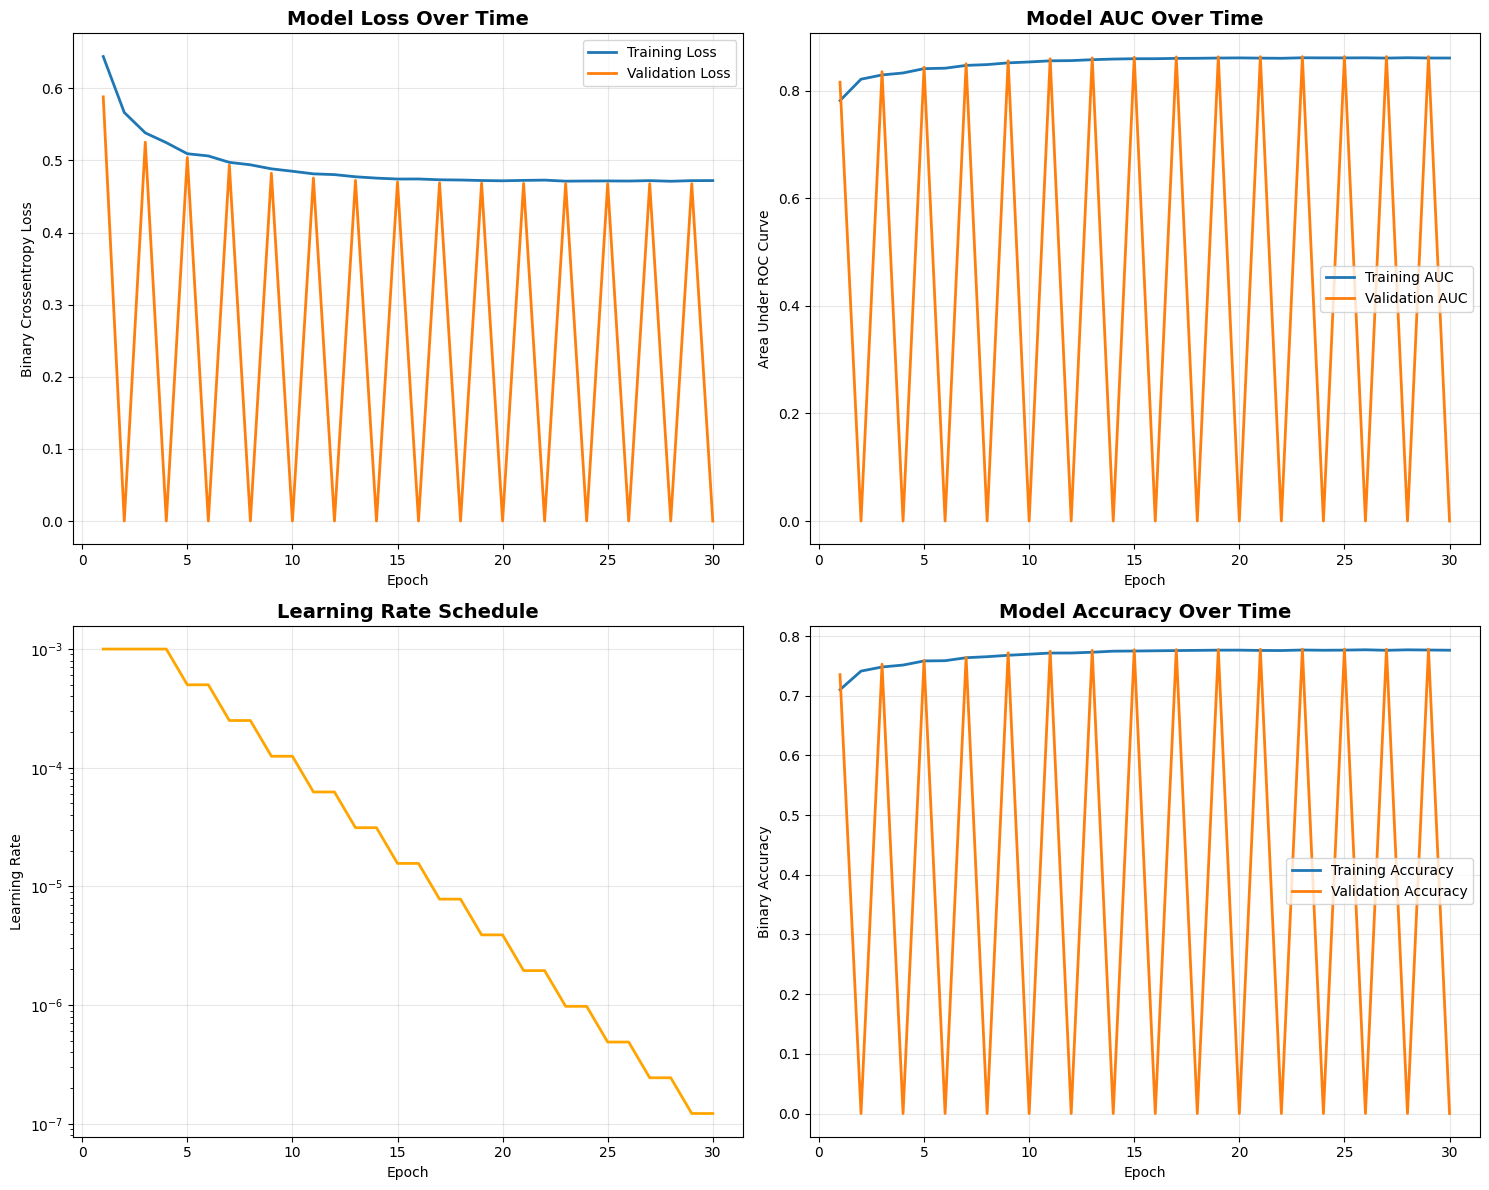

Training visualizations saved to 'training_history.png'


In [13]:
# Create comprehensive training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training and Validation Loss
axes[0, 0].plot(history_df['epoch'], history_df['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Binary Crossentropy Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Training and Validation AUC
axes[0, 1].plot(history_df['epoch'], history_df[auc_key], label='Training AUC', linewidth=2)
axes[0, 1].plot(history_df['epoch'], history_df[val_auc_key], label='Validation AUC', linewidth=2)
axes[0, 1].set_title('Model AUC Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Area Under ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Learning Rate Schedule
axes[1, 0].plot(history_df['epoch'], history_df[lr_key], linewidth=2, color='orange')
axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Training and Validation Accuracy
axes[1, 1].plot(history_df['epoch'], history_df['binary_accuracy'], label='Training Accuracy', linewidth=2)
axes[1, 1].plot(history_df['epoch'], history_df['val_binary_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1, 1].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Binary Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("Training visualizations saved to 'training_history.png'")


In [14]:
# Model performance analysis
best_epoch = history_df[val_auc_key].idxmax() + 1
best_val_auc = history_df[val_auc_key].max()
best_val_accuracy = history_df.loc[history_df[val_auc_key].idxmax(), 'val_binary_accuracy']
final_lr = history_df[lr_key].iloc[-1]

print("Model Performance Summary")
print("=" * 40)
print(f"Best Validation AUC: {best_val_auc:.4f} (Epoch {best_epoch})")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Total Training Time: {len(history_df)} epochs")
print(f"Final Learning Rate: {final_lr:.2e}")

# Calculate training efficiency
total_samples_processed = len(history_df) * steps_per_epoch * batch_size
print(f"Total Samples Processed: {total_samples_processed:,}")

print("\nKey Insights:")
if best_val_auc > 0.85:
    print("Excellent performance! AUC > 0.85 indicates strong discriminative ability.")
elif best_val_auc > 0.80:
    print("Good performance! AUC > 0.80 shows the model can distinguish signal from background.")
elif best_val_auc > 0.75:
    print("Moderate performance. Consider hyperparameter tuning or feature engineering.")
else:
    print("Poor performance. Model may need architectural changes or more data.")

if len(history_df) < 10:
    print("Training stopped very early. Consider adjusting early stopping patience.")
elif len(history_df) >= 45:
    print("Training used most of the available epochs. Consider increasing max epochs.")


Model Performance Summary
Best Validation AUC: 0.8641 (Epoch 27)
Best Validation Accuracy: 0.7780
Total Training Time: 30 epochs
Final Learning Rate: 1.22e-07
Total Samples Processed: 329,809,920

Key Insights:
Excellent performance! AUC > 0.85 indicates strong discriminative ability.


## Model Architecture Analysis

### Wide & Deep Architecture Benefits:

1. **Wide Component**: The linear model captures feature interactions and provides memorization capabilities for frequent feature combinations.

2. **Deep Component**: The deep neural network learns complex, non-linear feature representations and generalizes to unseen feature combinations.

3. **Combined Strength**: The ensemble of both components balances memorization (wide) and generalization (deep) for optimal performance.

### Key Improvements in This Implementation:

1. **Input Normalization**: Integrated normalization layer ensures consistent feature scaling across all data.

2. **L2 Regularization**: Added to deep layers to prevent overfitting on the large parameter space.

3. **Enhanced Callbacks**: 
   - AUC-based early stopping for better classification performance monitoring
   - Conservative learning rate scheduling for training stability
   - Model checkpointing to save the best-performing model

4. **Modern Keras API**: Built with the functional API for better flexibility and maintainability.

### Physics Context:

The 28 input features represent kinematic properties of particle collision events:
- Lepton properties (energy, momentum, angles)
- Missing transverse energy (indicating neutrinos)
- Jet properties and counts
- Derived kinematic variables

High AUC scores indicate the model successfully learned to distinguish Higgs boson decay signatures from background Standard Model processes.

In [15]:
# Optional: Save final model and training history
try:
    # Save the final model (best weights are restored from checkpoint)
    wide_and_deep.save(os.path.join(OUTPUT_DIR, 'final_higgs_model.keras'))
    print(f"Final model saved to '{os.path.join(OUTPUT_DIR, 'final_higgs_model.keras')}'")
    
    # Save training history
    history_df.to_csv(os.path.join(OUTPUT_DIR, 'training_history.csv'), index=False)
    print(f"Training history saved to '{os.path.join(OUTPUT_DIR, 'training_history.csv')}'")
    
    # Generate and save the model architecture diagram
    tf.keras.utils.plot_model(
        wide_and_deep,
        to_file=os.path.join(OUTPUT_DIR, 'wide_and_deep_model.png'),
        show_shapes=True,
        show_layer_names=True
    )
    print(f"Model architecture diagram saved to '{os.path.join(OUTPUT_DIR, 'wide_and_deep_model.png')}'")
    
    # Save model configuration summary
    config_summary = {
        'model_name': 'Wide & Deep Higgs Classifier',
        'total_parameters': wide_and_deep.count_params(),
        'best_val_auc': float(best_val_auc),
        'best_val_accuracy': float(best_val_accuracy),
        'training_epochs': len(history_df),
        'batch_size': batch_size,
        'learning_rate_initial': 0.001,
        'learning_rate_final': float(final_lr),
        'regularization_l2': 1e-5,
        'dropout_rate': DROPOUT,
        'units_per_layer': UNITS,
        'architecture': 'Wide & Deep with 5 dense layers'
    }
    
    import json
    with open(os.path.join(OUTPUT_DIR, 'model_config.json'), 'w') as f:
        json.dump(config_summary, f, indent=2)
    print(f"Model configuration saved to '{os.path.join(OUTPUT_DIR, 'model_config.json')}'")
    
except Exception as e:
    print(f"Error saving files: {e}")

print(f"\nHiggs Boson Classification Project Complete!")
print(f"\nFiles generated in: {OUTPUT_DIR}")
print("  training_history.png - Training curves visualization")
print("  best_higgs_model.keras - Best model weights (saved during training)")
print("  final_higgs_model.keras - Final model state")
print("  training_history.csv - Complete training metrics")
print("  model_config.json - Model configuration summary")
print("  wide_and_deep_model.png - Model architecture diagram")


Final model saved to '/kaggle/working/final_higgs_model.keras'
Training history saved to '/kaggle/working/training_history.csv'


Model architecture diagram saved to '/kaggle/working/wide_and_deep_model.png'
Model configuration saved to '/kaggle/working/model_config.json'

Higgs Boson Classification Project Complete!

Files generated in: /kaggle/working/
  training_history.png - Training curves visualization
  best_higgs_model.keras - Best model weights (saved during training)
  final_higgs_model.keras - Final model state
  training_history.csv - Complete training metrics
  model_config.json - Model configuration summary
  wide_and_deep_model.png - Model architecture diagram
